<a href="https://colab.research.google.com/github/Amrutha1103/002776773_AMRUTHA_SAI_ASSIGNMENT3/blob/main/Model_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Abstract :

This dataset is about the television program "Shark Tank India". The show is the Indian franchise of the American show Shark Tank. It shows entrepreneurs making business presentations to a panel of investors or sharks, who decide whether to invest in their company.

##Aim:

In this assignment we aim to interpret the results of


*   Linear model
*   tree based model
*   Best model of AutoML H2O

Using different Model Interpretibility Methods.

In this excercise I have used

*   SHAP analysis
*   LIME analysis 
*   Partial Dependence plot analysis


##Data description:

*   Episode_number - Number of the episode 
*   Pitch_number - Number of the Pitch
*   Brand_name - Name of the brand Idea
*   Idea - behind the brand building Deal
*   Deal - done or not ; 1 - YES, 0 - NO
*   Pitcher_ask_amount - Amount asked by the pitchers
*   Ask_equity - Equity offered by the pitchers
*   Ask_valuation - Valuation asked by pitchers
*   Deal_amount - Final Deal Amount
*   Deal_equity - Final Deal equity percentage
*   Deal_valuation - Final Valuation of Company after Deal
*   Ashneer_present - Ashneer was present during the pitching ; 1 - YES, 0 - NO
*   Anupam_present - Anupam was present during the pitching ; 1 - YES, 0 - NO
*   Aman_present - Aman was present during the pitching ; 1 - YES, 0 - NO
*   Namita_present - Namita was present during the pitching ; 1 - YES, 0 - NO
*   Vineeta_present - Vineeta was present during the pitching ; 1 - YES, 0 - NO
*   Peyush_present - Peyush was present during the pitching ; 1 - YES, 0 - NO
*   Ghazal_present - Ghazal was present during the pitching ; 1 - YES, 0 - NO
*   Total_sharks_invested - Number of total sharks invested in the Company
*   Amount_per_shark - Amount per shark invested
*   Equity_per_shark - Final Equity gained per Shark















In [1]:
# Importing all required libraries

!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o




import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import random
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (32, 24)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 8.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=c30fcf2122a5f83b08534183ffb2fa640082ad74927e34fd3a8e36bc02f6ad5b
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: ht

In [2]:
# Setting up maximum runtime for the AutoML
run_time = 222
# Setting up memory
pct_memory = 0.5 #sets the percentage of the available memory that the program should use to 50%
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0)) #calculates the minimum memory size in GB required for the program to run. Final value is stored in min_mem_size
print(min_mem_size)

6


In [4]:
import random
import logging
import sys
import h2o

# set H2O port number
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)


Checking whether there is an H2O instance running at http://localhost:45415..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_jn7eh3w
  JVM stdout: /tmp/tmp_jn7eh3w/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_jn7eh3w/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:45415
Connecting to H2O server at http://127.0.0.1:45415 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    16 days
H2O_cluster_name:           H2O_from_python_unknownUser_rc8a9o
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:45415
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

In [5]:
# To read CSV file into Pandas DataFrame
data_df = pd.read_csv(
    "https://raw.githubusercontent.com/Amrutha1103/002776773_AMRUTHA_SAI_ASSIGNMENT3/main/Shark%20Tank%20India%20Dataset.csv"
) 

In [6]:
X = data_df.drop(["brand_name","idea"], axis=1)  # Training Feature which conatins all the remaining columns of the data_df
Y = data_df["deal"] #Target variable we want to predict

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Y= label_encoder.fit_transform(Y)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X,Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train_res, Y_train_res, test_size = 0.2)

In [17]:
#splitting the data into the test and training datasets using "train_test_split" function and  "sklearn.model_selection" module
(
    X_train,
    X_test,
    Y_train,
    Y_test,
) = train_test_split( 
    X, Y, test_size=0.1, random_state=42 
) # keeping test size 0.1 i.e 10% of the data will be used for the testing and the remaining for the training
x_train_100 = shap.utils.sample(
    X_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    X_test, 100
) 

###Fitting a Linear model

In [22]:
# Initializing a Linear Model

linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(X_train, Y_train)  # Training a linear model


LinearRegression()

In [23]:
# Remove columns 'deal', 'idea', and 'brand_name' from data_df and assign the resulting dataframe to df
#df = data_df.drop(["deal","idea","brand_name"], axis=1)

# Normalize the values in df to the range [0, 1] and assign the resulting dataframe to df_norm
#df_norm = (df - df.min()) / (df.max() - df.min())

# Concatenate the 'deal' column from data_df to df_norm along axis 1 and assign the resulting dataframe to df_norm
#df_norm = pd.concat((df_norm, data_df.deal), 1)



df_norm = (data_df
           .drop(["deal", "idea", "brand_name"], axis=1)
           .apply(lambda x: (x - x.min()) / (x.max() - x.min()))
           .assign(deal=data_df.deal))

In [24]:
import statsmodels.formula.api as smf  # OLS model Library

results = smf.ols(
    "deal ~ pitcher_ask_amount + ask_equity + ask_valuation + deal_amount + deal_equity +  deal_valuation + total_sharks_invested + amount_per_shark + equity_per_shark",
    data=df_norm,
).fit()
print(results.summary()) # to print the OLS model summary


                            OLS Regression Results                            
Dep. Variable:                   deal   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     67.48
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           4.92e-40
Time:                        18:12:56   Log-Likelihood:                 26.875
No. Observations:                 117   AIC:                            -33.75
Df Residuals:                     107   BIC:                            -6.127
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.14

##Interpreting Regression Co-efficients

###Model Co-efficients:


The sign of the coefficient indicates the direction of the relationship between the target and the predictors. A positive value indicates that the value of target increases if the value of co-efficient increases and vice-versa. Whereas the negative values indicates that the value of target increases if the value of co-efficient decreases and vice versa.

As seen in the co-efficient coloumn in the above table

*   Value for the variable amount_per_shark is highest = 1.3596
*   Followed by total_sharks_invested = 1.3450



High absolute values of co-efficients can be used to get an idea of the importance of variables in a linear regression. Here, as stated above amount_per_shark and total_sharks_invested seems to be the most important variables to predict target i.e. deal



Also, it signifies that Higher the values for the amount_per_shark and total_sharks_invested - better is the probability to secure the deal for the pitch.


###P-Values:


If the p-value is 0.05 or lower, the result is said to be significant, but if it is higher than 0.05, the result is non-significant

*   total_sharks_invetsed
*   amount_per_shark
*   deal_amount
*   ask_equity

These variables have P-Value less that or equal to 0.05, hence it can be interpreted that these variables are significant variables and any change to this variables have significant impact on the target (deal).


###Skew and Kurtosis

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0 

In our case,

Skewness = 0.281 (which indicates the distribution is fairly symmetrical as the value lies between -0.5 to 0.5) 

Kurtosis = 8.986 

###Durbin-Watson

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

*   Value of 2 indicates that no auto correlation is detected

*   Value between 0 to 2 indicates that there is positive auto correlation detected
*   Value between 2 to 4 indicates that there is negative auto correlation detected

Our model has a DW score of 2.393 which could be interpreted as a negative auto-correlation in the residuals of regression.


###Jarque-Bera Test

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 176.193 which again re-inforces the interpretation we got from Skew and Kurtosis.


###Fit tree based model

In [25]:
#to train random forest regression model on the training dataset
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10) 
tree_model.fit(X_train, Y_train)
     

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

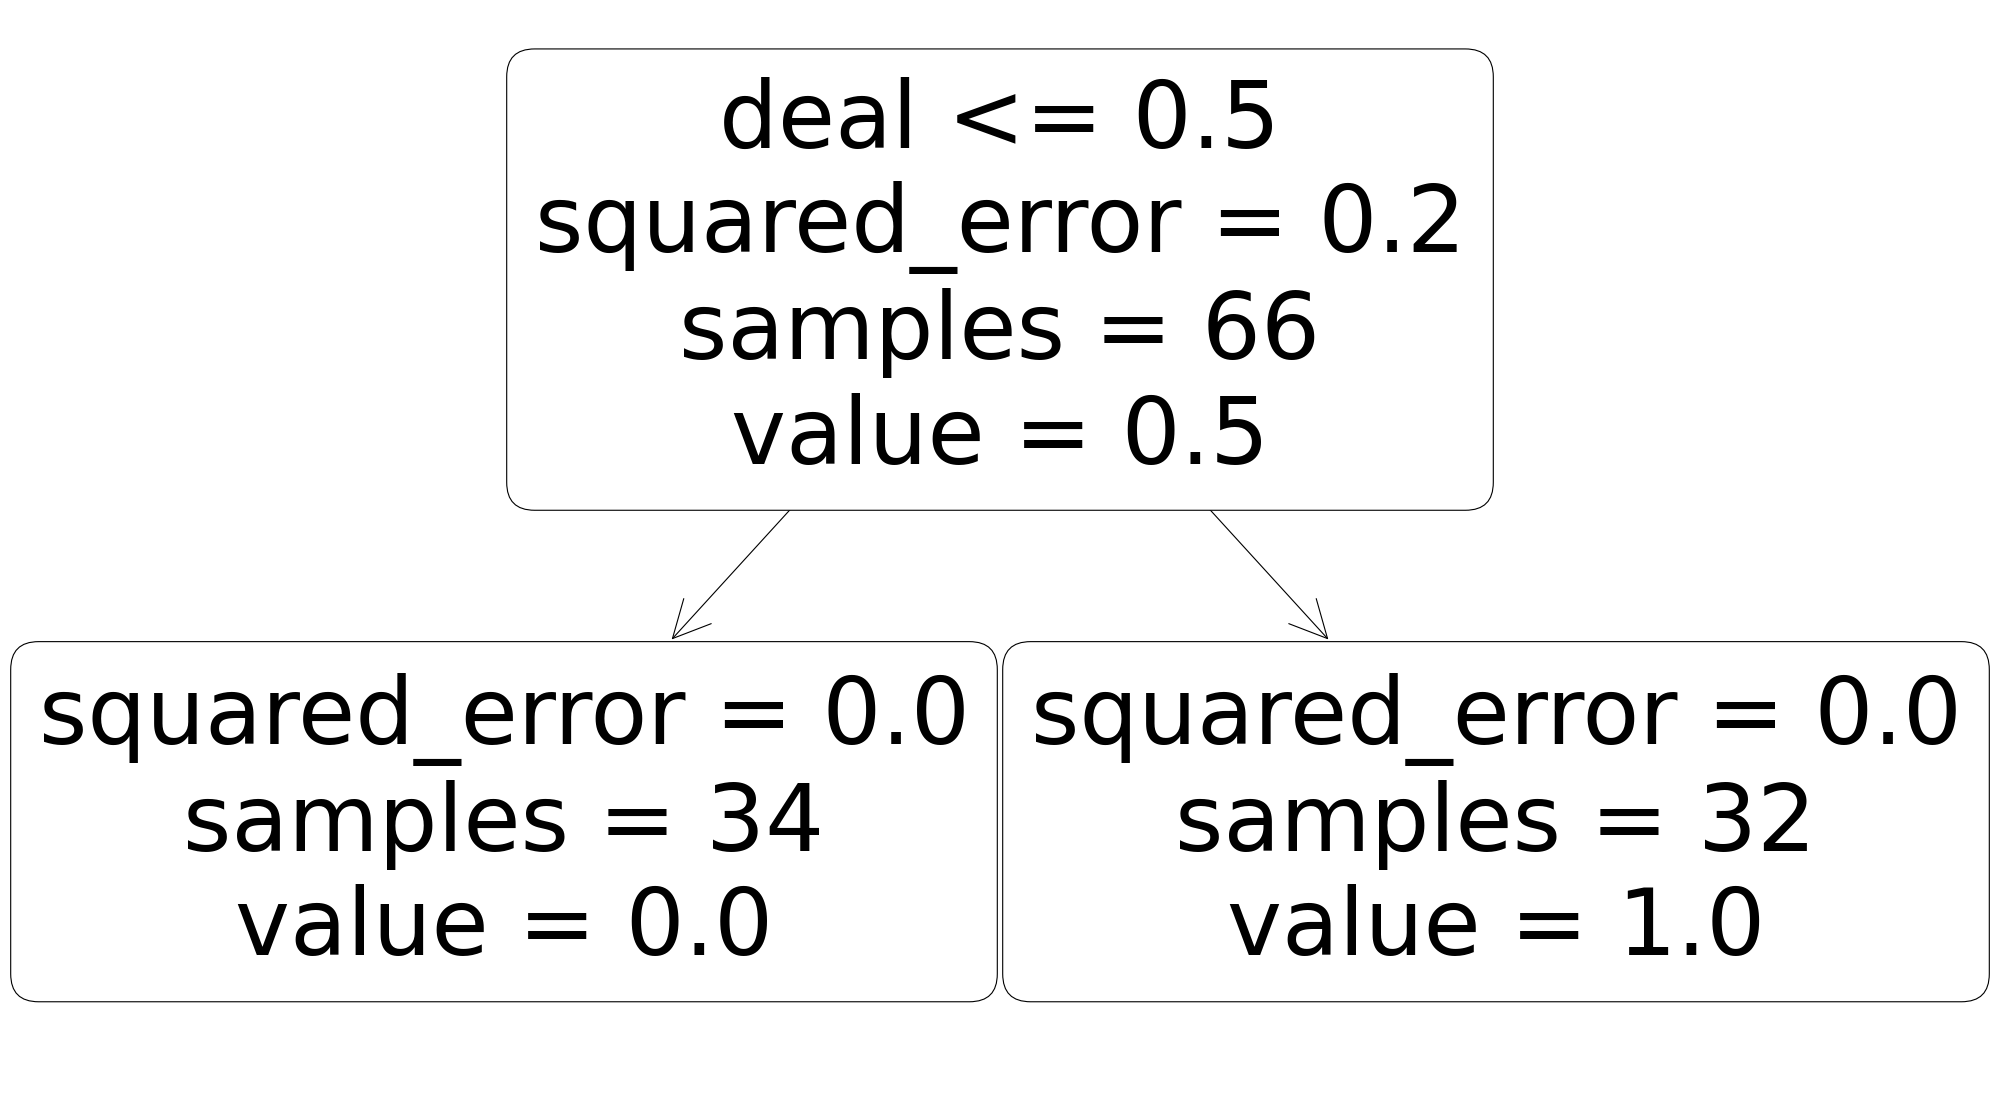

In [26]:
# Visualization of Nodes for the purpose of explainability
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(32, 18), dpi=80)
plot_tree(tree_model.estimators_[0], feature_names=list(X_train.columns), rounded=True, precision=1, ax=ax)
plt.show()


###Interpreting nodes of the tree-based model

Random Forest Regressor works on the concept of the wisdom of the crowd. It is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

As usual, the tree has conditions on each internal node and a value associated with each leaf (i.e. the value to be predicted). But additionally, we’ve plotted out the value at each internal node i.e. the mean of the response variables in that region.



In [27]:
# Get numerical feature importances
tree_importances = list(tree_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 3))
    for feature, importance in zip(X_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)


# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: total_sharks_invested Importance: 0.3
Variable: deal                 Importance: 0.2
Variable: deal_equity          Importance: 0.2
Variable: equity_per_shark     Importance: 0.2
Variable: amount_per_shark     Importance: 0.1
Variable: episode_number       Importance: 0.0
Variable: pitch_number         Importance: 0.0
Variable: pitcher_ask_amount   Importance: 0.0
Variable: ask_equity           Importance: 0.0
Variable: ask_valuation        Importance: 0.0
Variable: deal_amount          Importance: 0.0
Variable: deal_valuation       Importance: 0.0
Variable: ashneer_present      Importance: 0.0
Variable: anupam_present       Importance: 0.0
Variable: aman_present         Importance: 0.0
Variable: namita_present       Importance: 0.0
Variable: vineeta_present      Importance: 0.0
Variable: peyush_present       Importance: 0.0
Variable: ghazal_present       Importance: 0.0
Variable: ashneer_deal         Importance: 0.0
Variable: anupam_deal          Importance: 0.0
Variable: am

The variable importance we get from the tree-based regressor re-inforces our interpretation from the linear model.

###To find the best model using auto ML

In [28]:
# to convert pandas dataframe into H2O dataframe
data_hf = h2o.H2OFrame(data_df) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [29]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = data_hf.split_frame([pct_rows])

In [30]:
def autoML(df_train, df_test):
    X = df_train.columns
    y = "deal"

    X.remove(y)  # Removing the result frm our predictors data

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

    return df_train, df_test, aml




In [31]:
# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [32]:
#training auto ML
autoML = autoML(df_train, df_test)

AutoML progress: |
18:15:21.282: _train param, Dropping bad and constant columns: [brand_name, idea, anupam_present]
18:15:21.282: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


18:15:22.873: _train param, Dropping bad and constant columns: [brand_name, idea, anupam_present]
18:15:22.873: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
18:15:23.560: _train param, Dropping bad and constant columns: [brand_name, idea, anupam_present]
18:15:23.560: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical bef

In [33]:
# to get the Leaderbord of AutoML output
autoML[2].leaderboard 

model_id                                               rmse        mse        mae      rmsle    mean_residual_deviance
-------------------------------------------------  --------  ---------  ---------  ---------  ------------------------
GBM_grid_1_AutoML_1_20230325_181521_model_22       0.129216  0.0166969  0.0619254  0.0876536                 0.0166969
GBM_grid_1_AutoML_1_20230325_181521_model_169      0.129352  0.0167319  0.0481659  0.0853881                 0.0167319
XGBoost_grid_1_AutoML_1_20230325_181521_model_160  0.130127  0.0169331  0.0454597  0.0850804                 0.0169331
GBM_grid_1_AutoML_1_20230325_181521_model_157      0.130648  0.017069   0.0466149  0.0853792                 0.017069
XGBoost_grid_1_AutoML_1_20230325_181521_model_149  0.1327    0.0176093  0.0502809  0.0875441                 0.0176093
GBM_grid_1_AutoML_1_20230325_181521_model_175      0.133098  0.017715   0.0523862  0.0868675                 0.017715
XGBoost_grid_1_AutoML_1_20230325_181521_model_191  0.133641  0.0178599  0.0453743  0.0870404                 0.0178599
GBM_grid_1_AutoML_1_20230325_181521_model_3        0.133944  0.017941   0.0482604  0.0879206                 0.017941
XGBoost_grid_1_AutoML_1_20230325_181521_model_16   0.133965  0.0179468  0.0406089  0.0868055                 0.0179468
GBM_grid_1_AutoML_1_20230325_181521_model_174      0.134269  0.0180281  0.0434429  0.0871527                 0.0180281
[395 rows x 6 columns]

In [34]:
# To Get the Best Model
autoML_model = getBestModel(autoML[2])  
print(autoML_model)

0
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230325_181521_model_22


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    55                 55                          6062                   1            5            2.8           2             6             4.10909

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0081000839377273
RMSE: 0.09000046631949914
MAE: 0.03534624613512936
RMSLE: 0.06386668976930573
Mean Residual Deviance: 0.0081000839377273

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.016696867574476065
RMSE: 0.12921635954659946
MAE: 0.06192541975184582
RMSLE: 0.08765356534700541
Mean Residual

In [35]:
autoML_model.predict

<bound method ModelBase.predict of H2OGradientBoostingEstimator({'parms': {'model_id': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'model_id', 'label': 'model_id', 'help': 'Destination id for this model; auto-generated if not specified.', 'required': False, 'type': 'Key<Model>', 'default_value': None, 'actual_value': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_1_20230325_181521_model_22', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_1_20230325_181521_model_22'}, 'input_value': None, 'level': 'critical', 'values': [], 'is_member_of_frames': [], 'is_mutually_exclusive_with': [], 'gridable': False}, 'training_frame': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'training_frame', 'label': 'training_frame', 'help': 'Id of the training data frame.', 'required': False, 'type': 'Key<Fra

### To plot SHAP, Partial Dependence Plot, Individual Conditional Expectation Analysis for AutoML Best Model

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

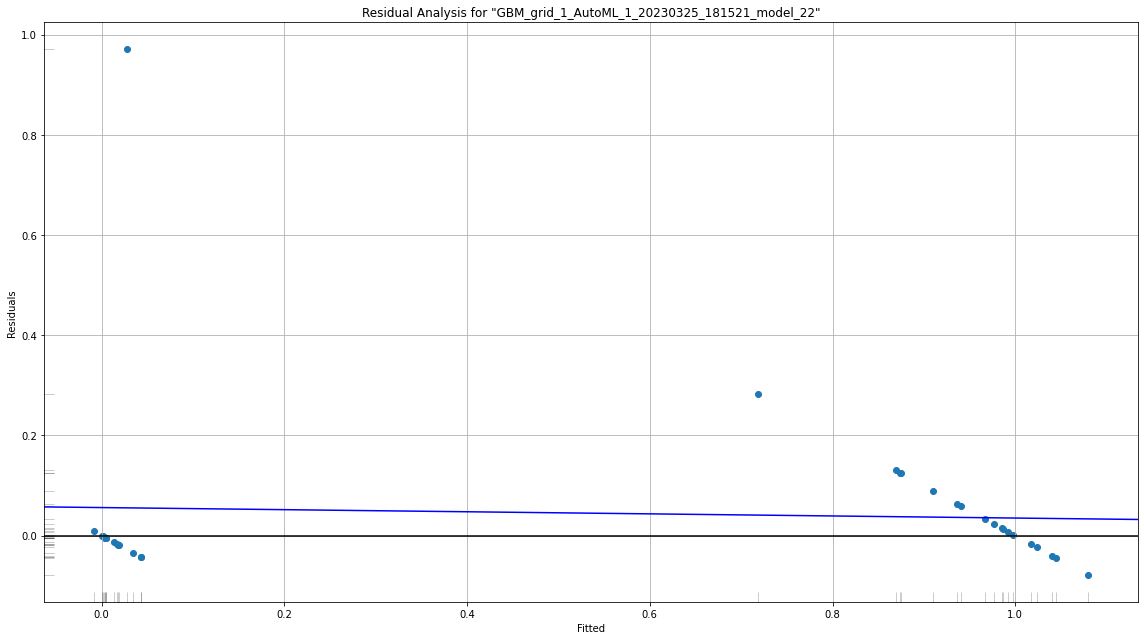

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

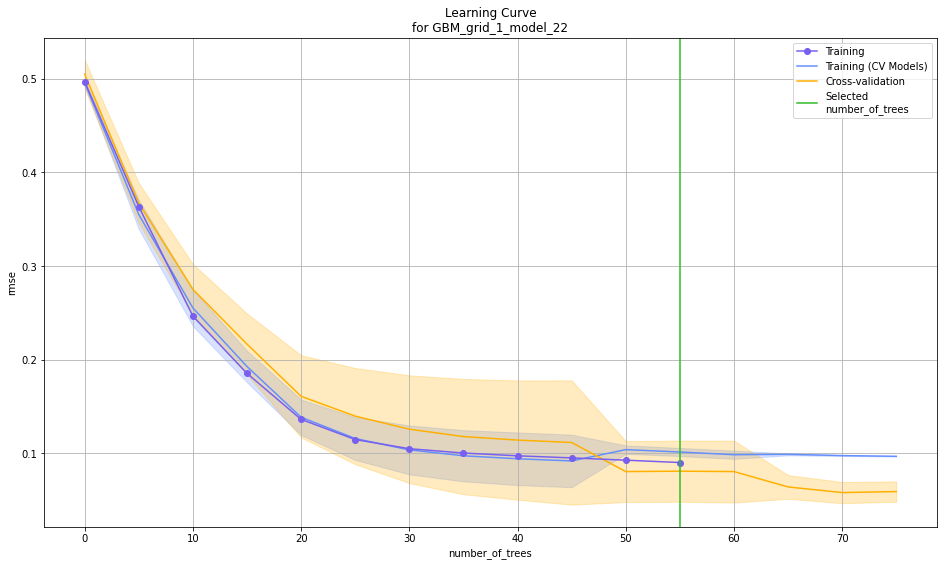

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

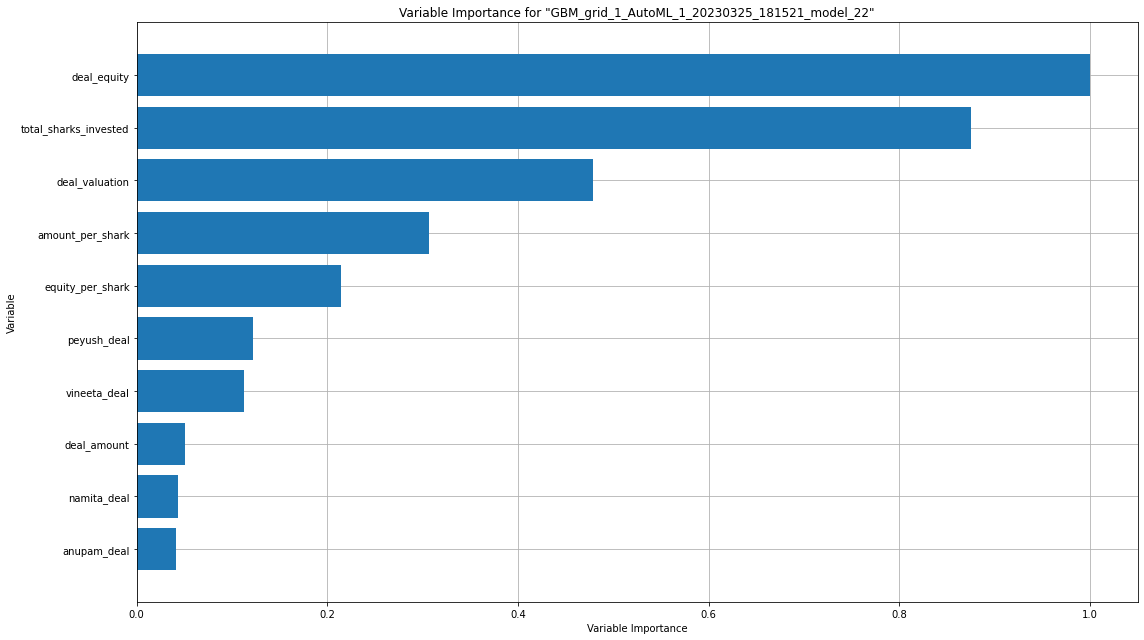

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

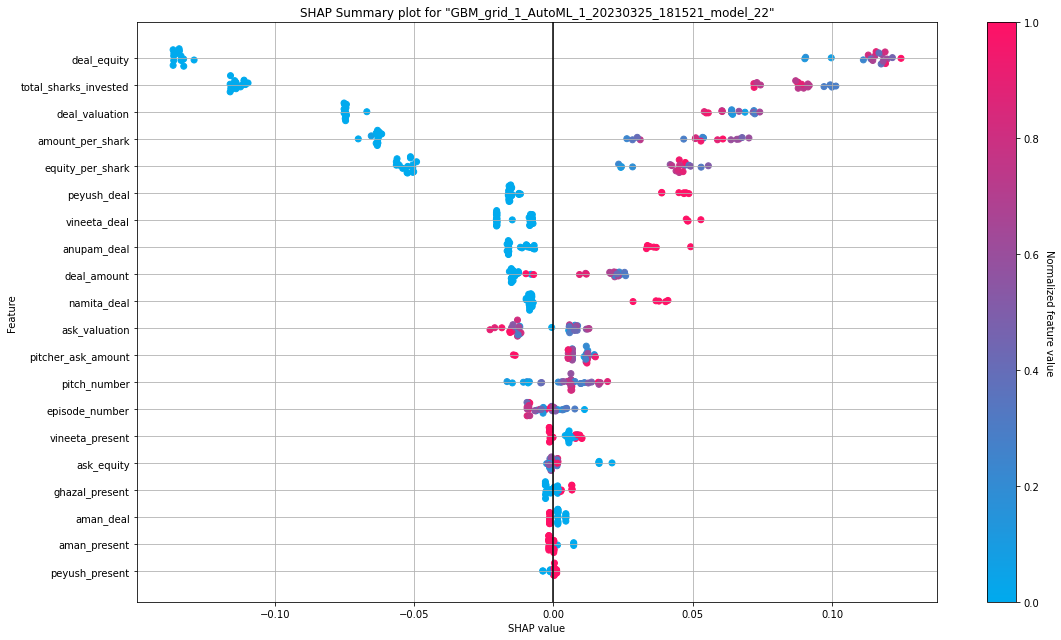

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

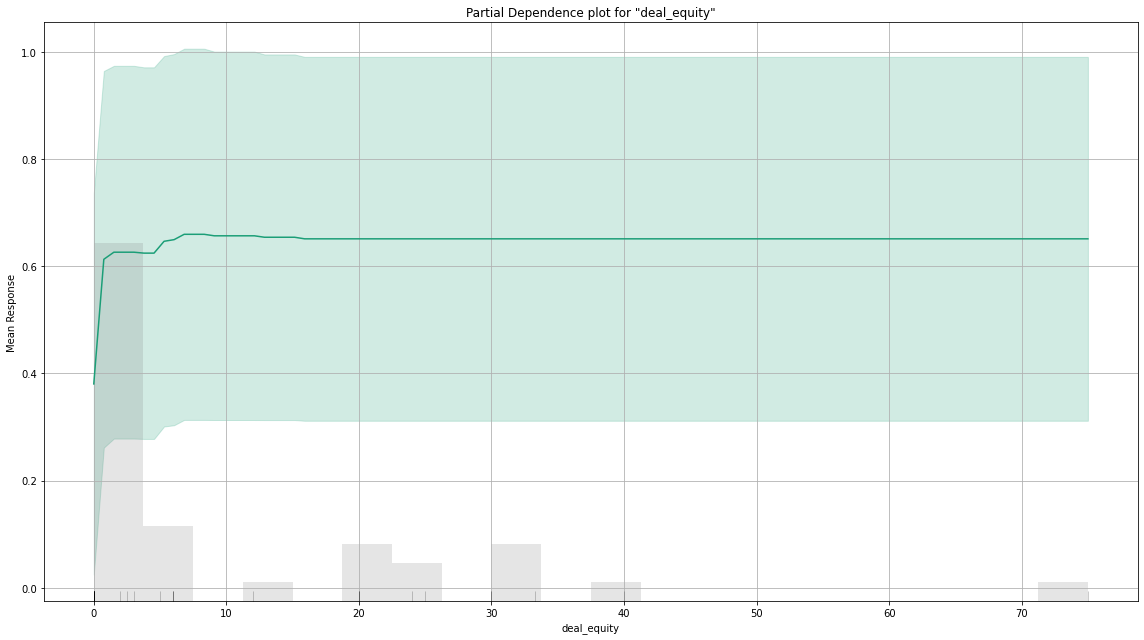

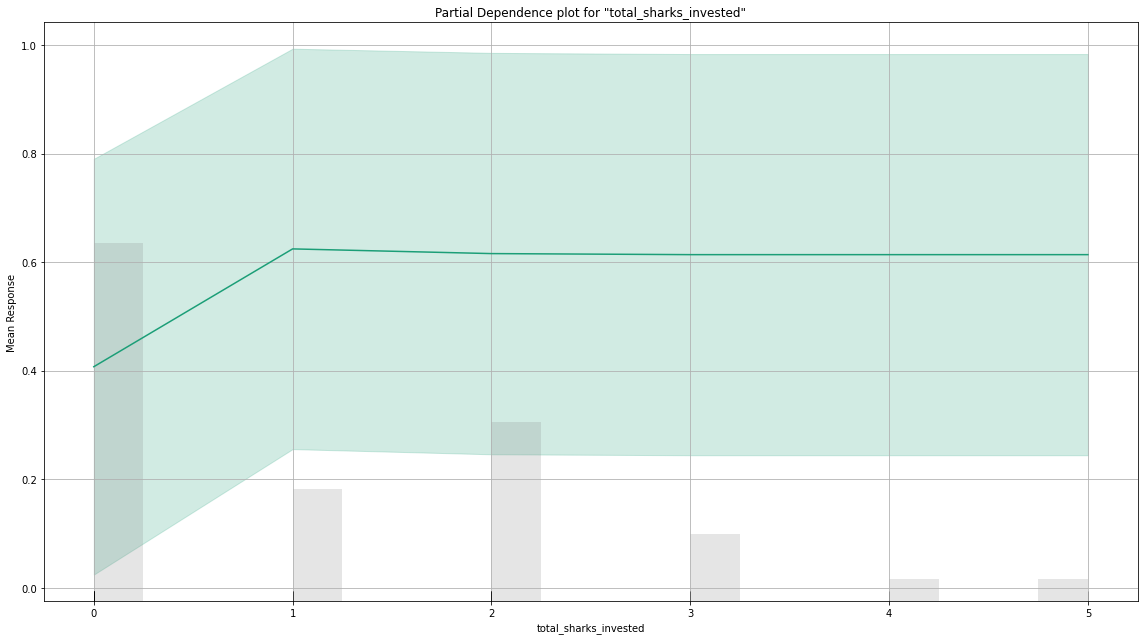

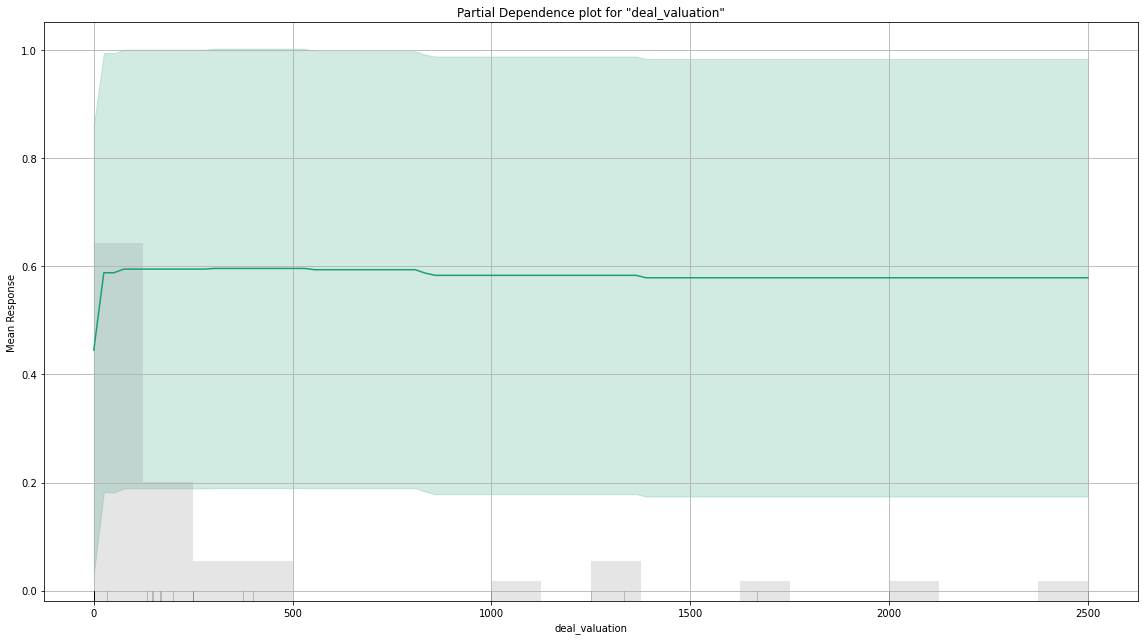

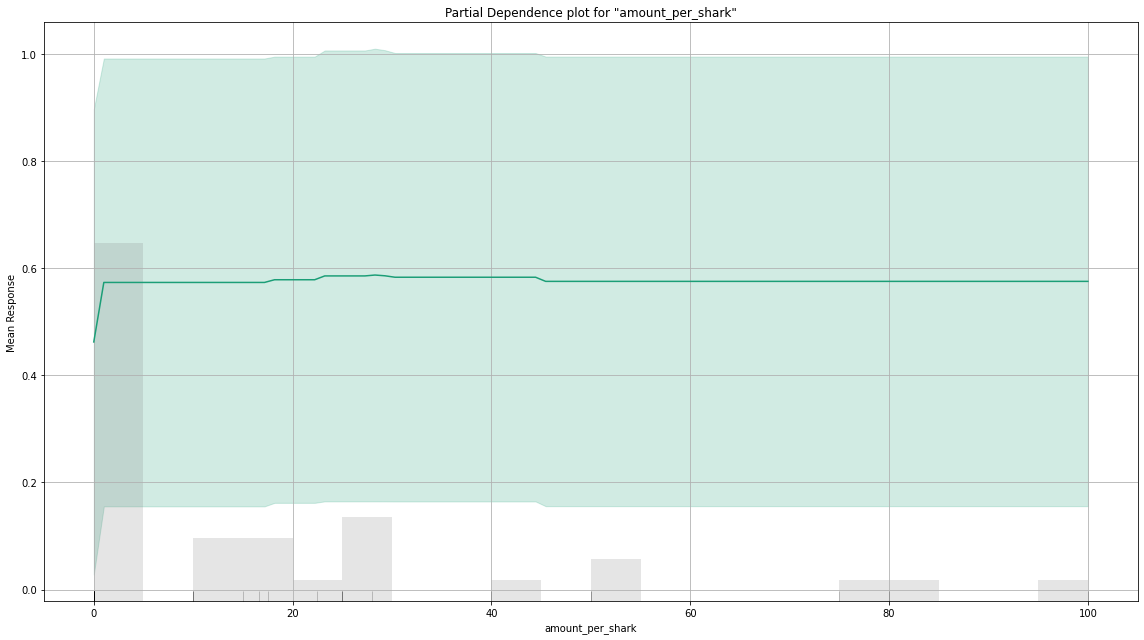

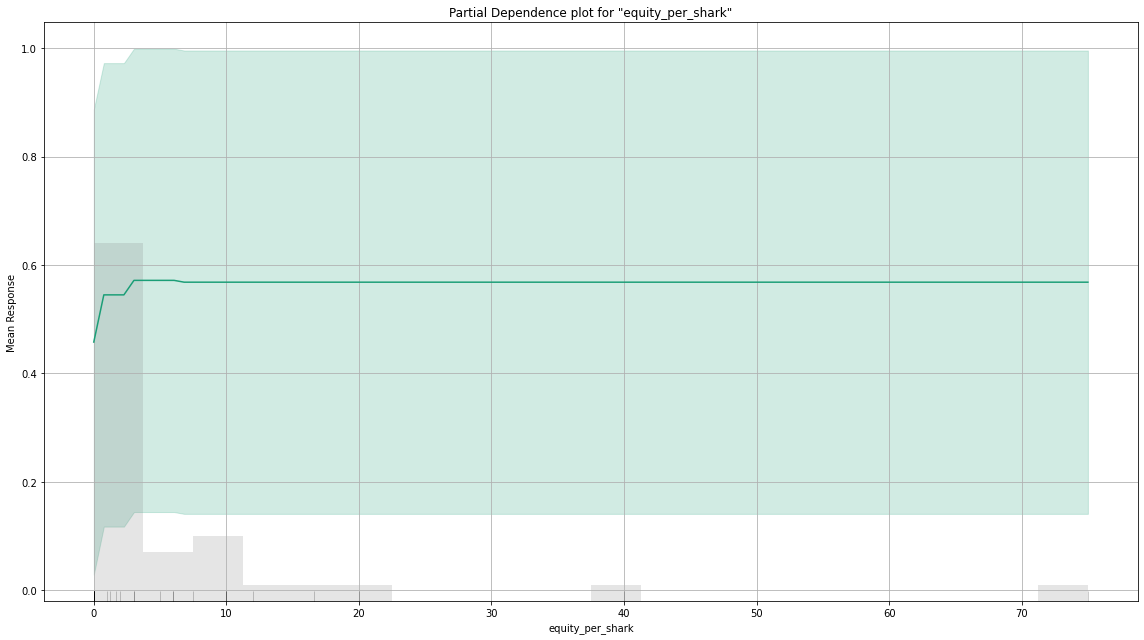

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

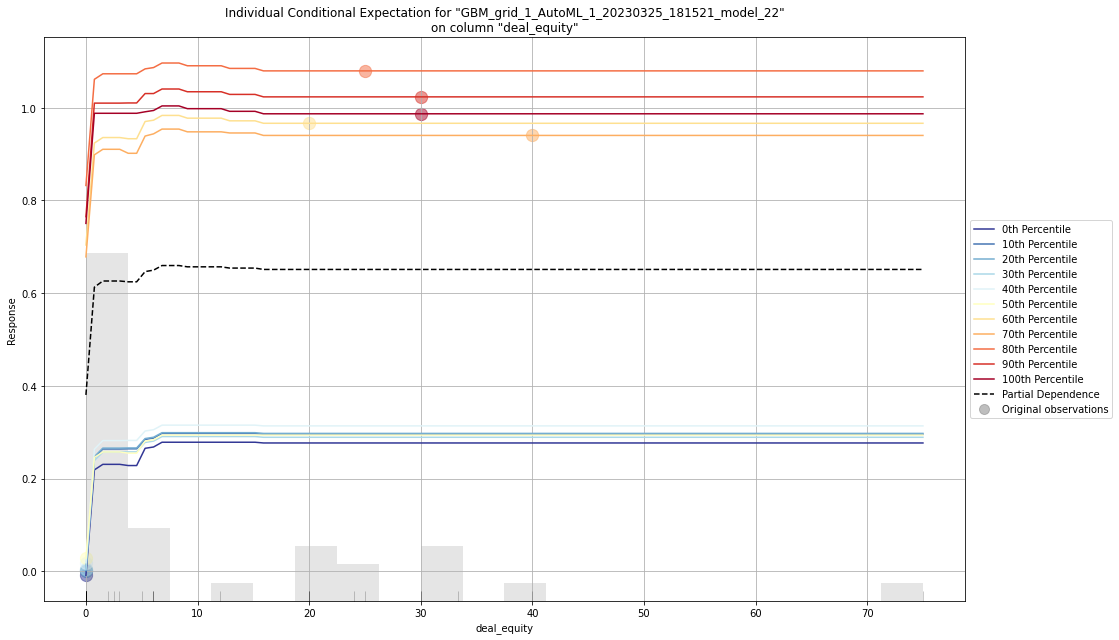

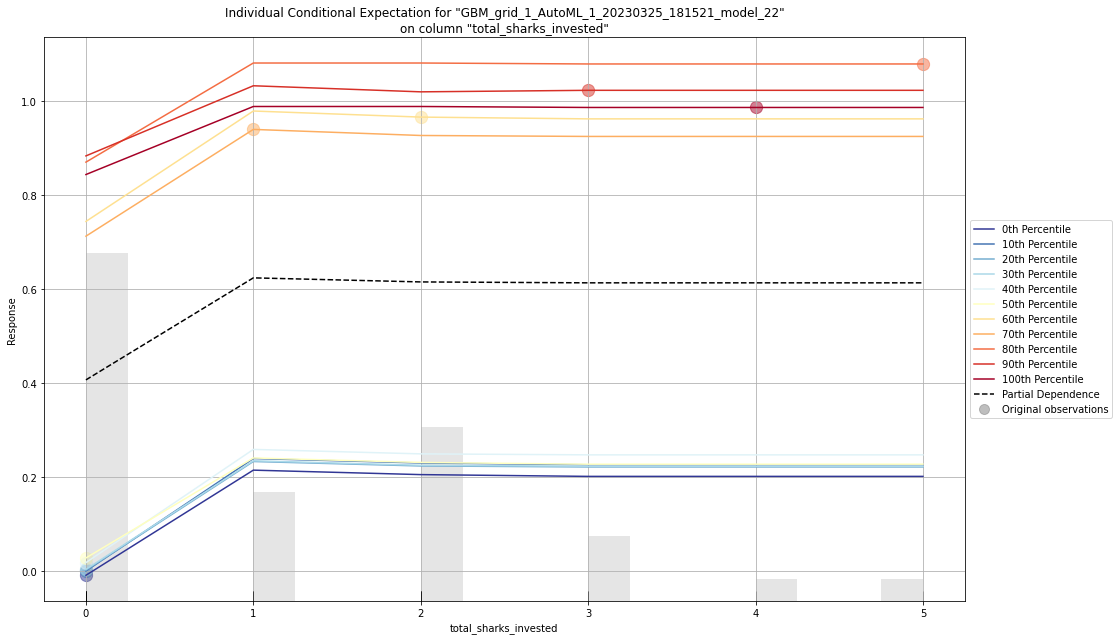

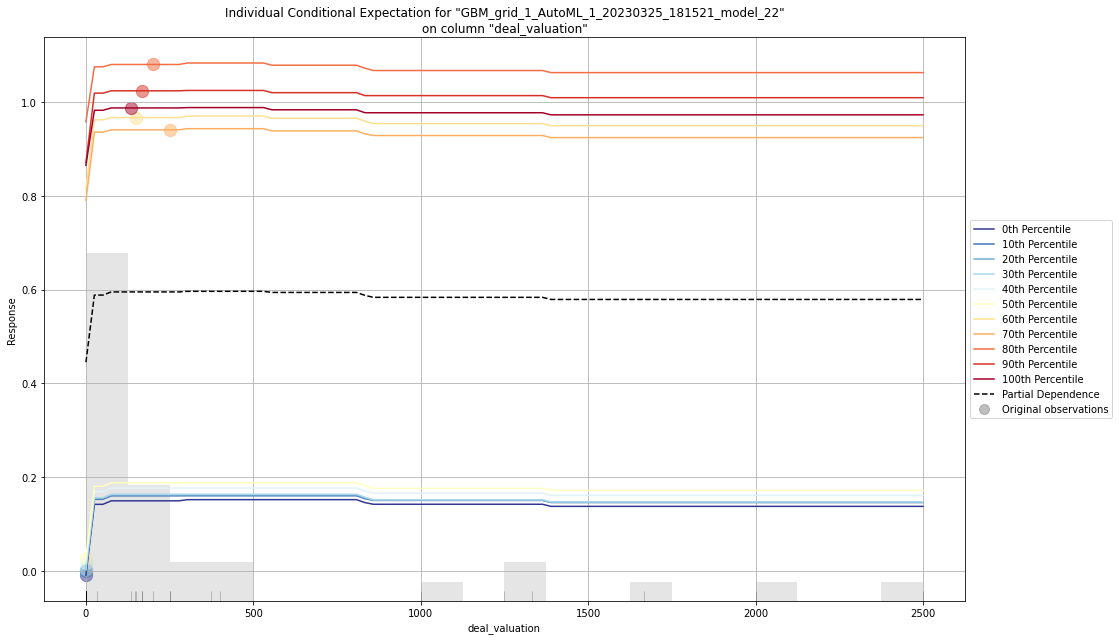

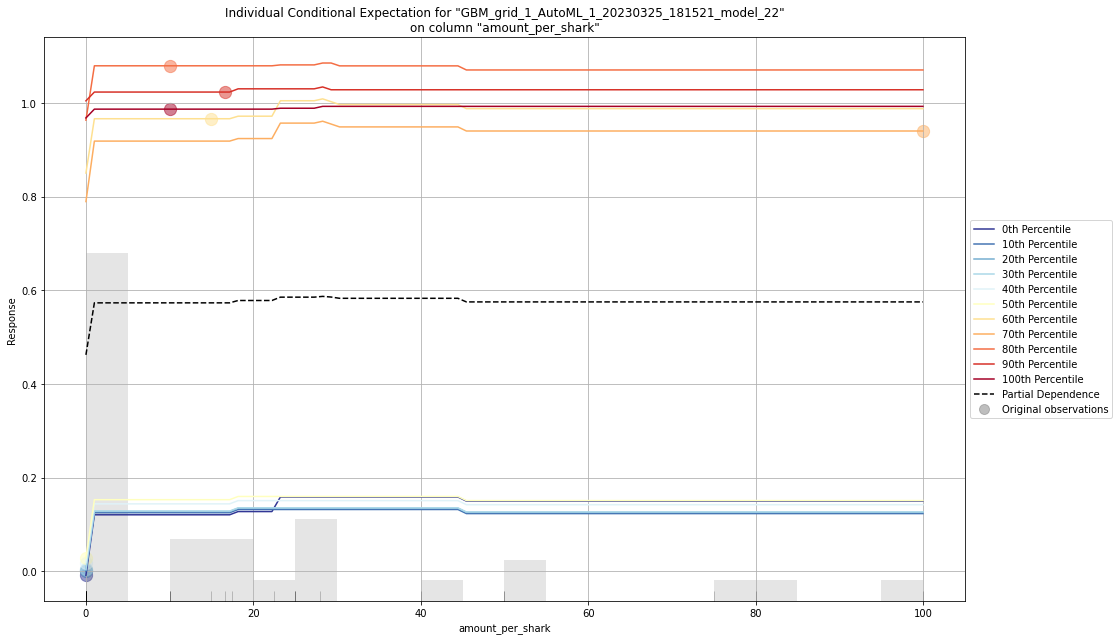

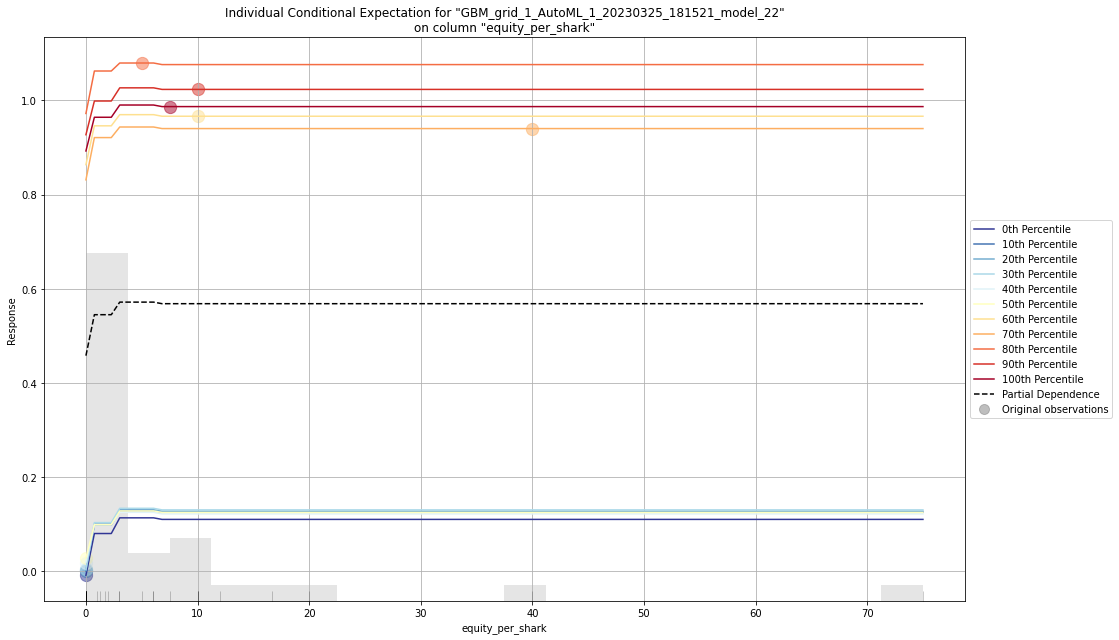

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [36]:
#AutoMl explainability 
autoML_model.explain(autoML[1])

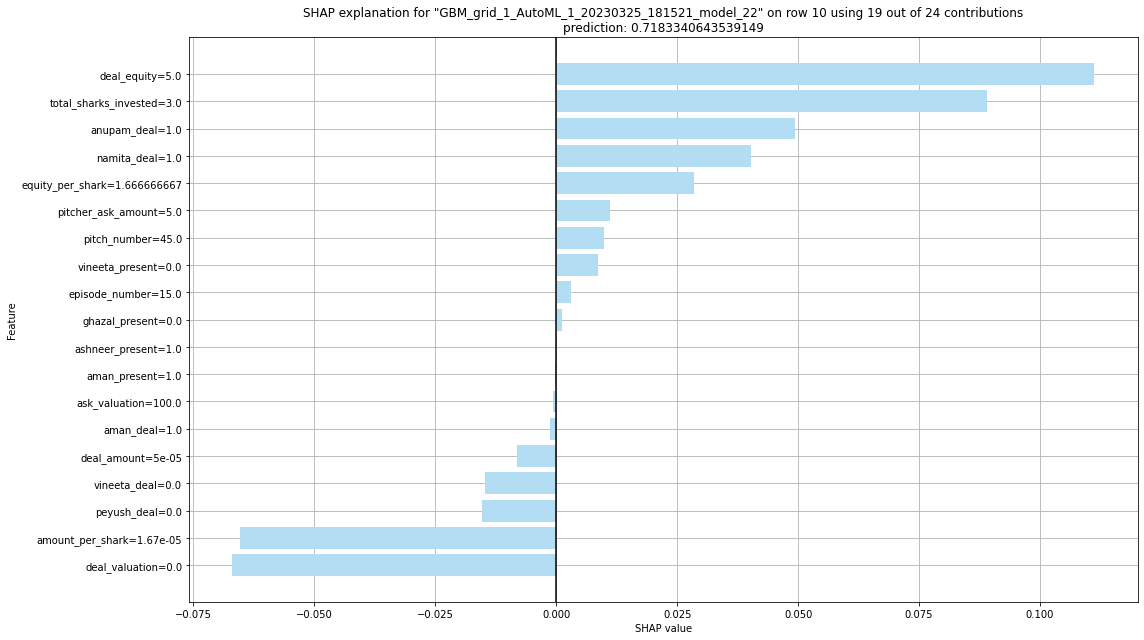

In [37]:
autoML_model.shap_explain_row_plot(
    autoML[1], 10
)  # Lets Analyze the 10th row in Test Data

###Interpreting Best Model from AutoML



#####Residual Analysis:


Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.



#####Variable Importance:


In the variable importance plot we can observe that the plot replicates the results which we got from the Linear Model and Tree-Based Model above. The variable importance has been scaled between 0 to 1.

with deal_equity, deal_valuation, total_sharks_invested, amount_per_shark, equity_per_shark being the significant variables.




#####SHAP Summary:



From the SHAP summary diagram, we can interpret a few conclusions -


*   All the features are listed as per their importance in making the prediction, that is deal_equity is more significant followed by deal equity, deal valuation, equity_per_shark, total_sharks_invested, amount_per_shark and so on.

*   The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see deal_equity has the most impact on the probability of deal. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. i.e. - Hight percentage of deal_equity results in high probability of deal, a low amount of ask_valuation results in high probability of deal, and so on.


The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.




####Partial Dependence Plot (PDP):



A partial dependence plot shows the marginal effect of a feature on the target(deal in our dataset). It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP.

For Interpretation purposes, let us pick up the two most important variables - deal_equity and deal_amount.


*   As we can see that when the rest of the variables are kept constant and a
marginal change is made in deal_equity, we can see the mean response increases between deal_equity levels of 2 and 7. This could be interpreted as this range of deal_equity could be the deciding factor in the probablity of the deal.


The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value.


###SHAP Analysis for Linear and Tree-Based Models:


Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.


Let us take a feature of deal_valuation


For the linear model the cross is made at approx E[f(x)] 5.74

For Tree-based model the cross is made at approx E[f(x)] 5.735

So as the deal_valuation increases the expected value also increases

Talking about the red line on the plot - When we give a sample as an input (sample_ind = 16) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

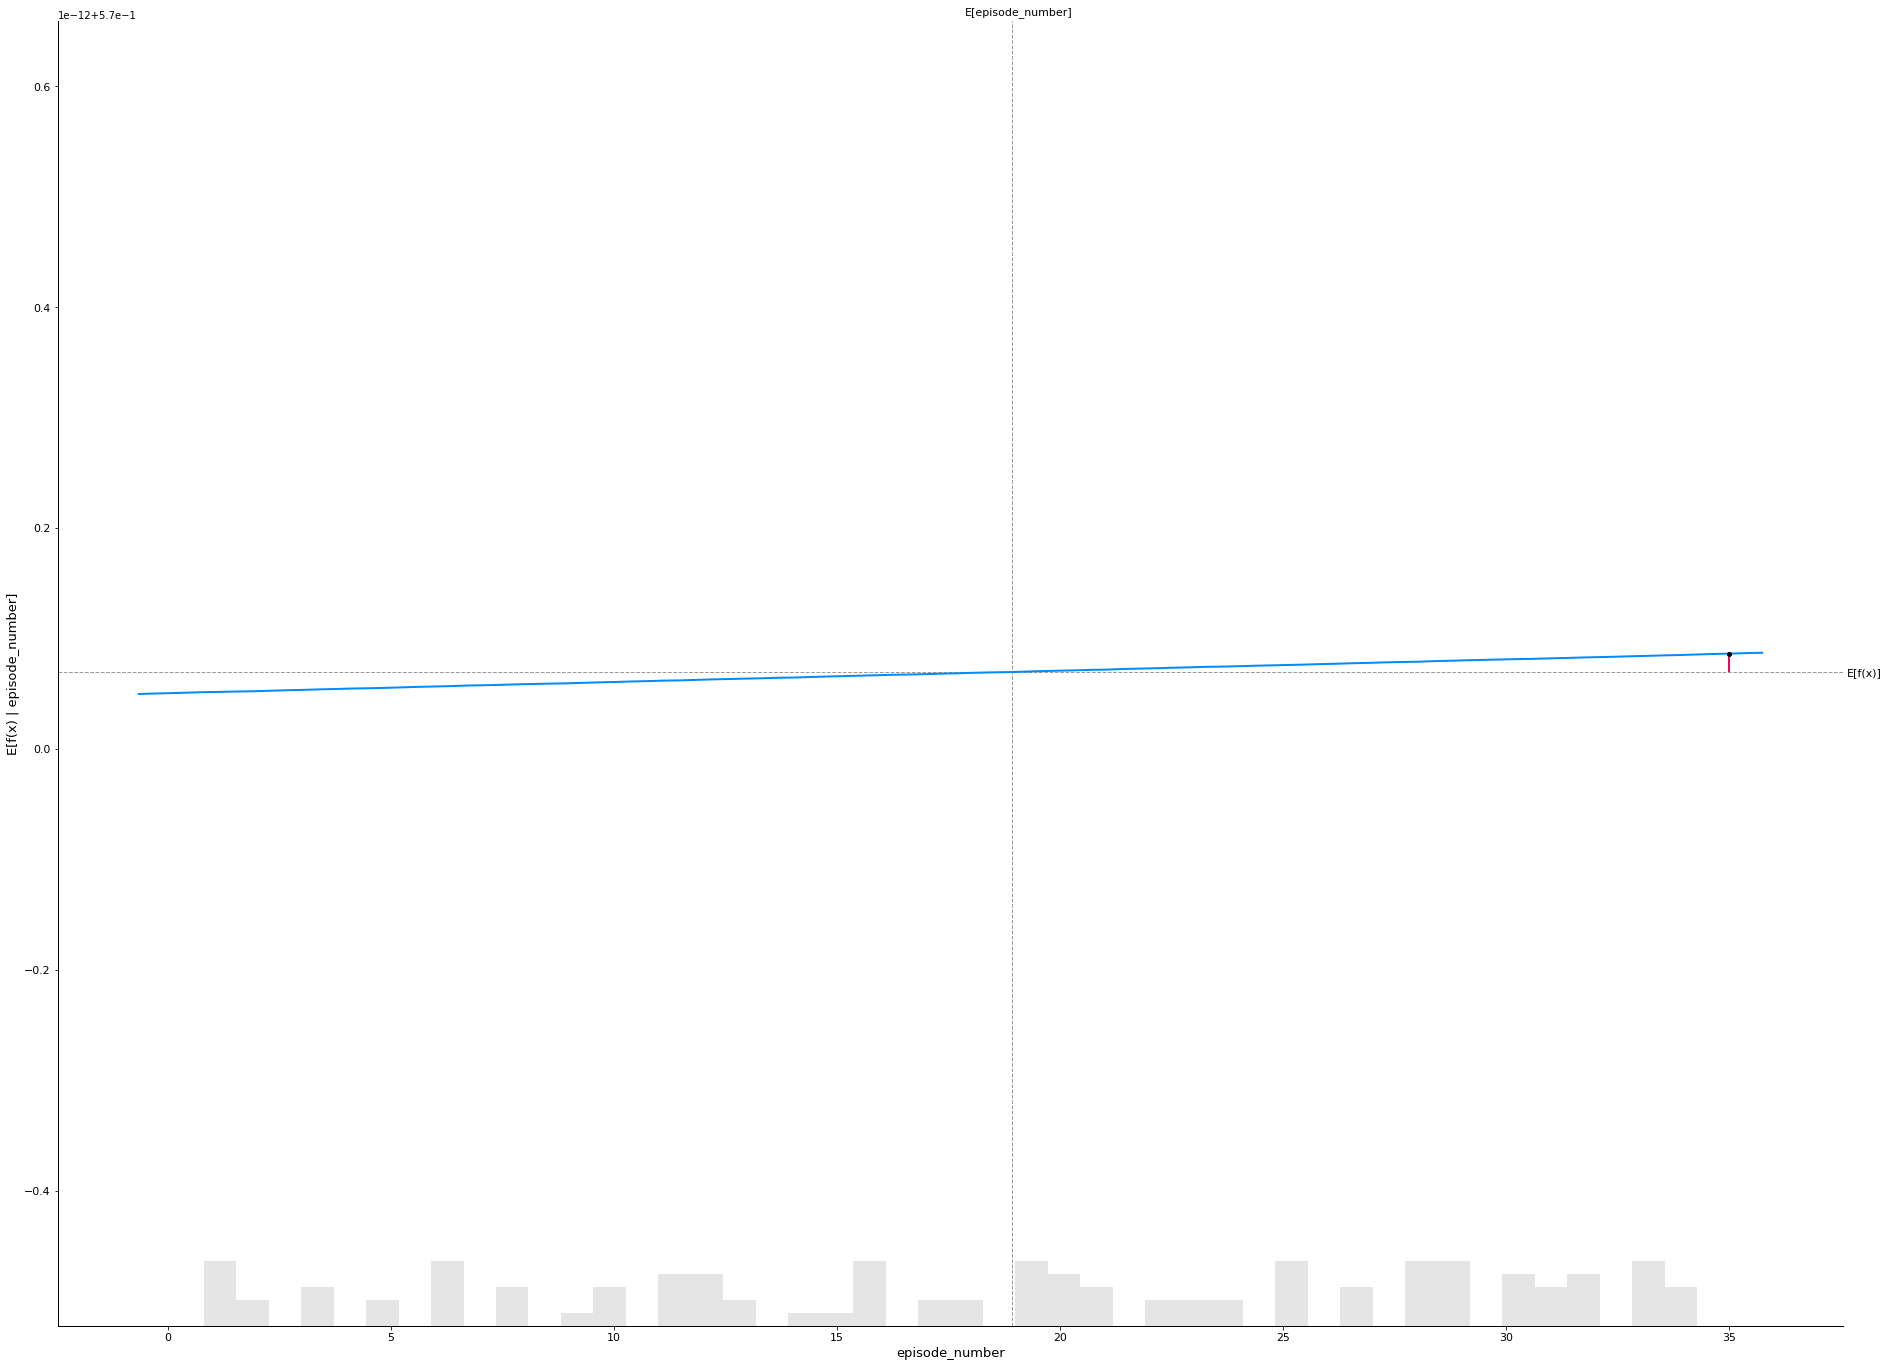

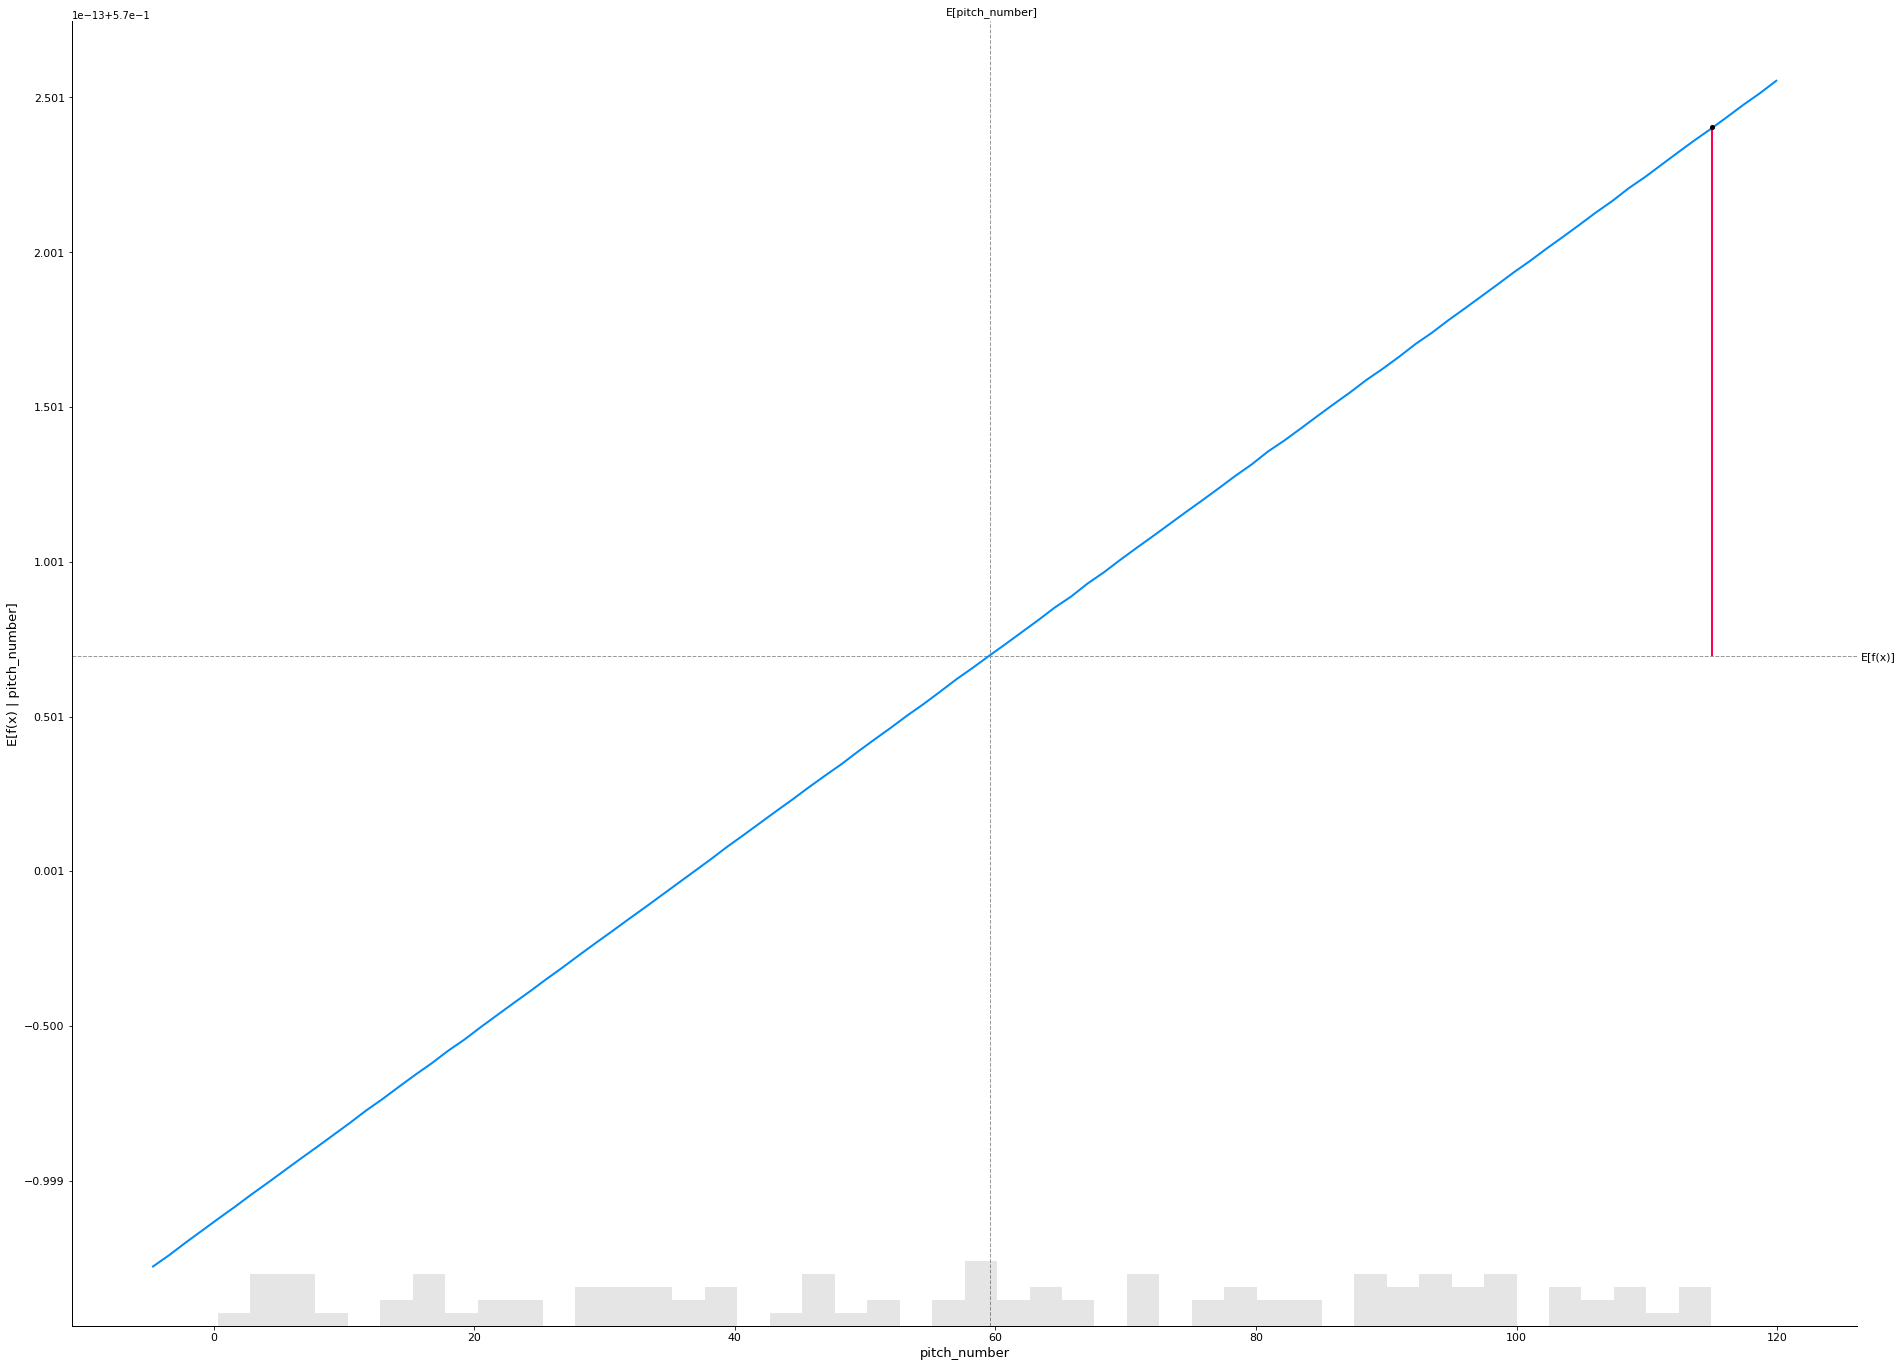

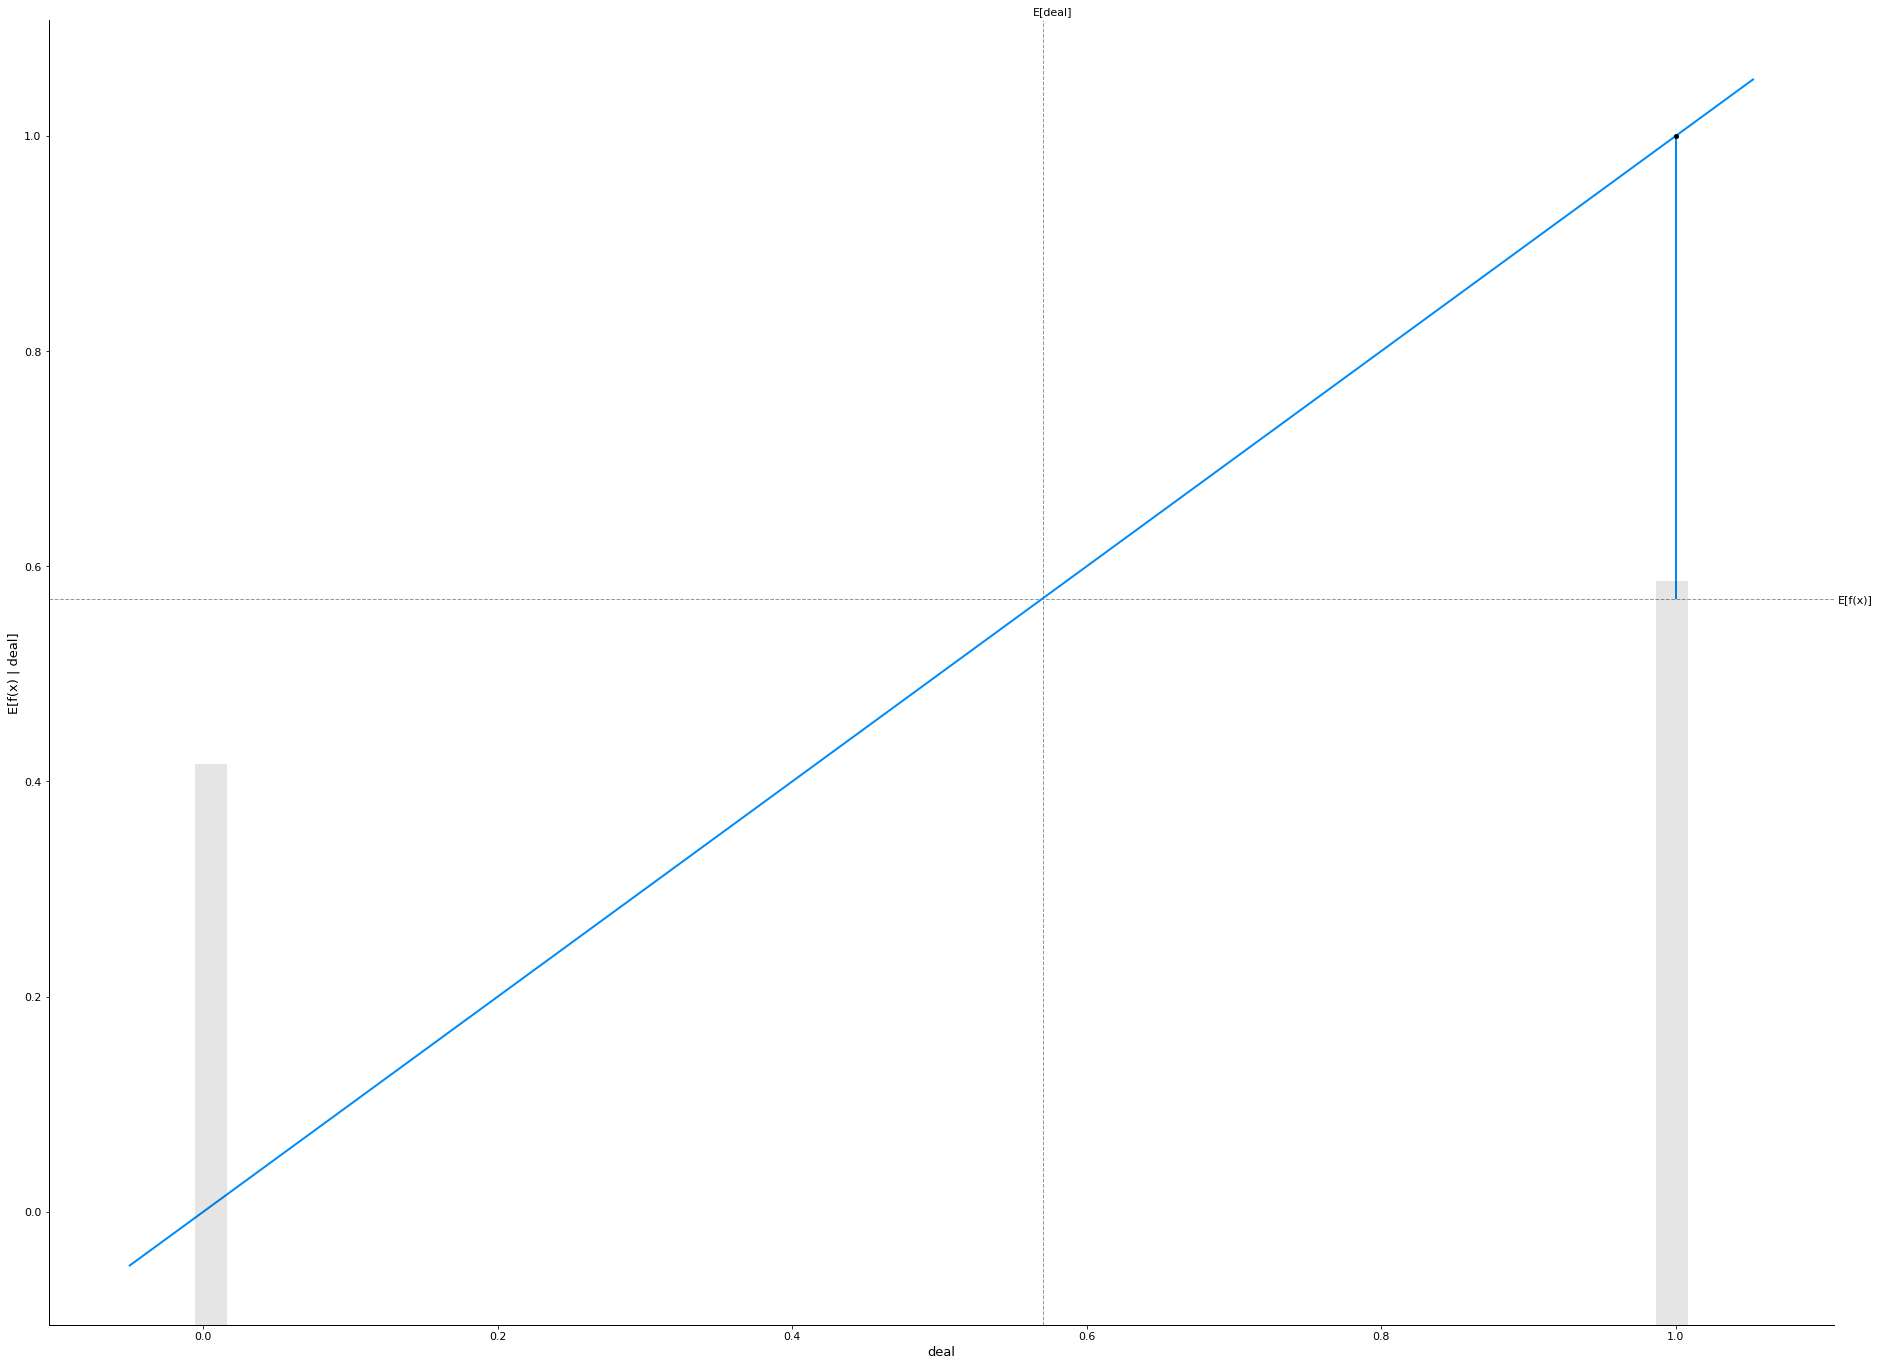

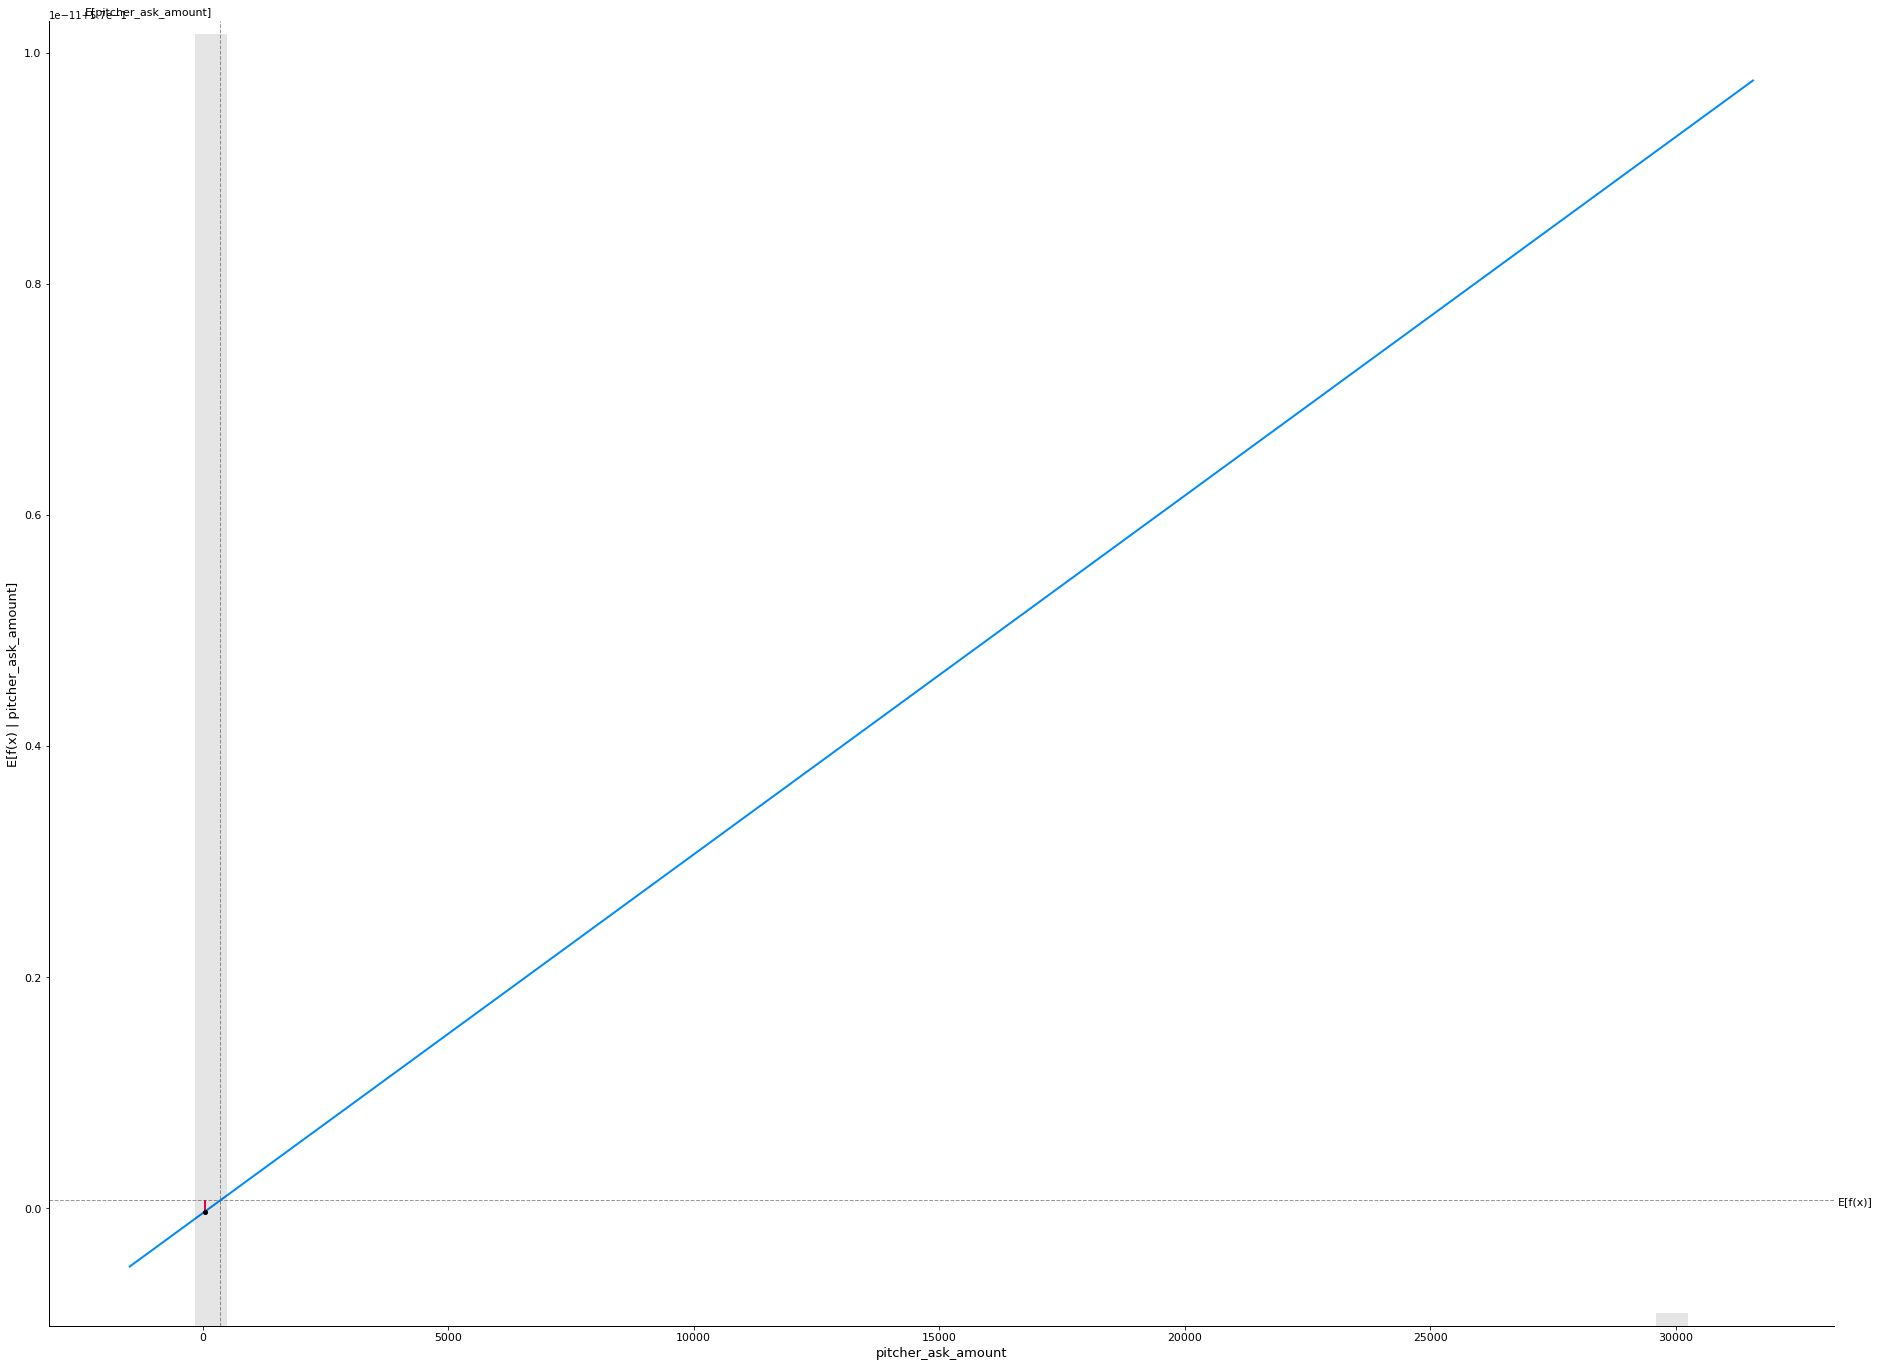

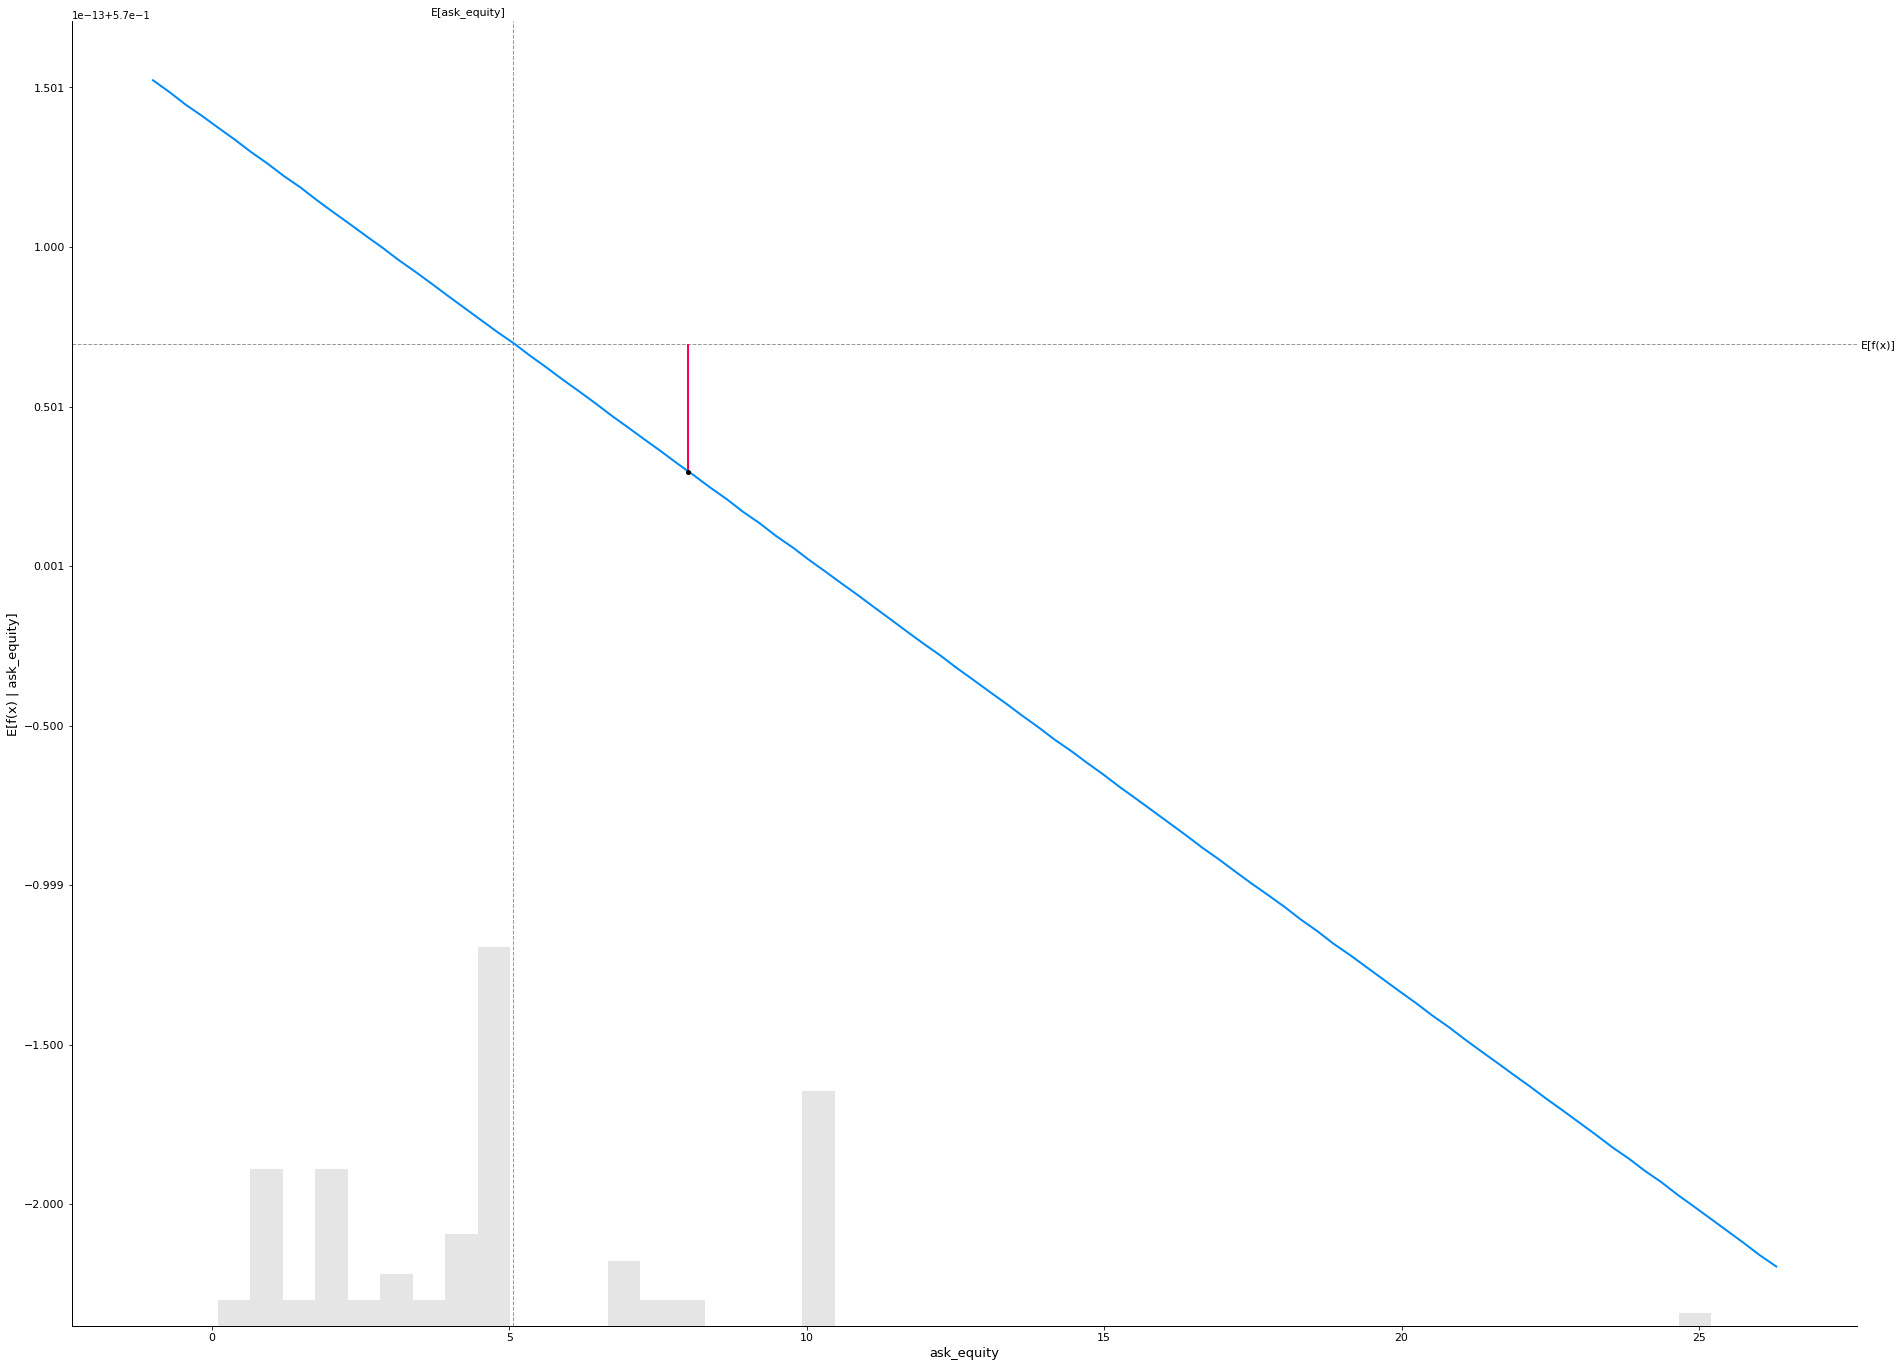

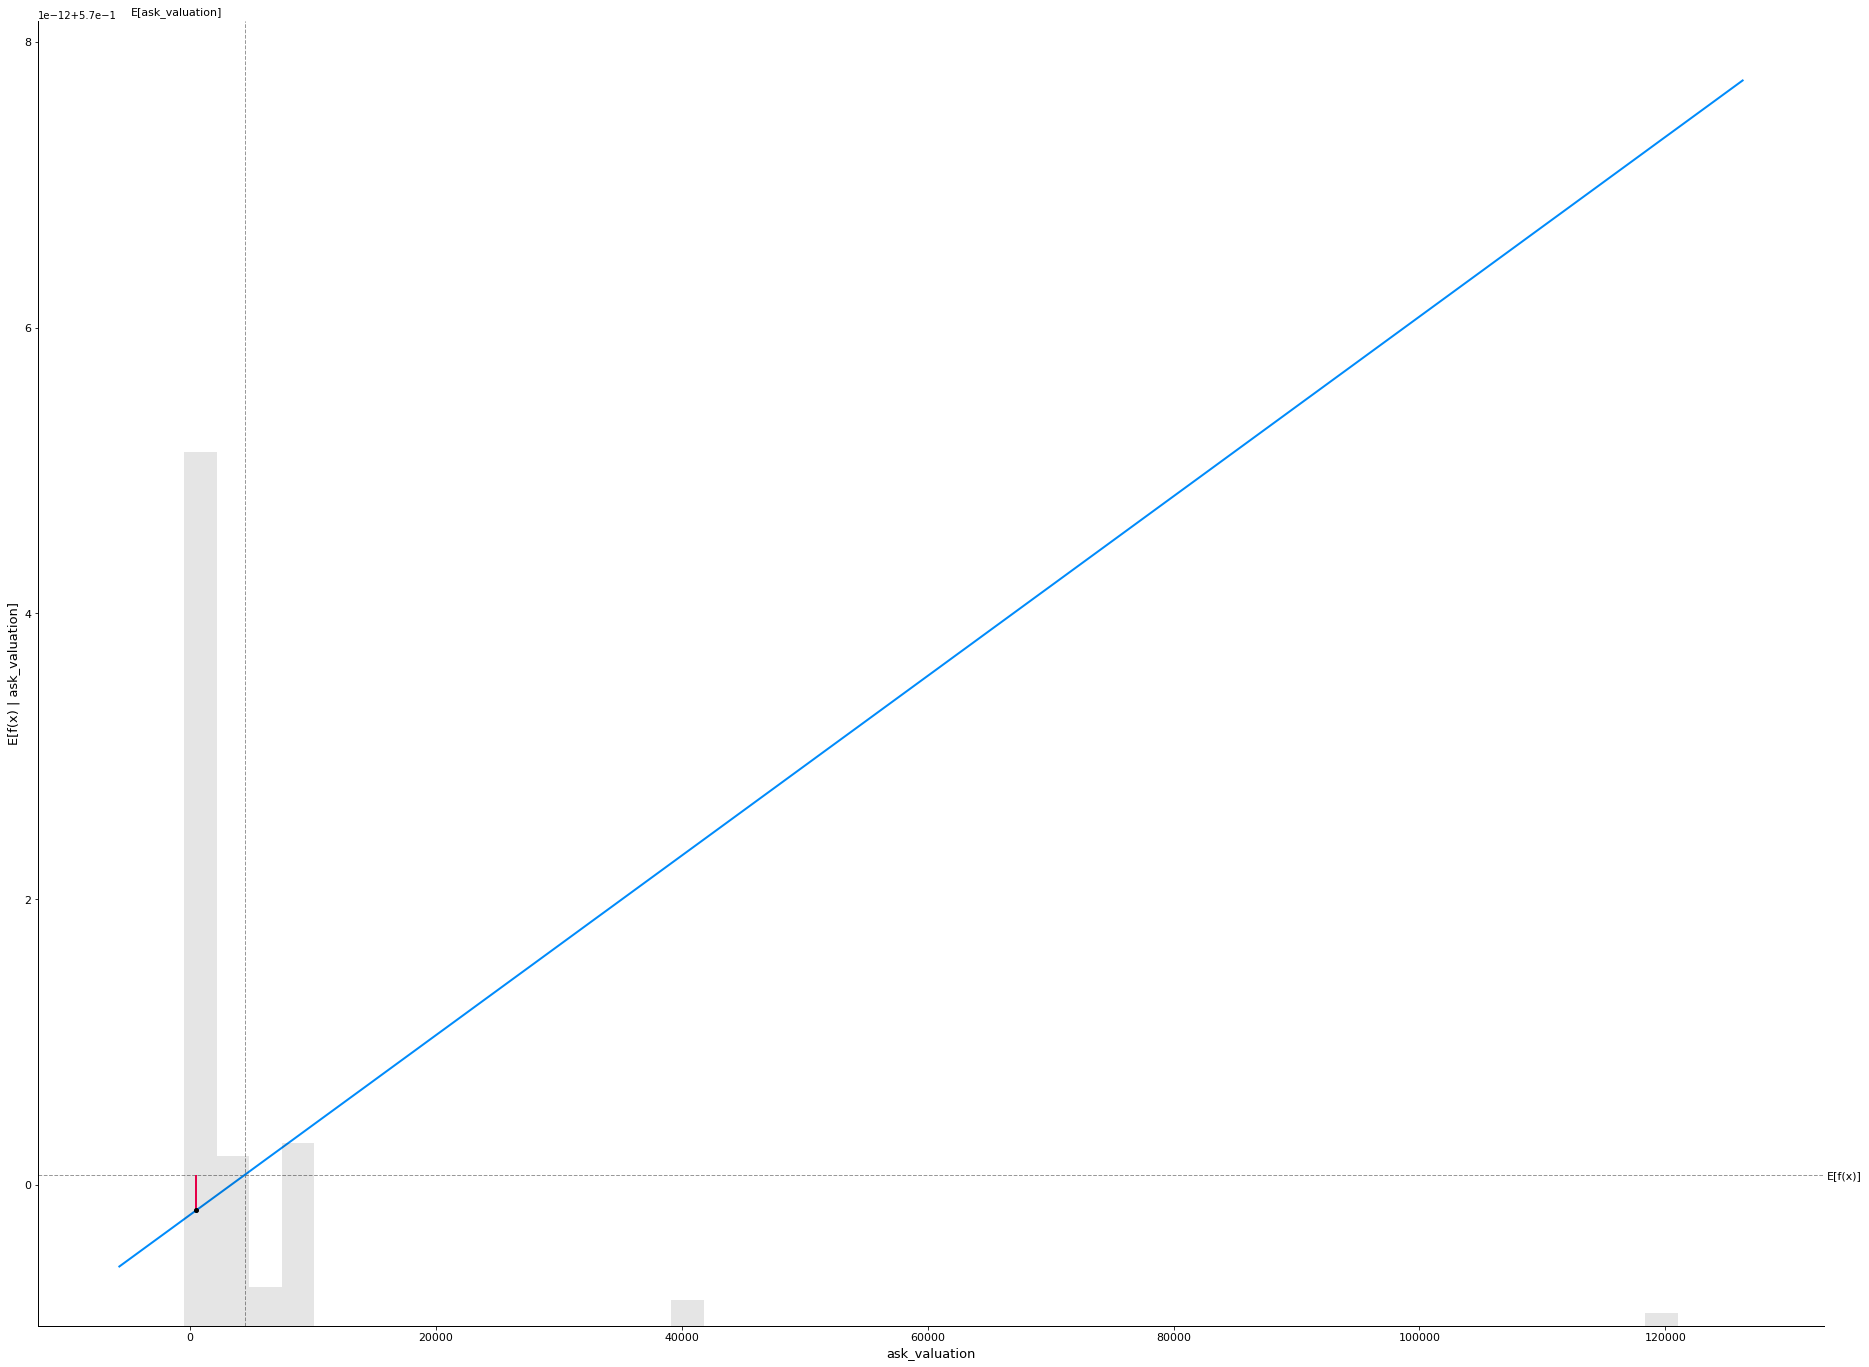

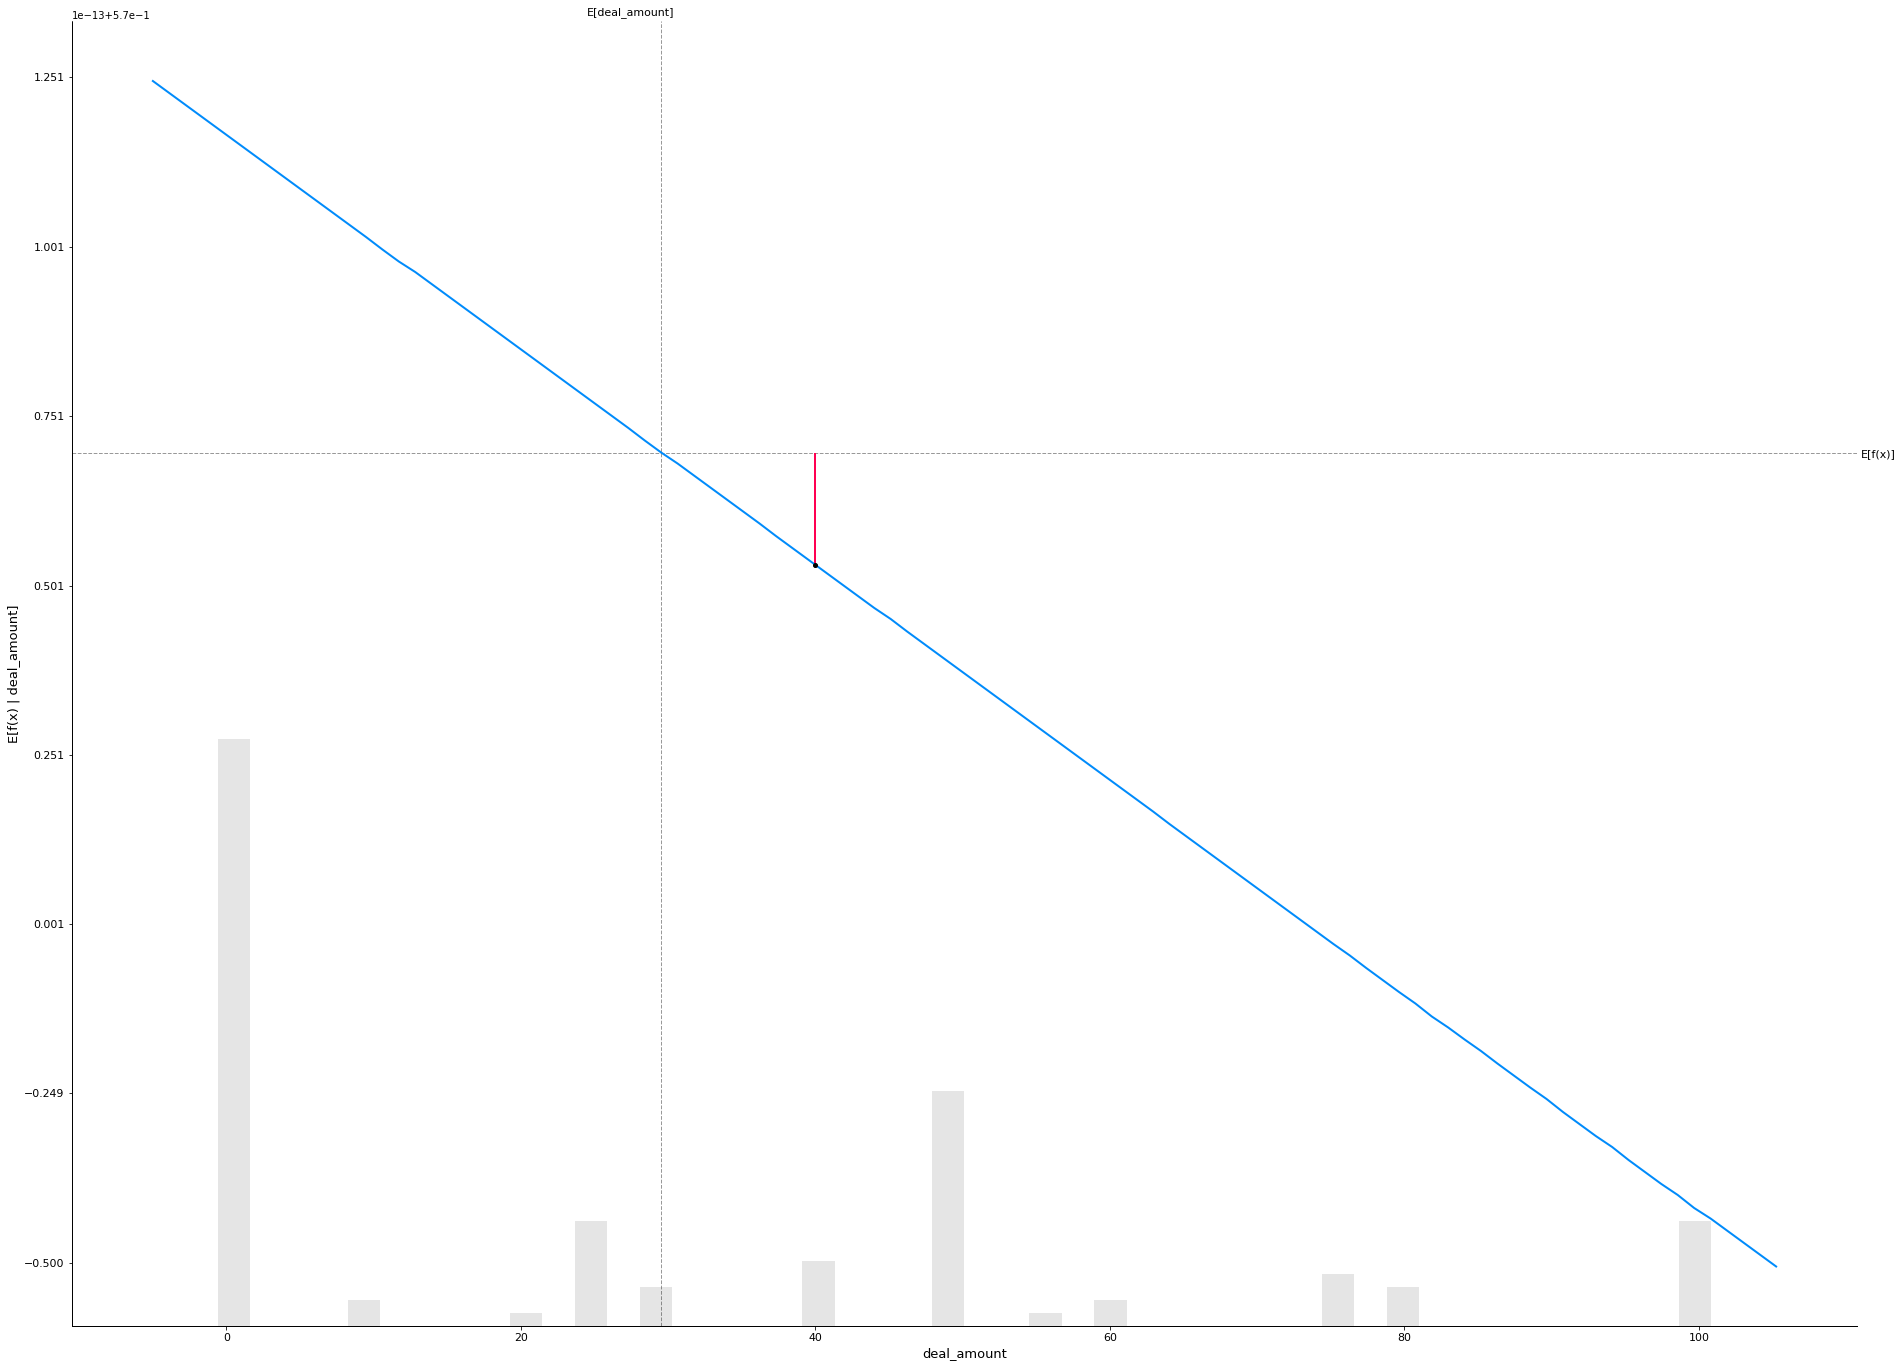

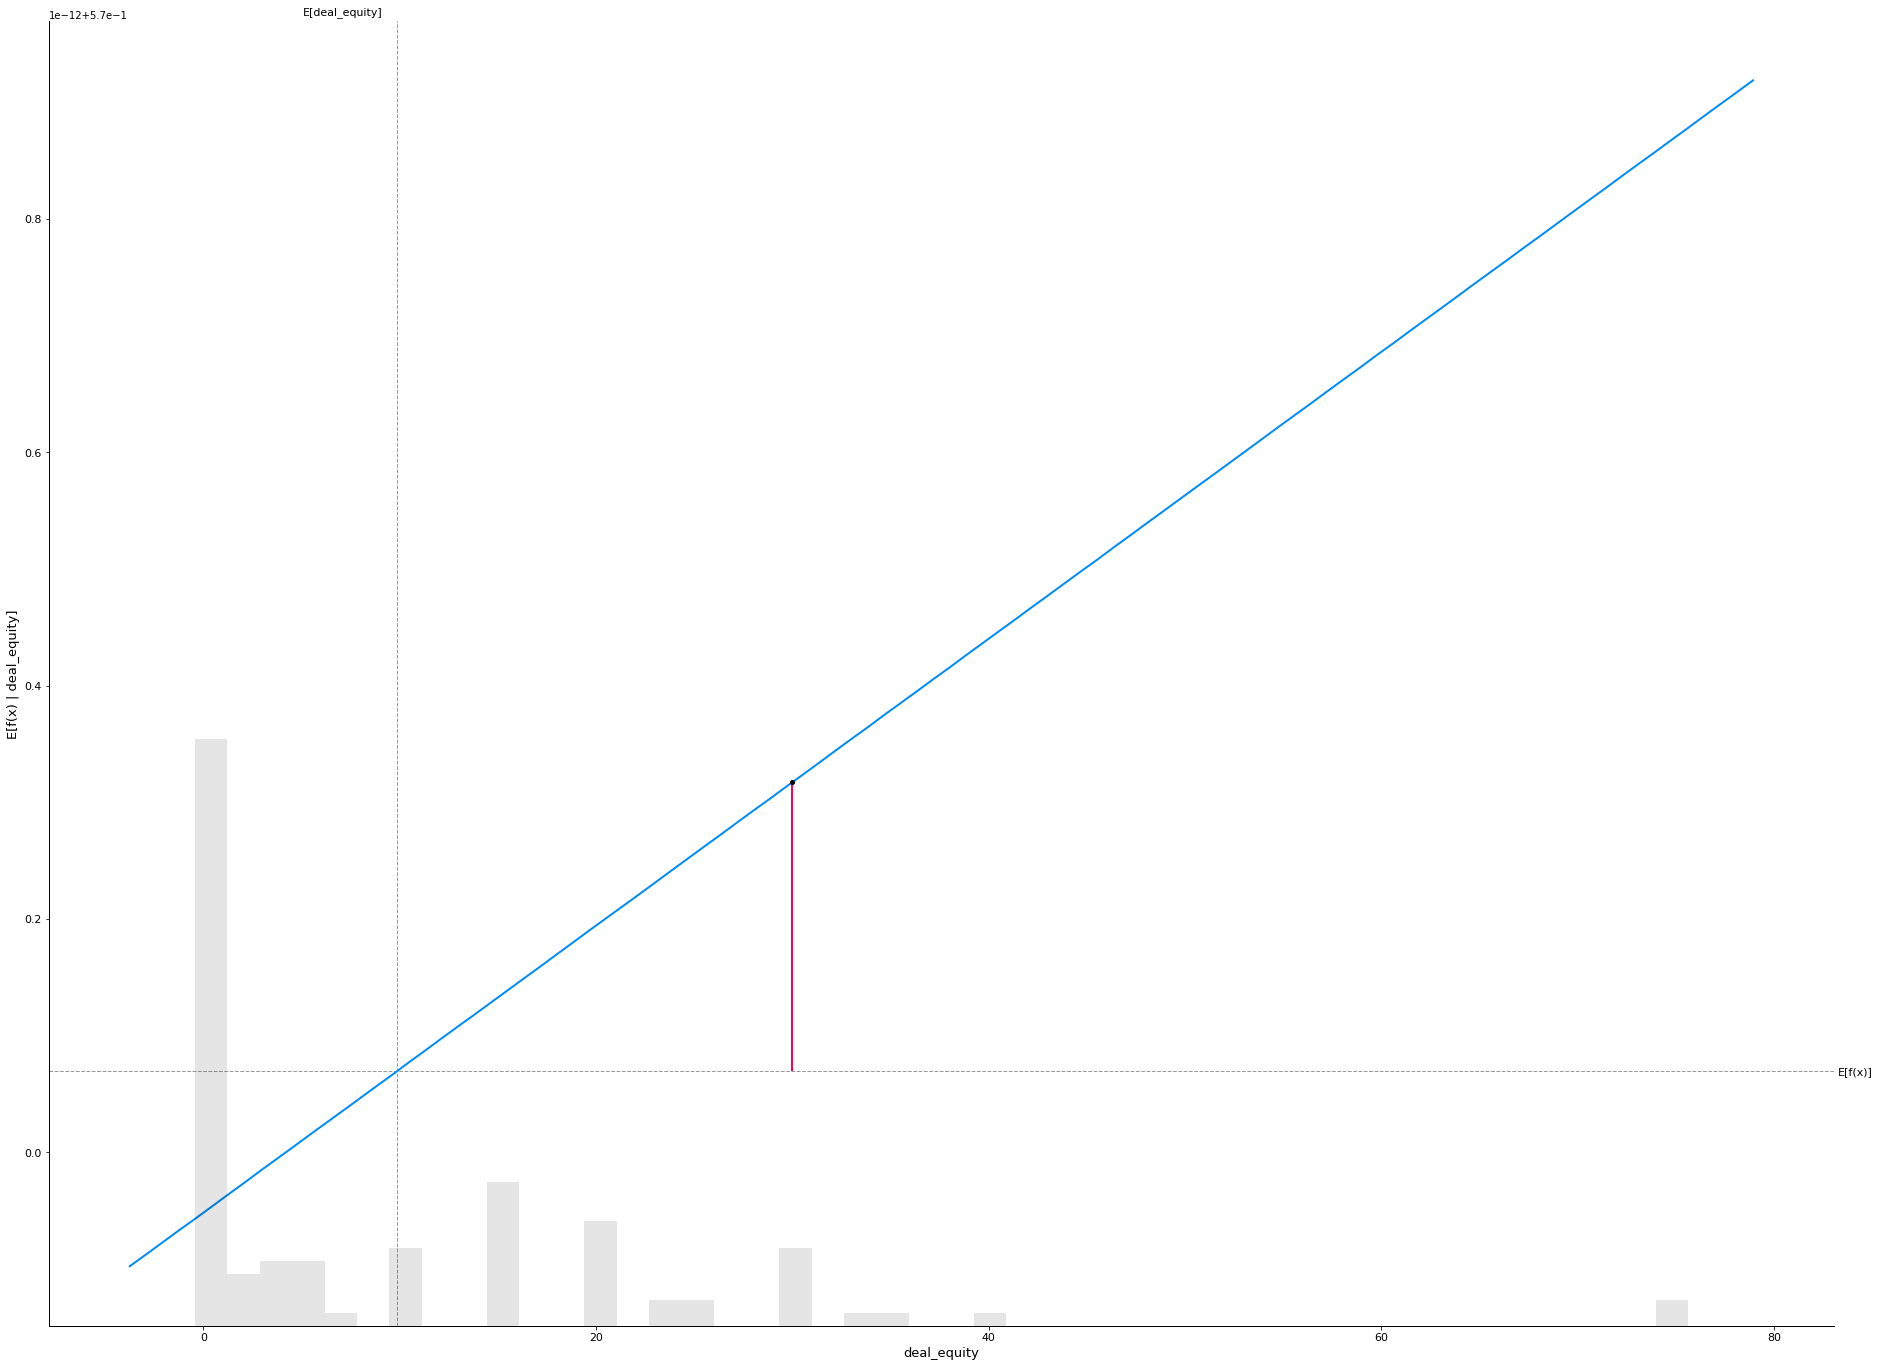

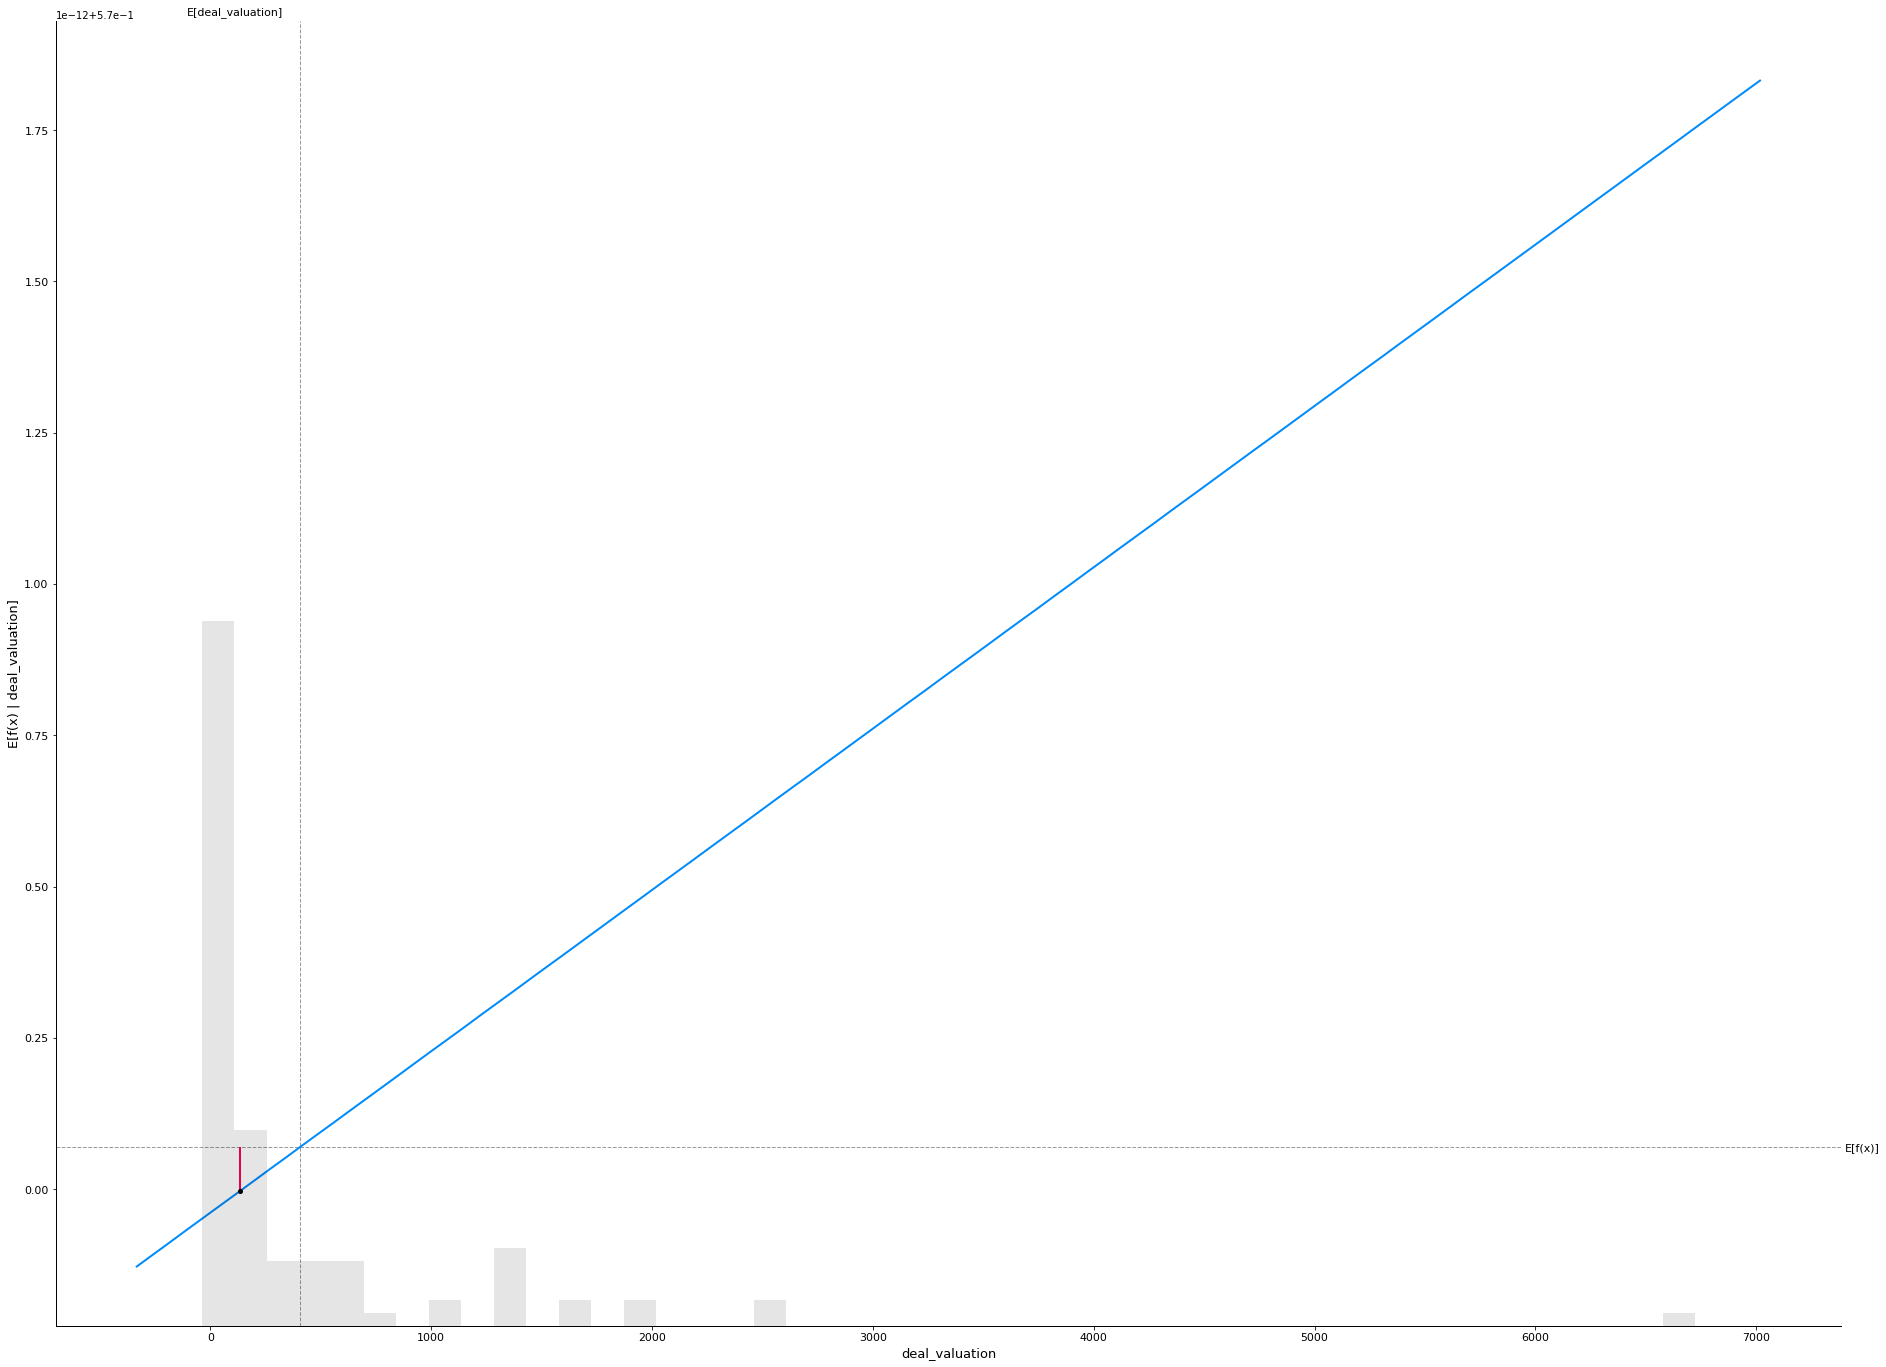

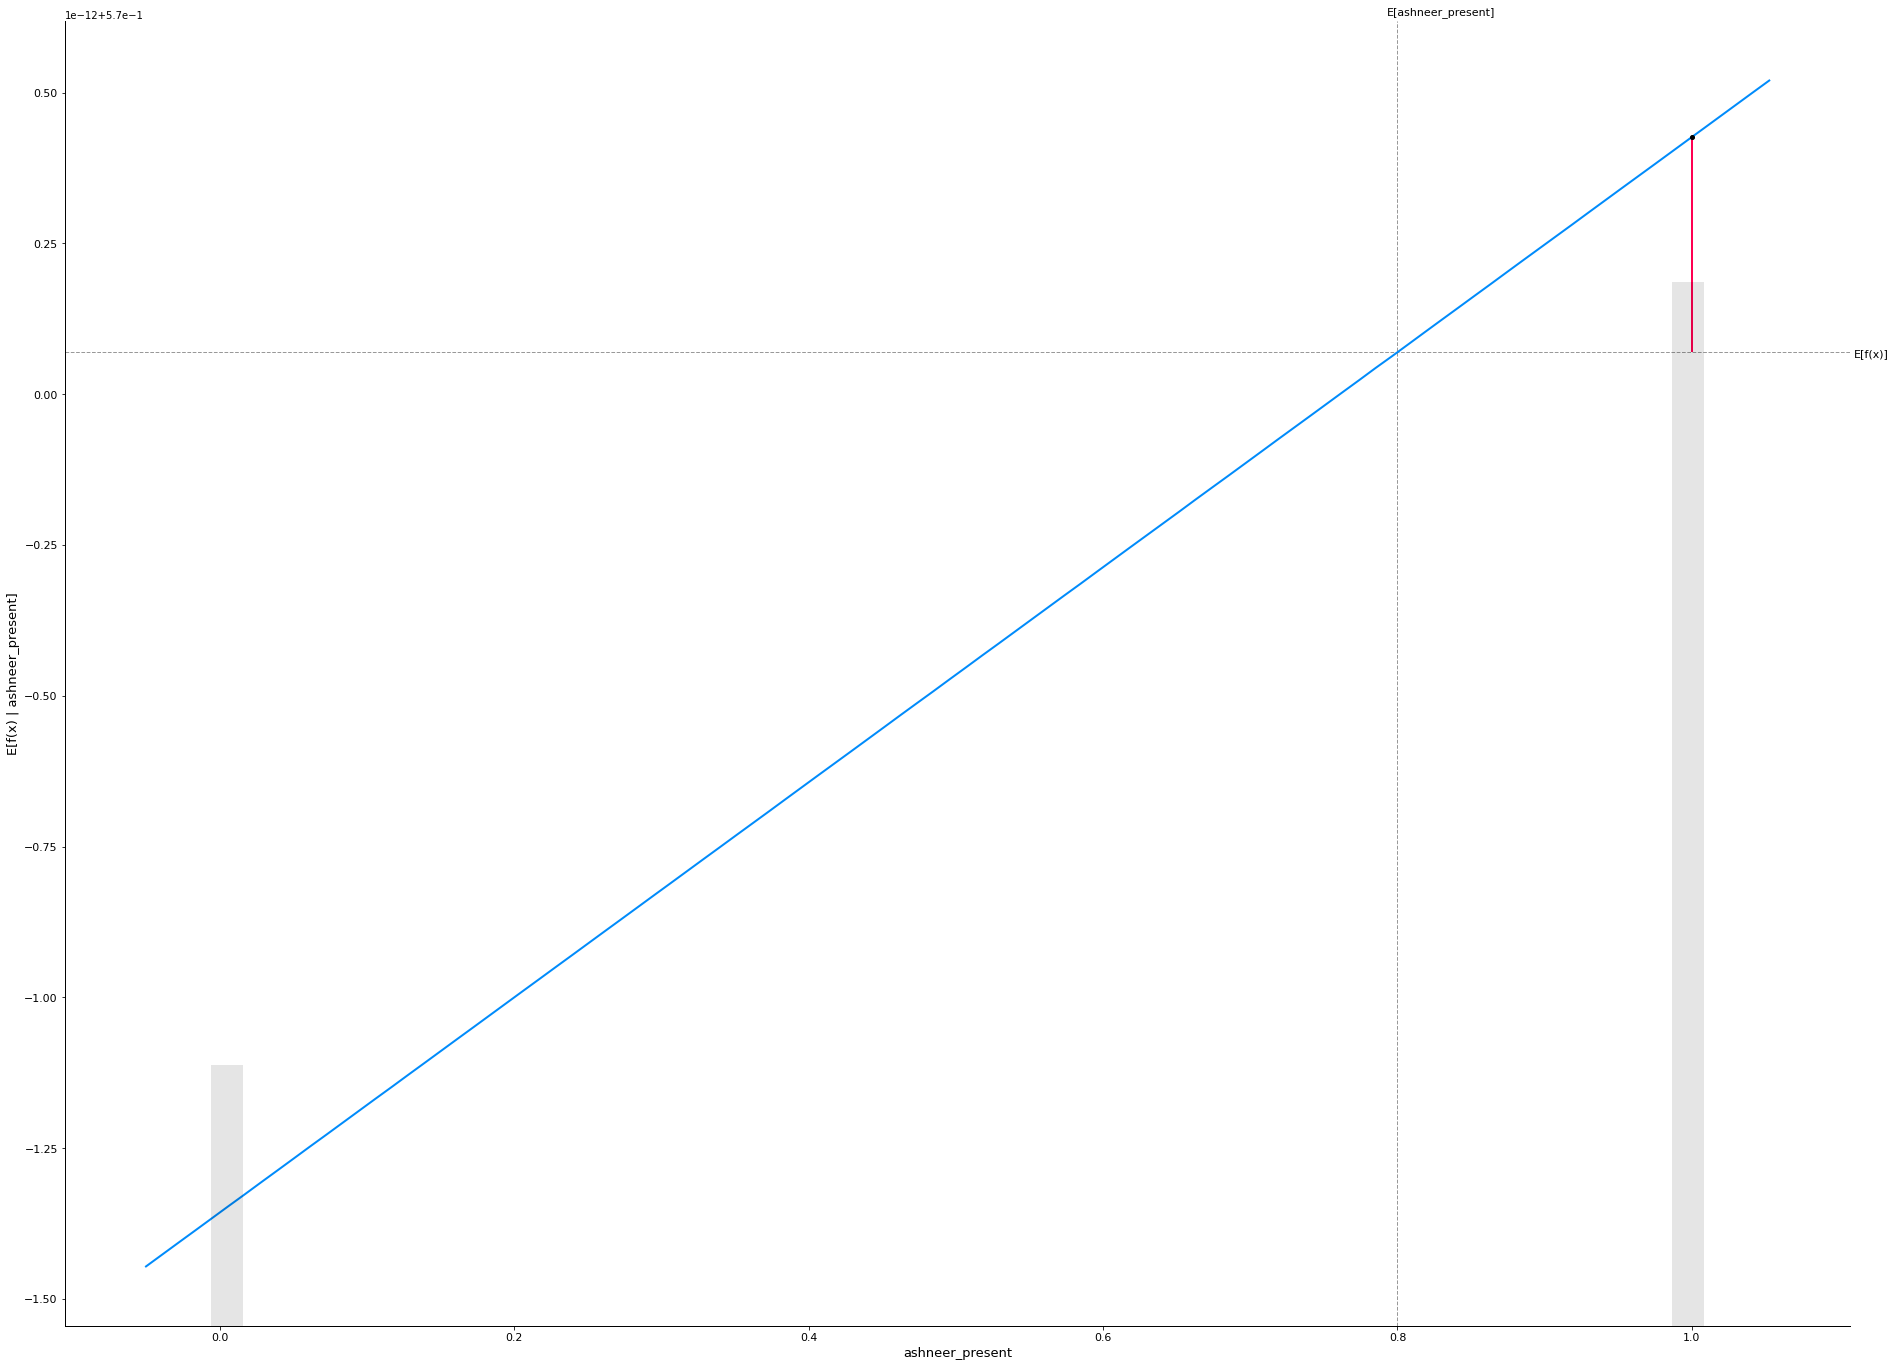

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.


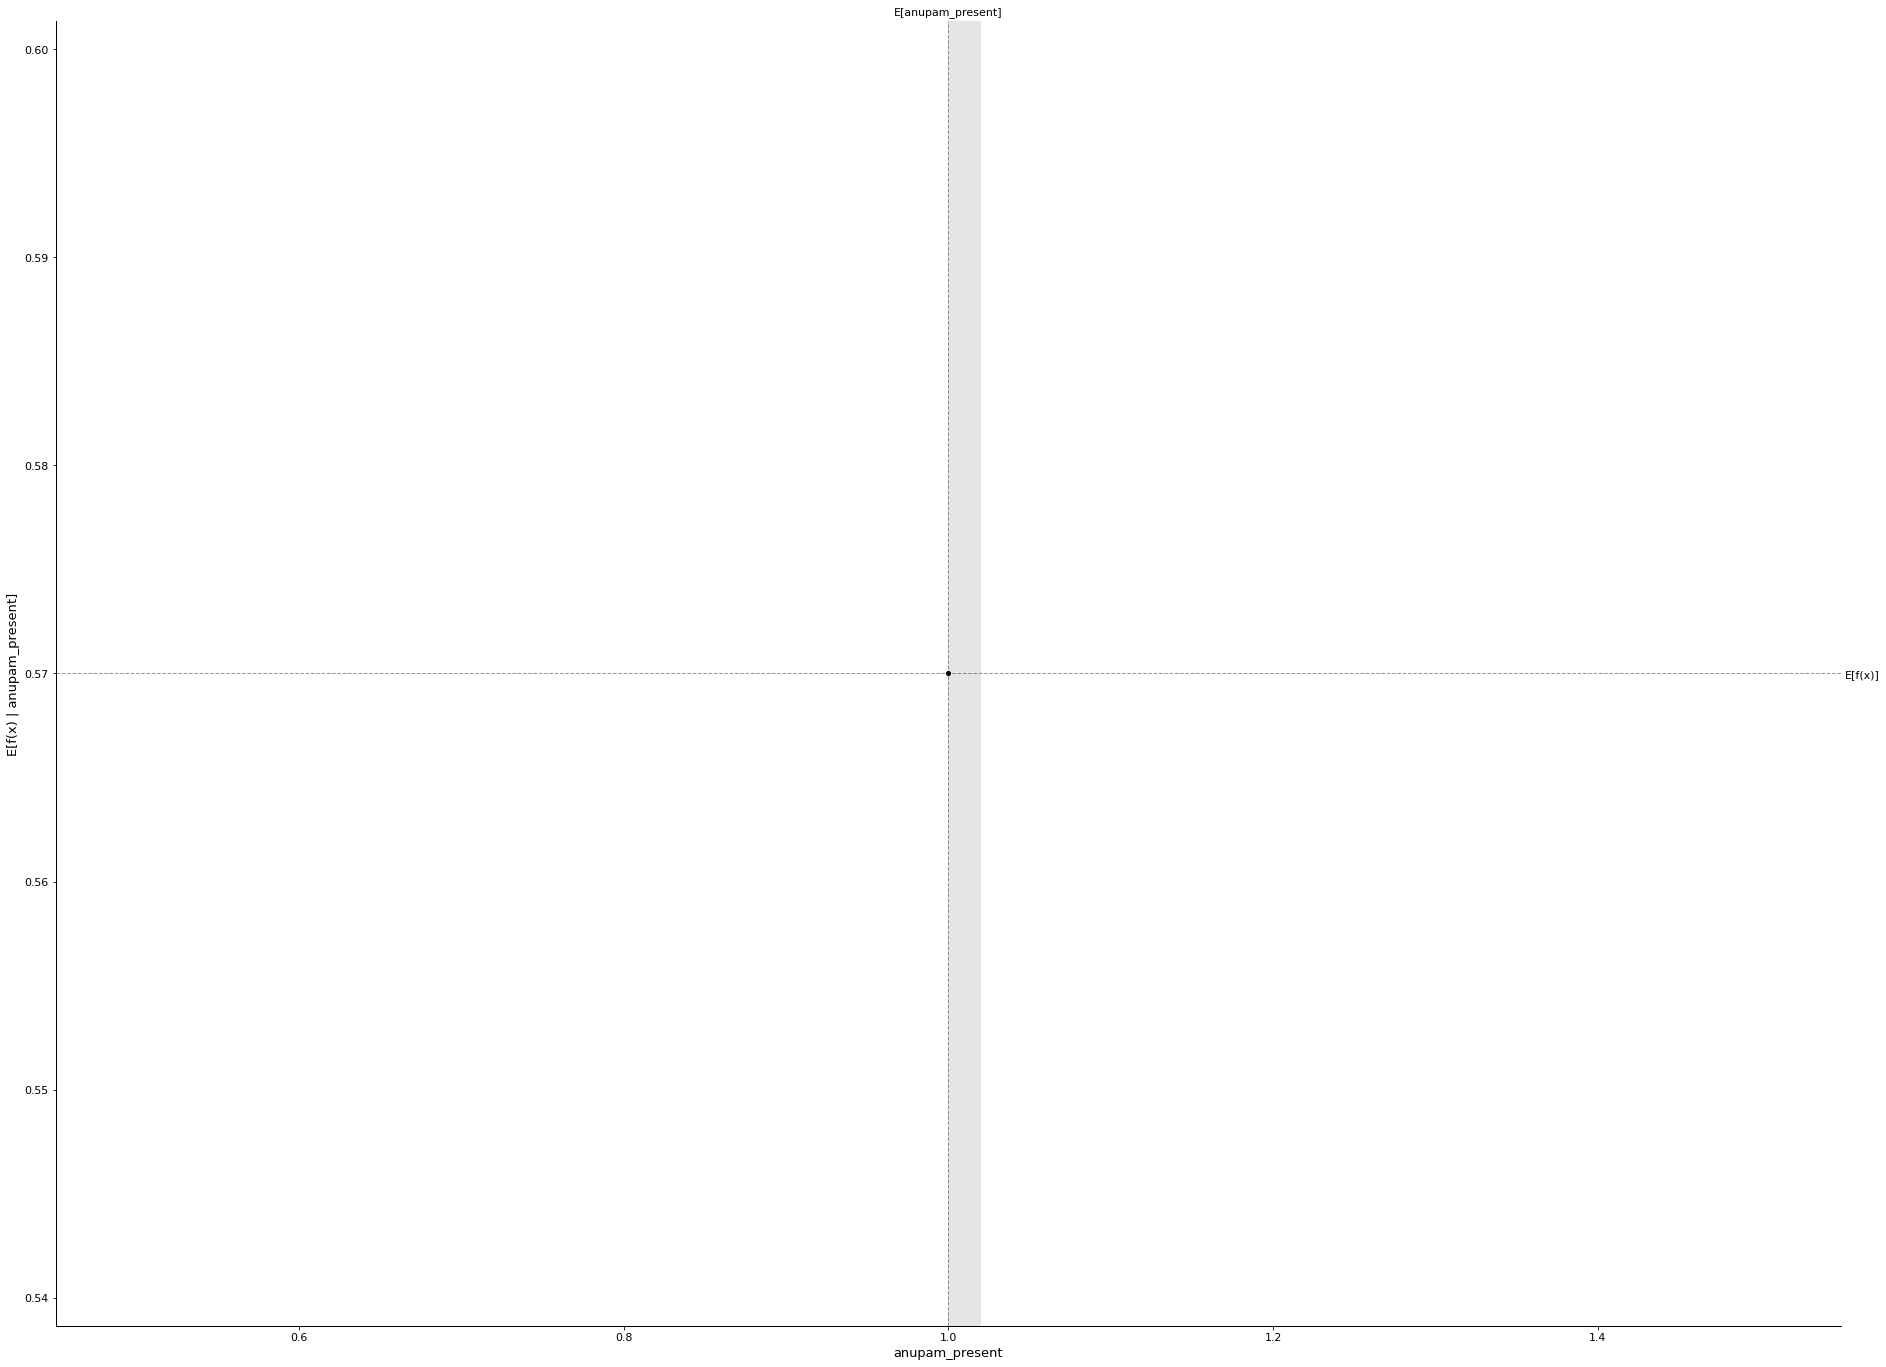

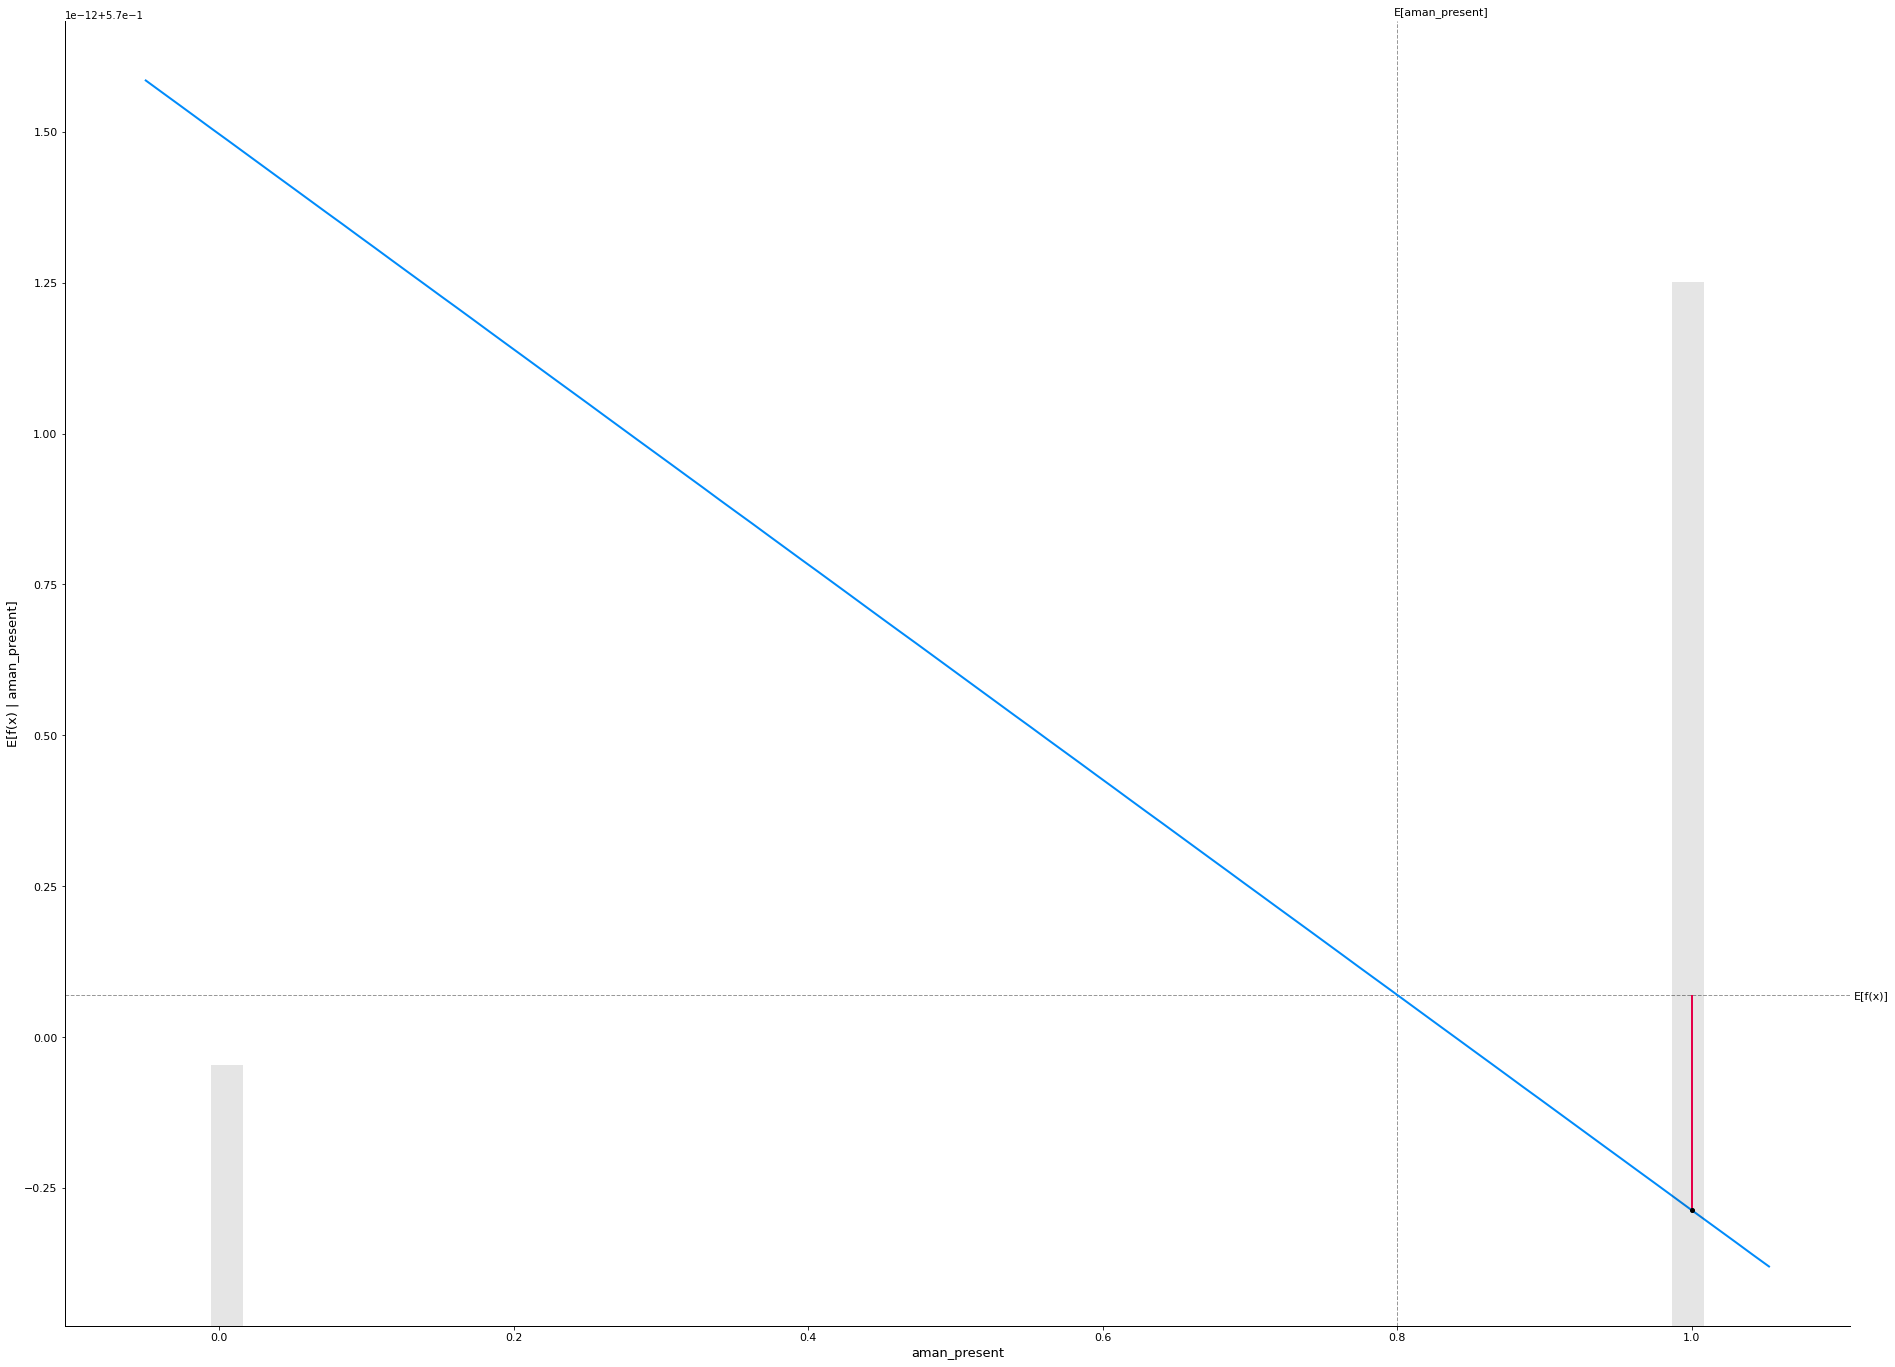

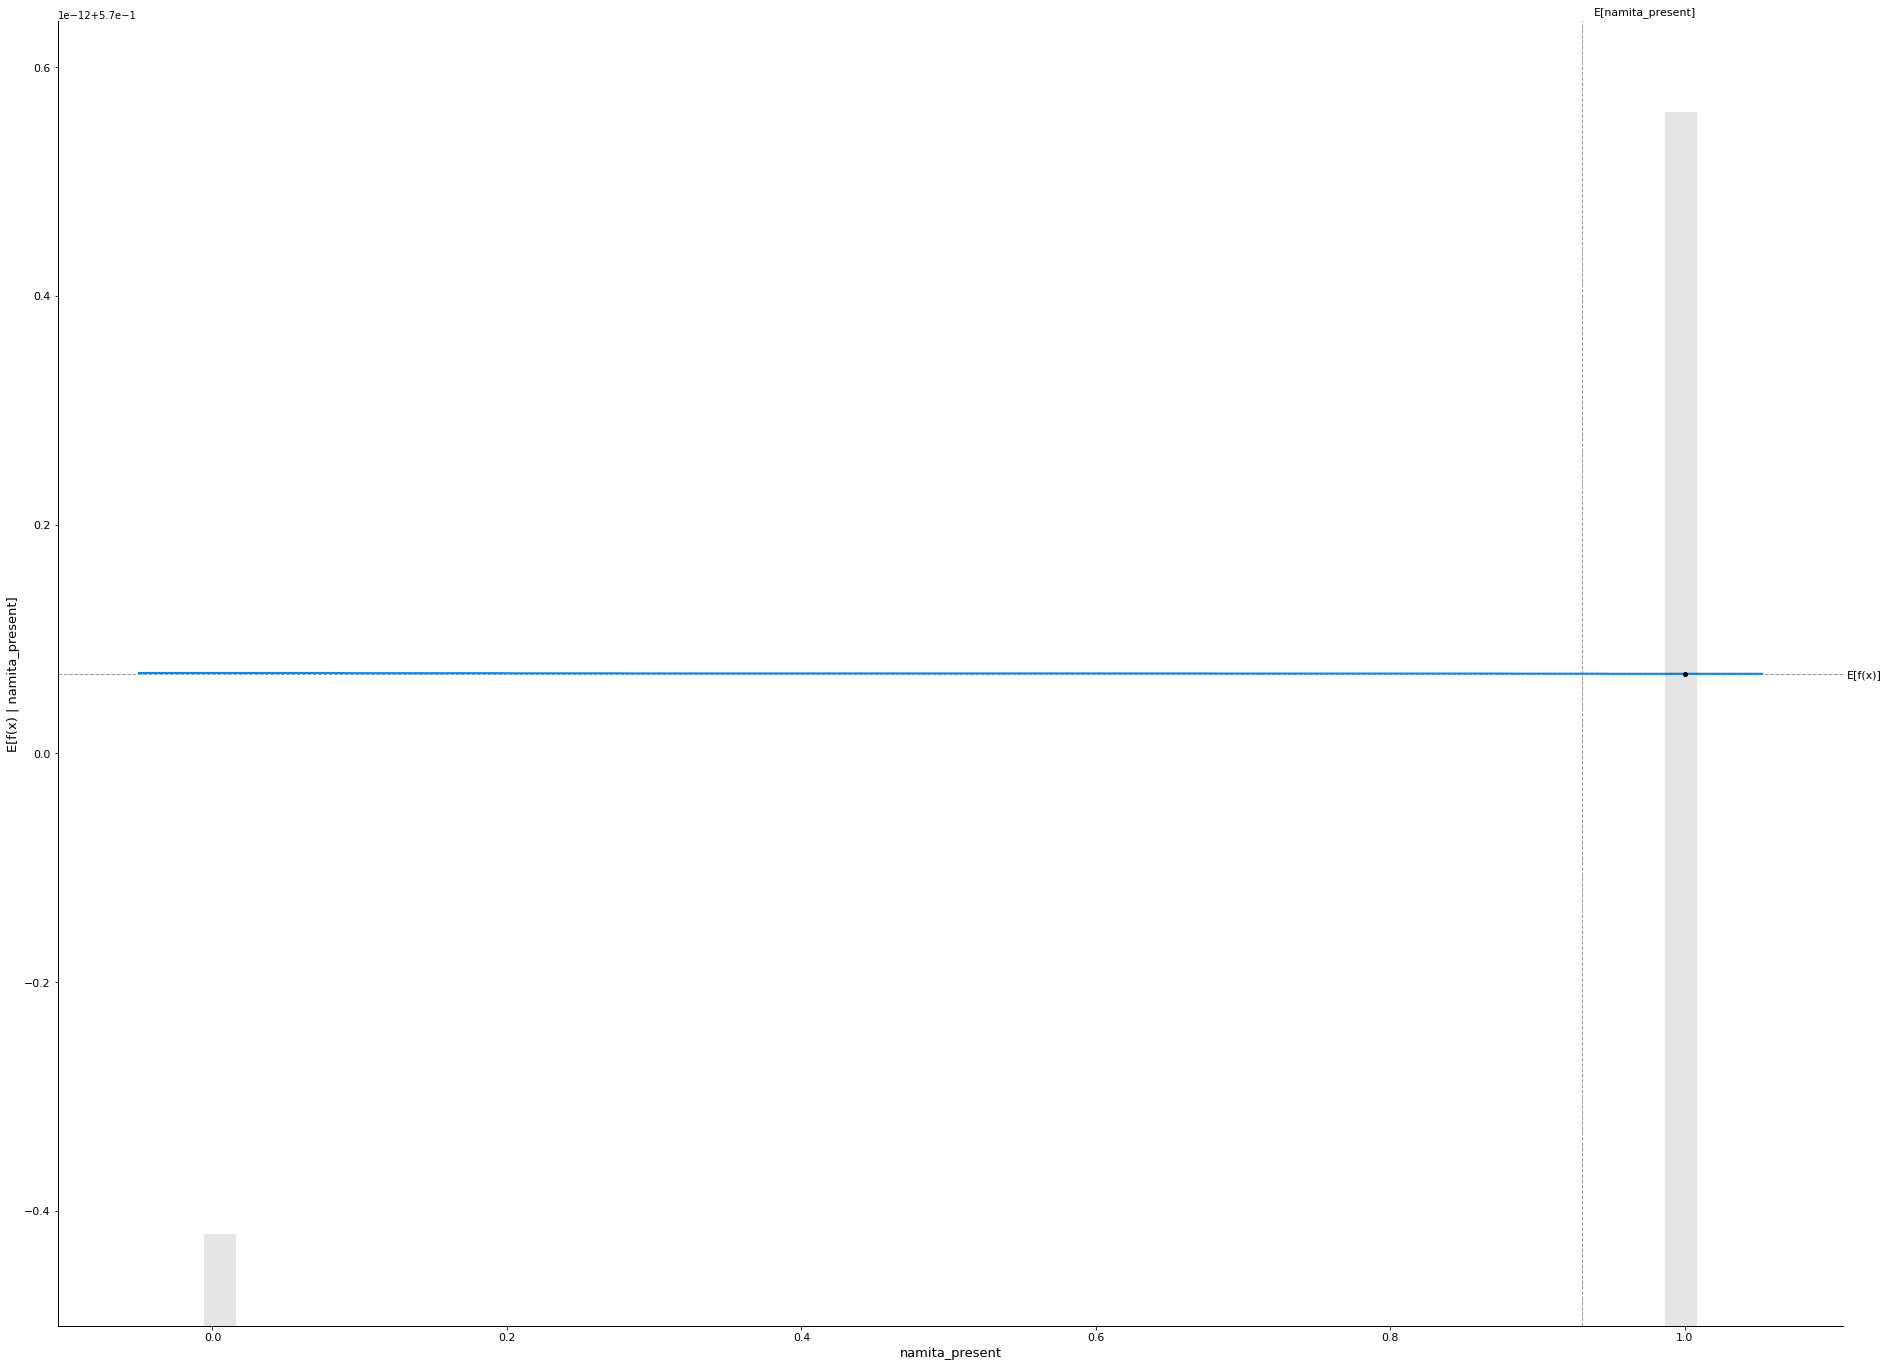

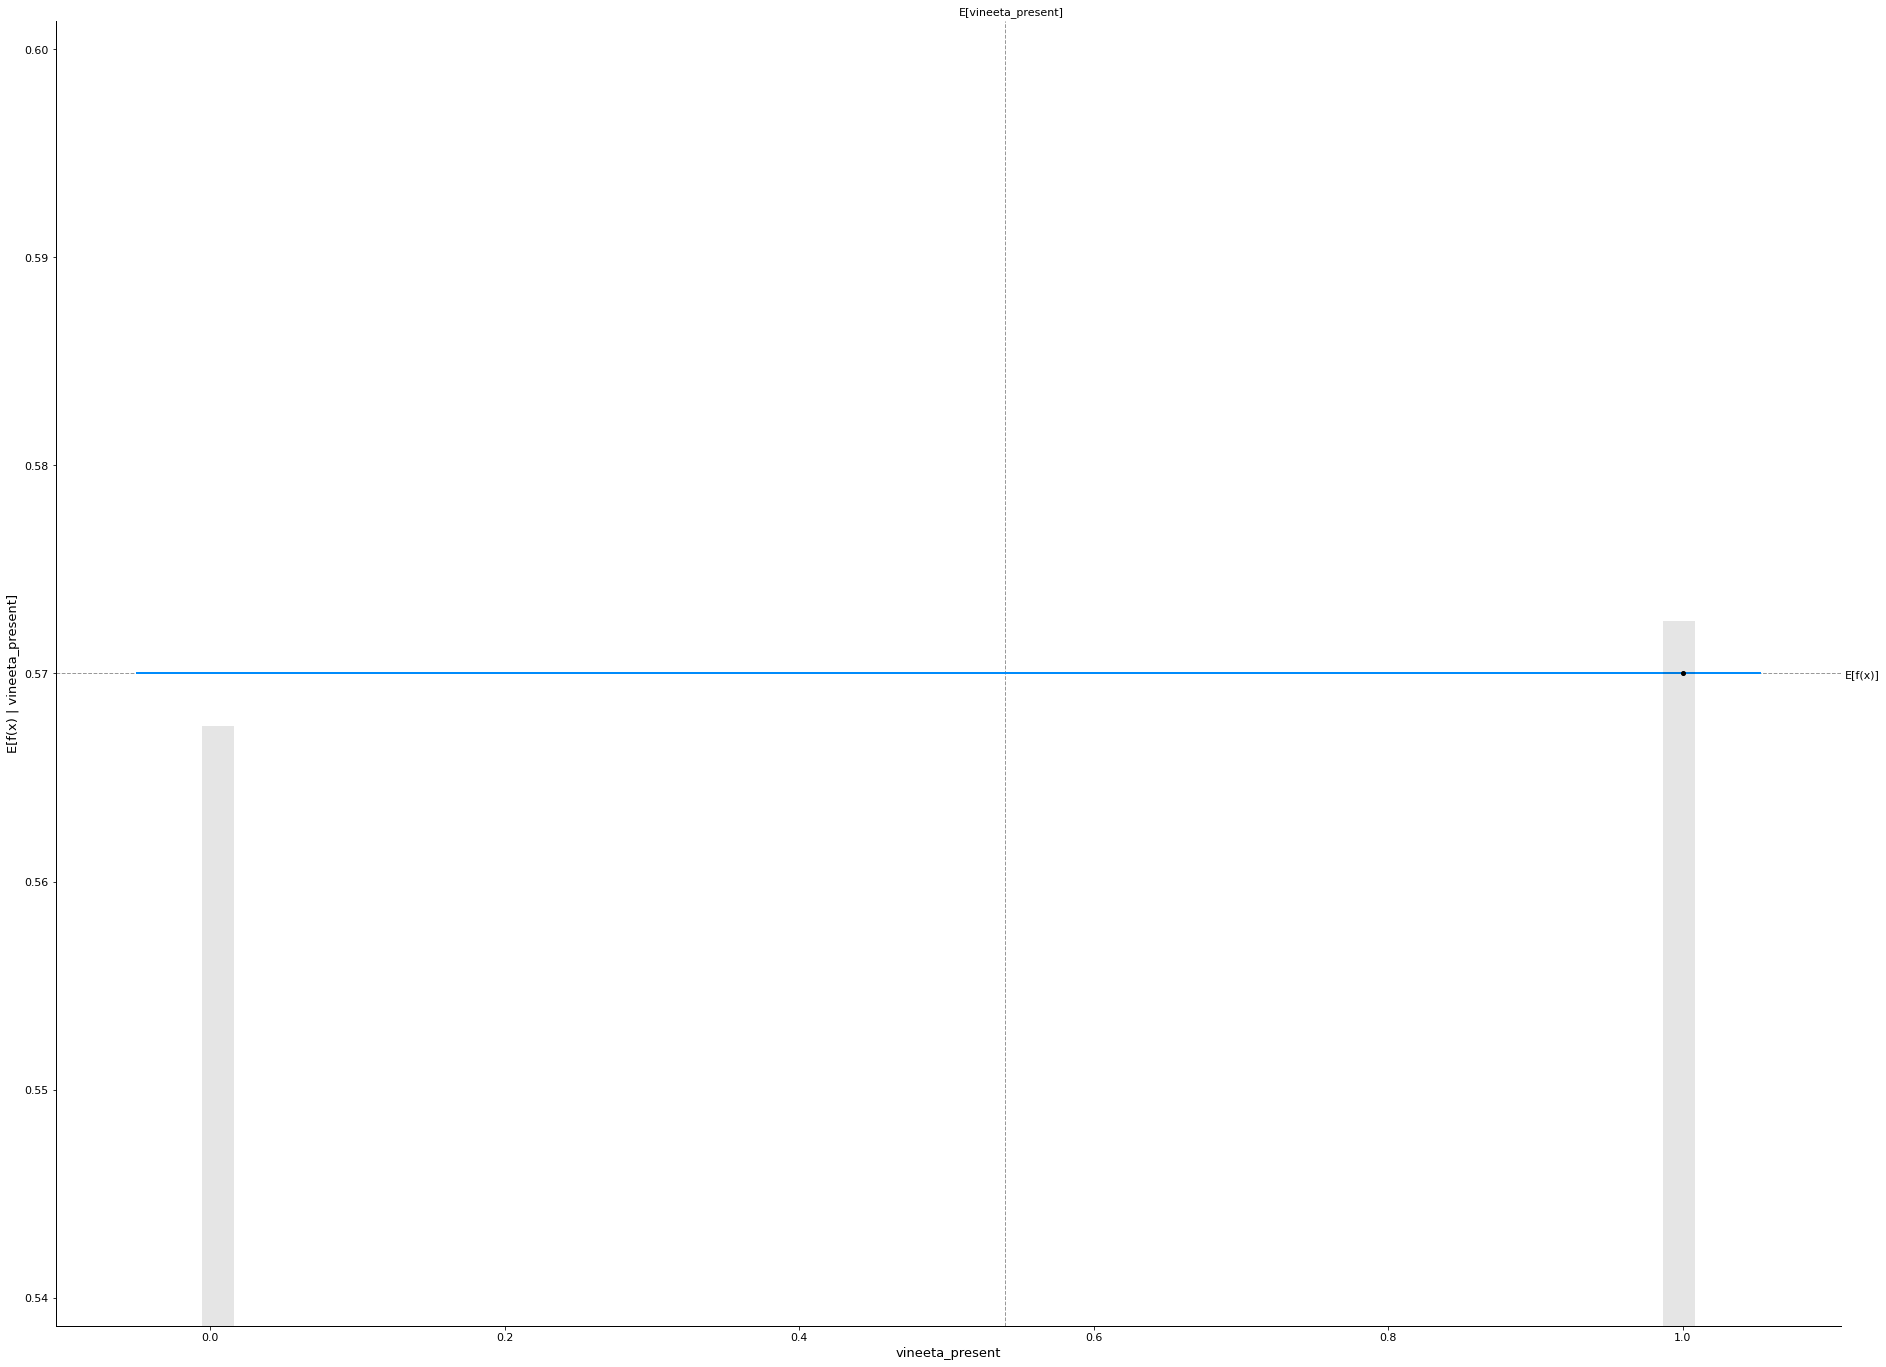

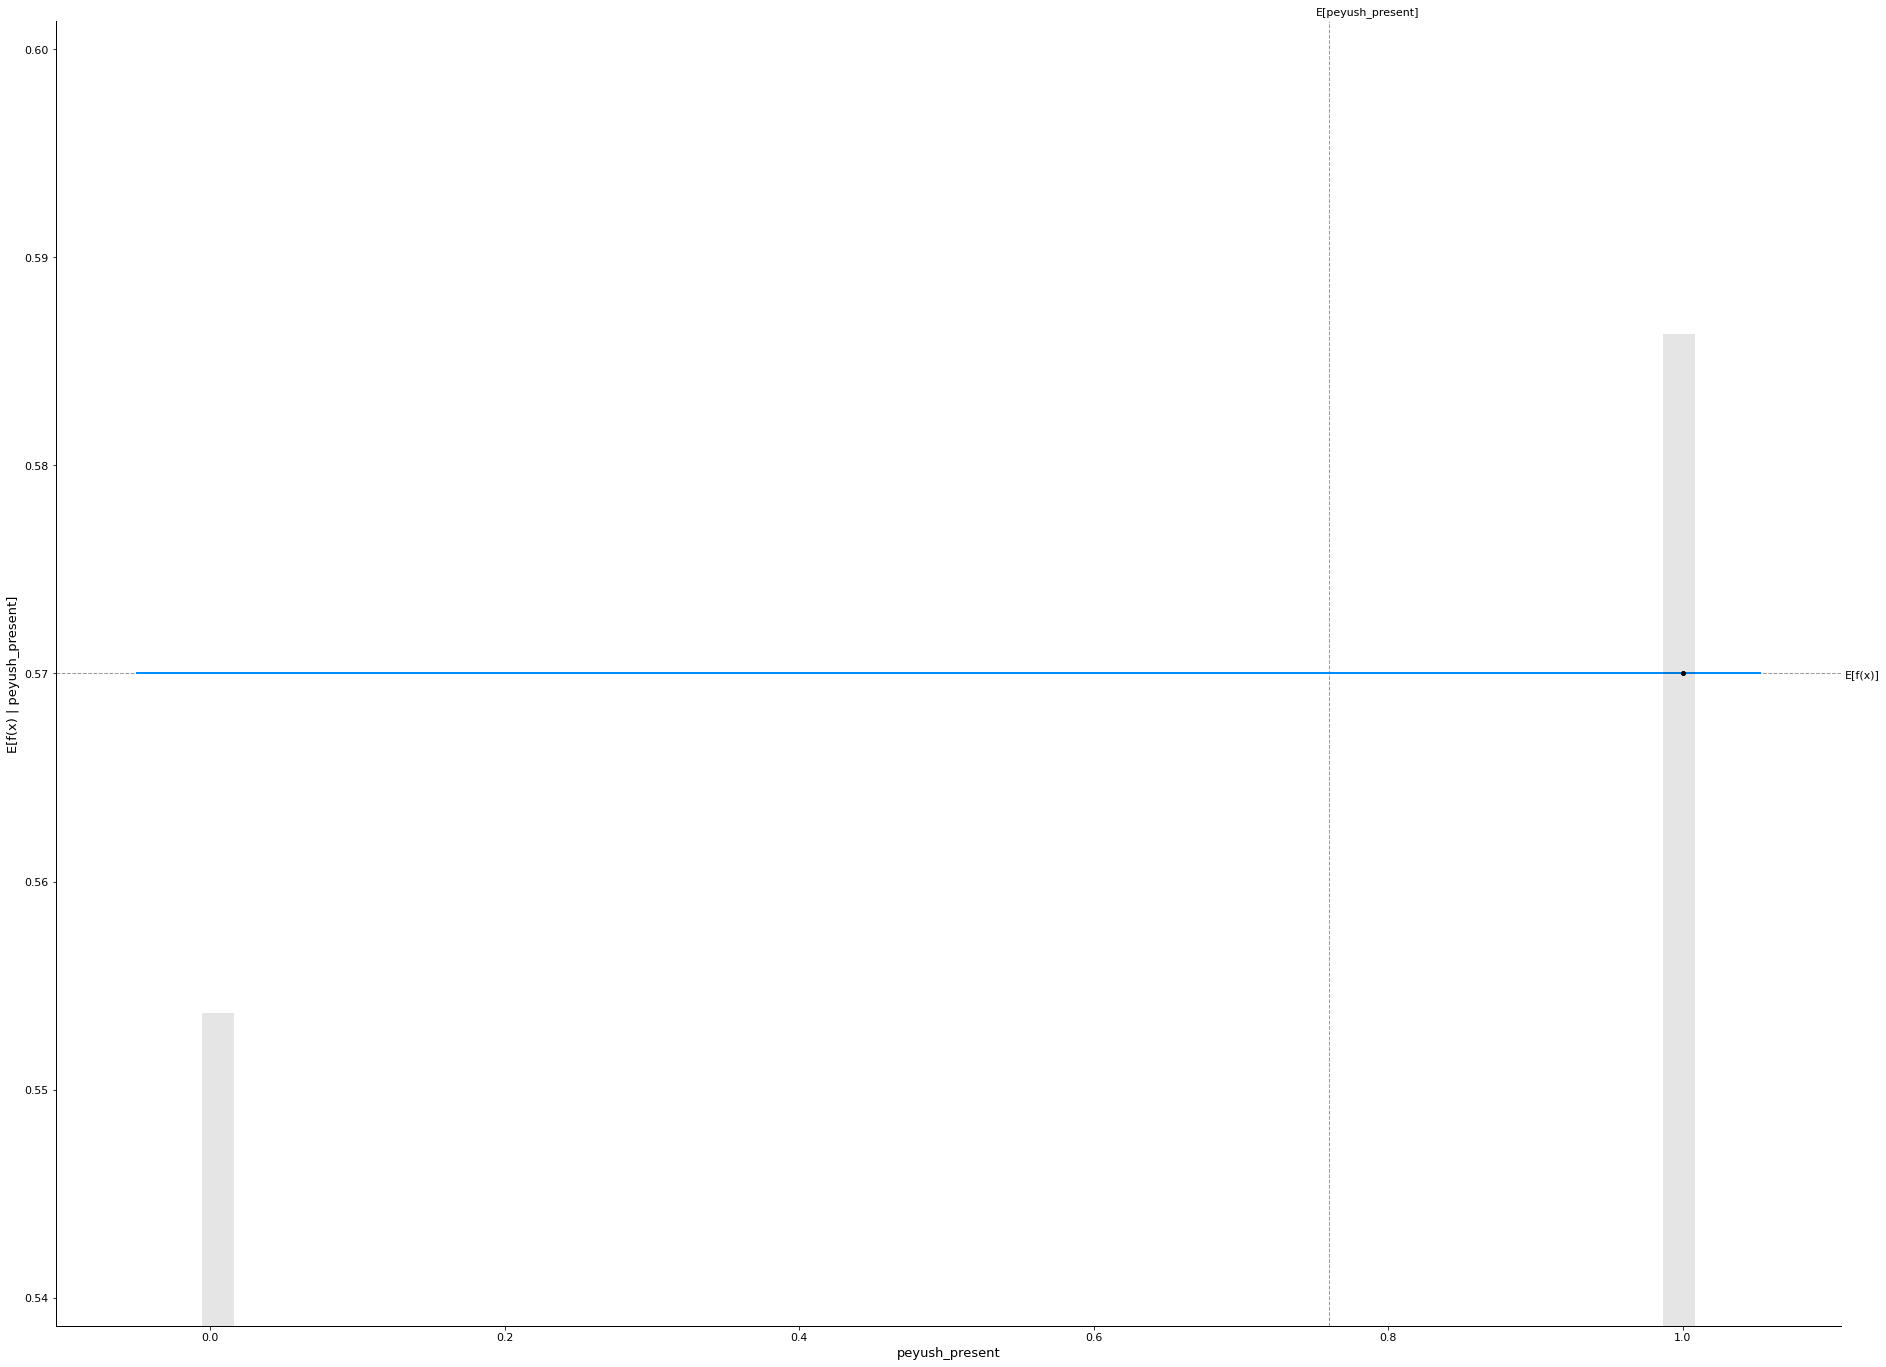

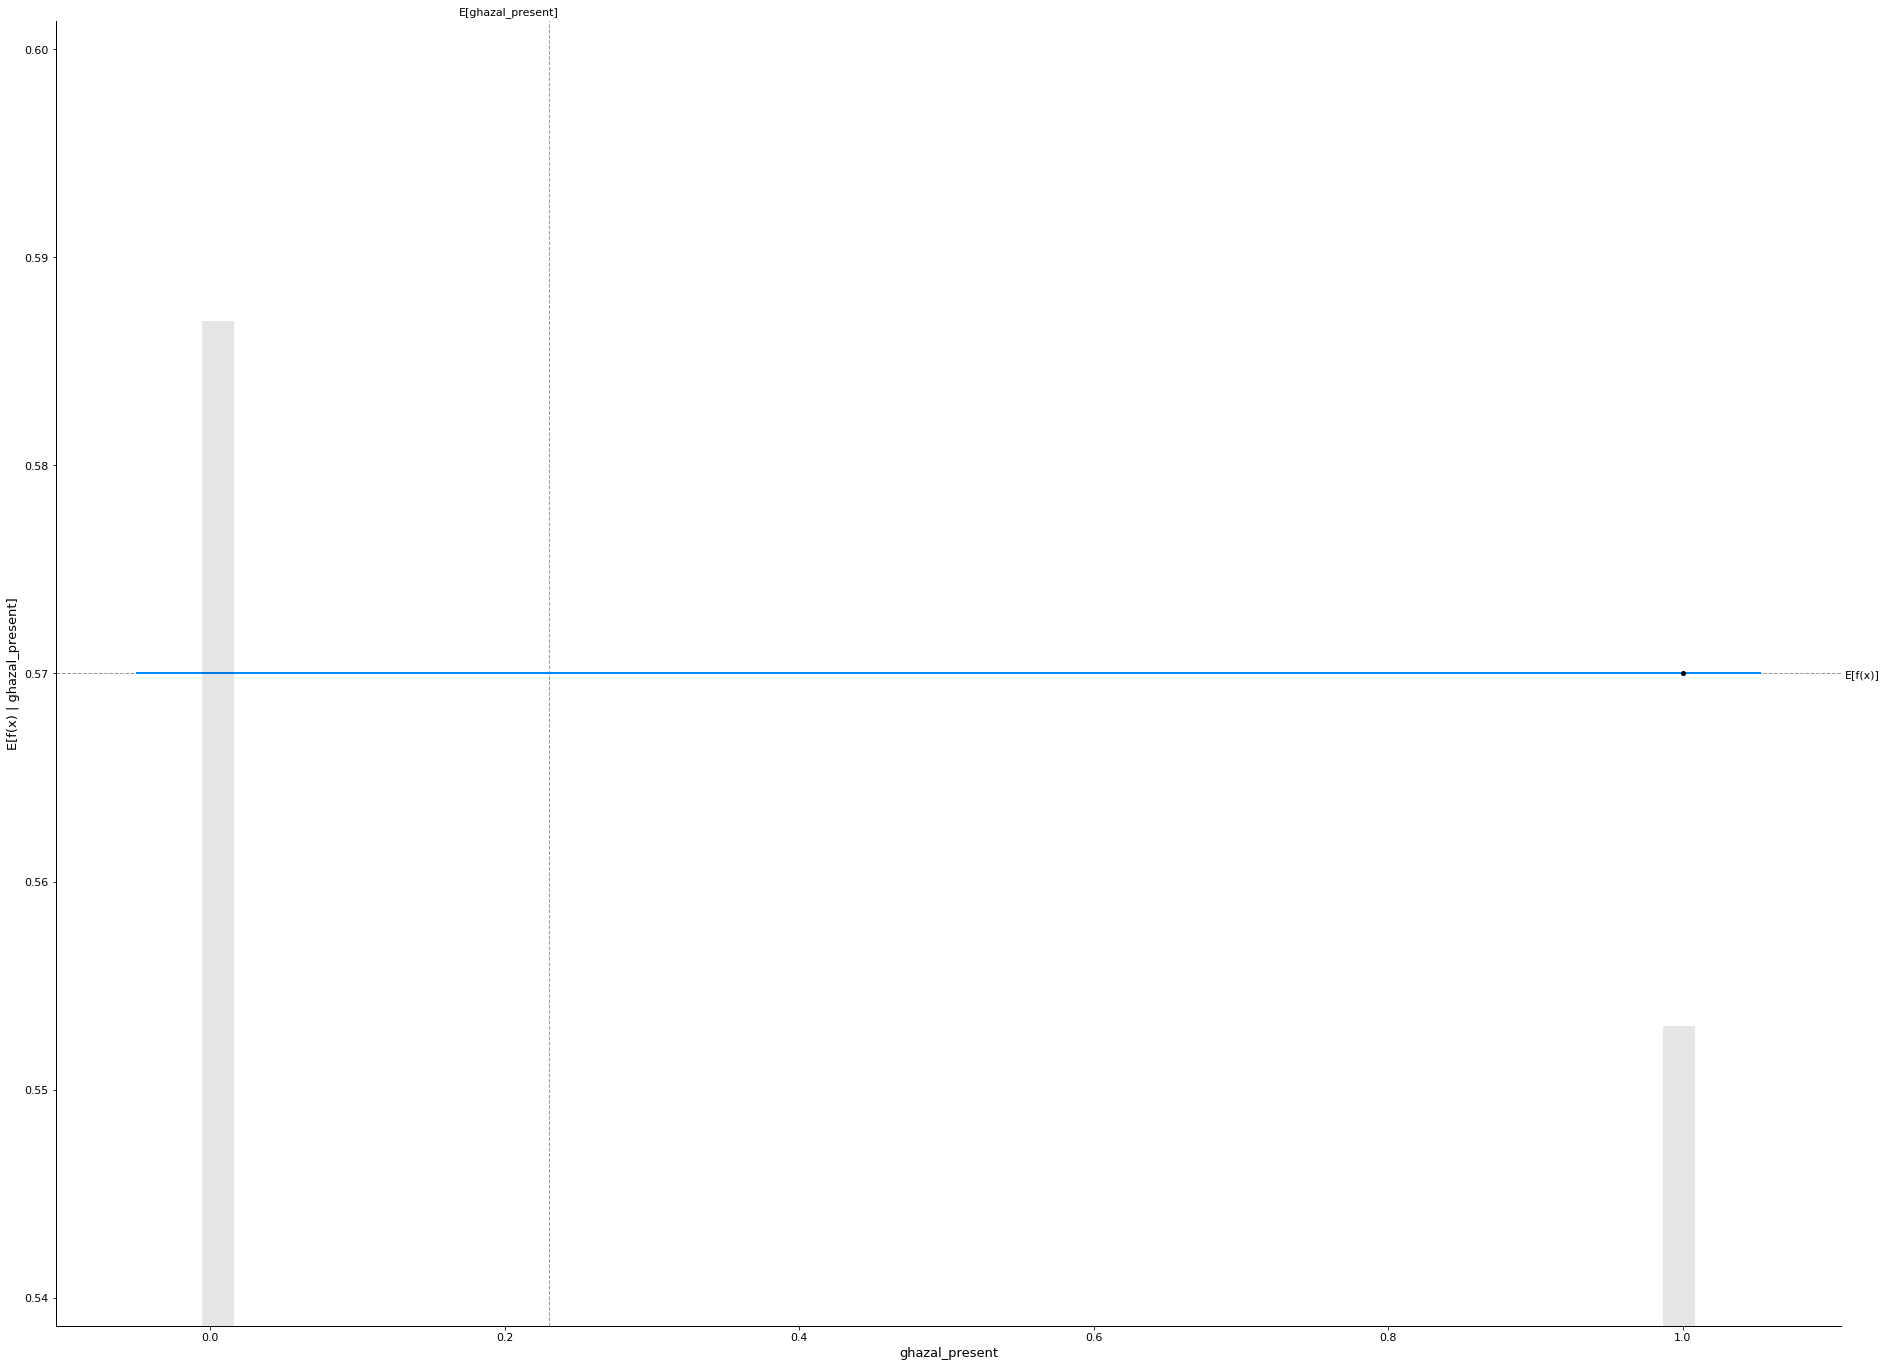

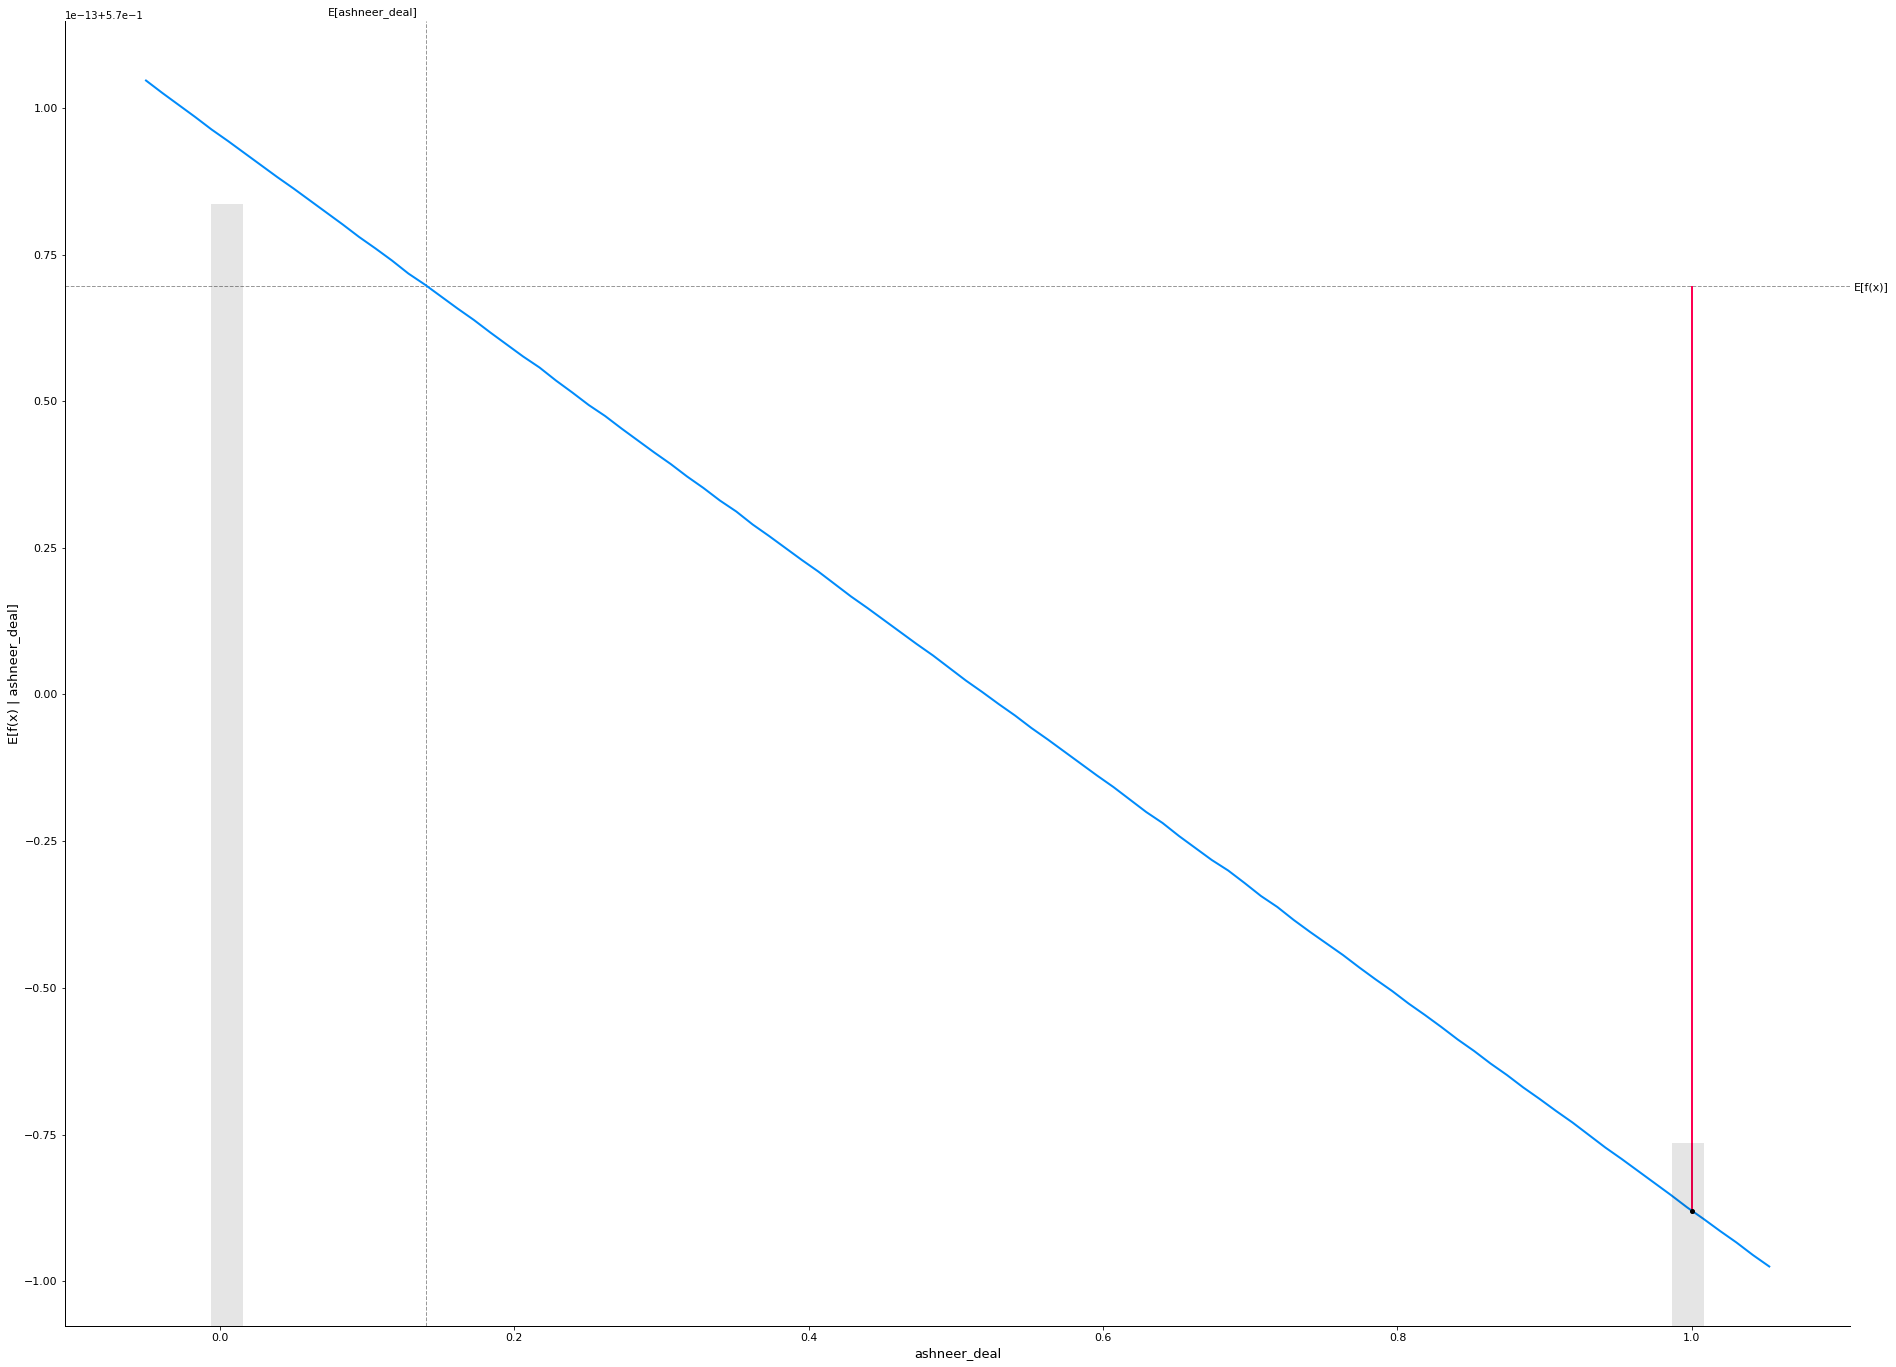

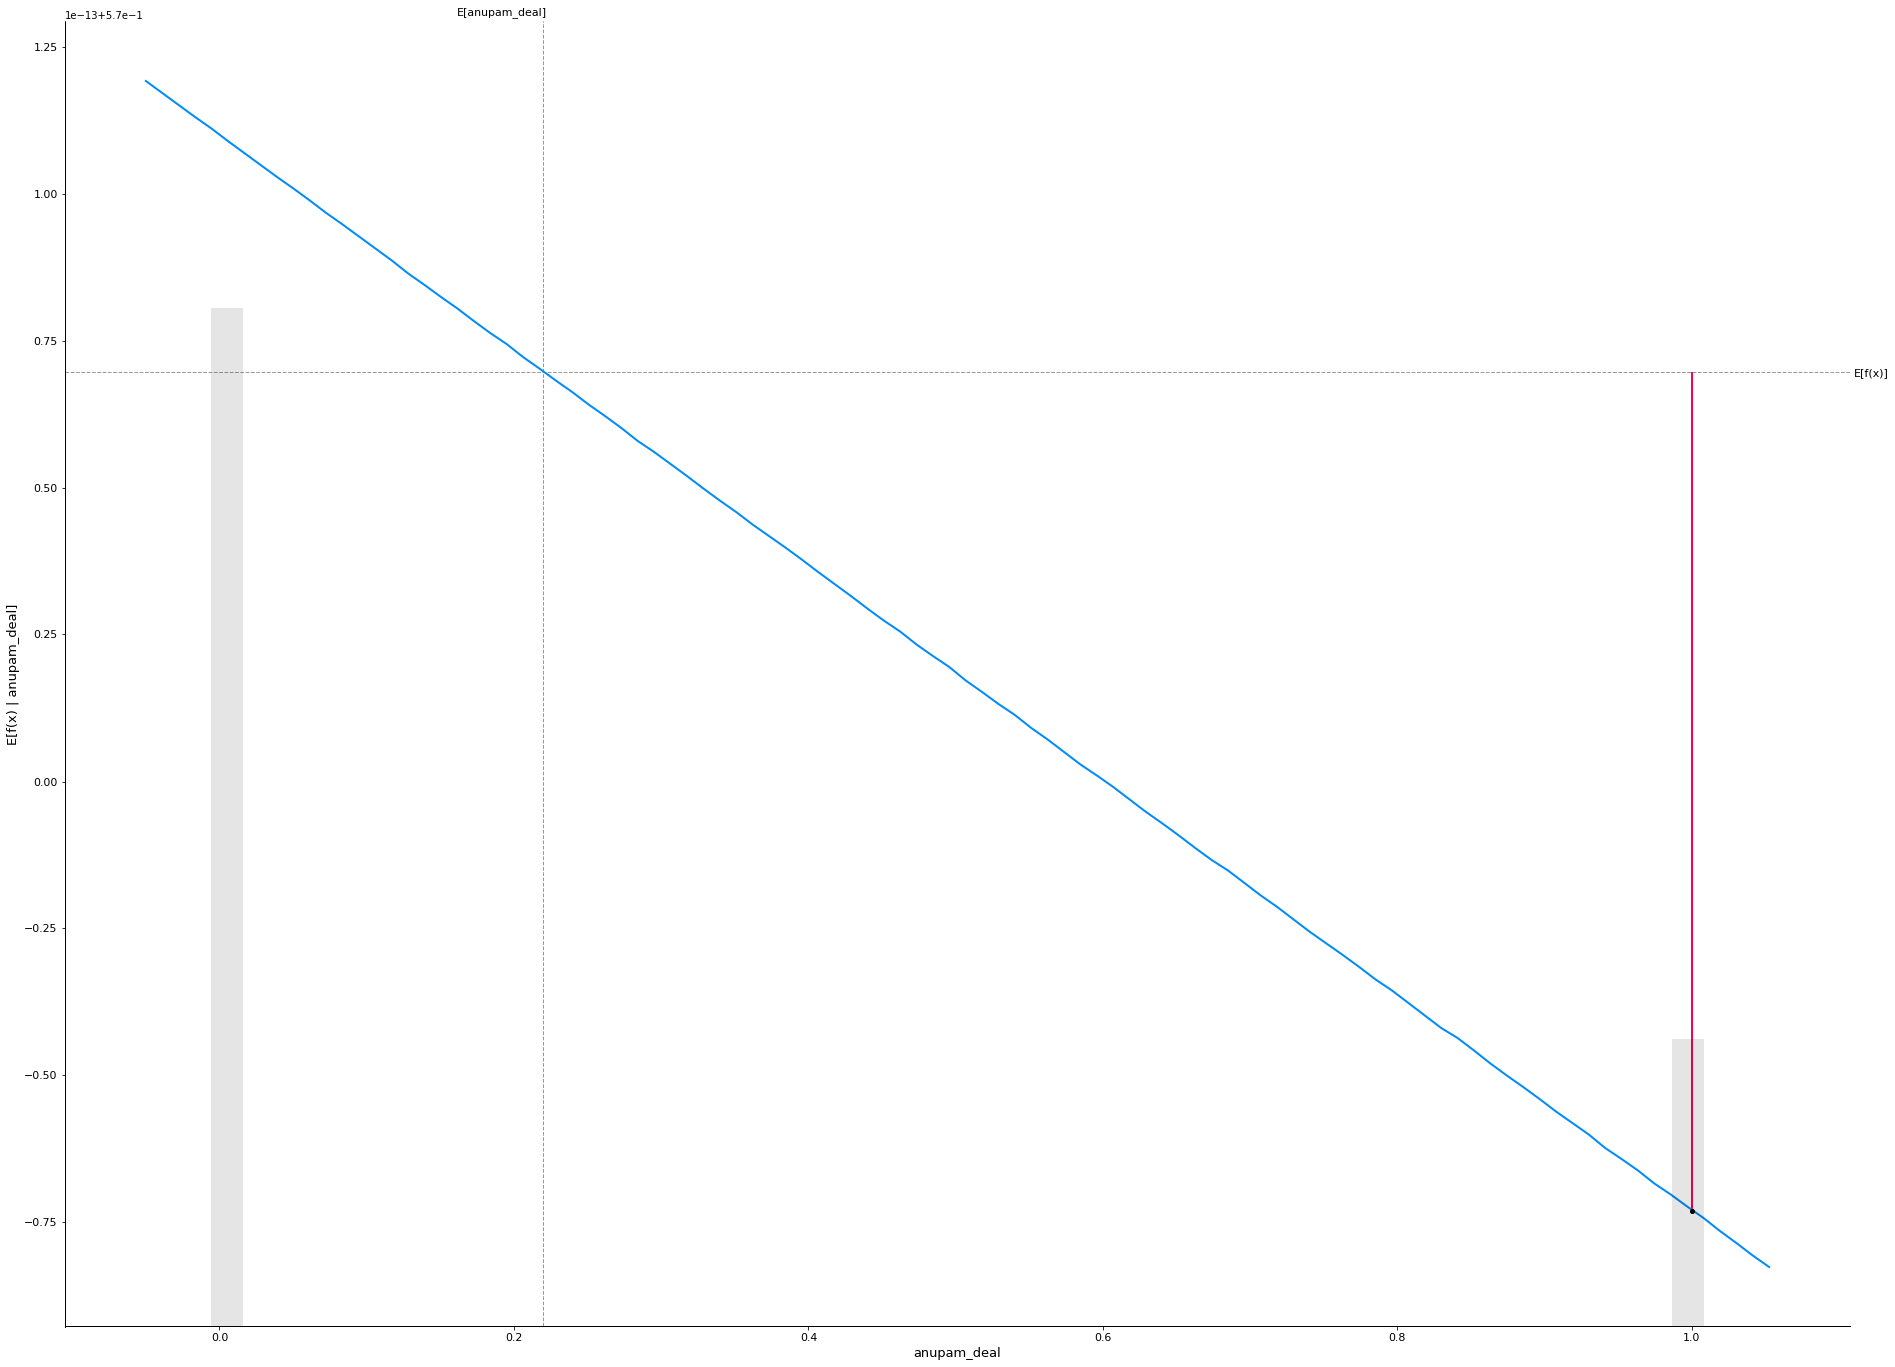

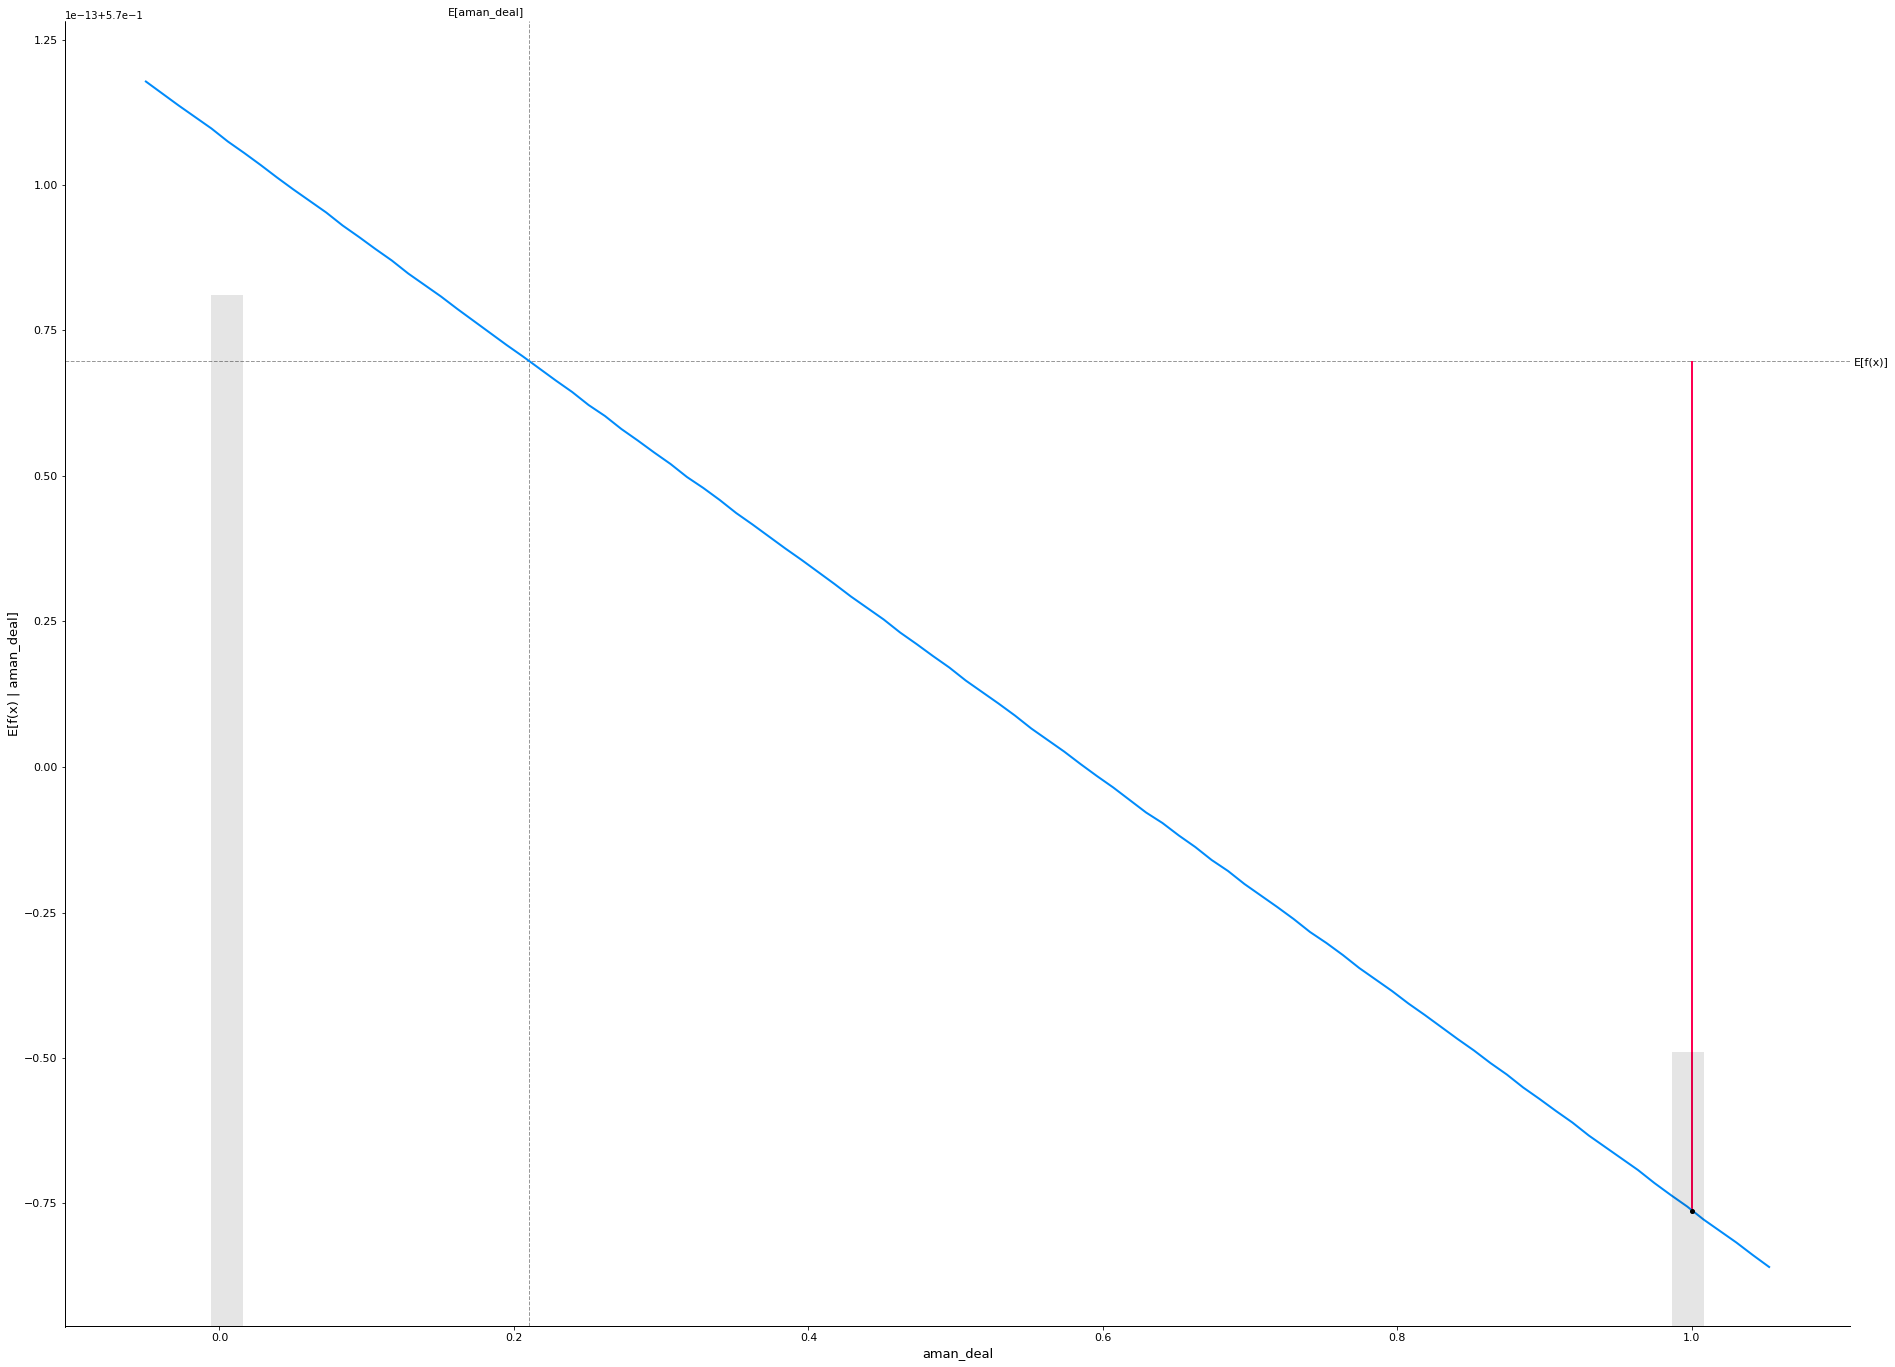

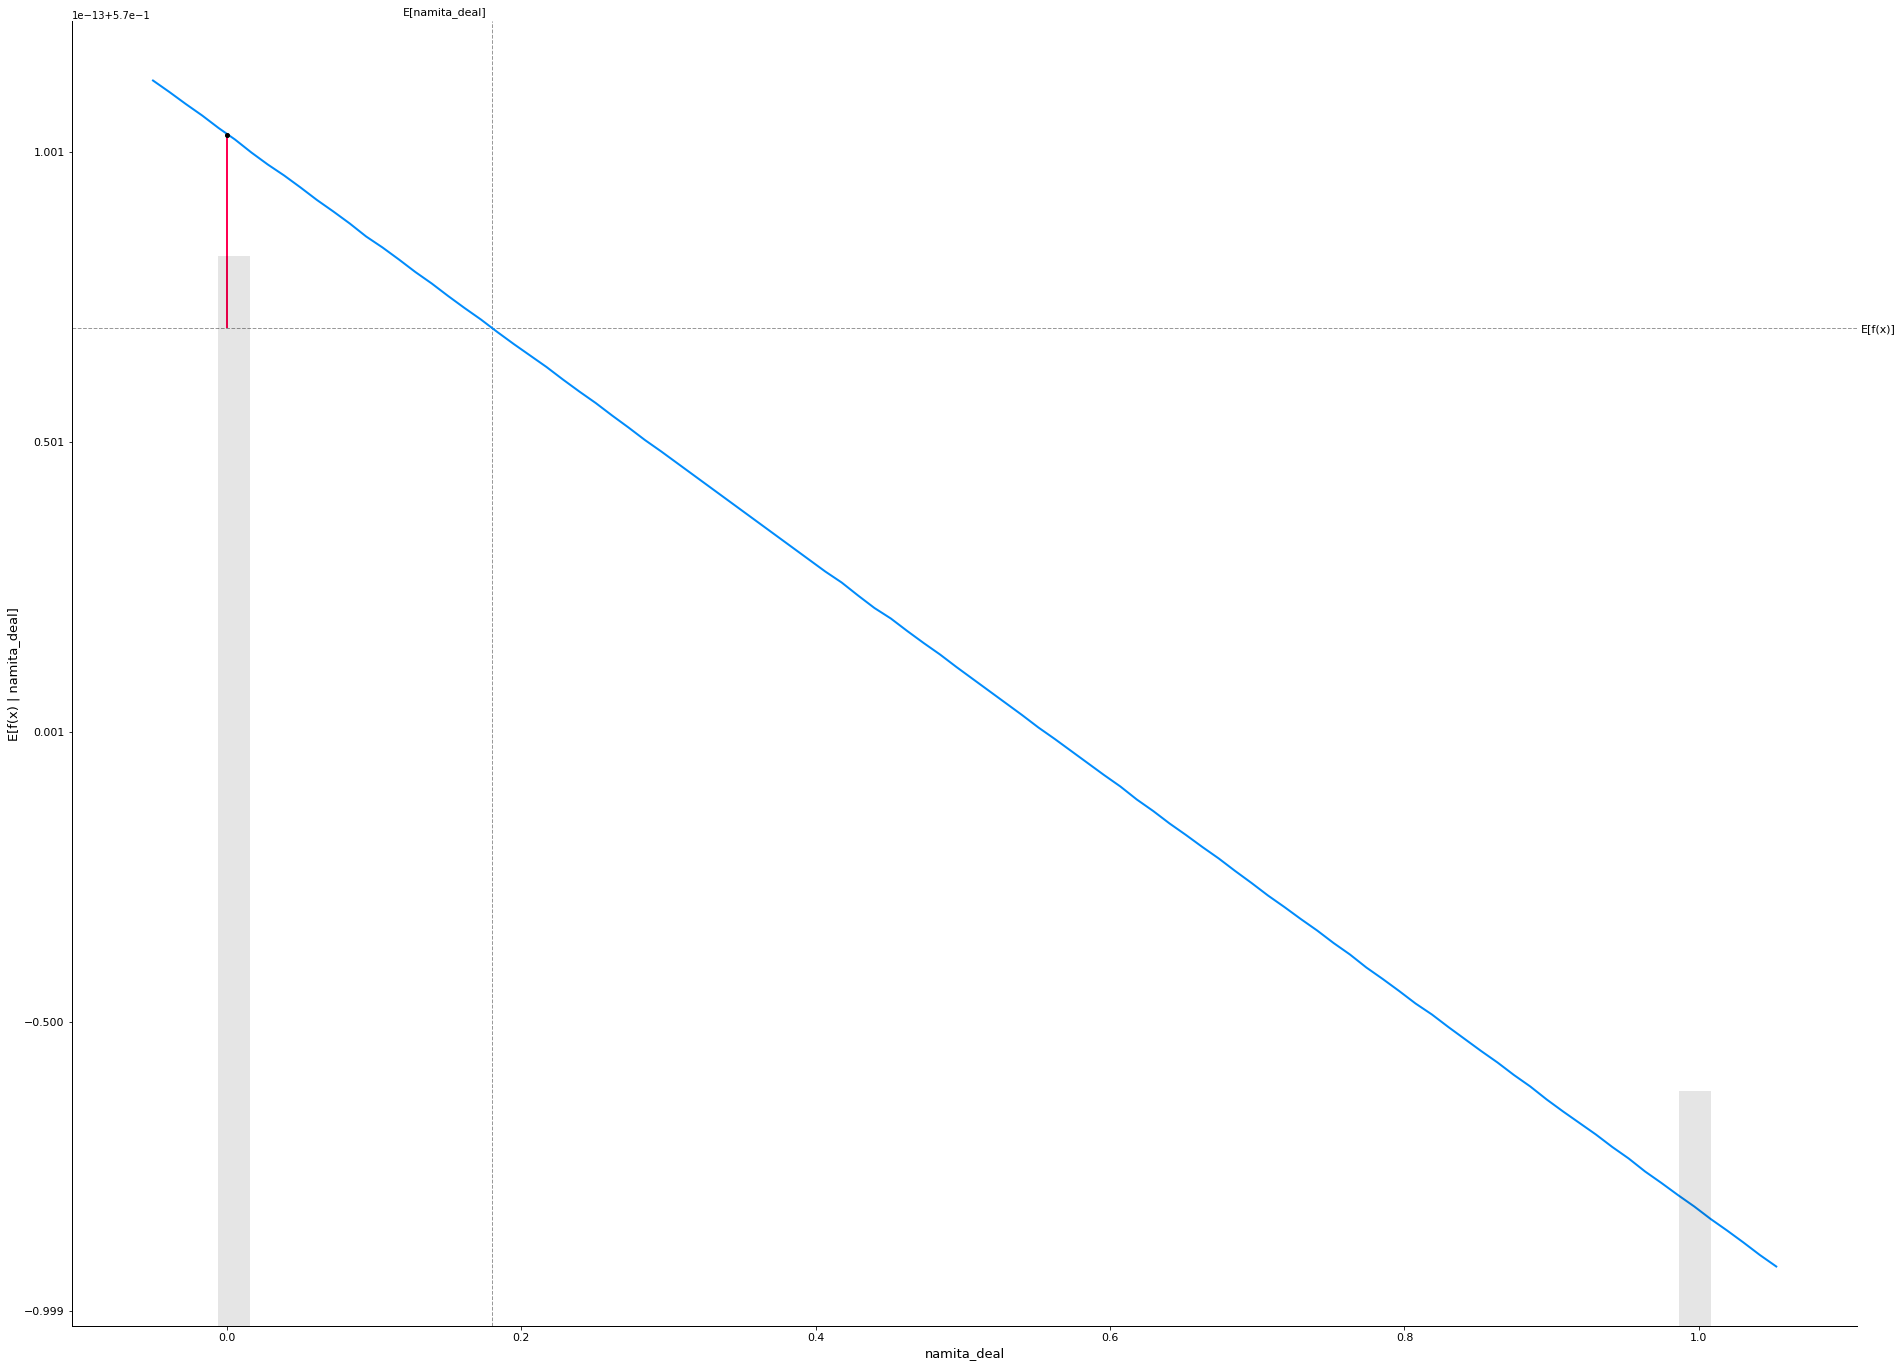

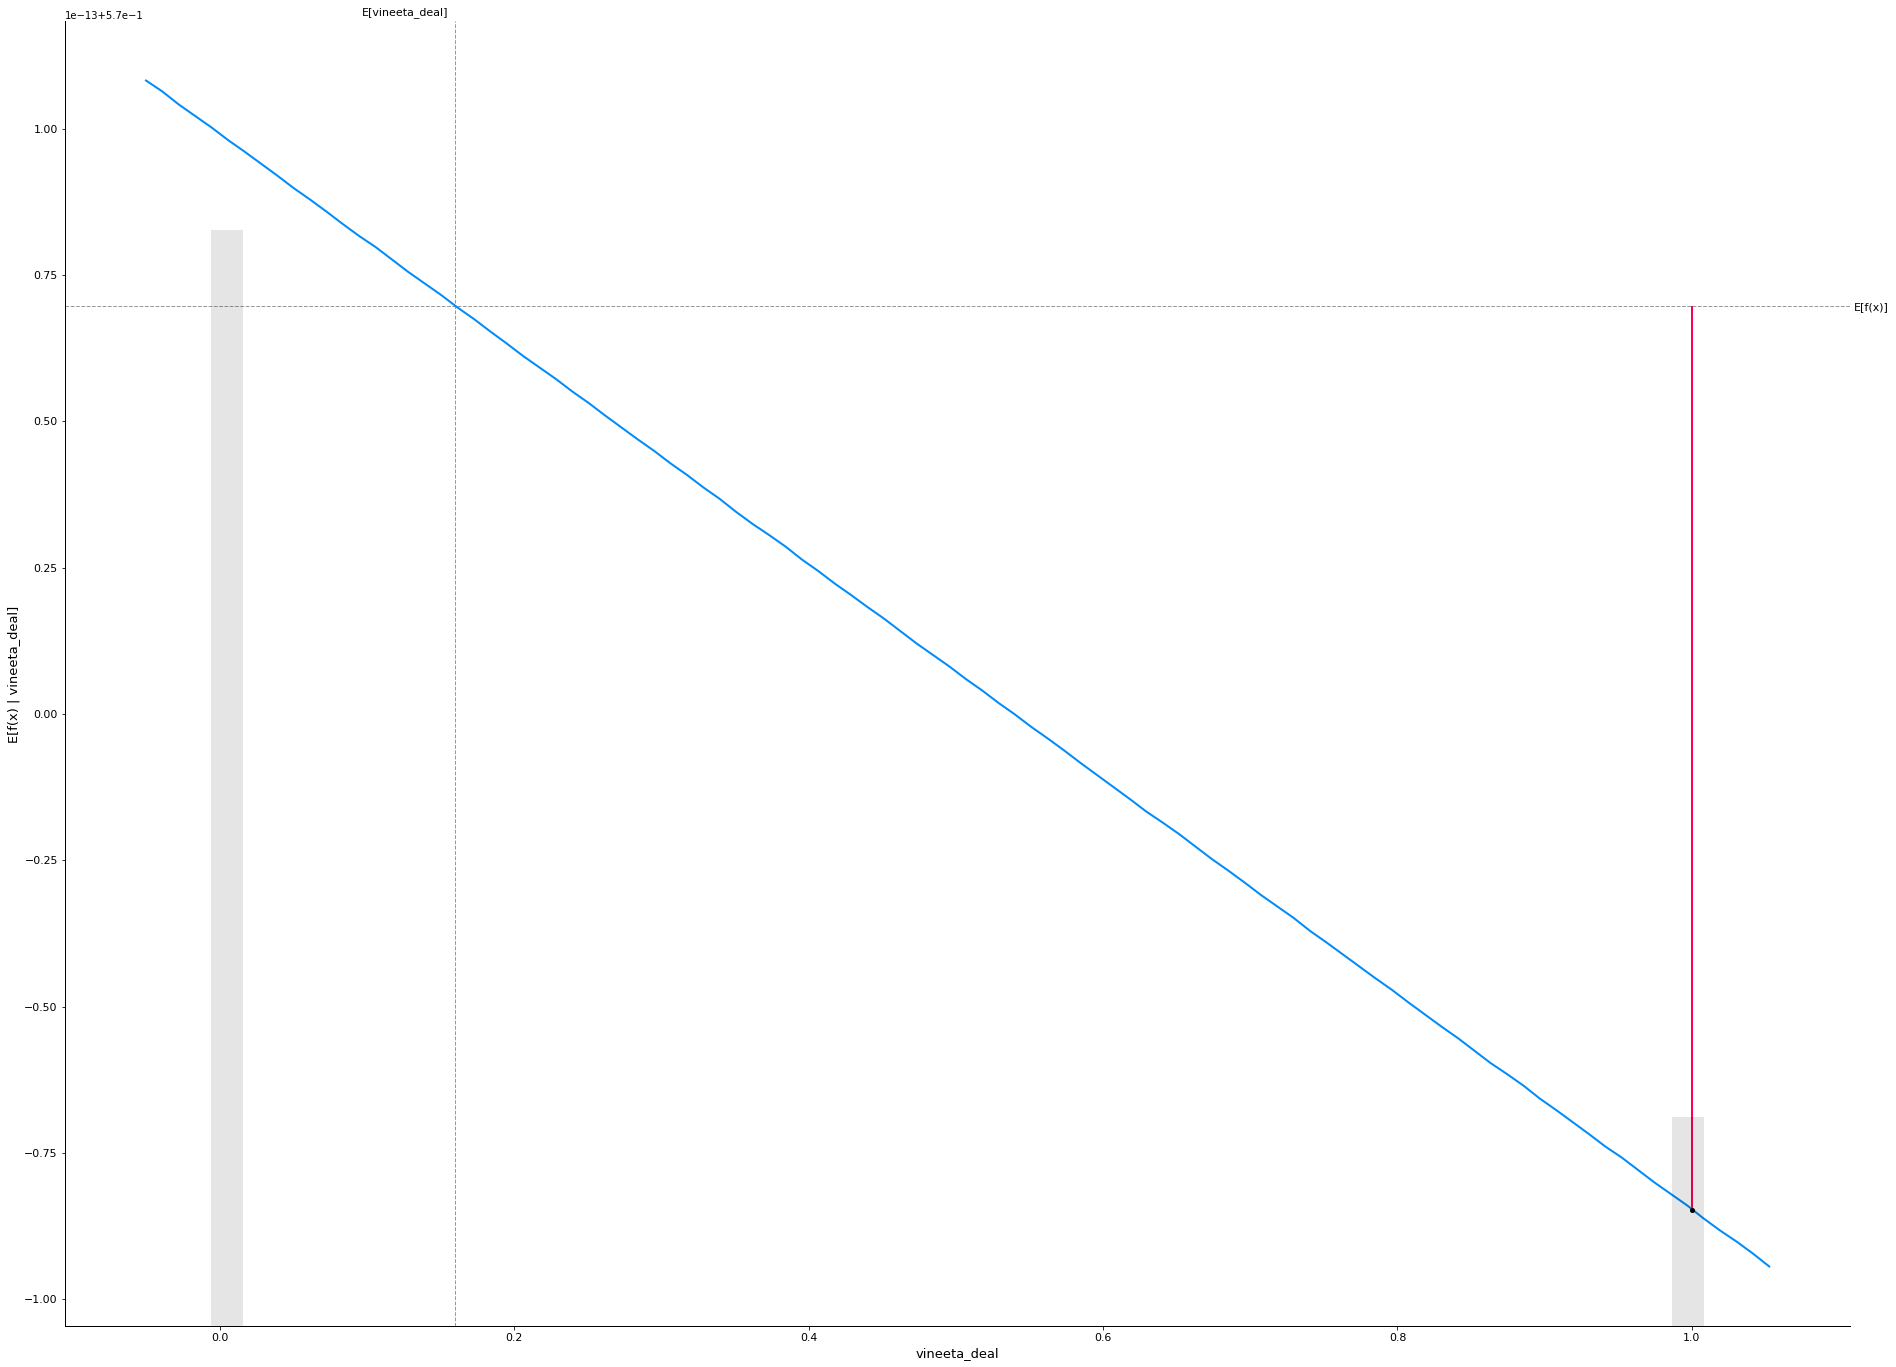

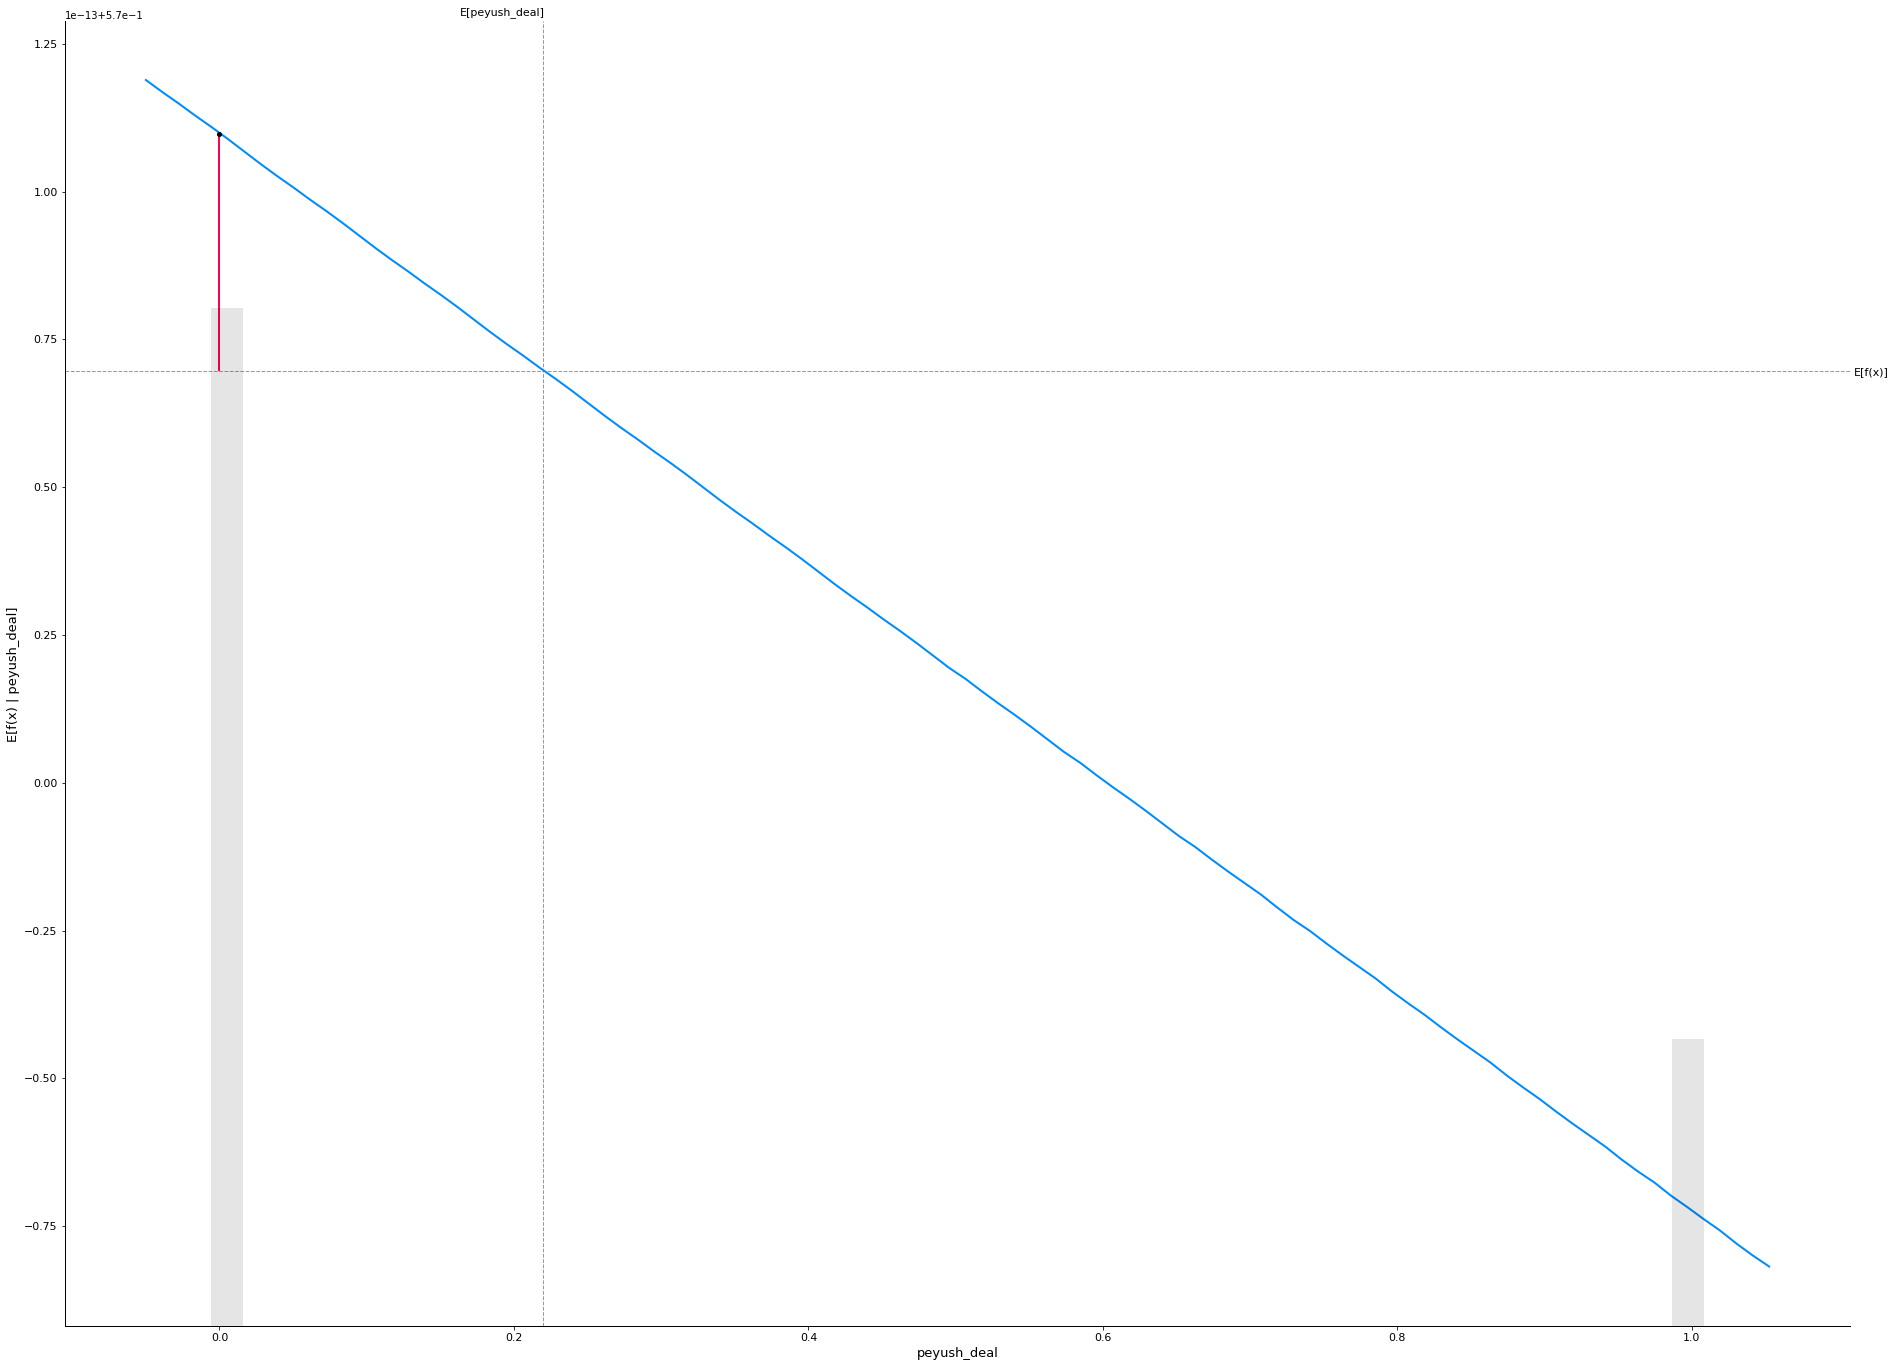

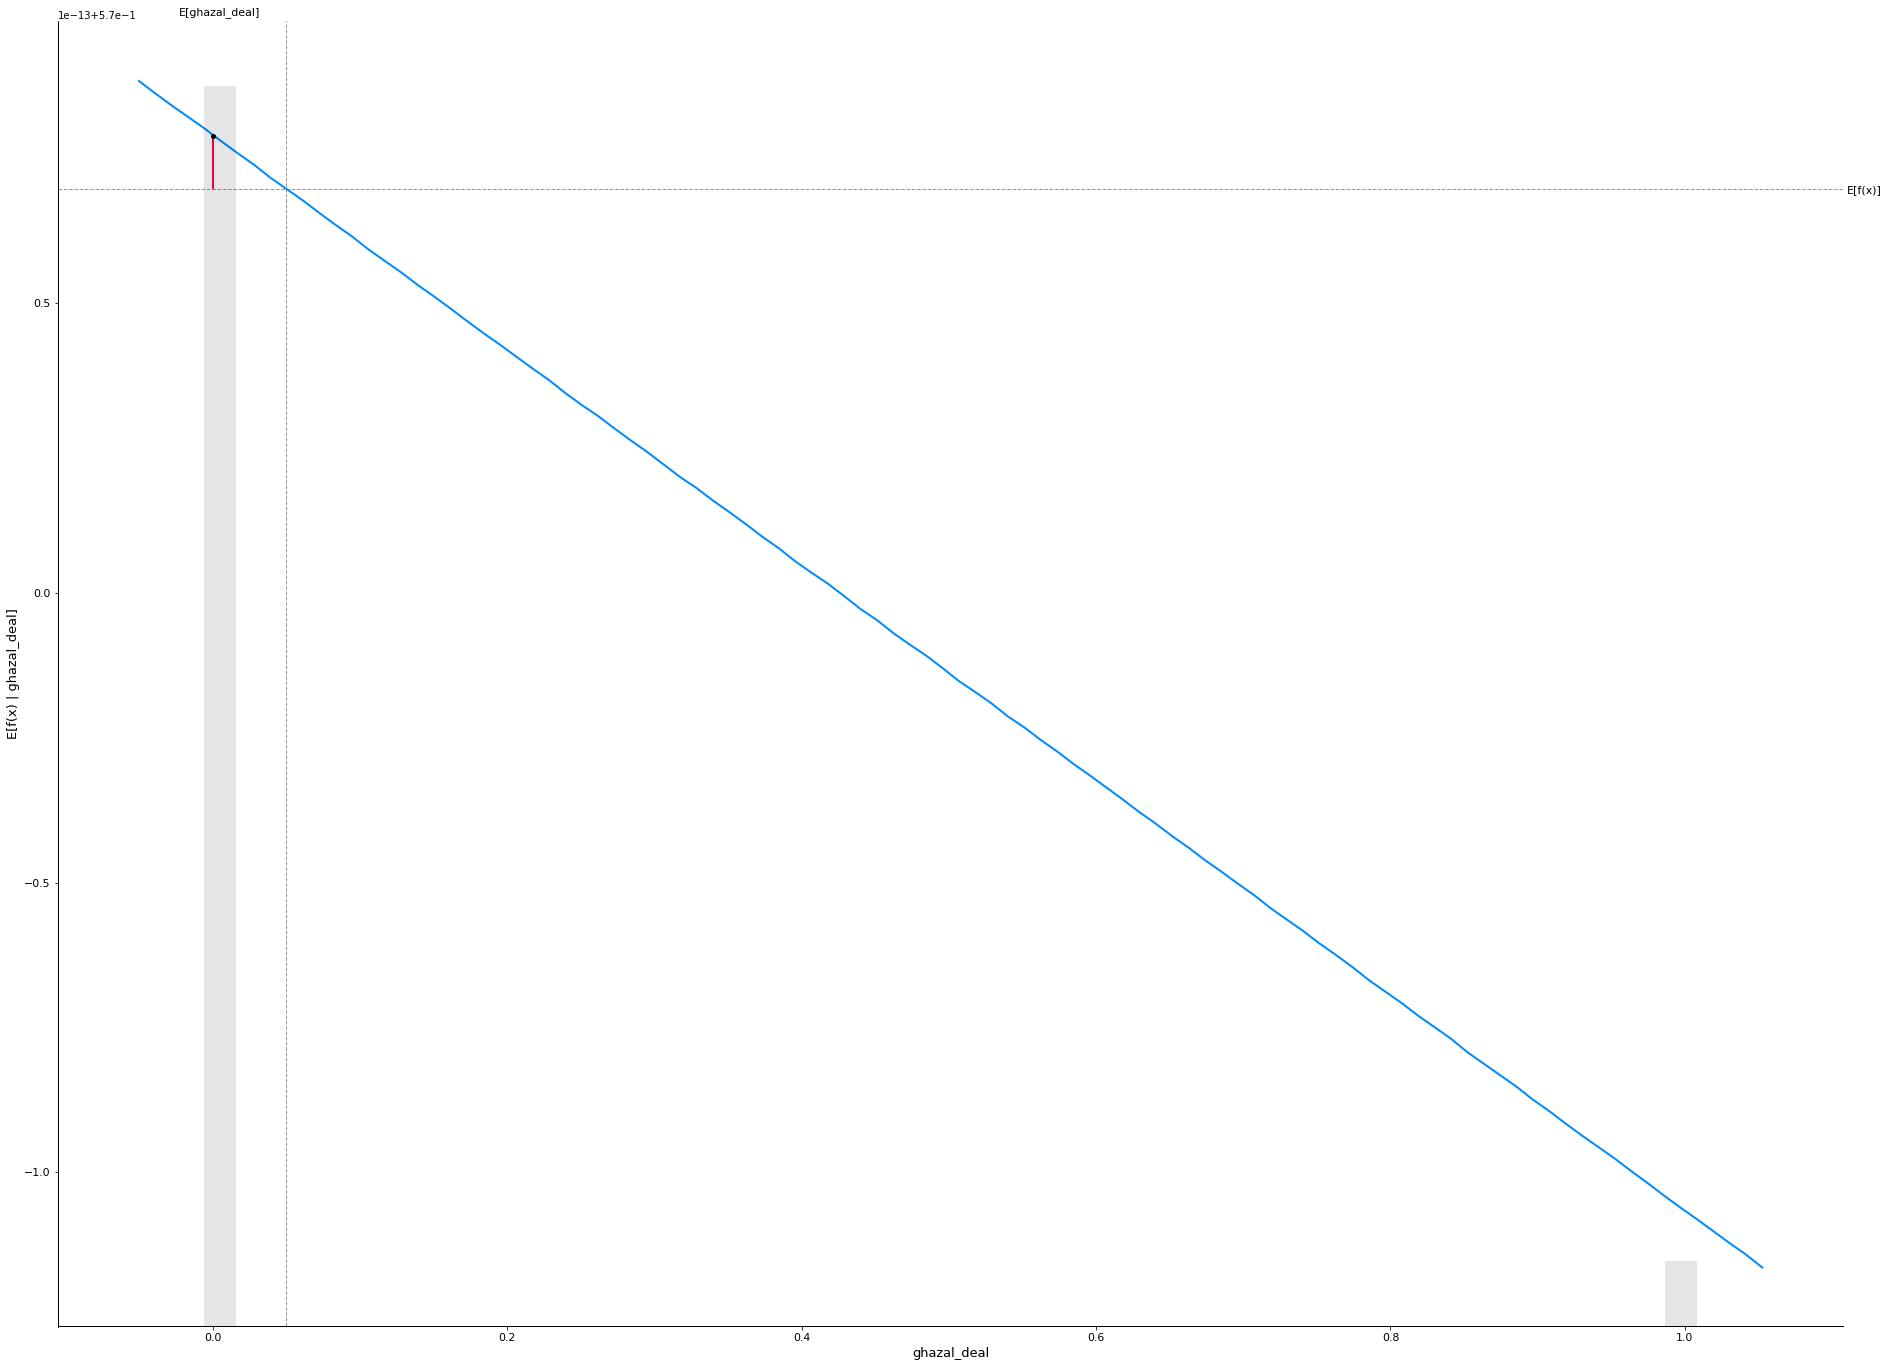

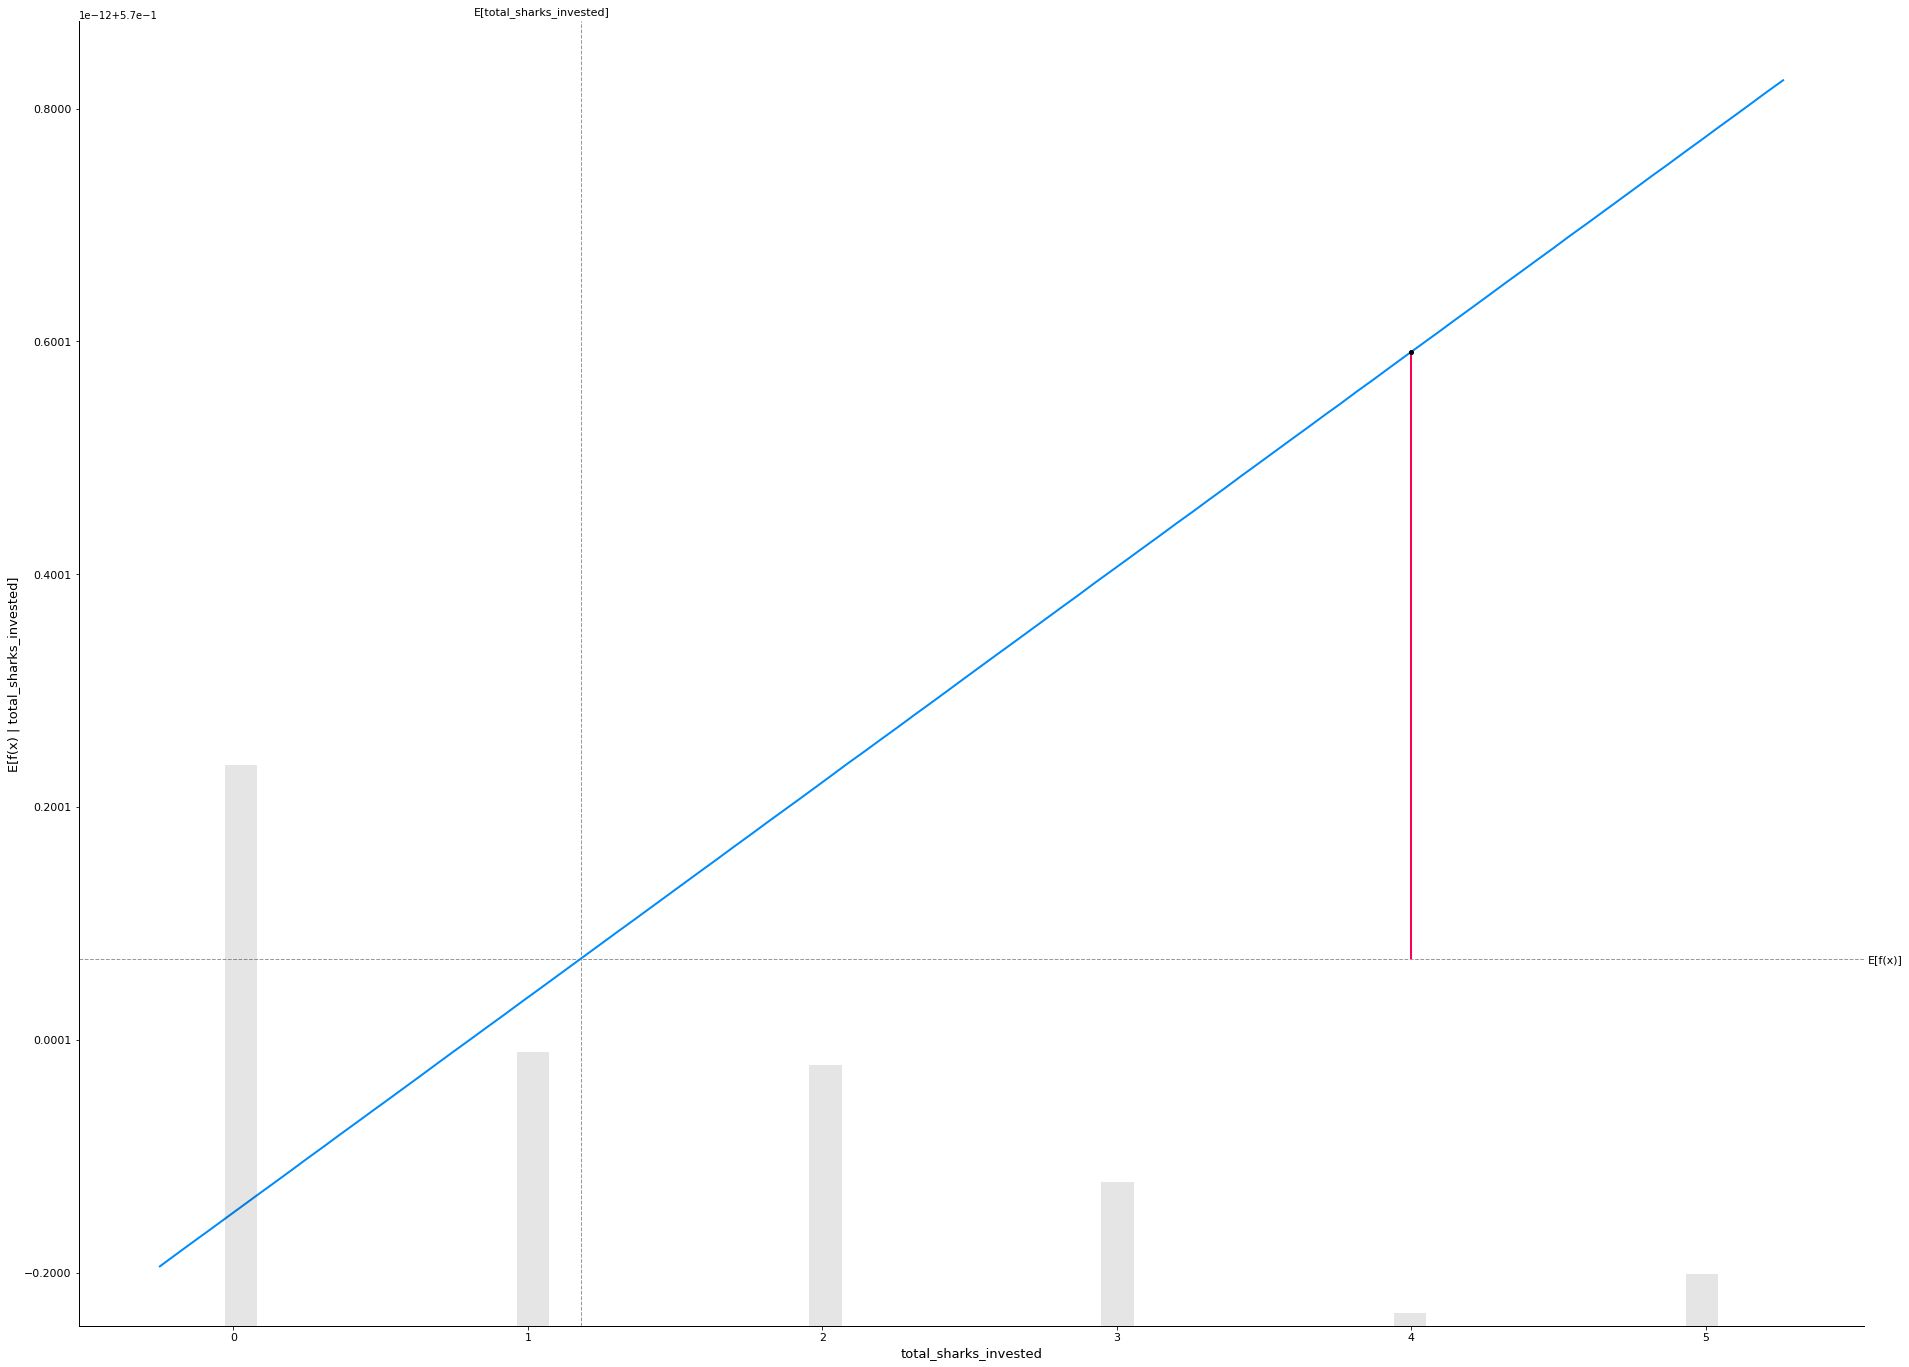

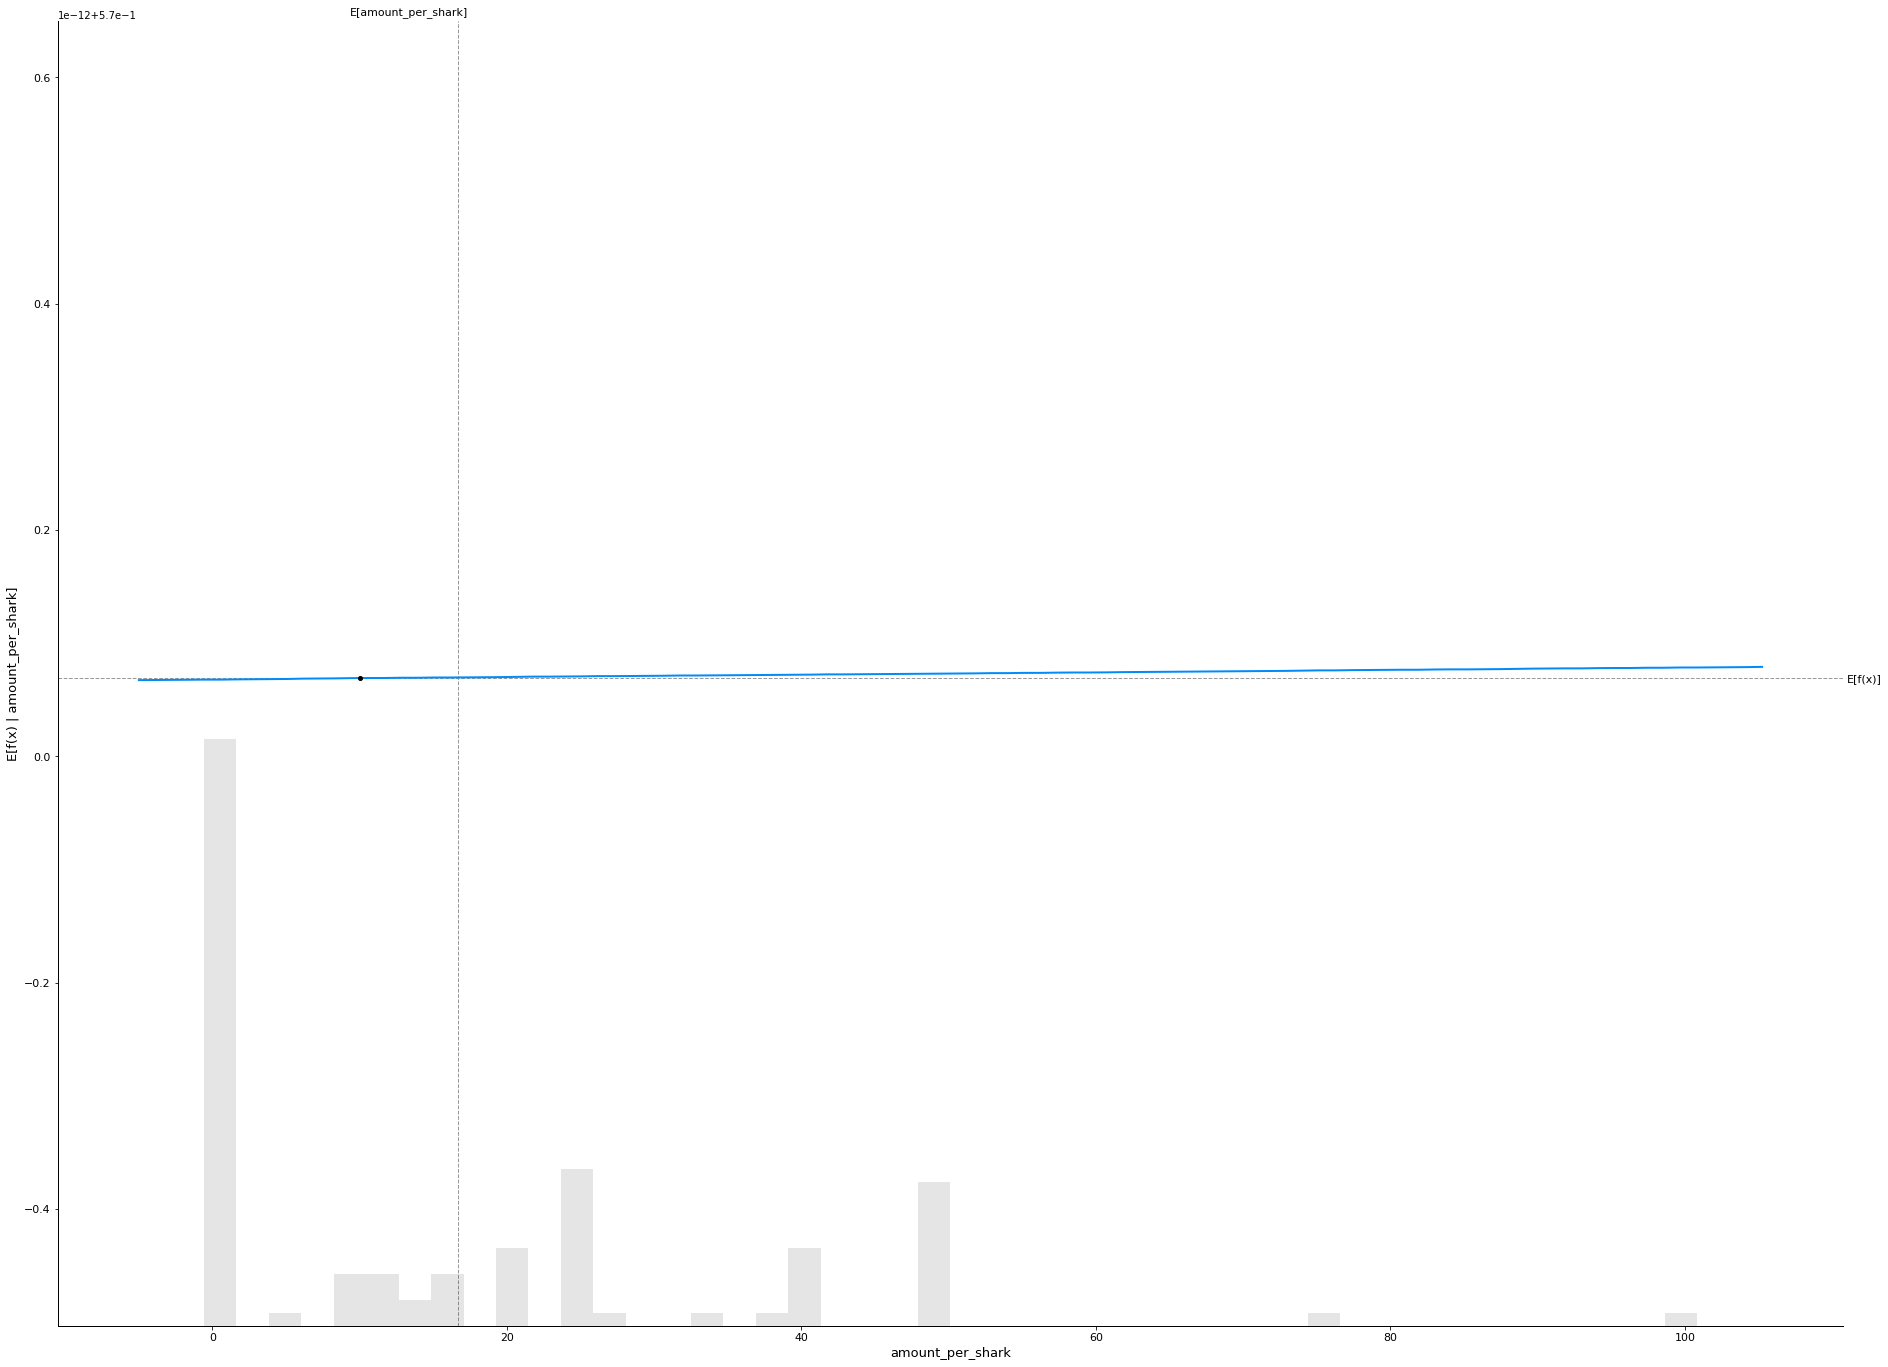

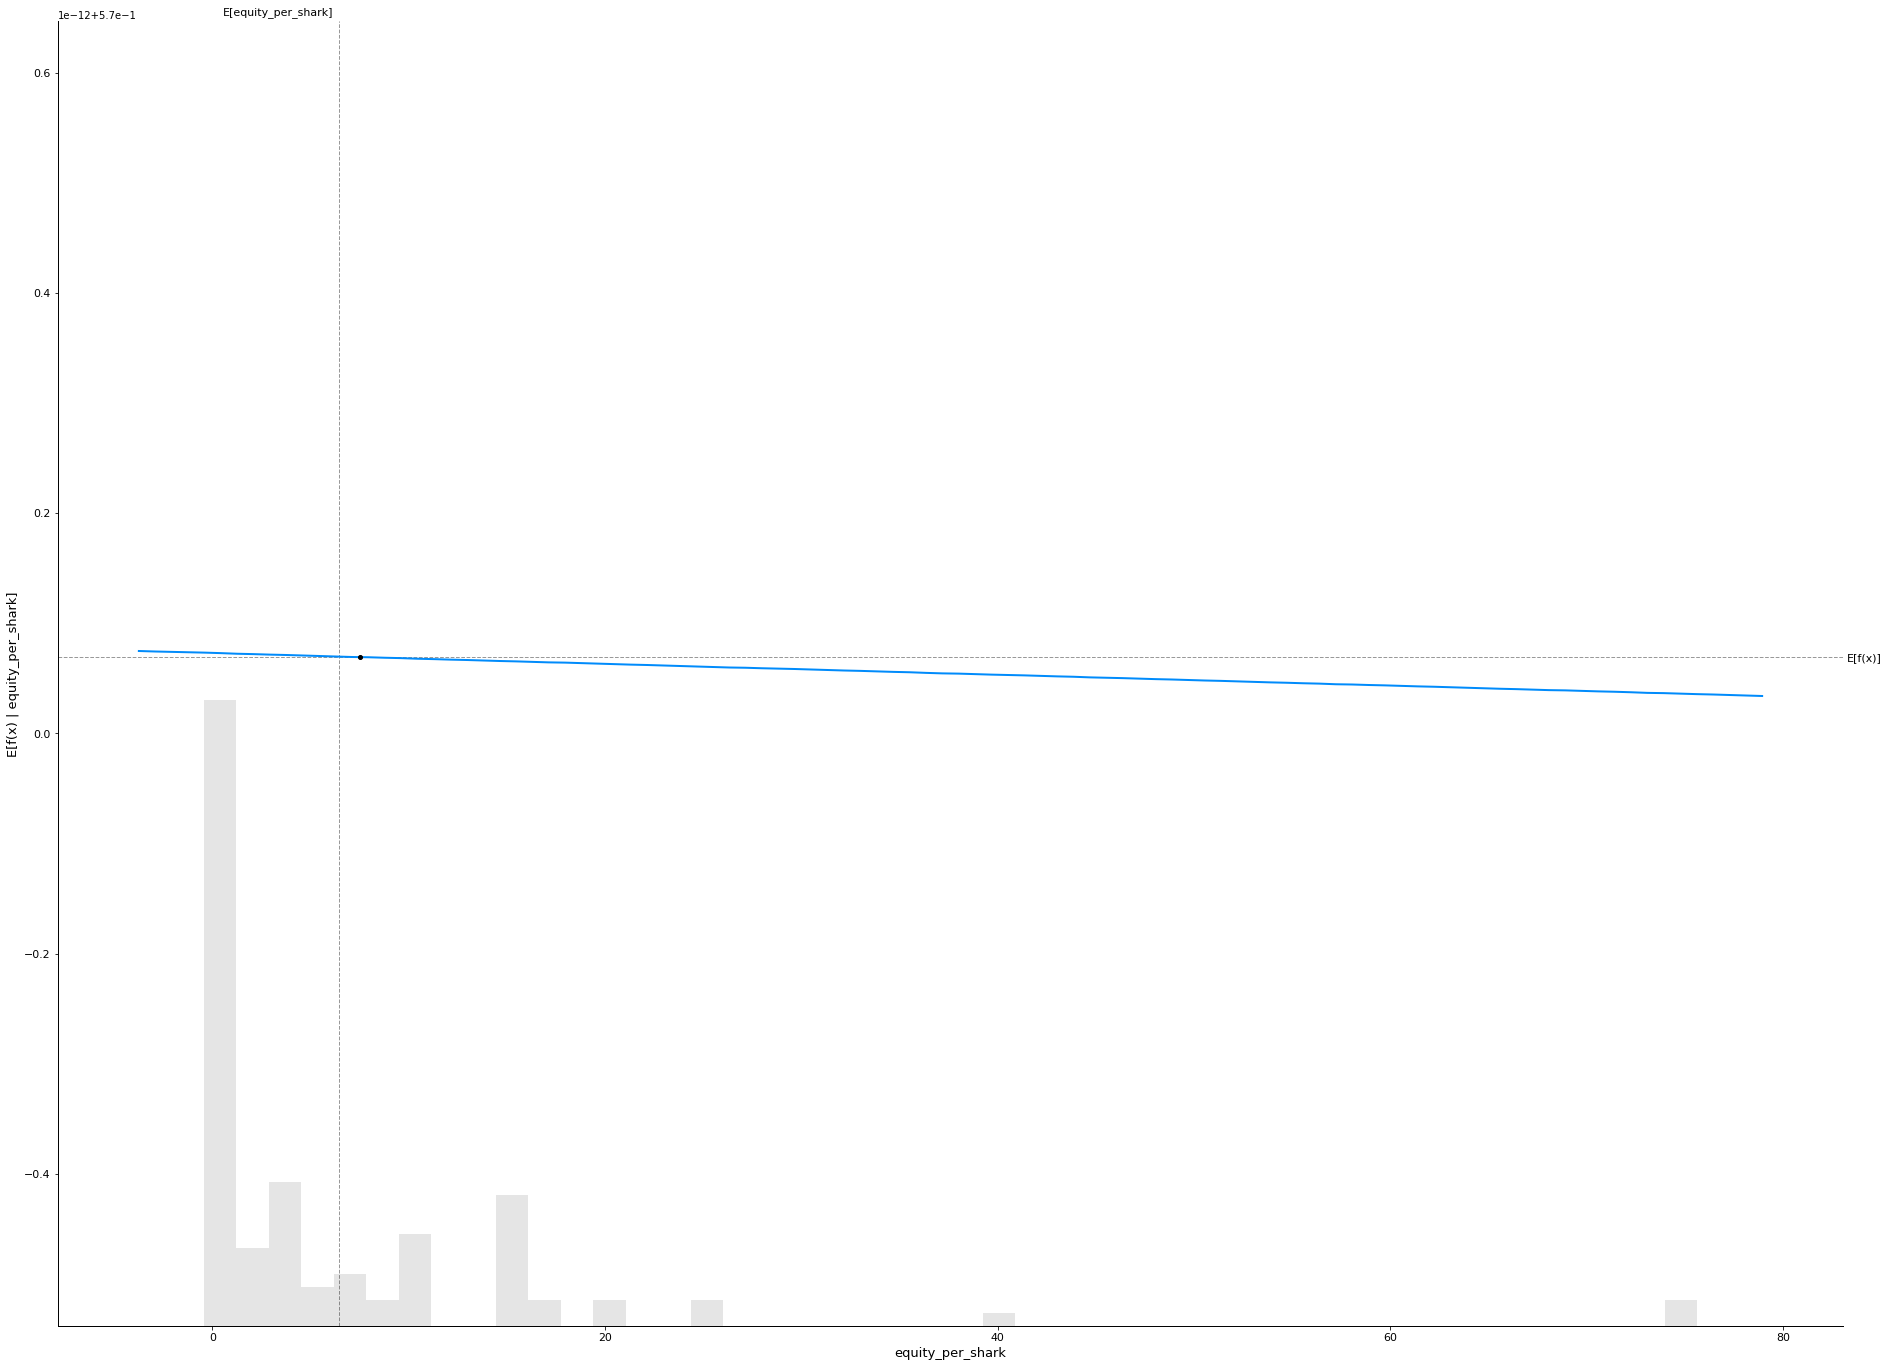

In [38]:
linear_explainer = shap.Explainer(linear_model.predict, x_train_100)
linear_shap_values = linear_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 16
    shap.partial_dependence_plot(
        i,
        linear_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )
     


####SHAP Values - Tree Based Model

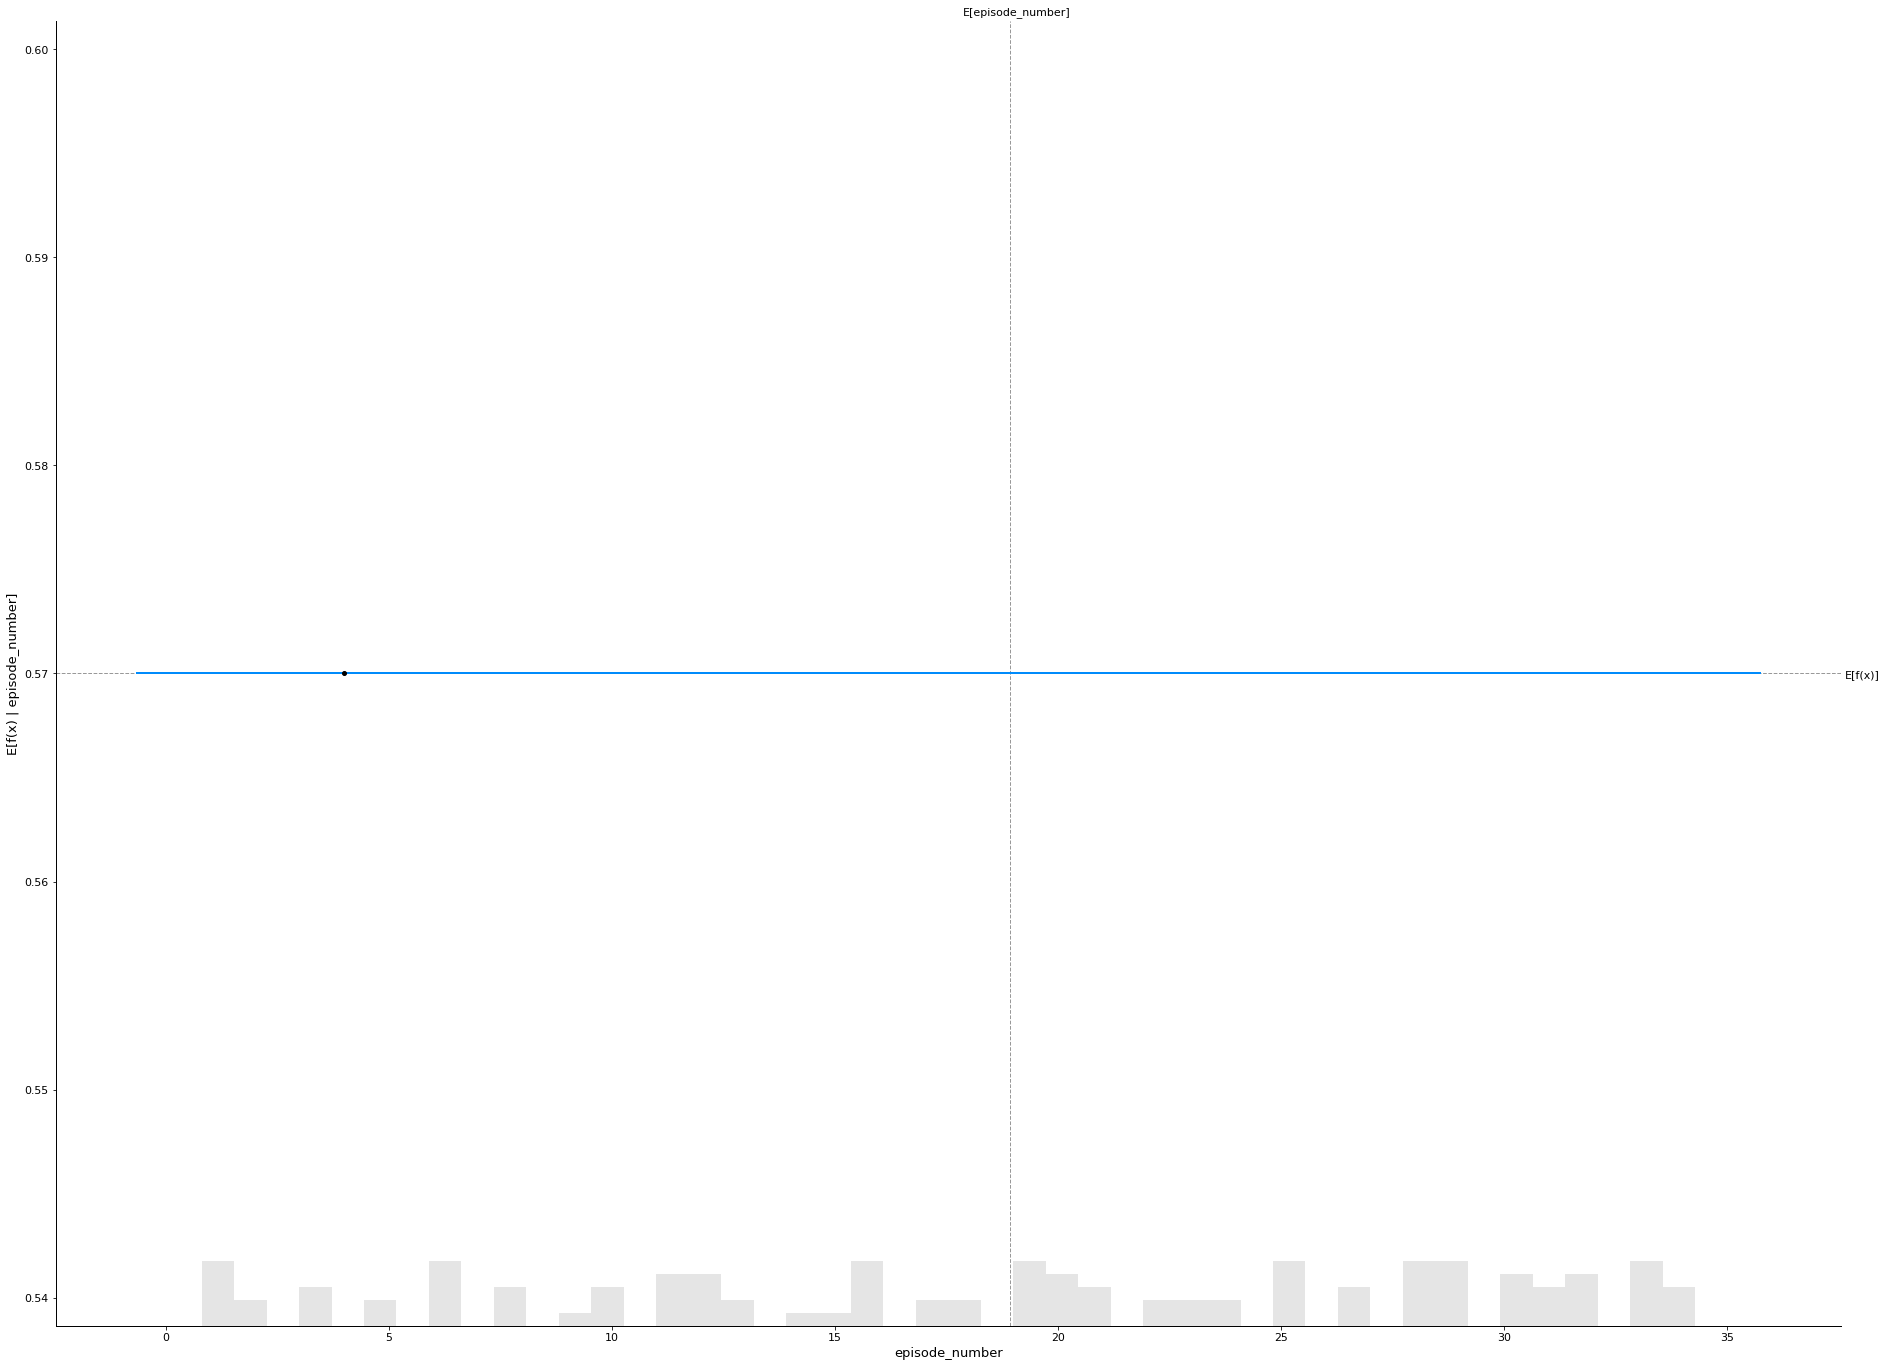

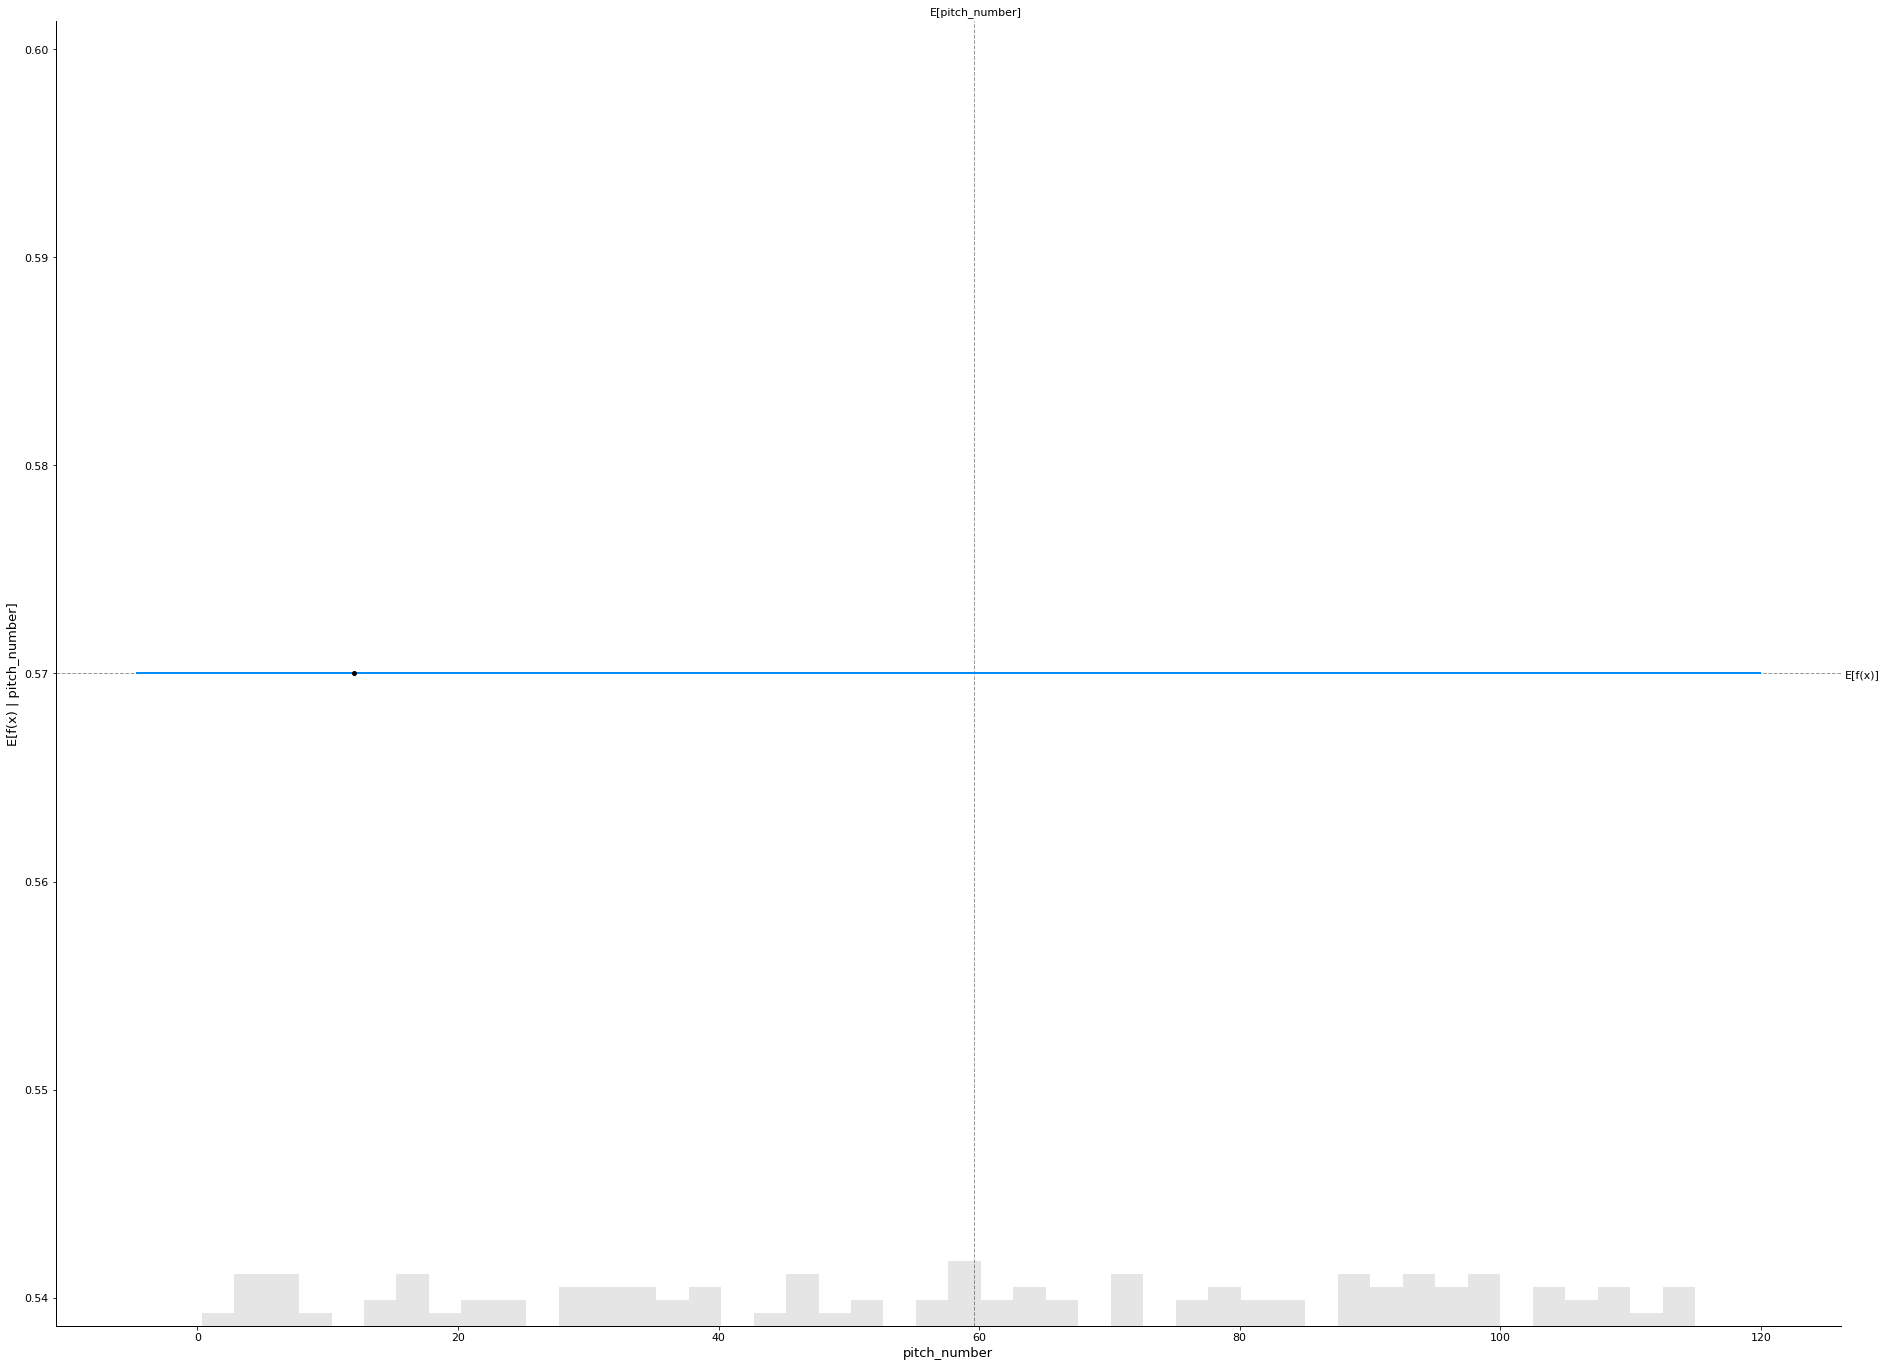

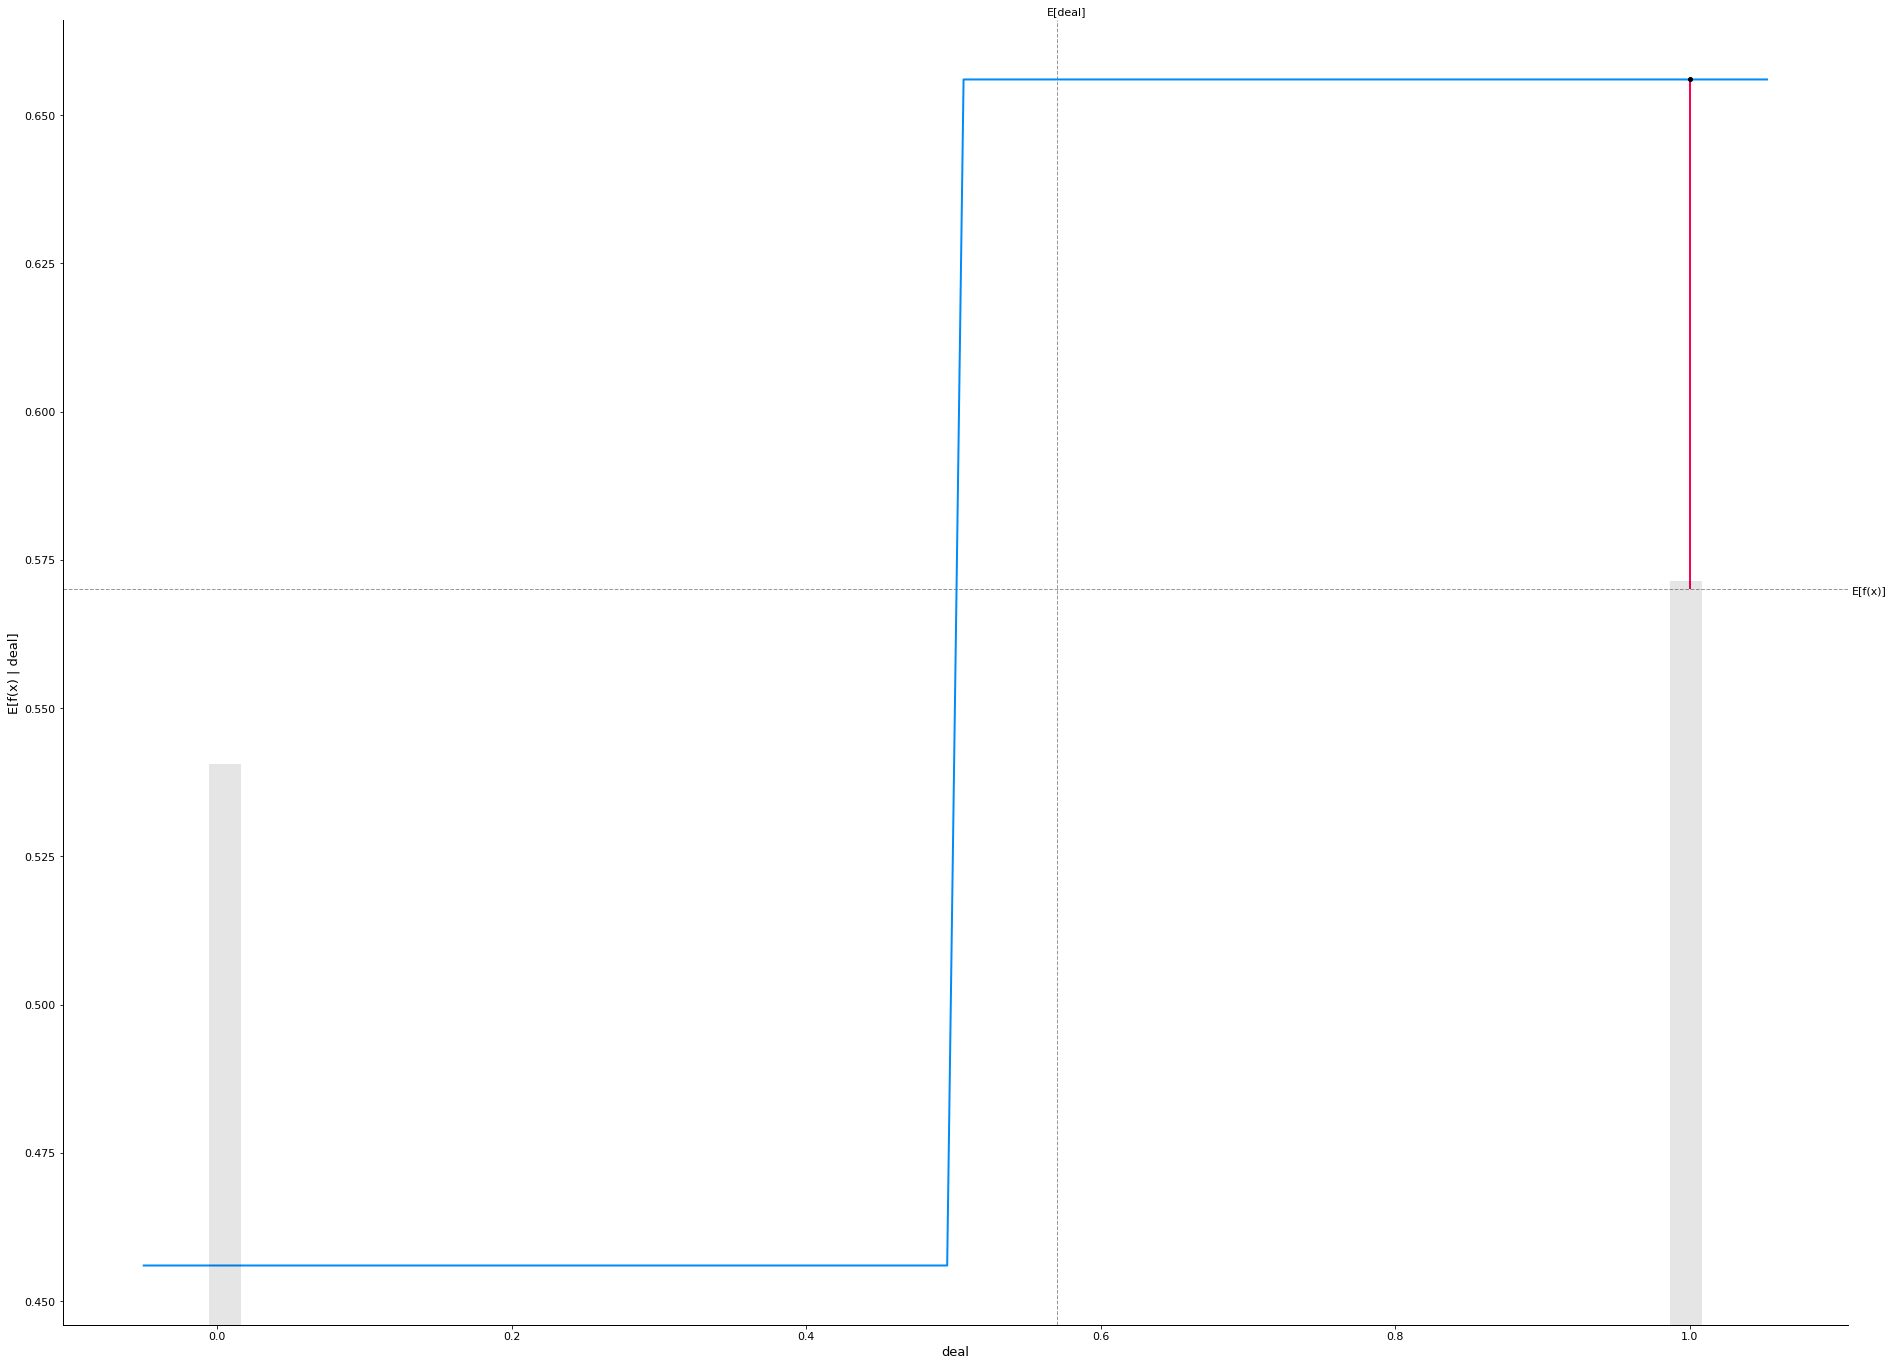

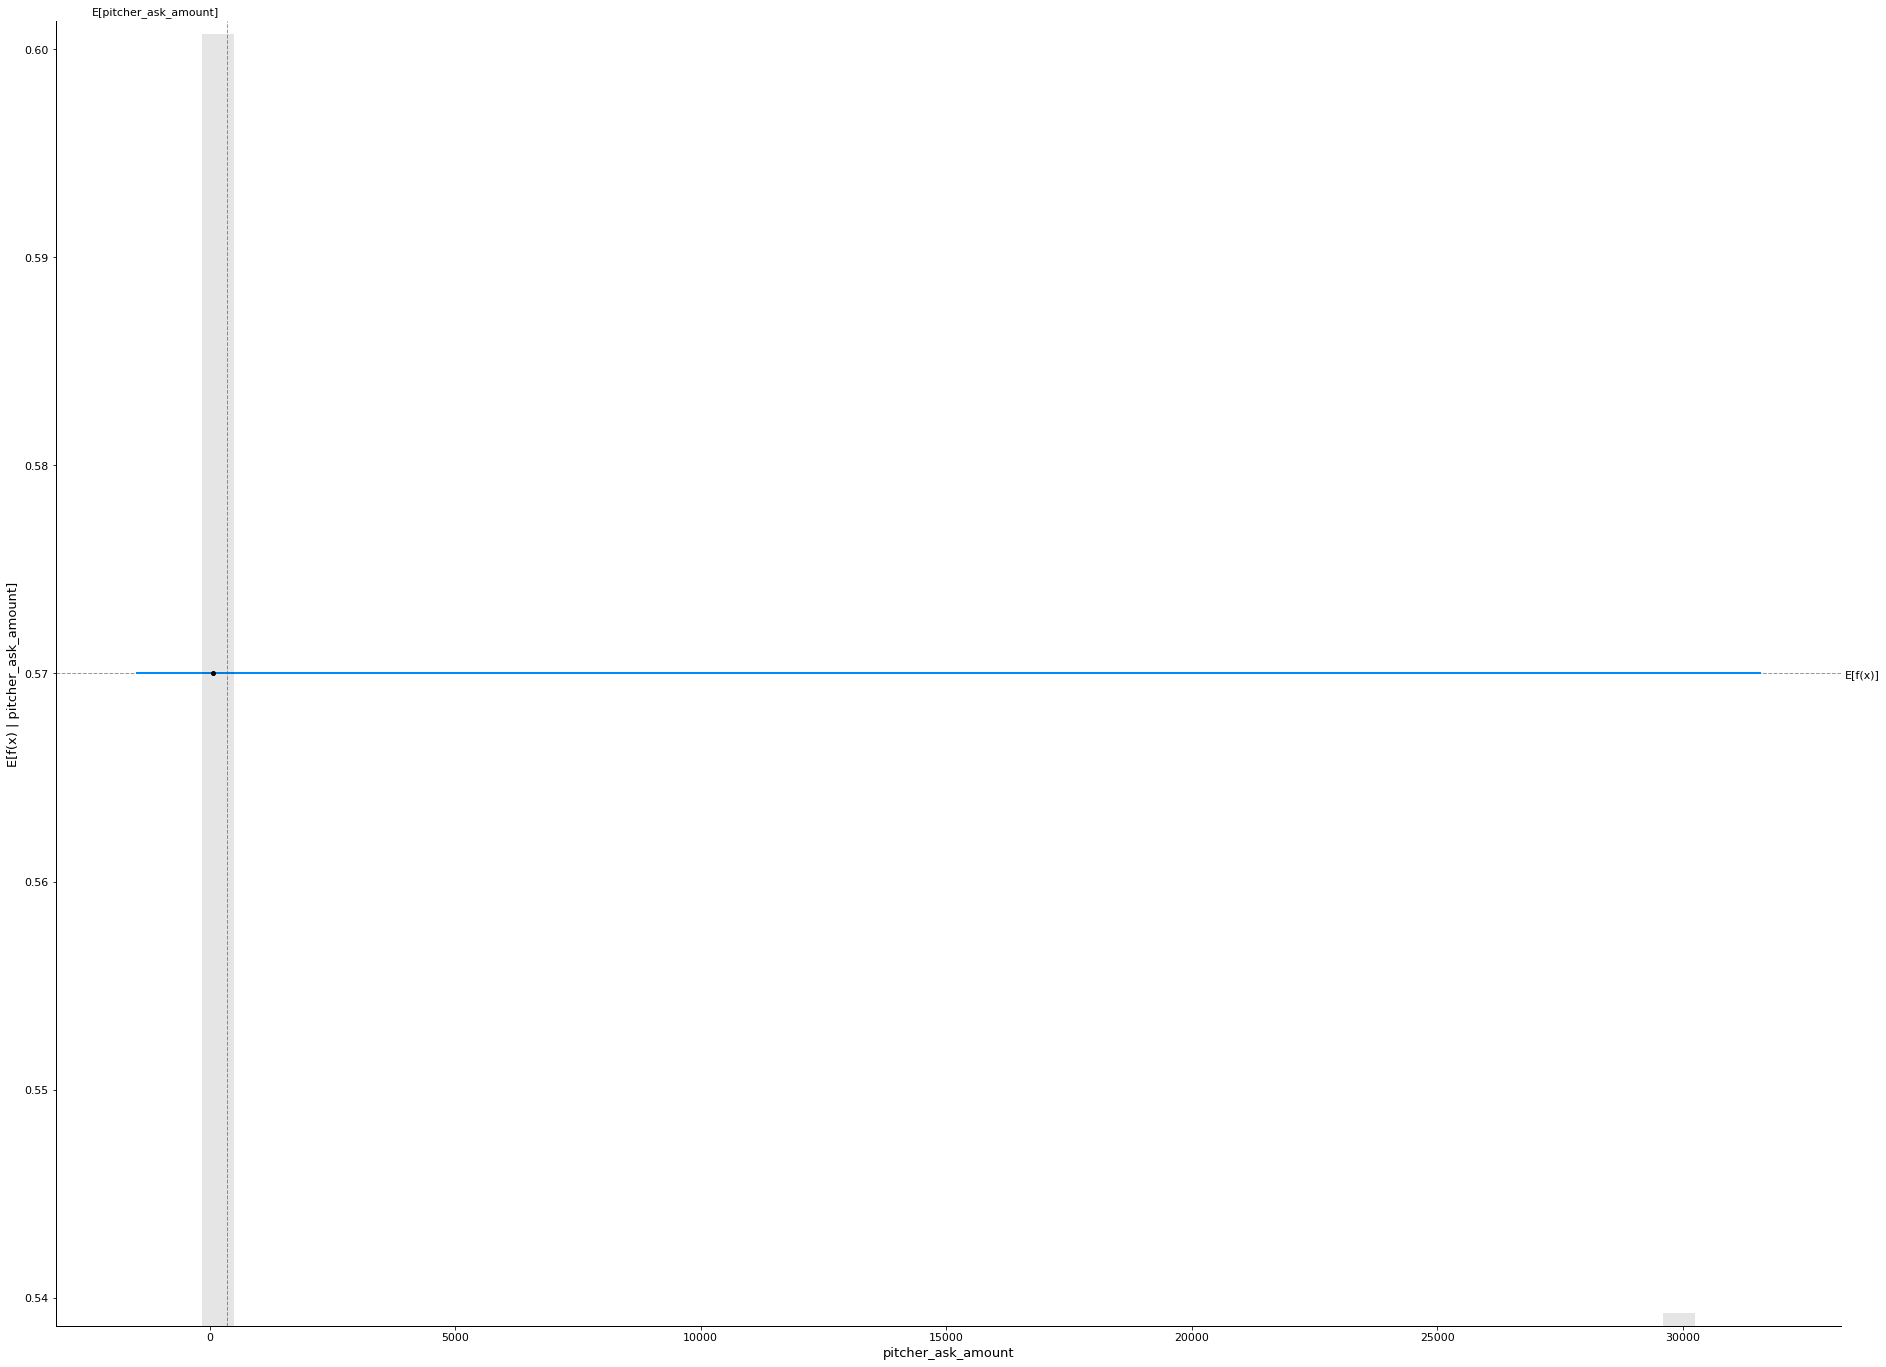

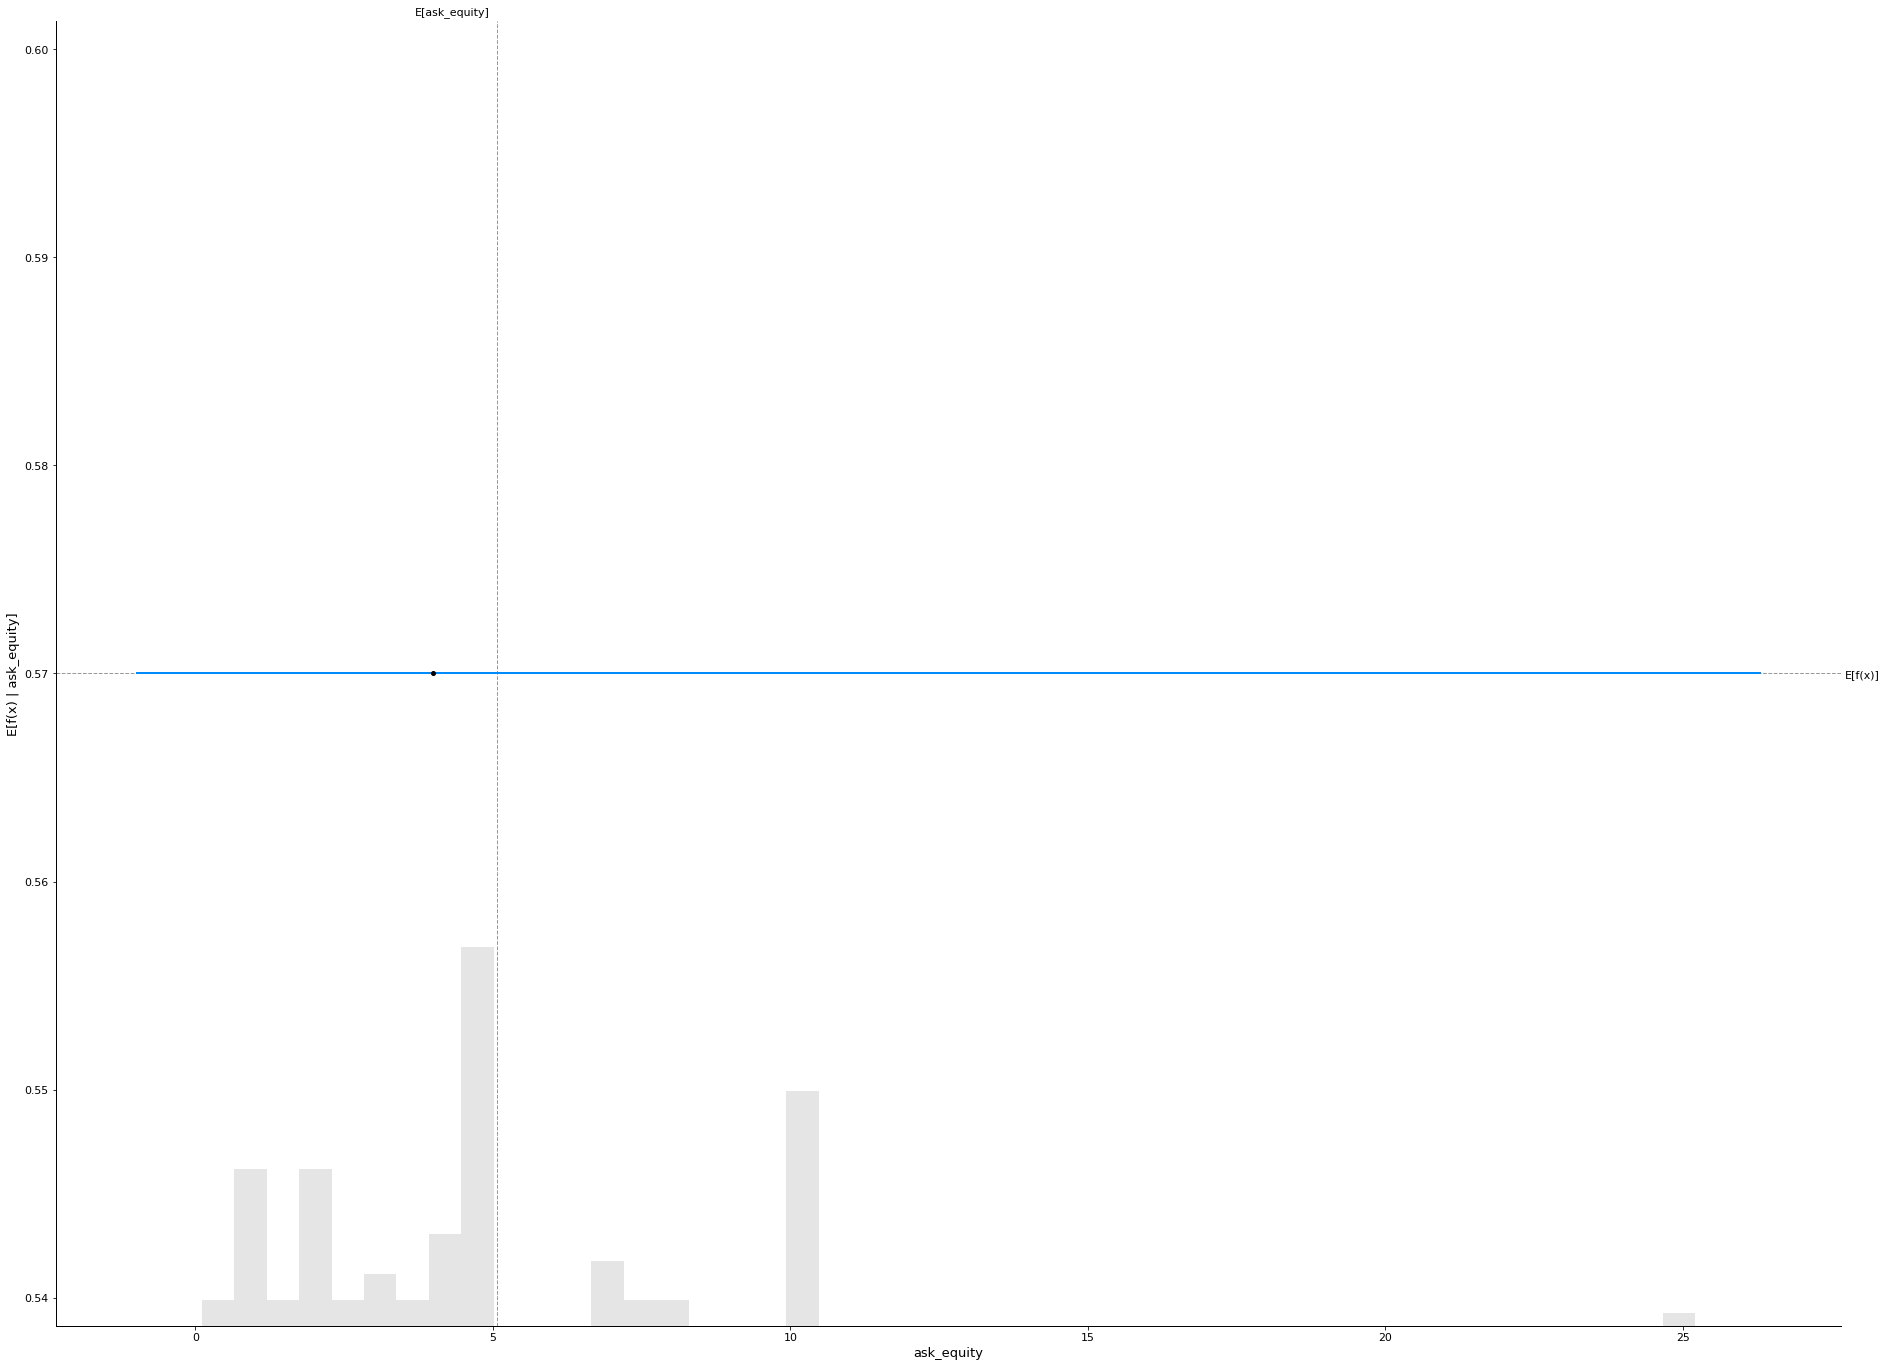

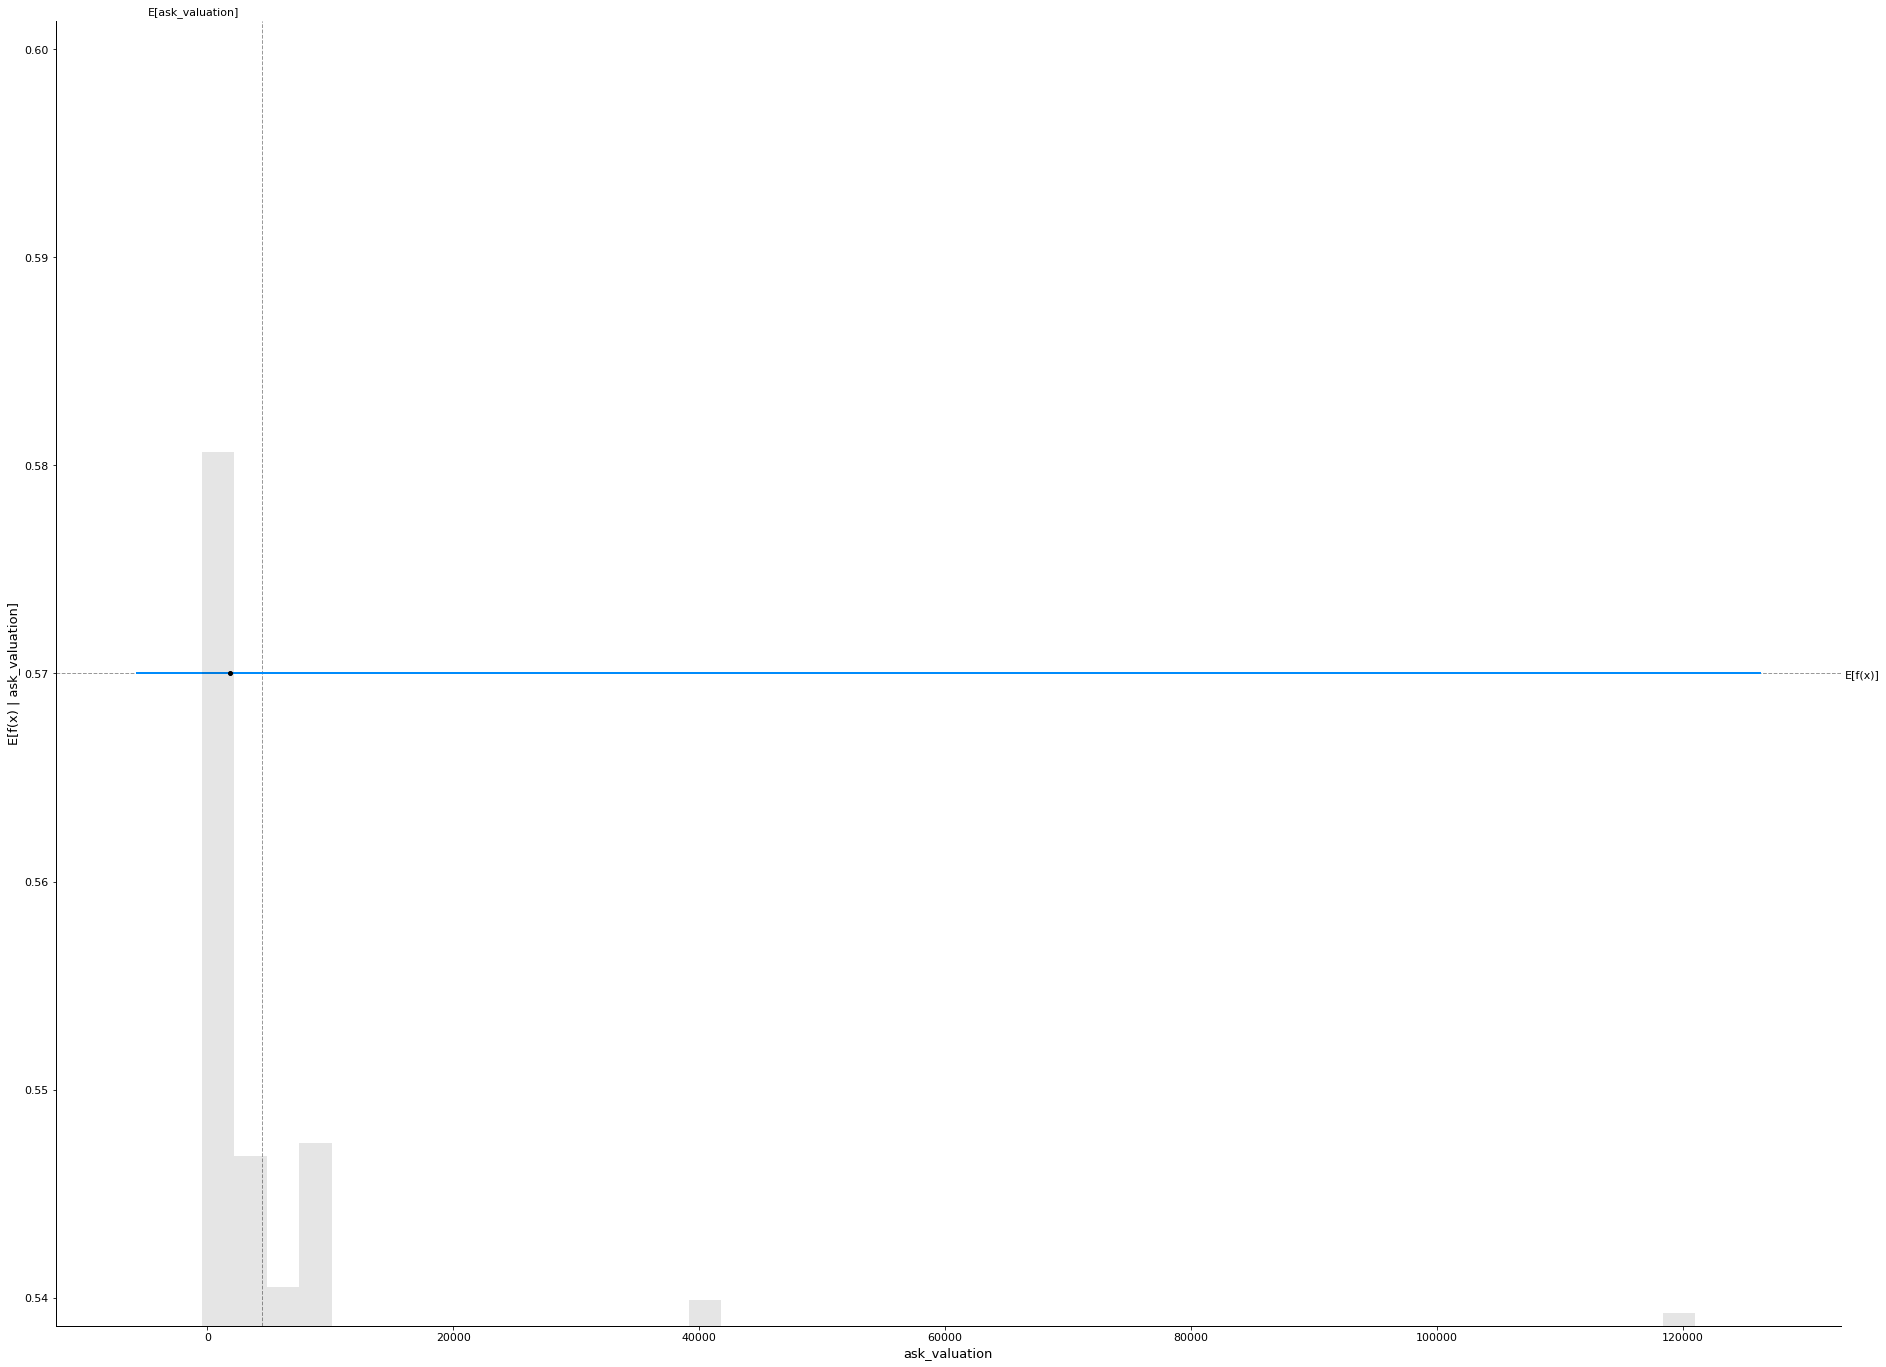

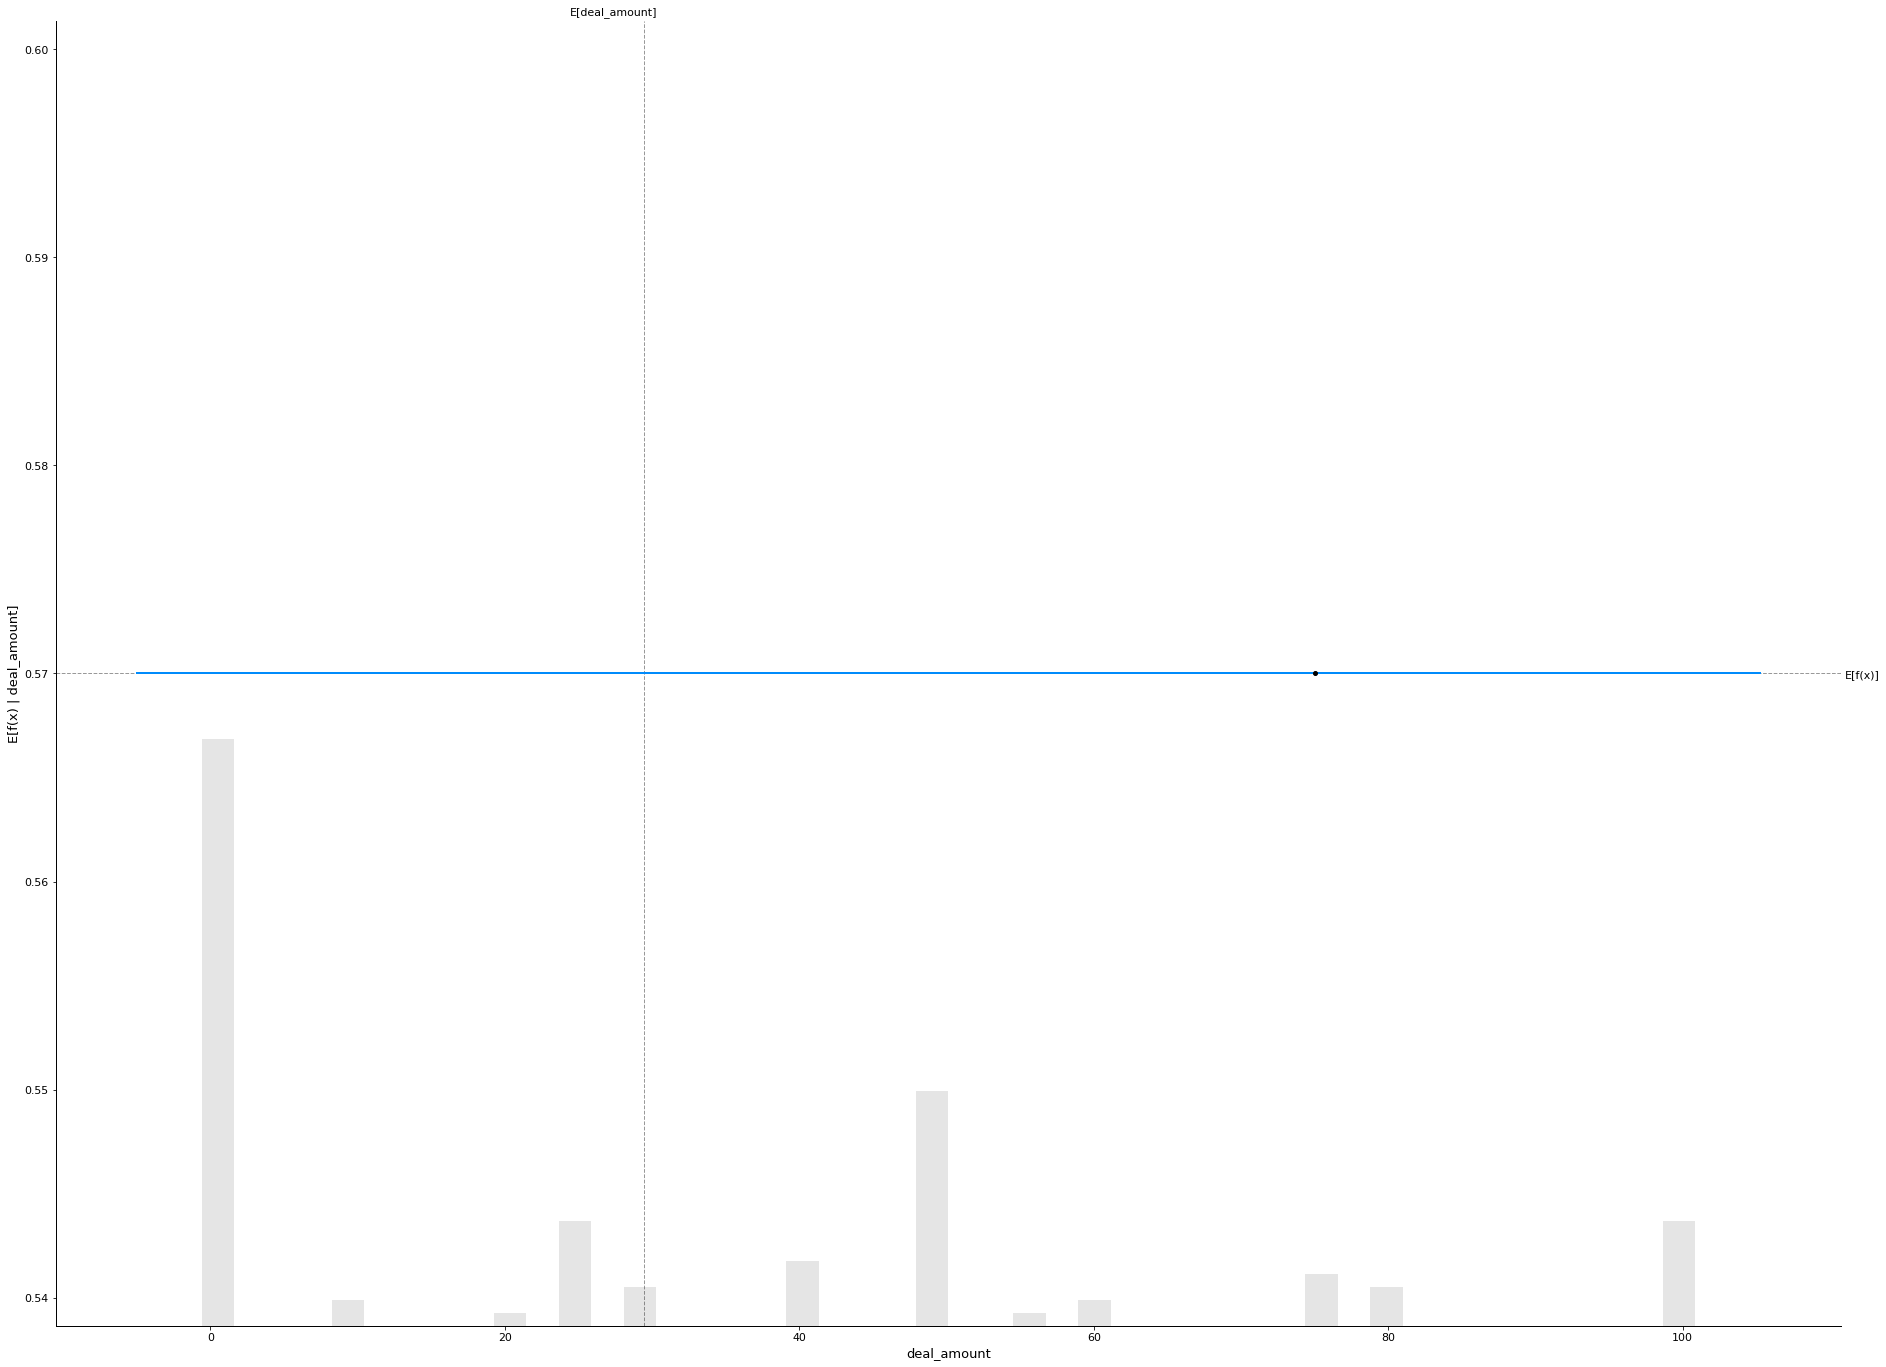

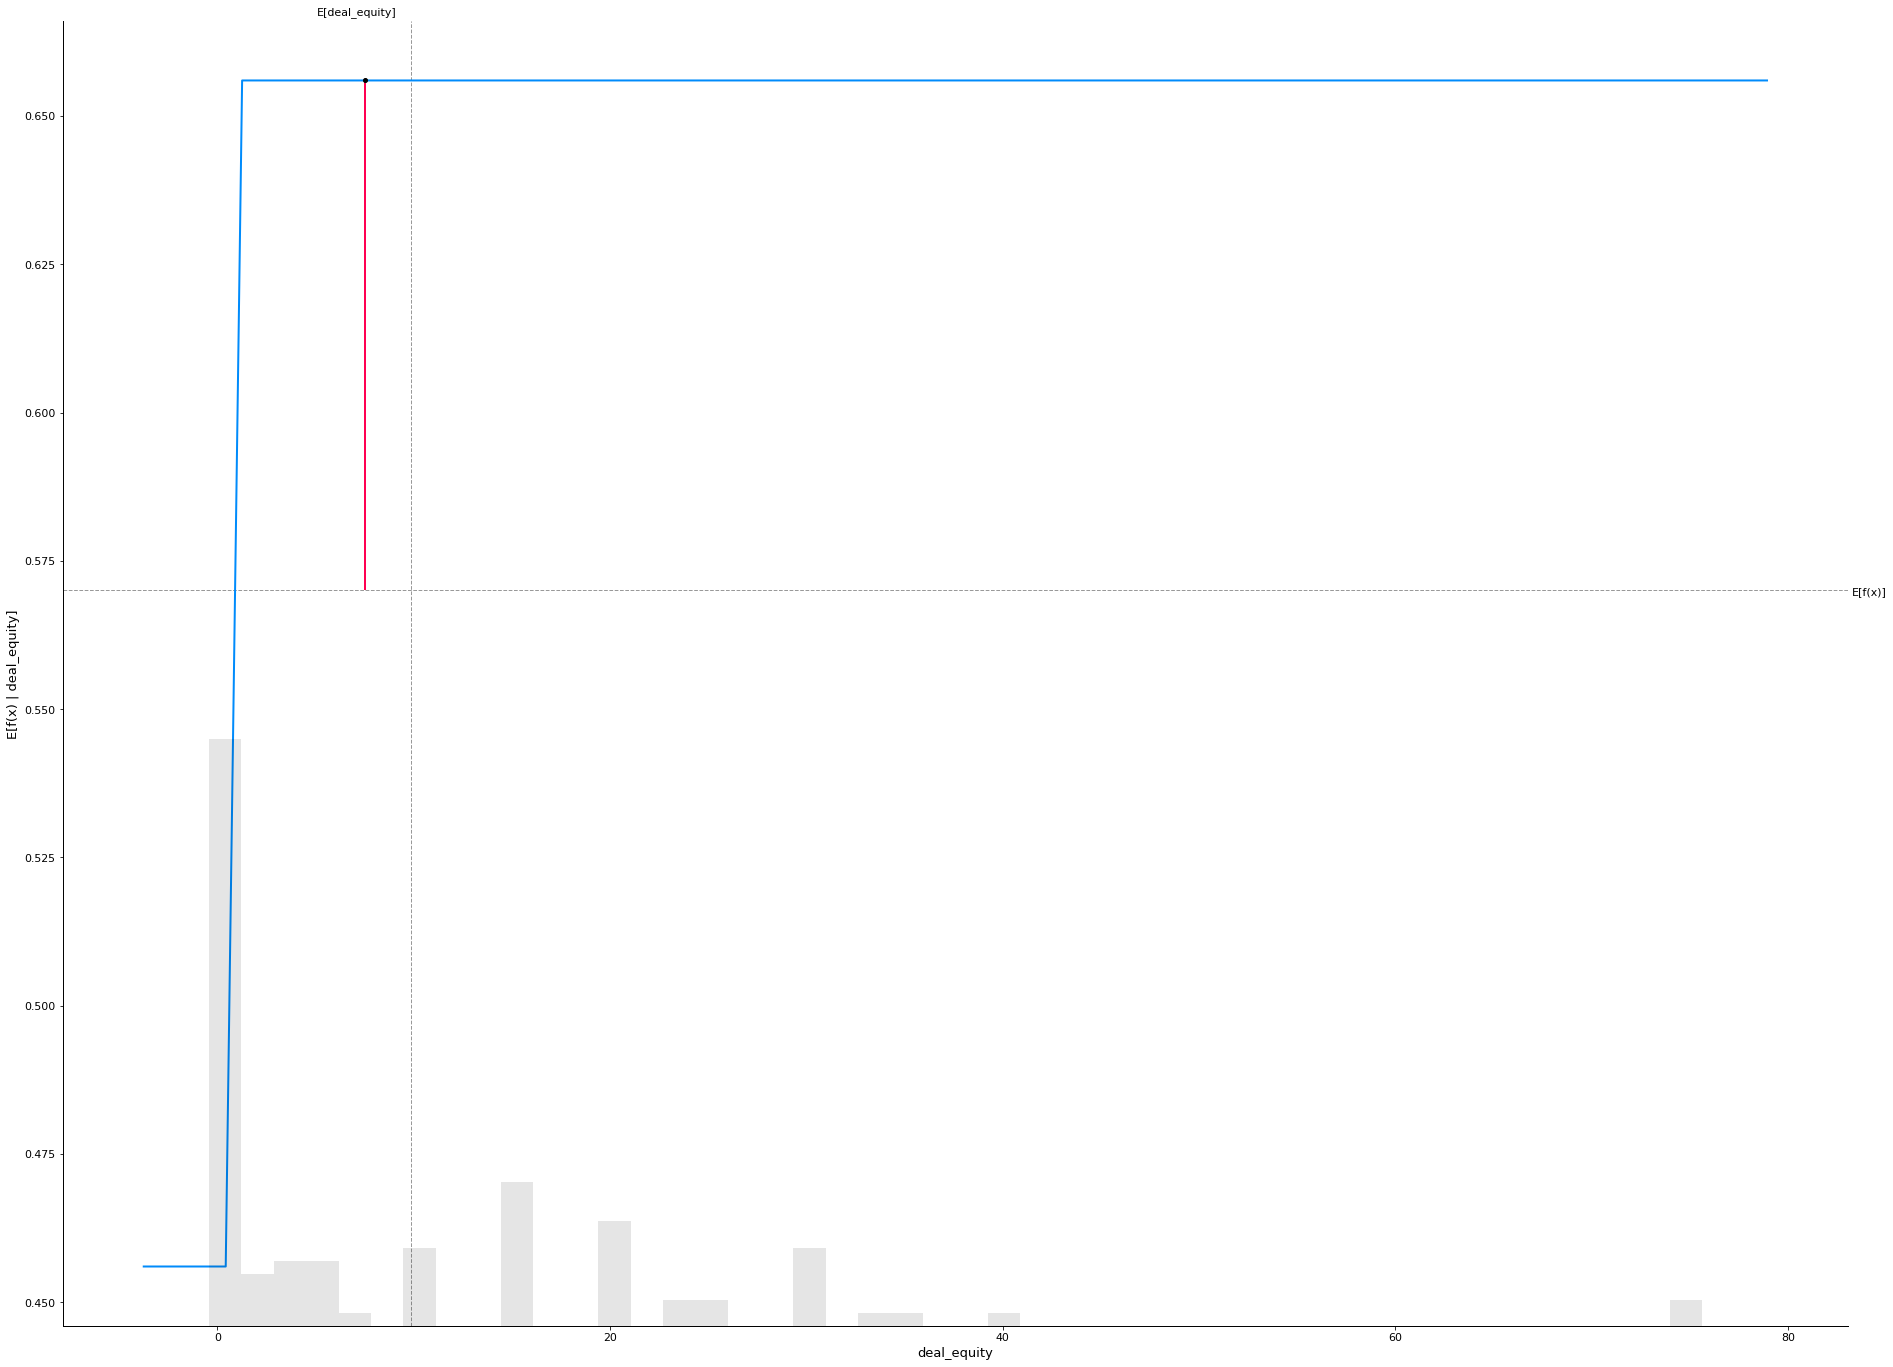

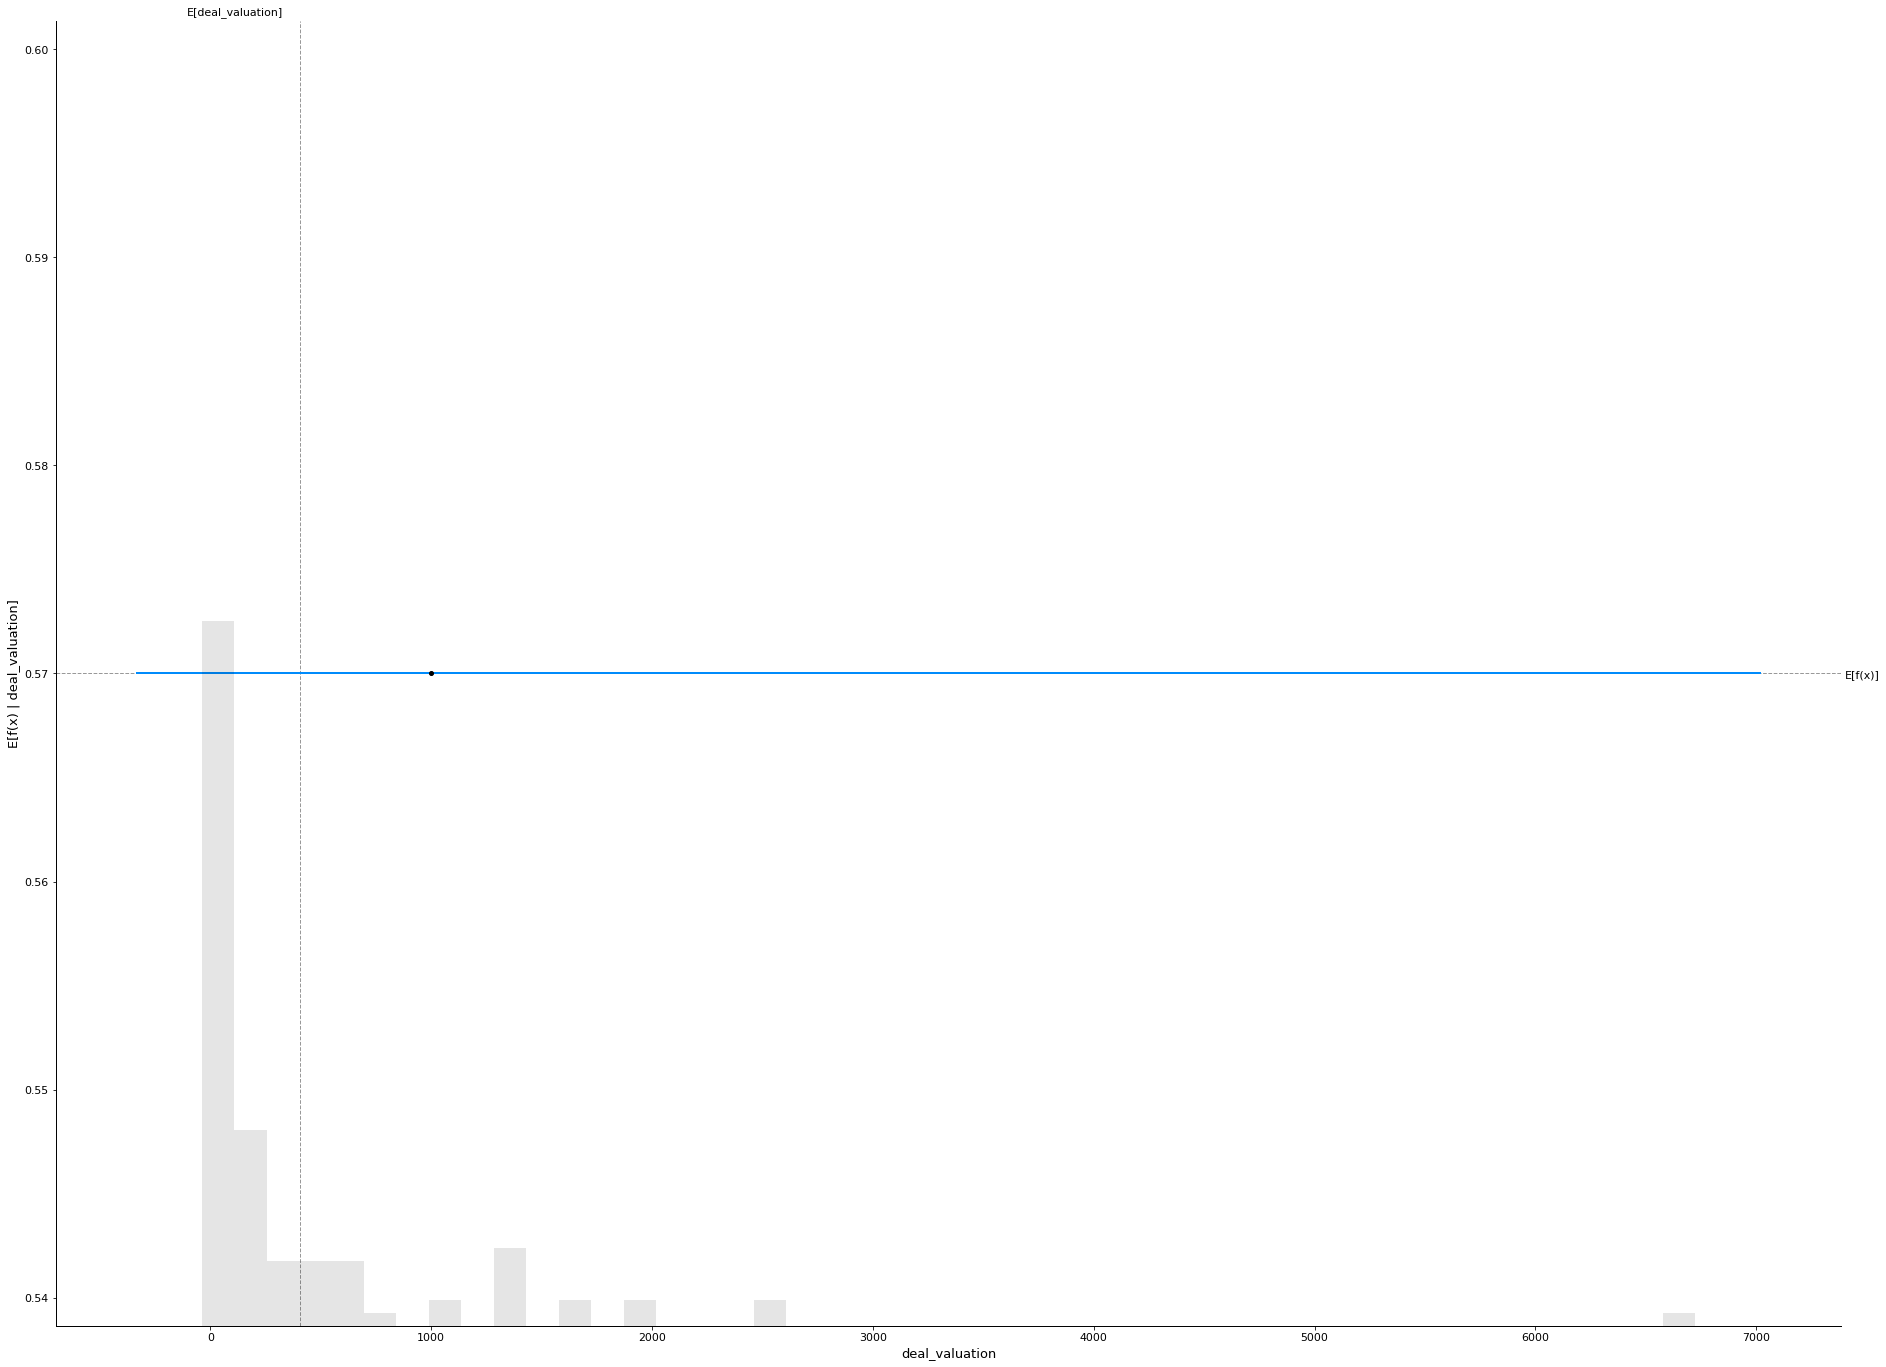

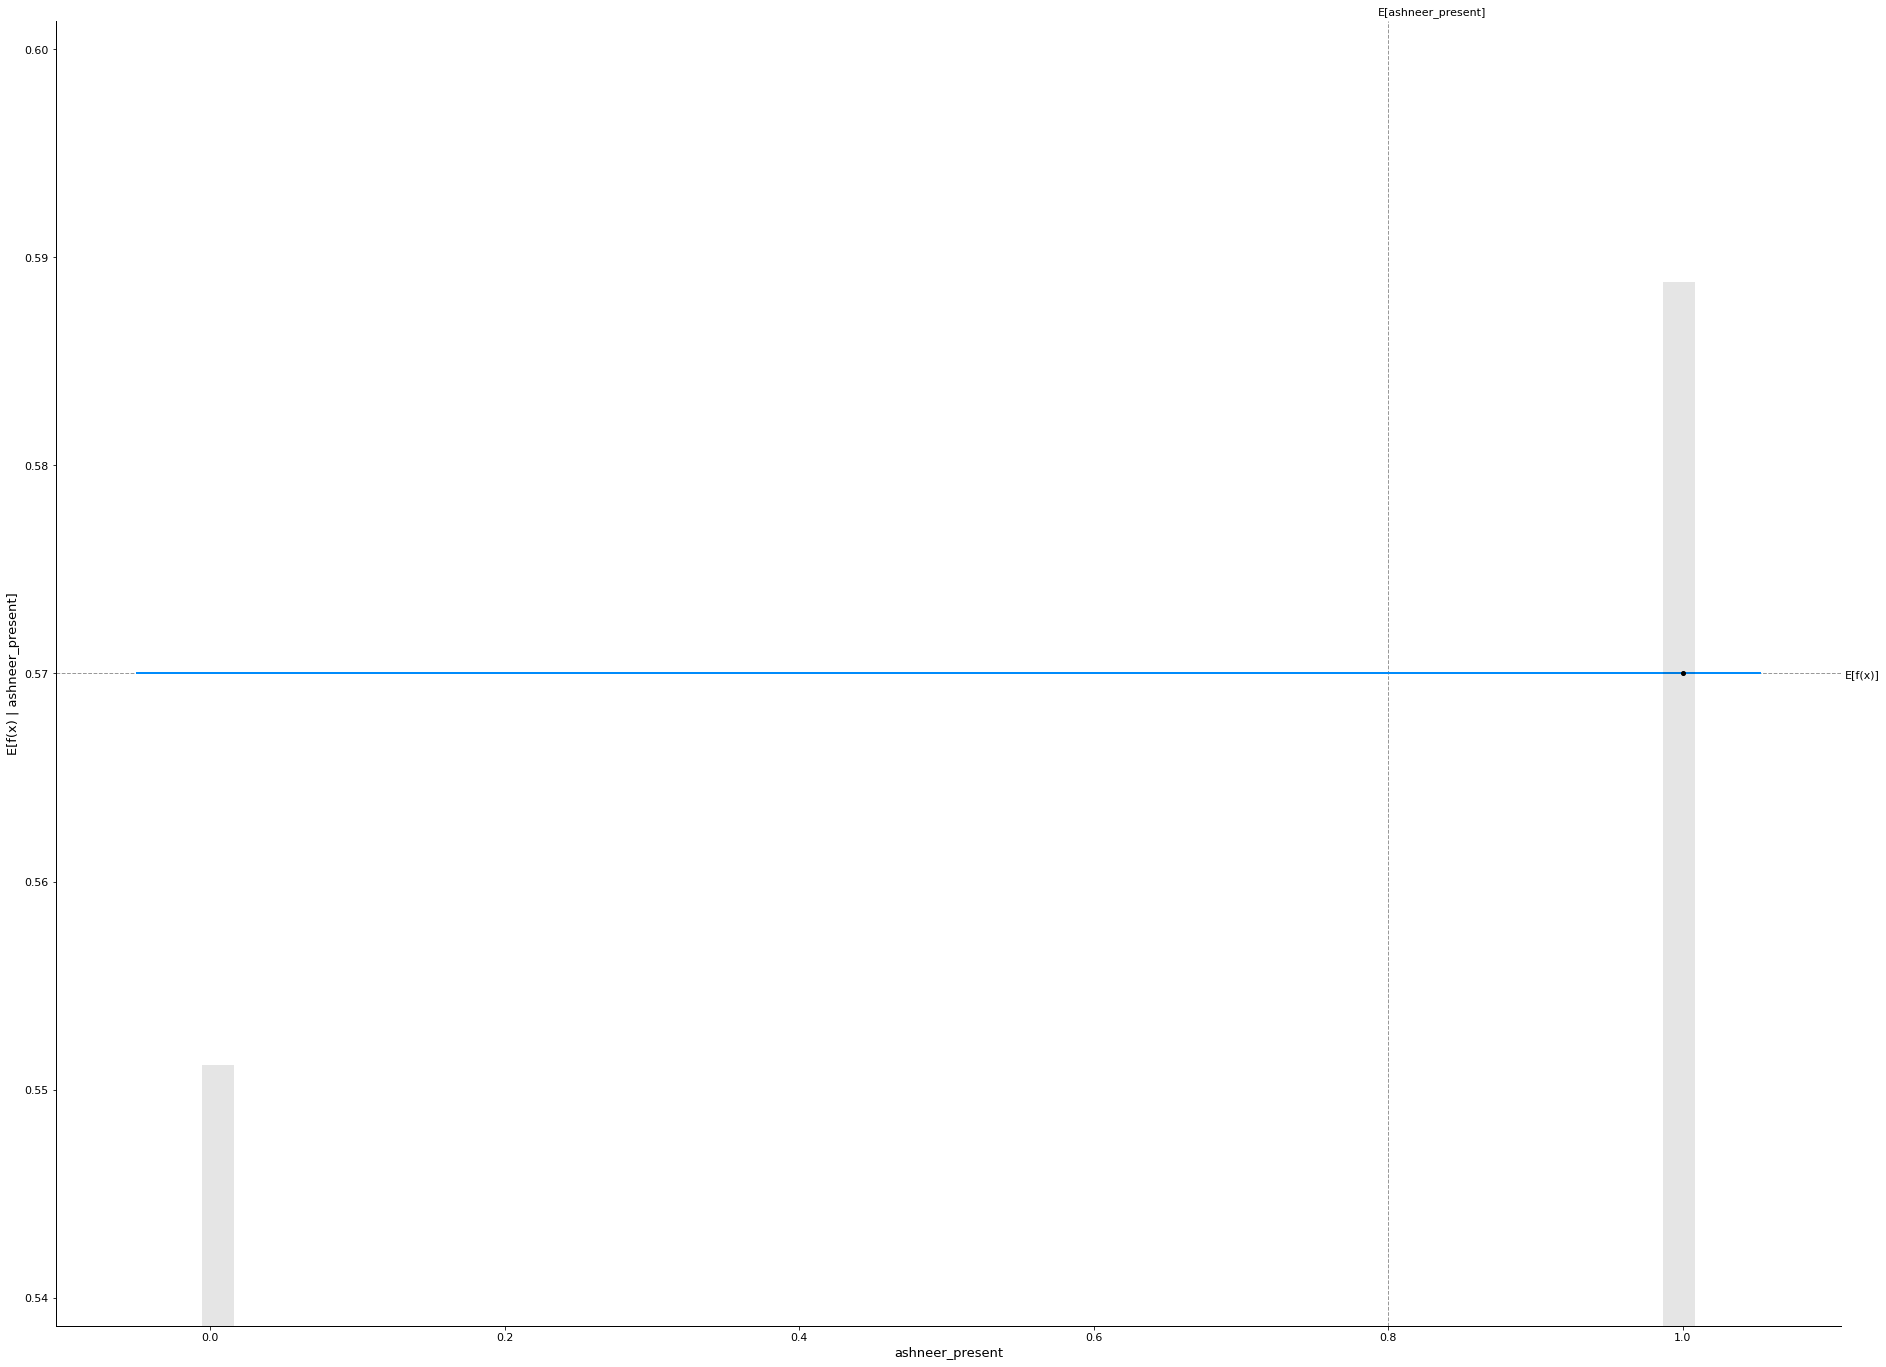

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.


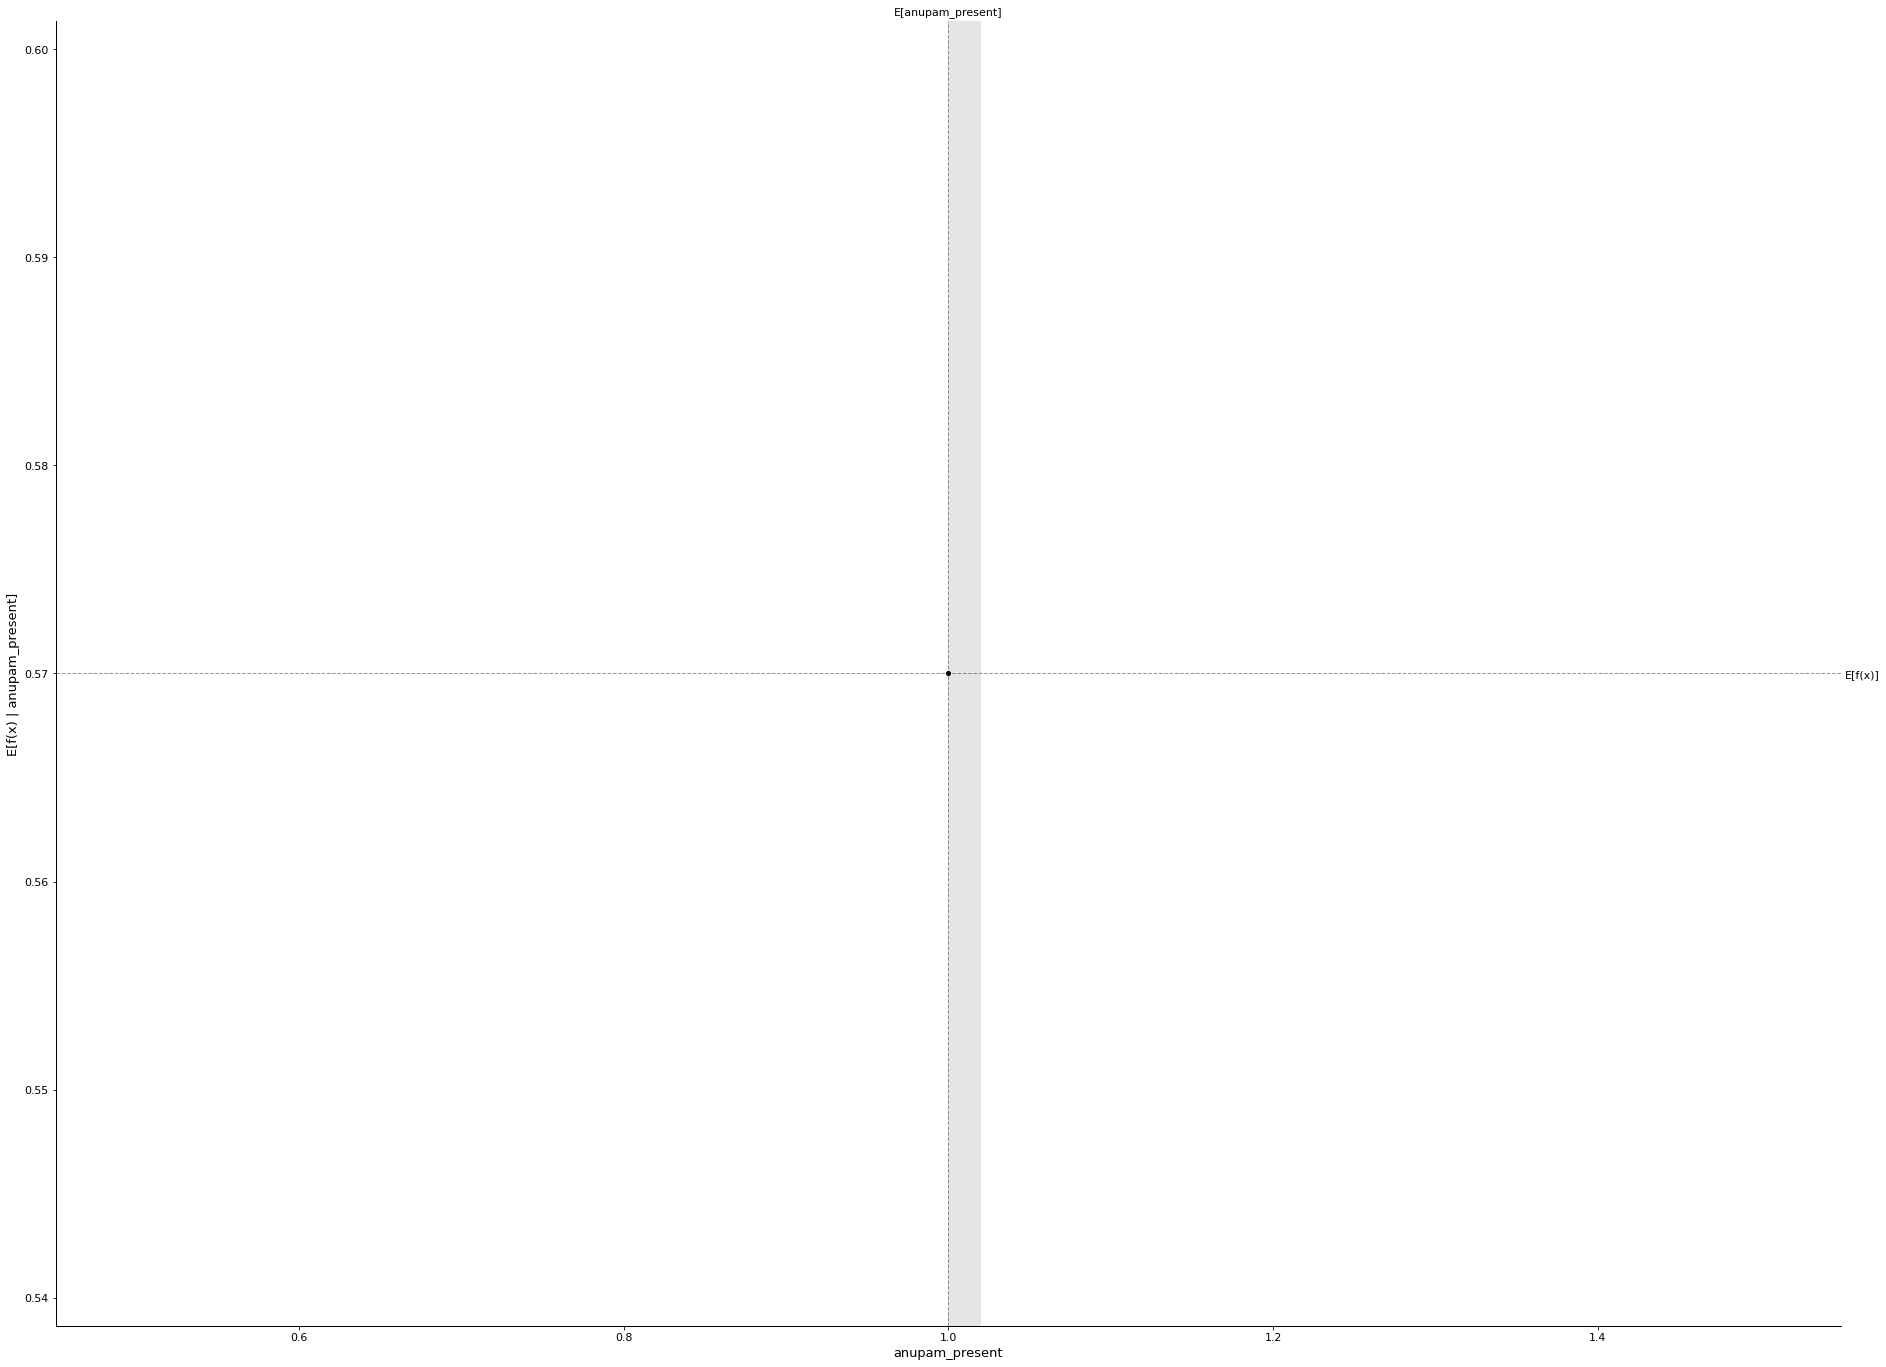

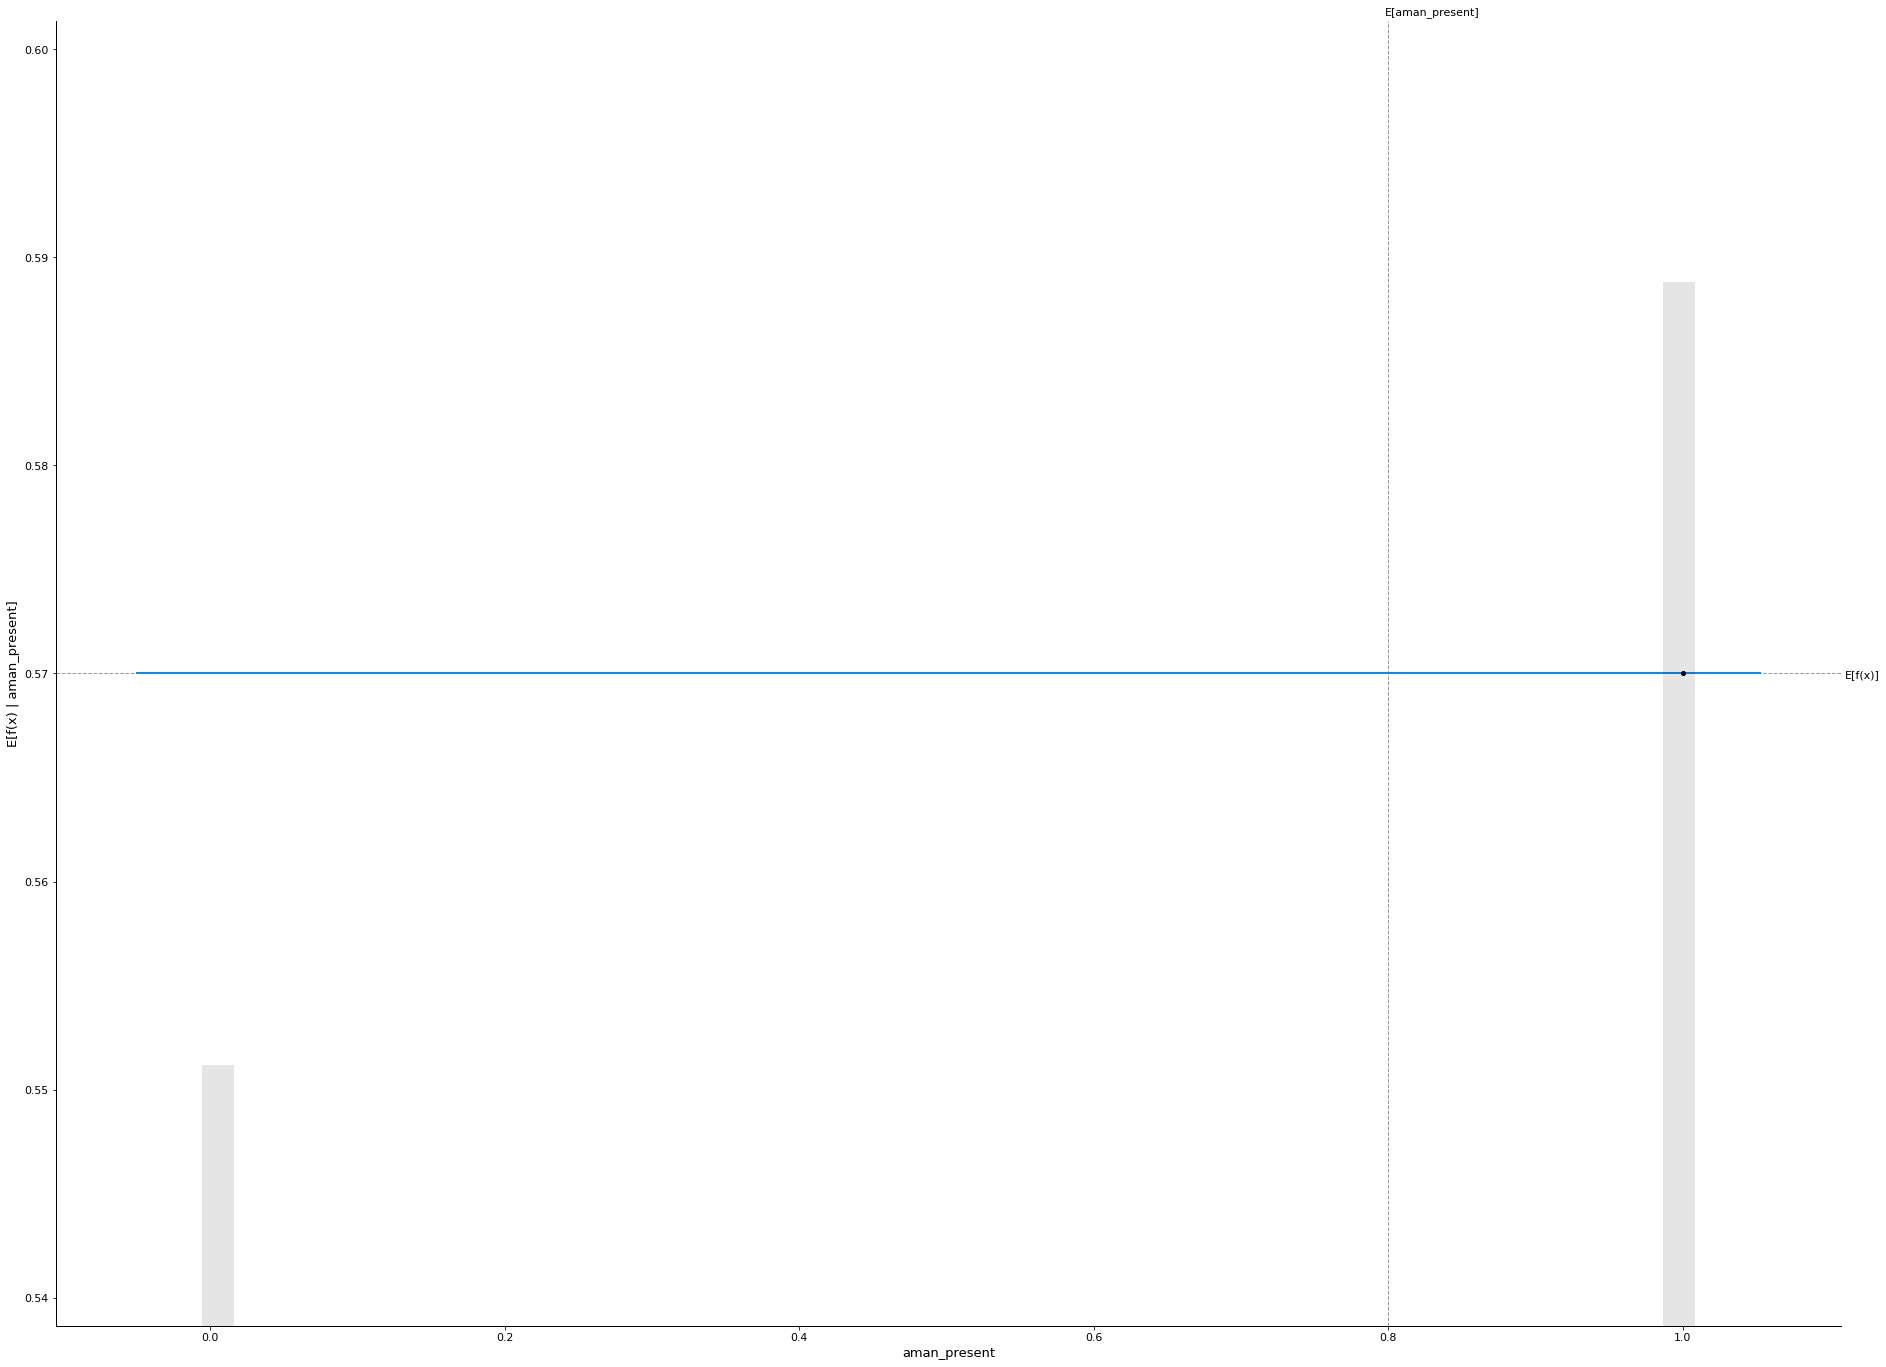

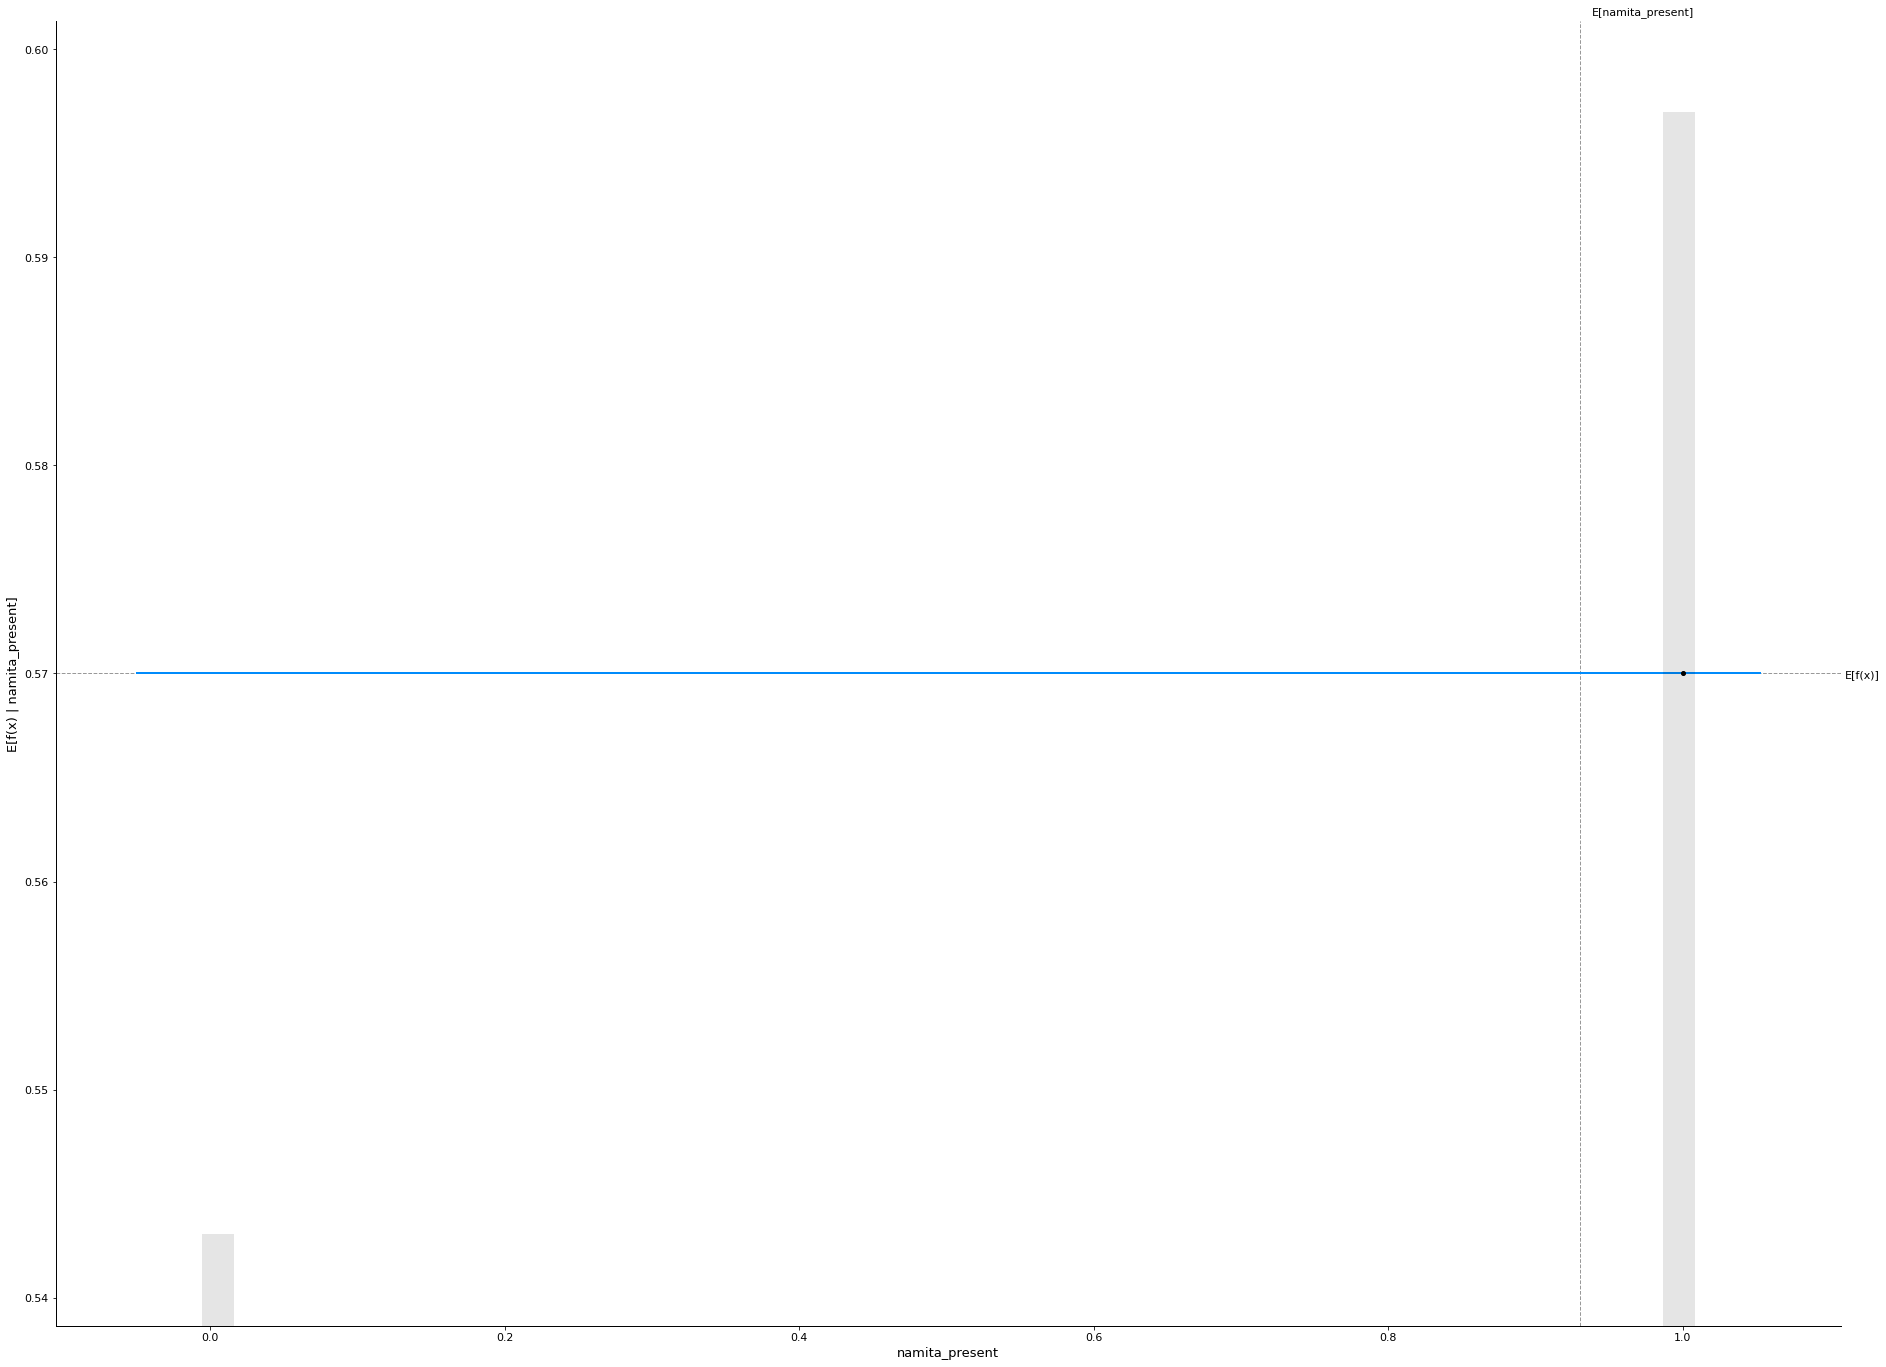

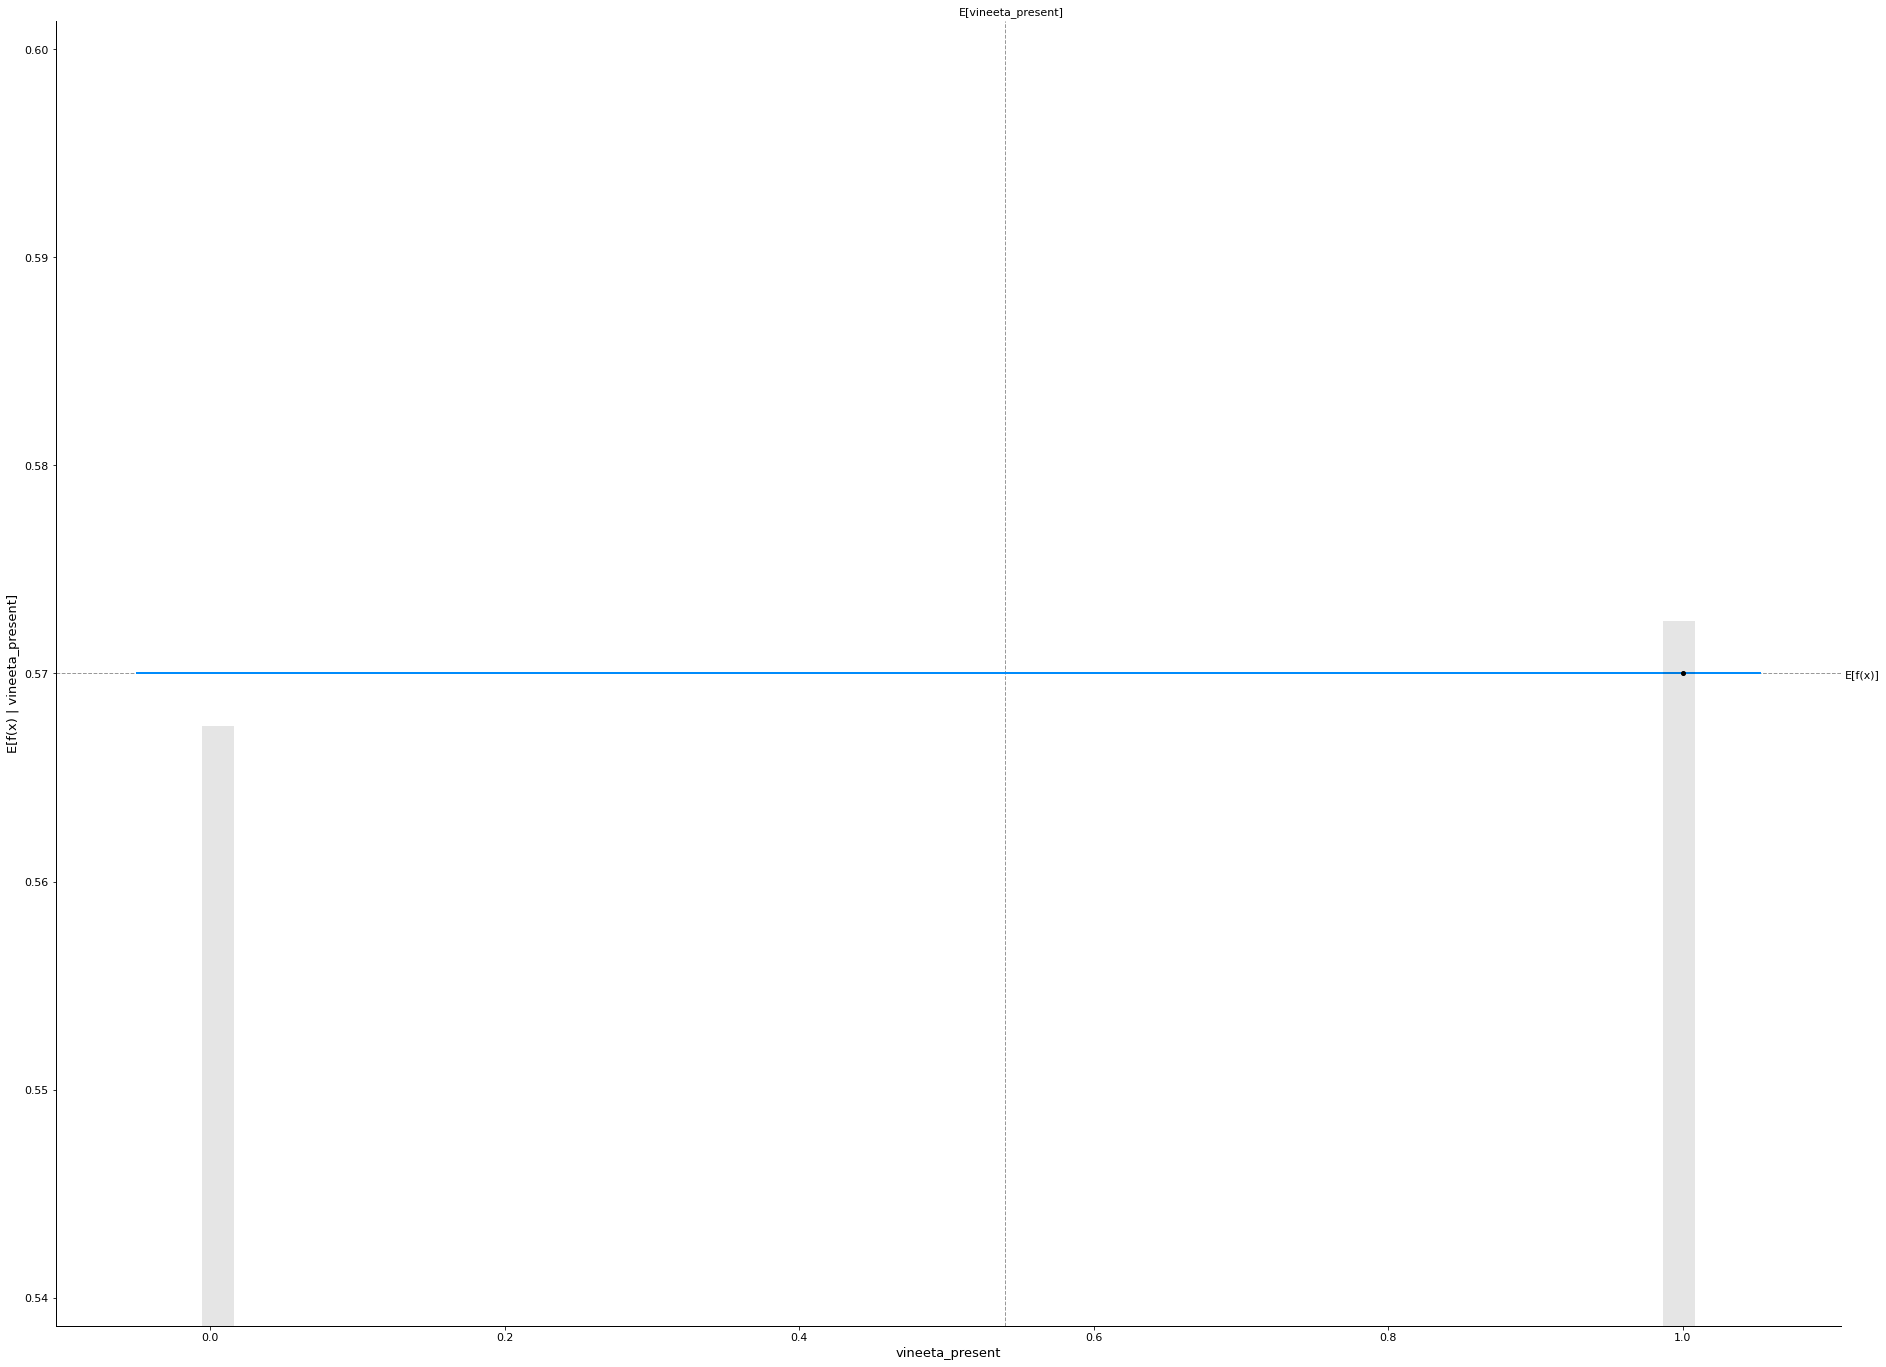

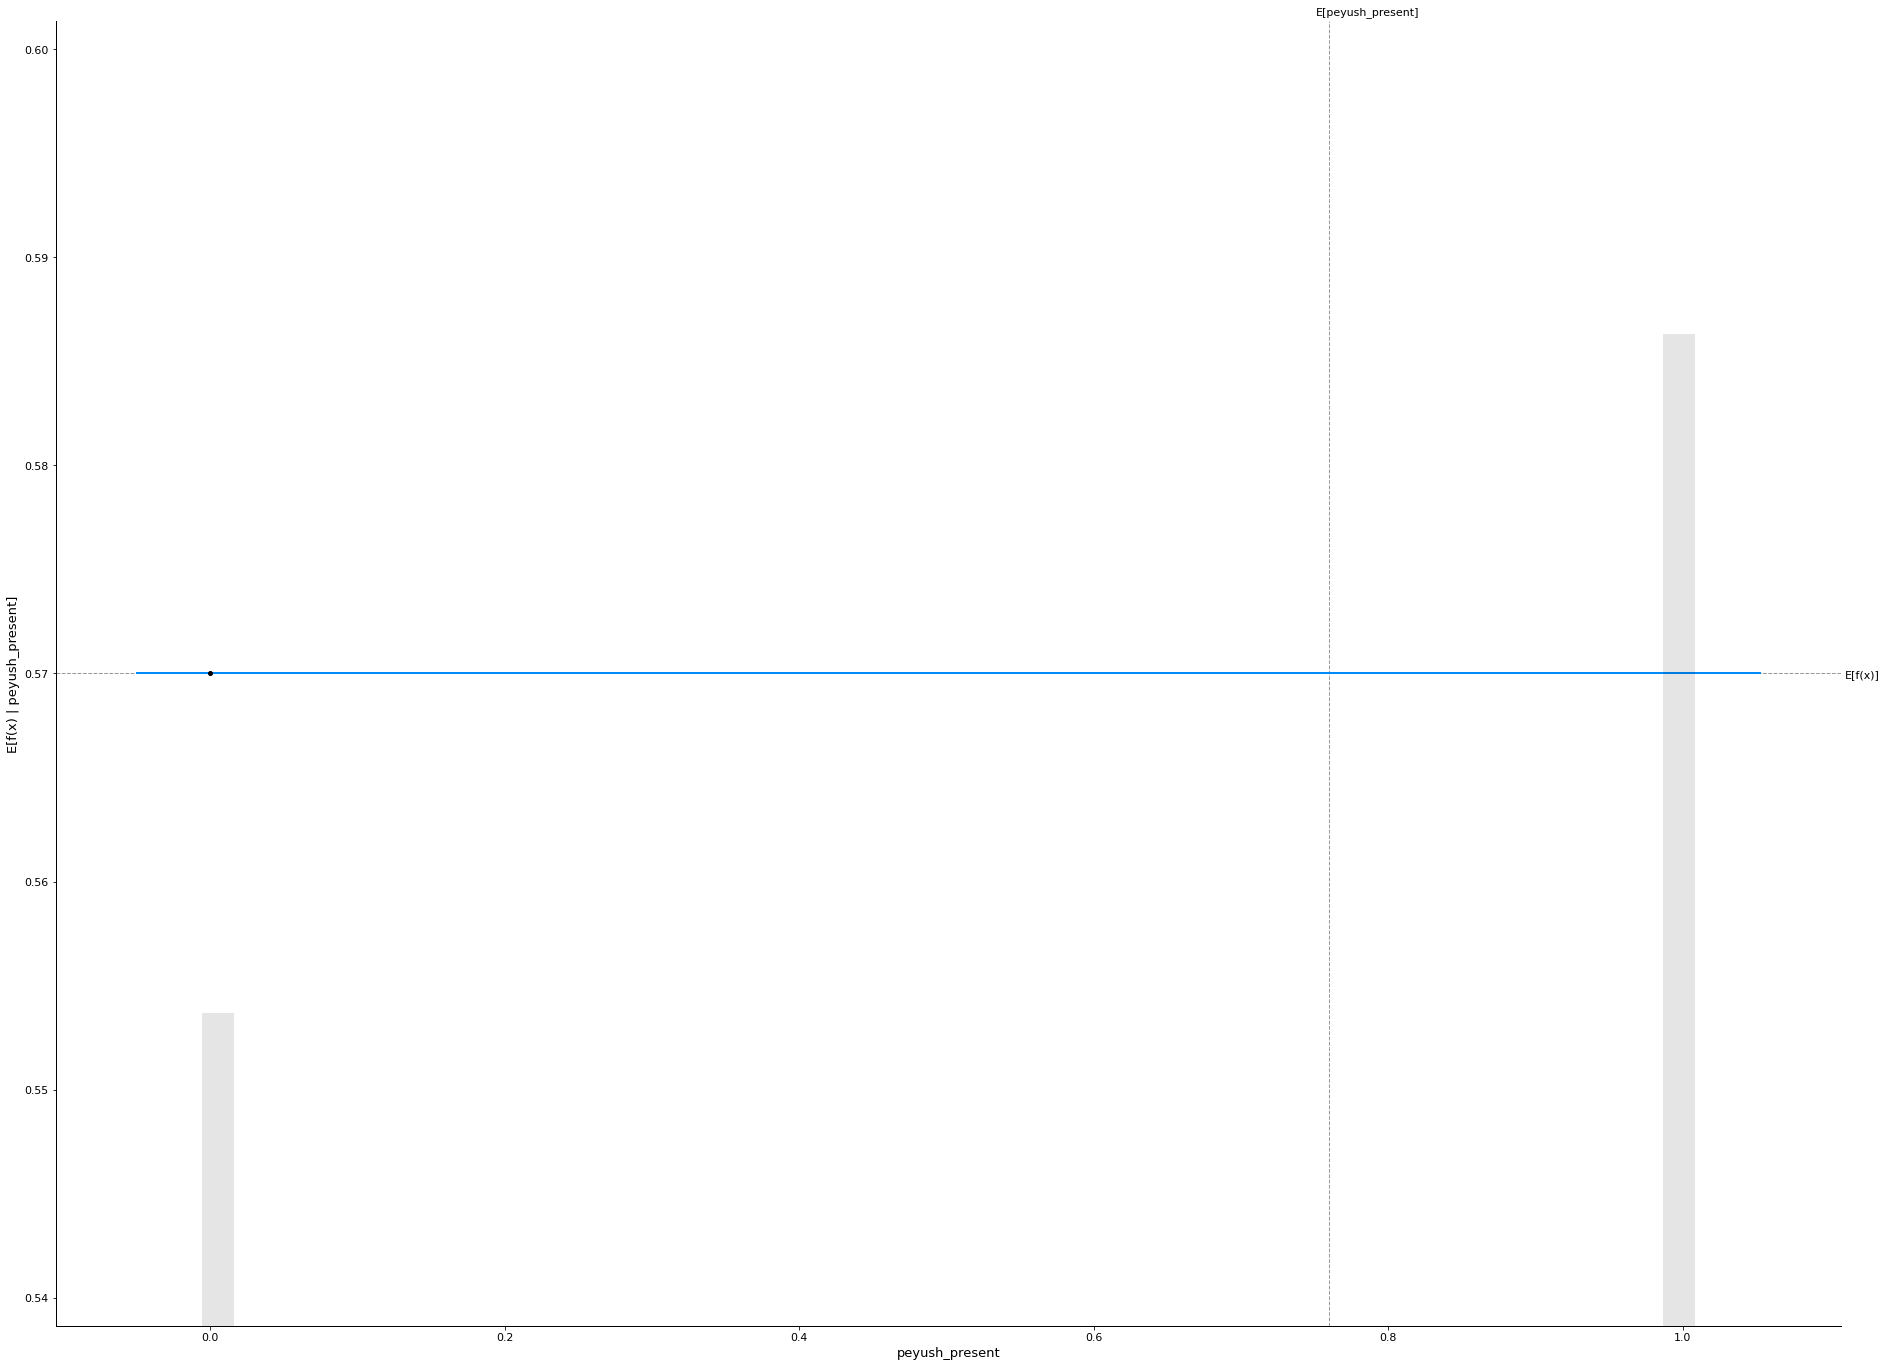

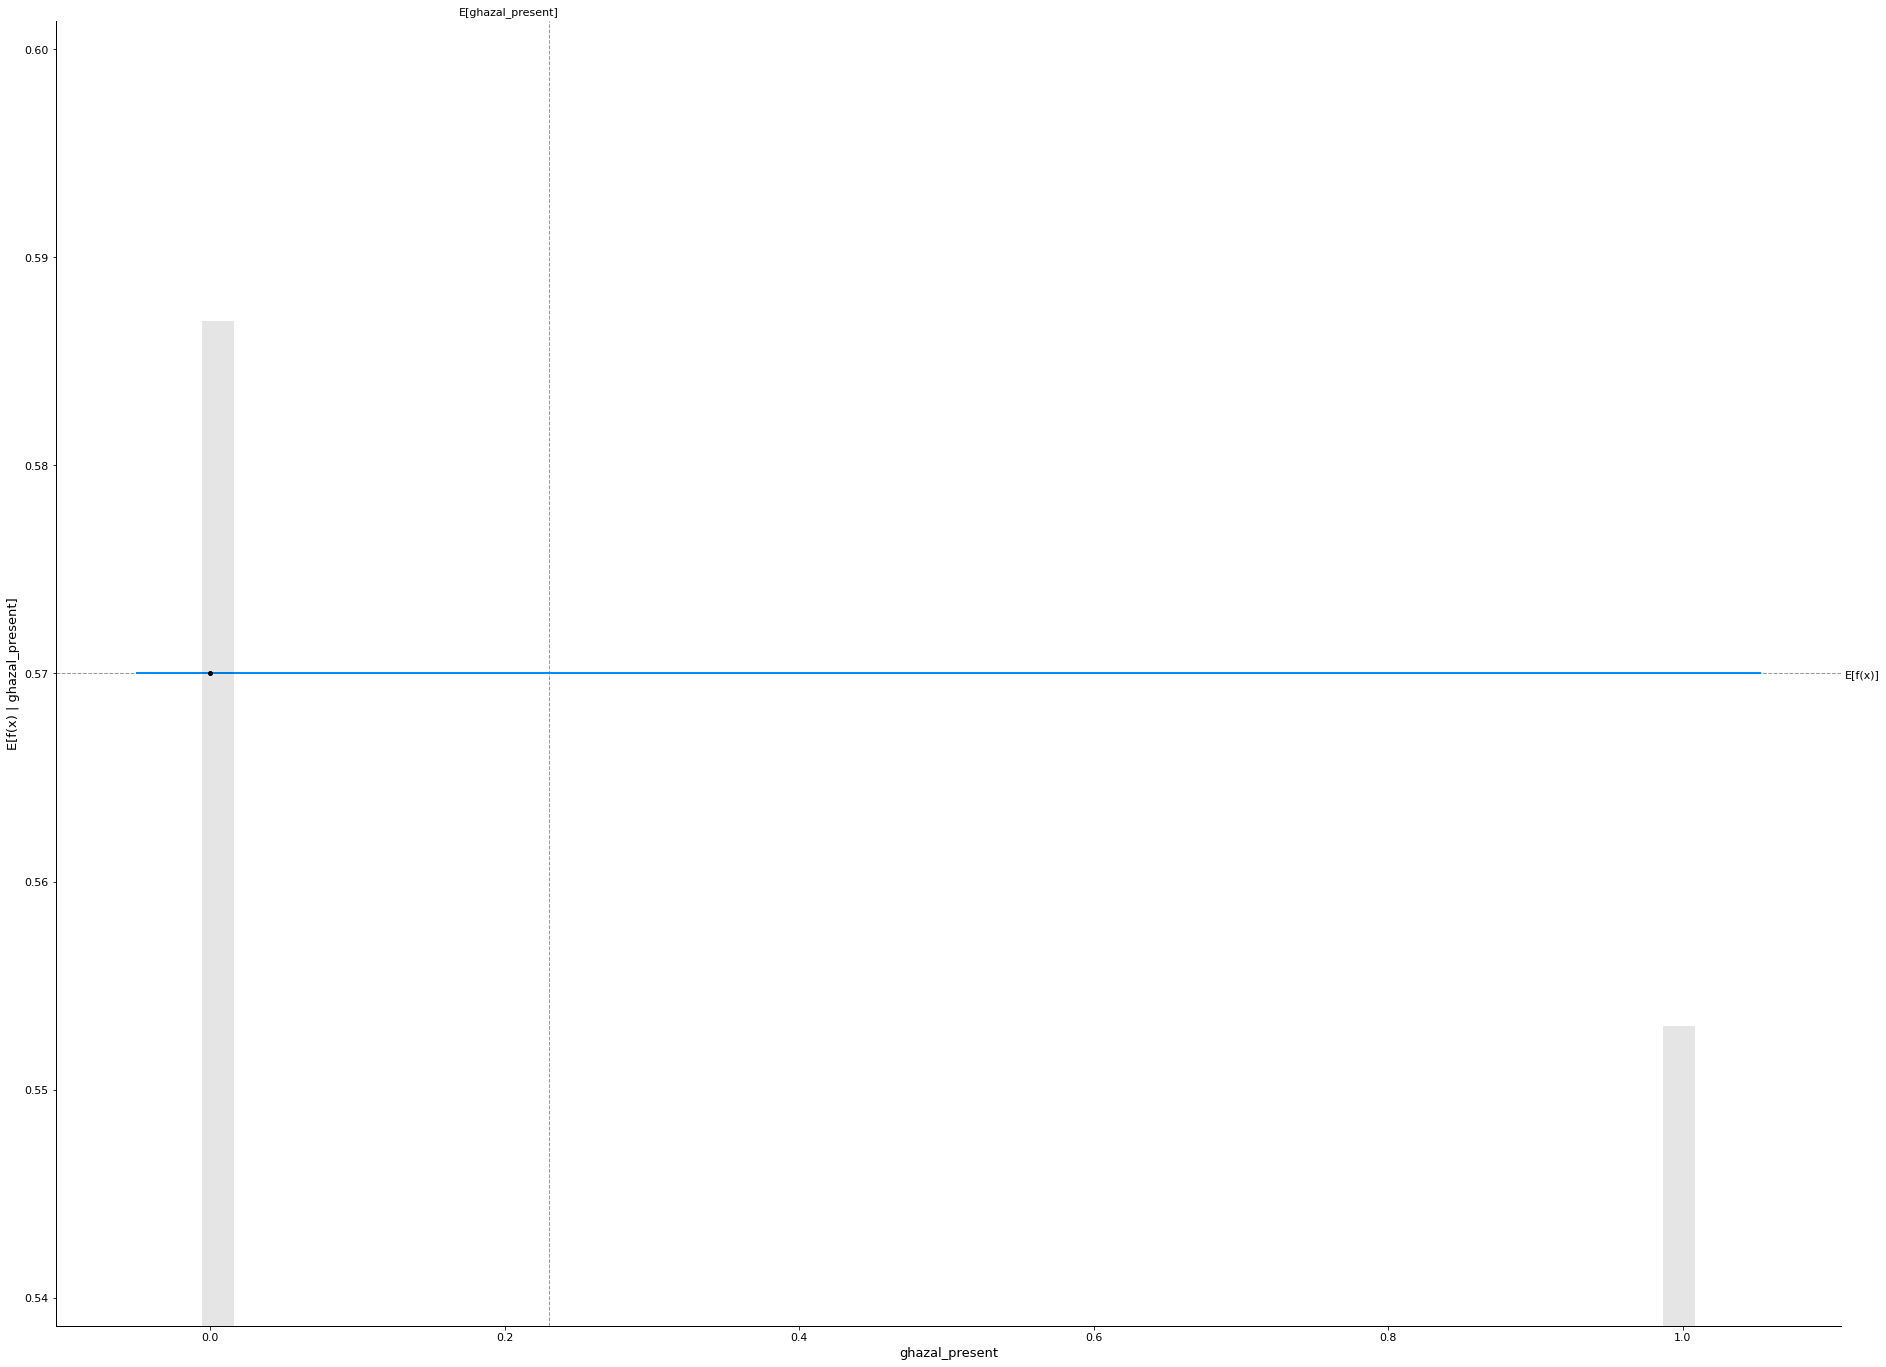

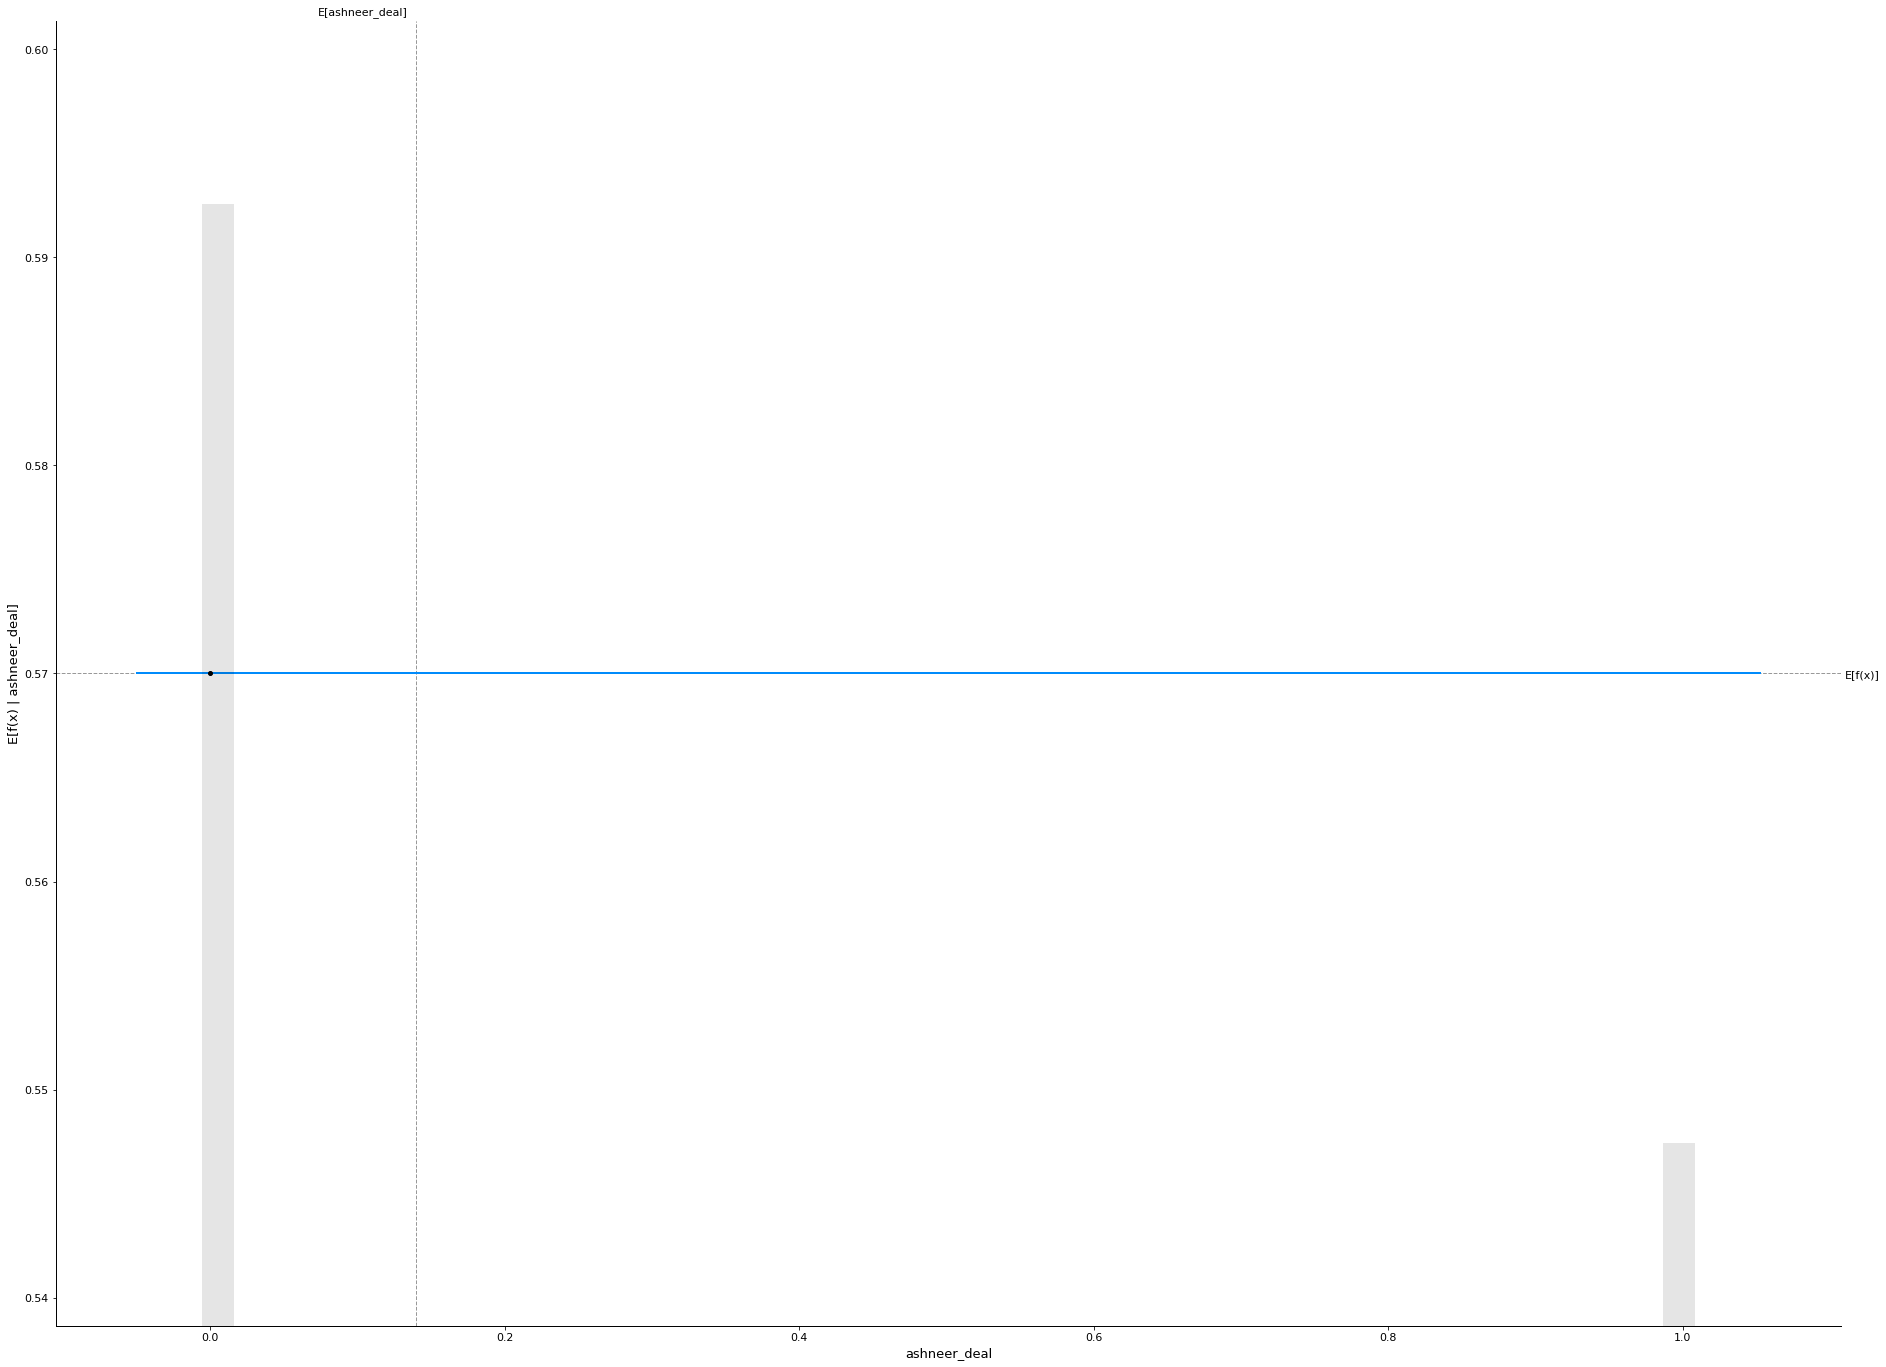

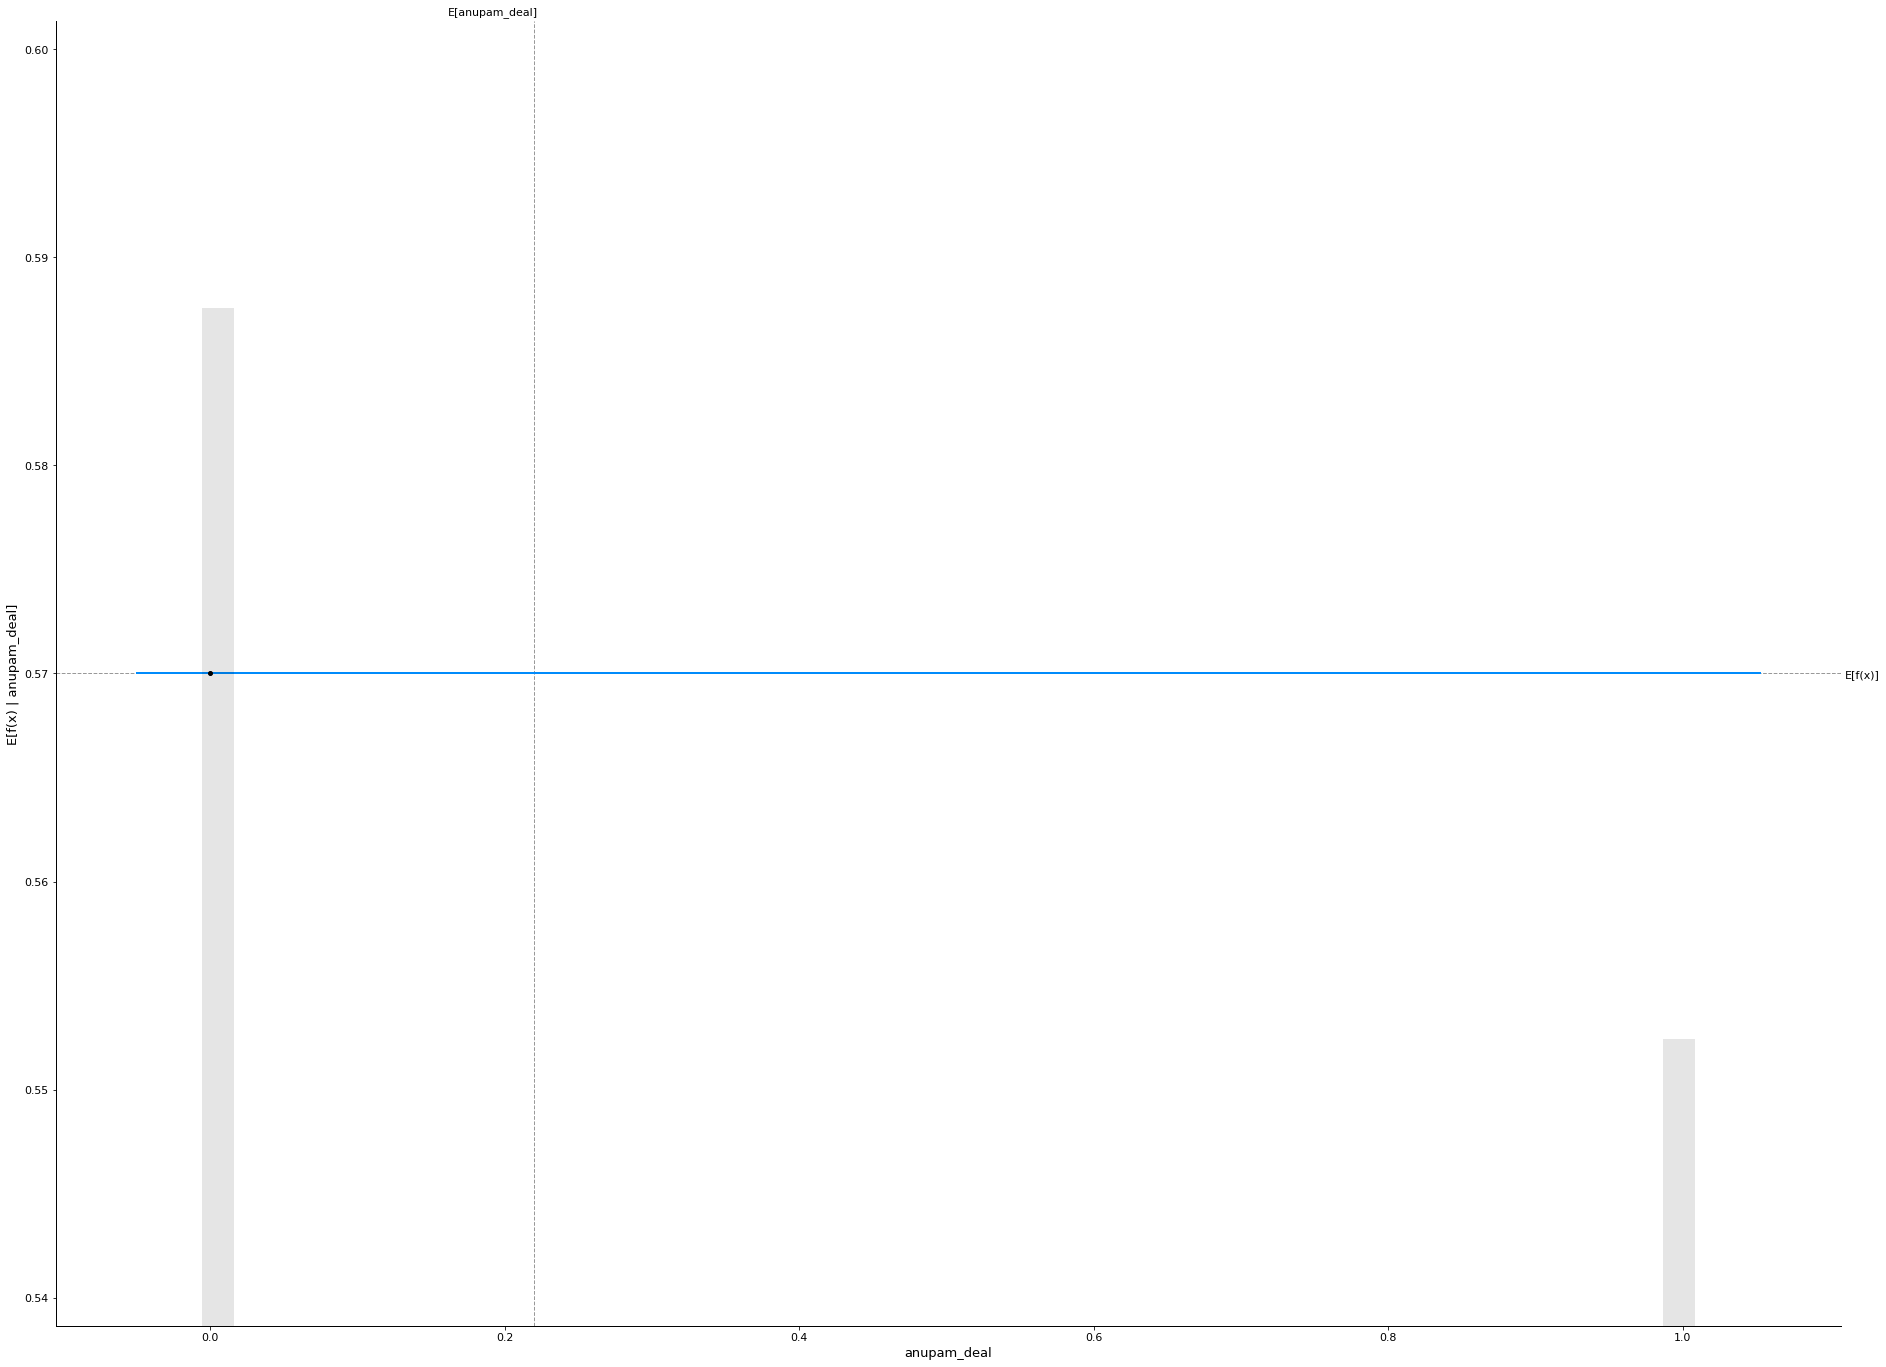

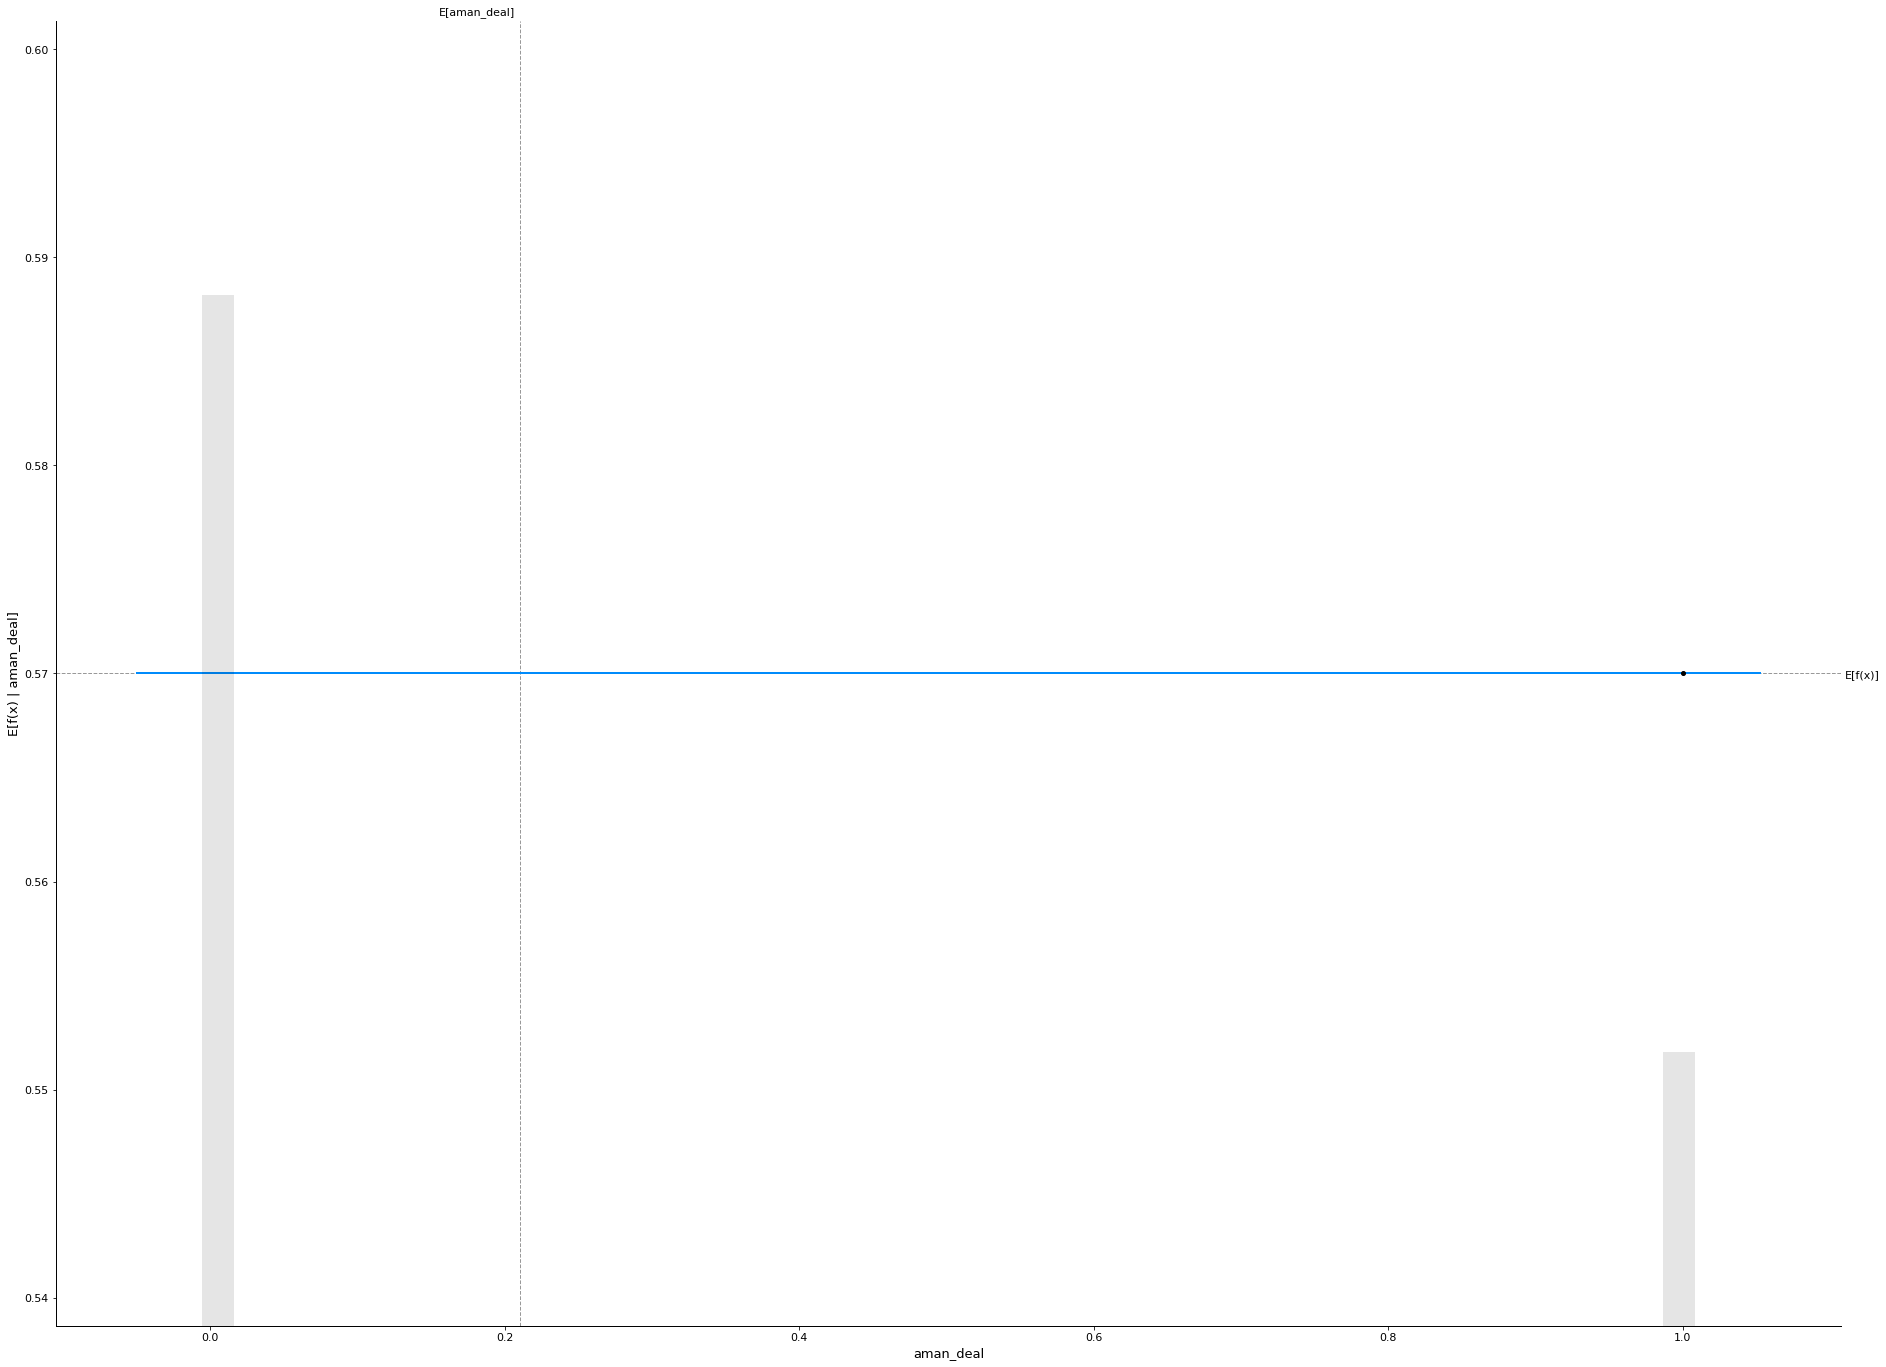

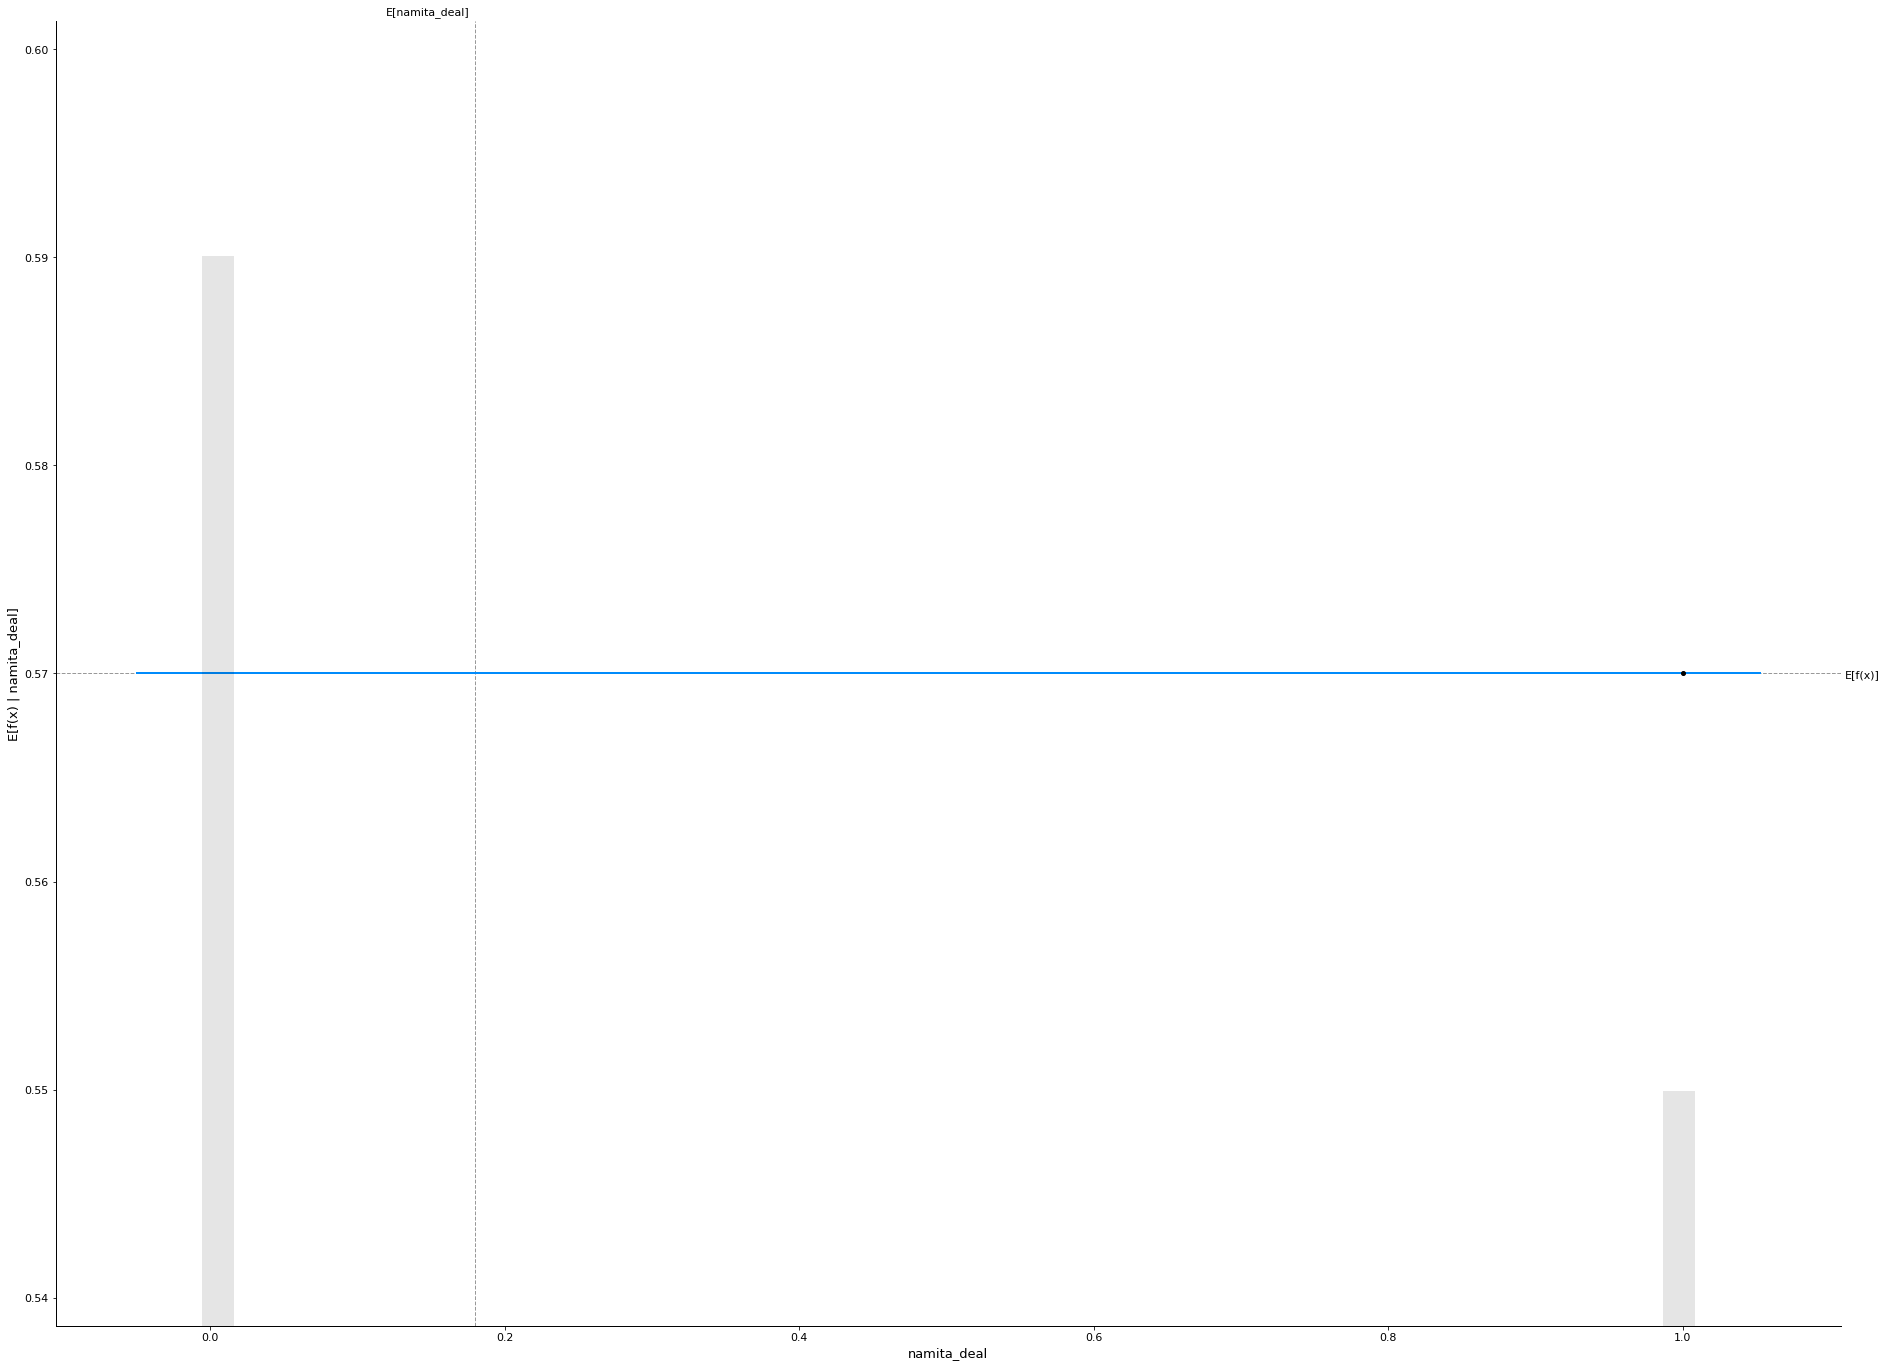

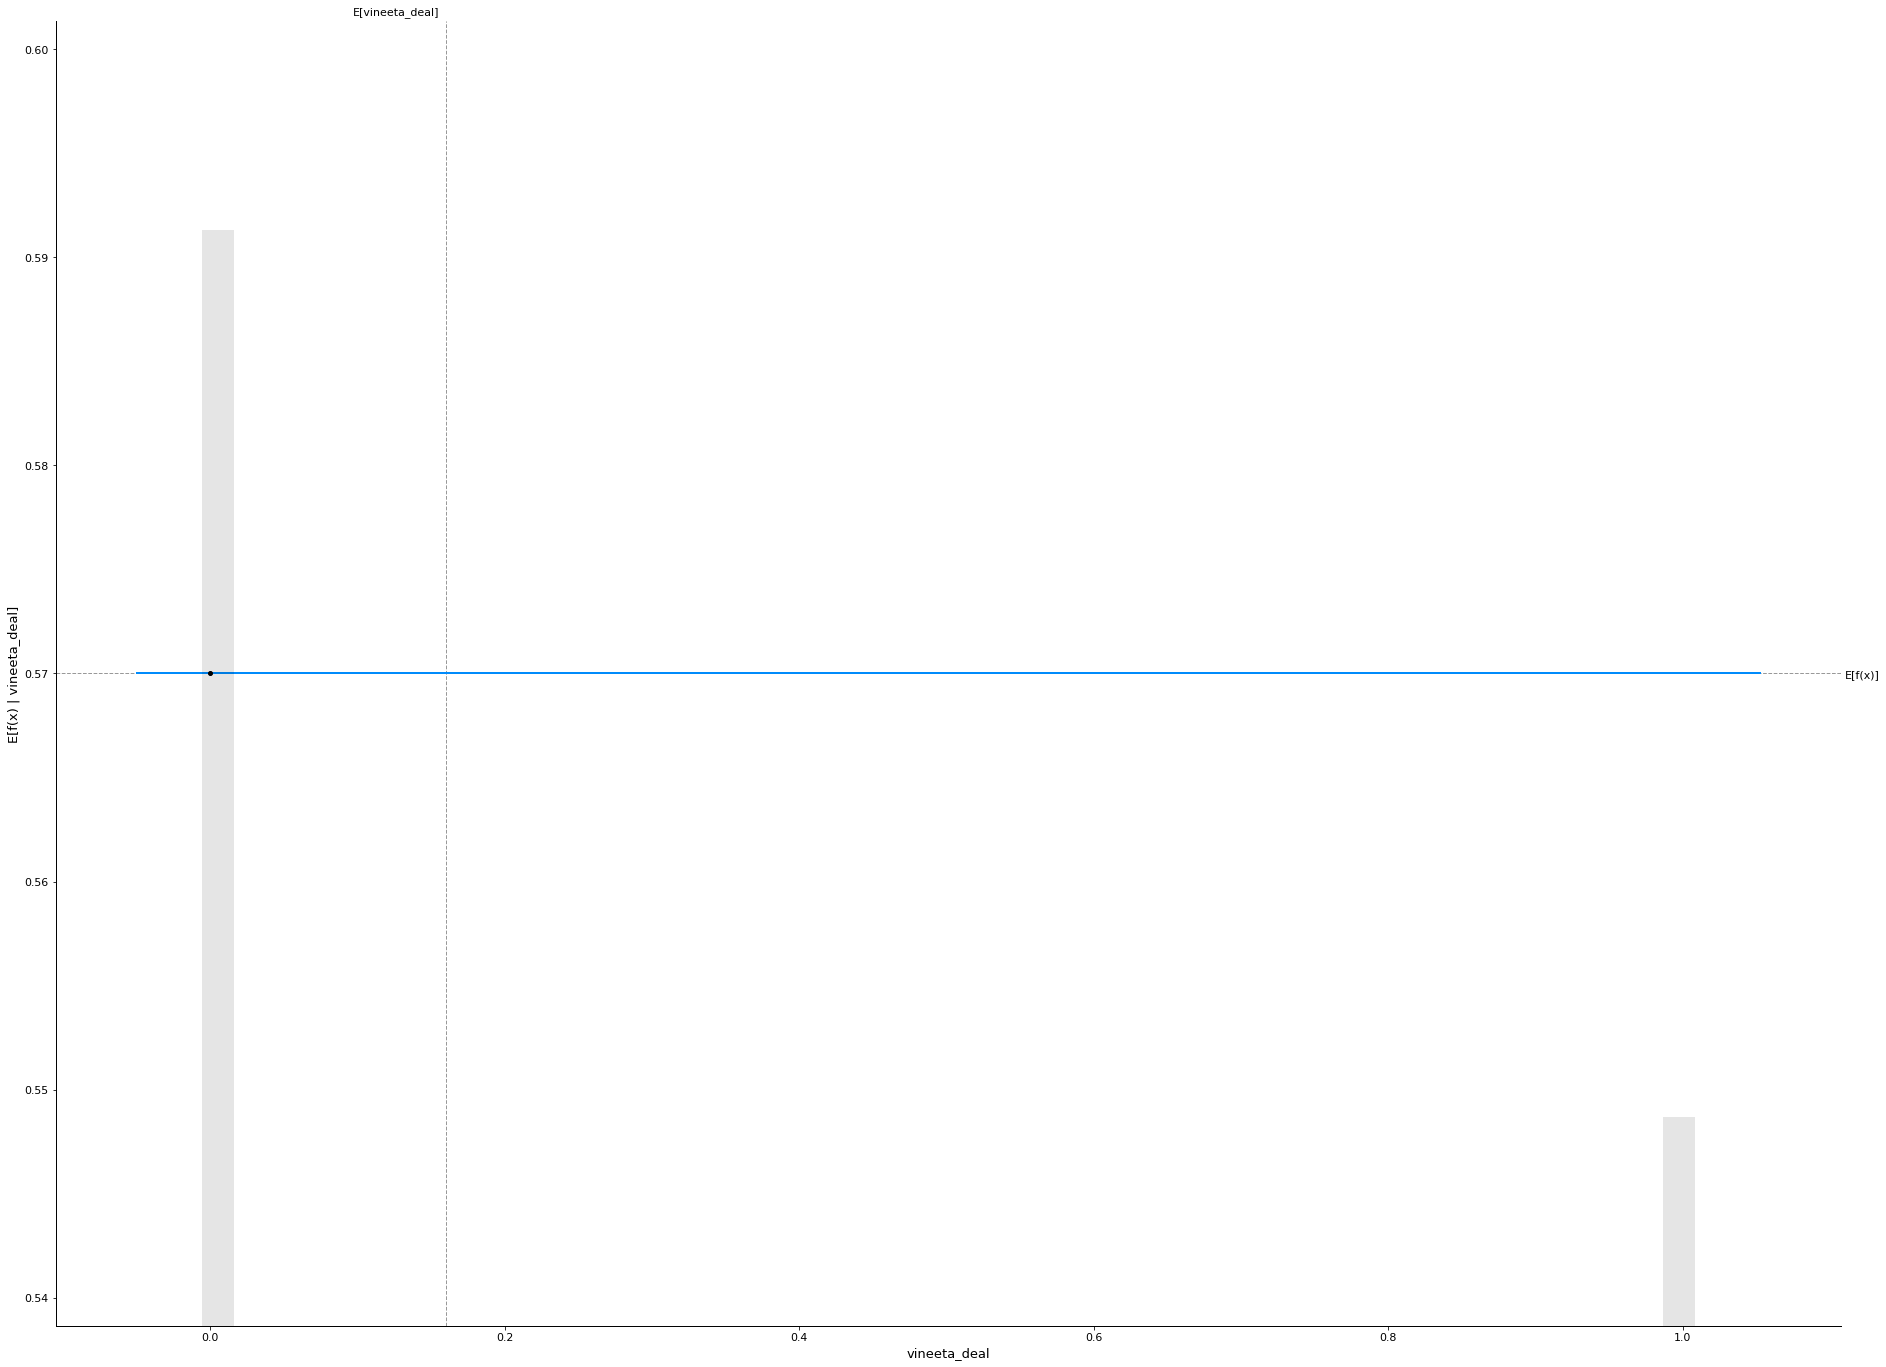

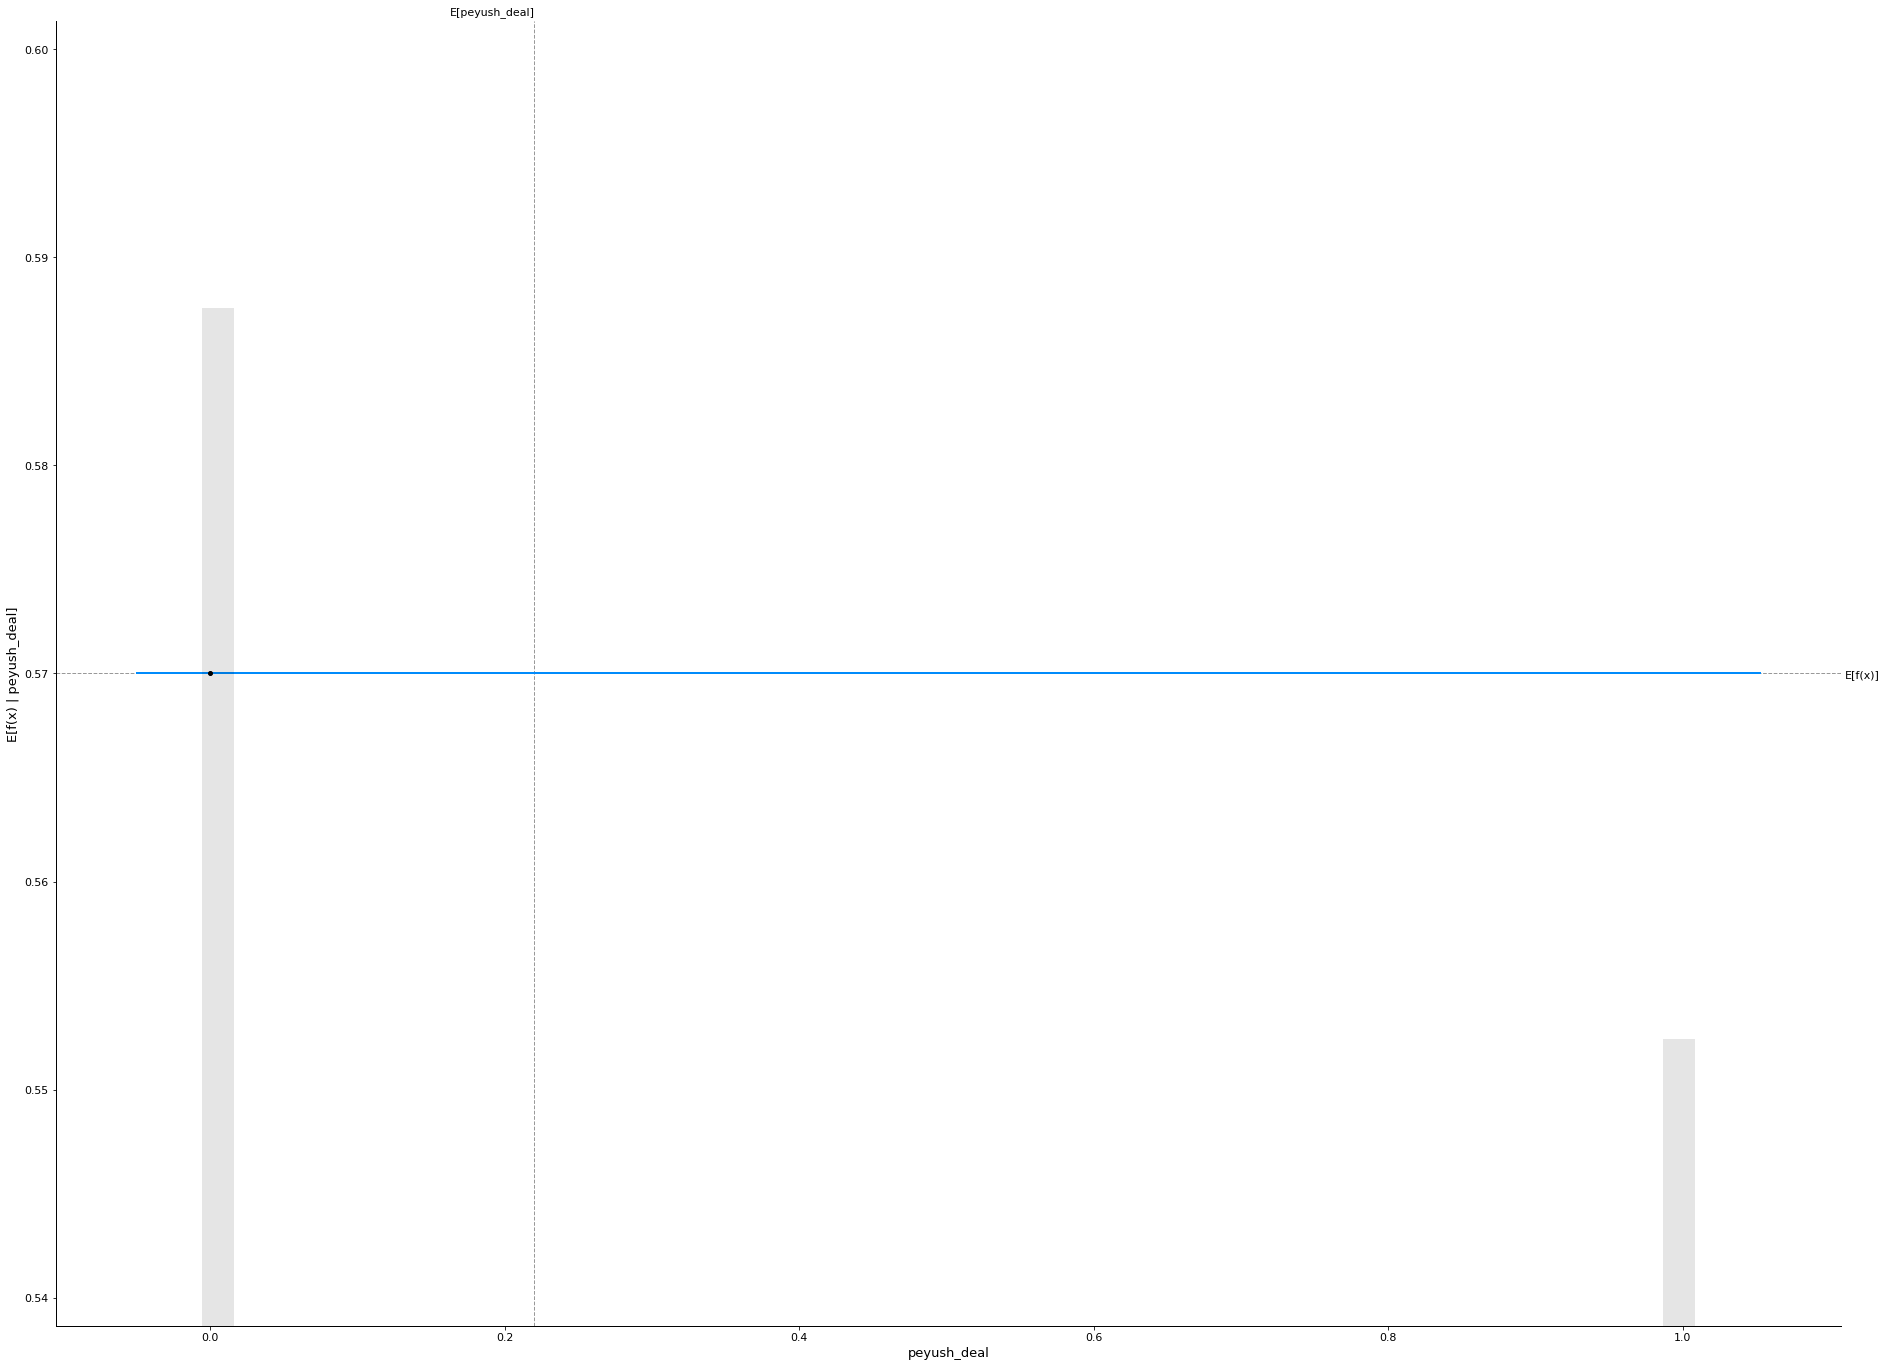

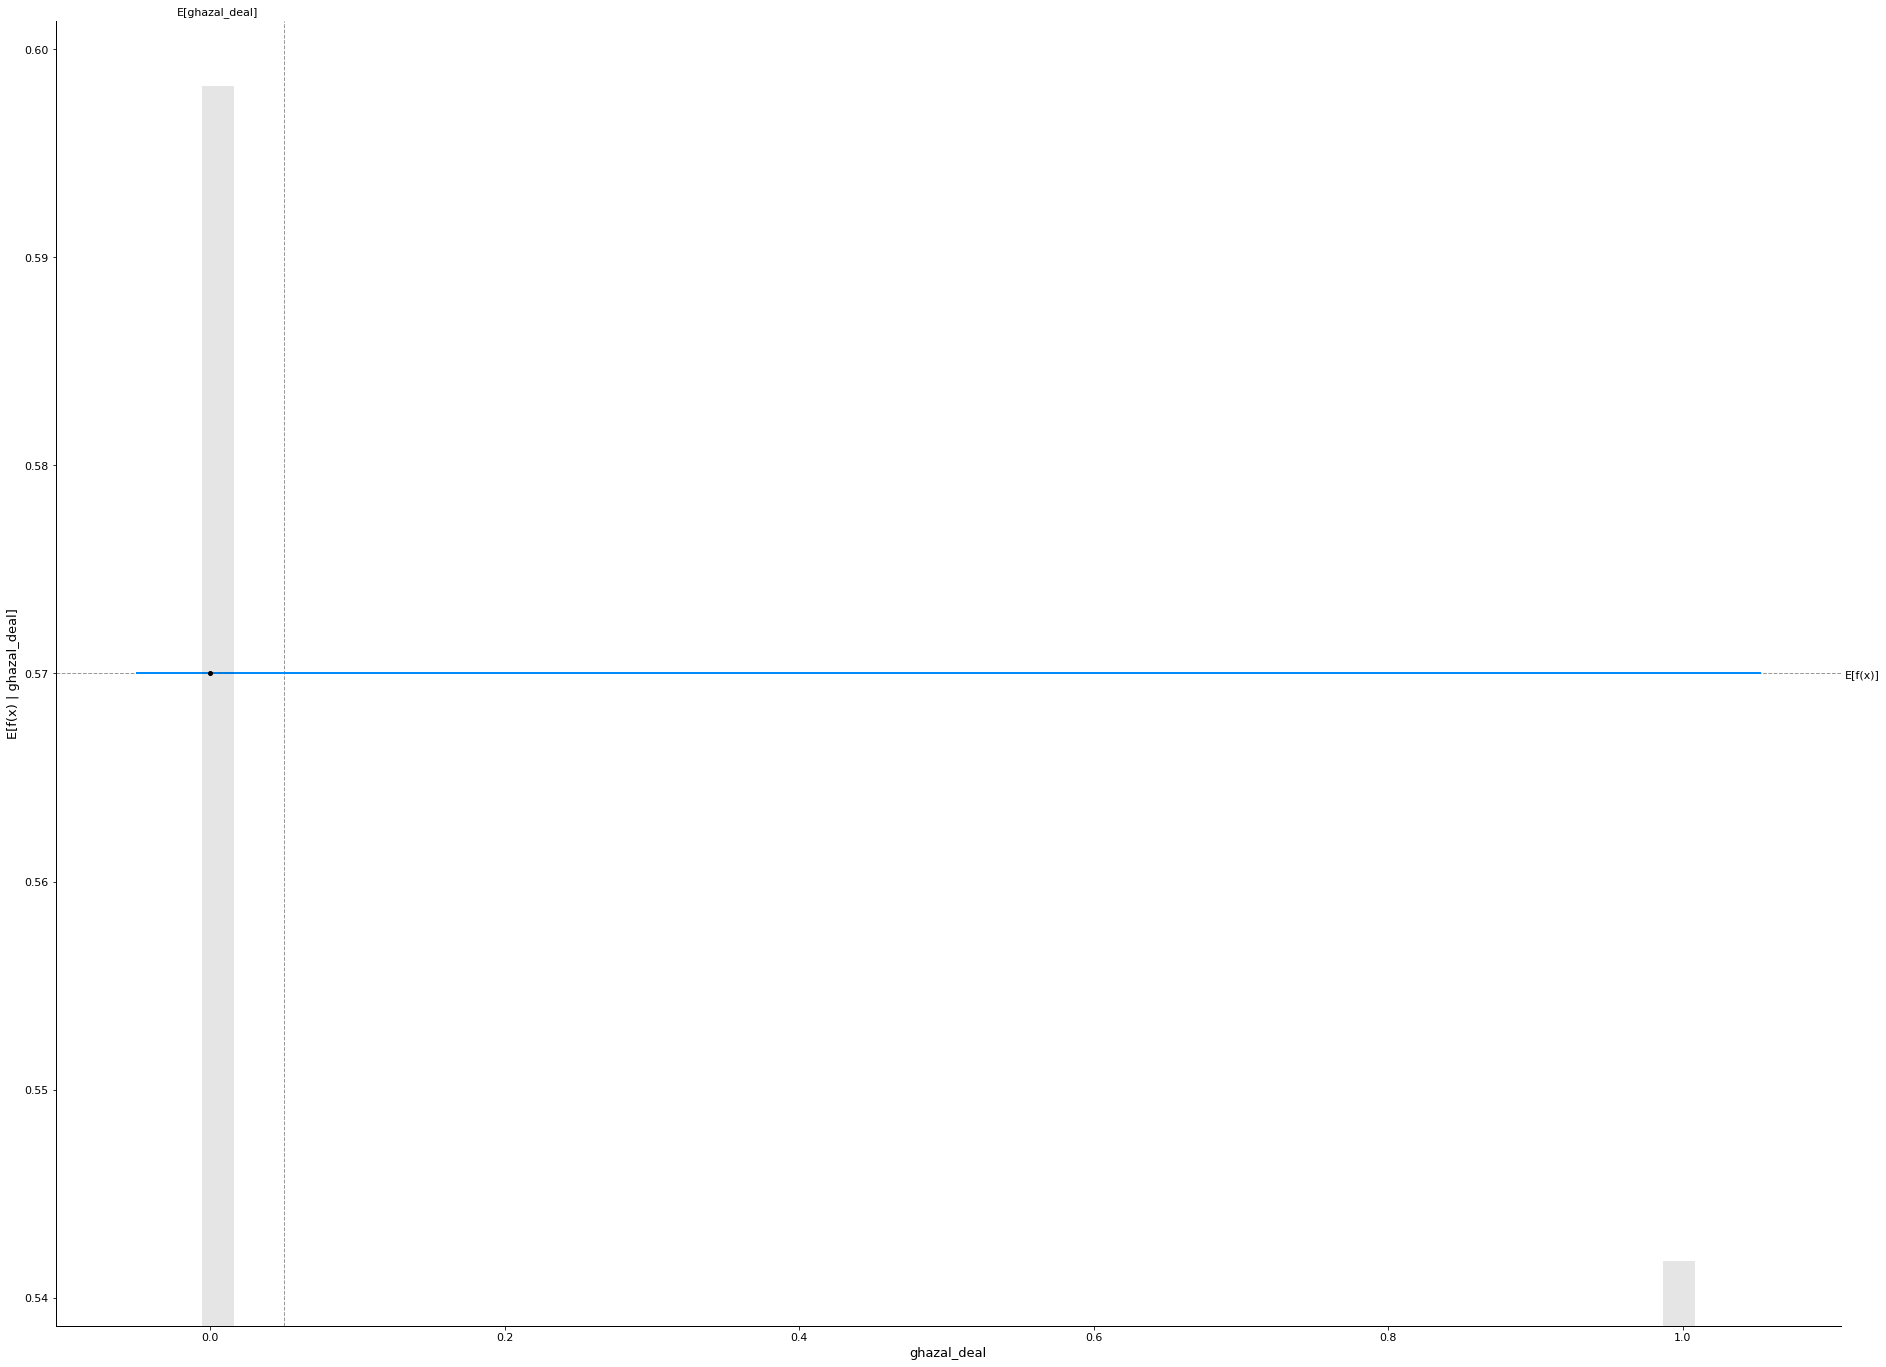

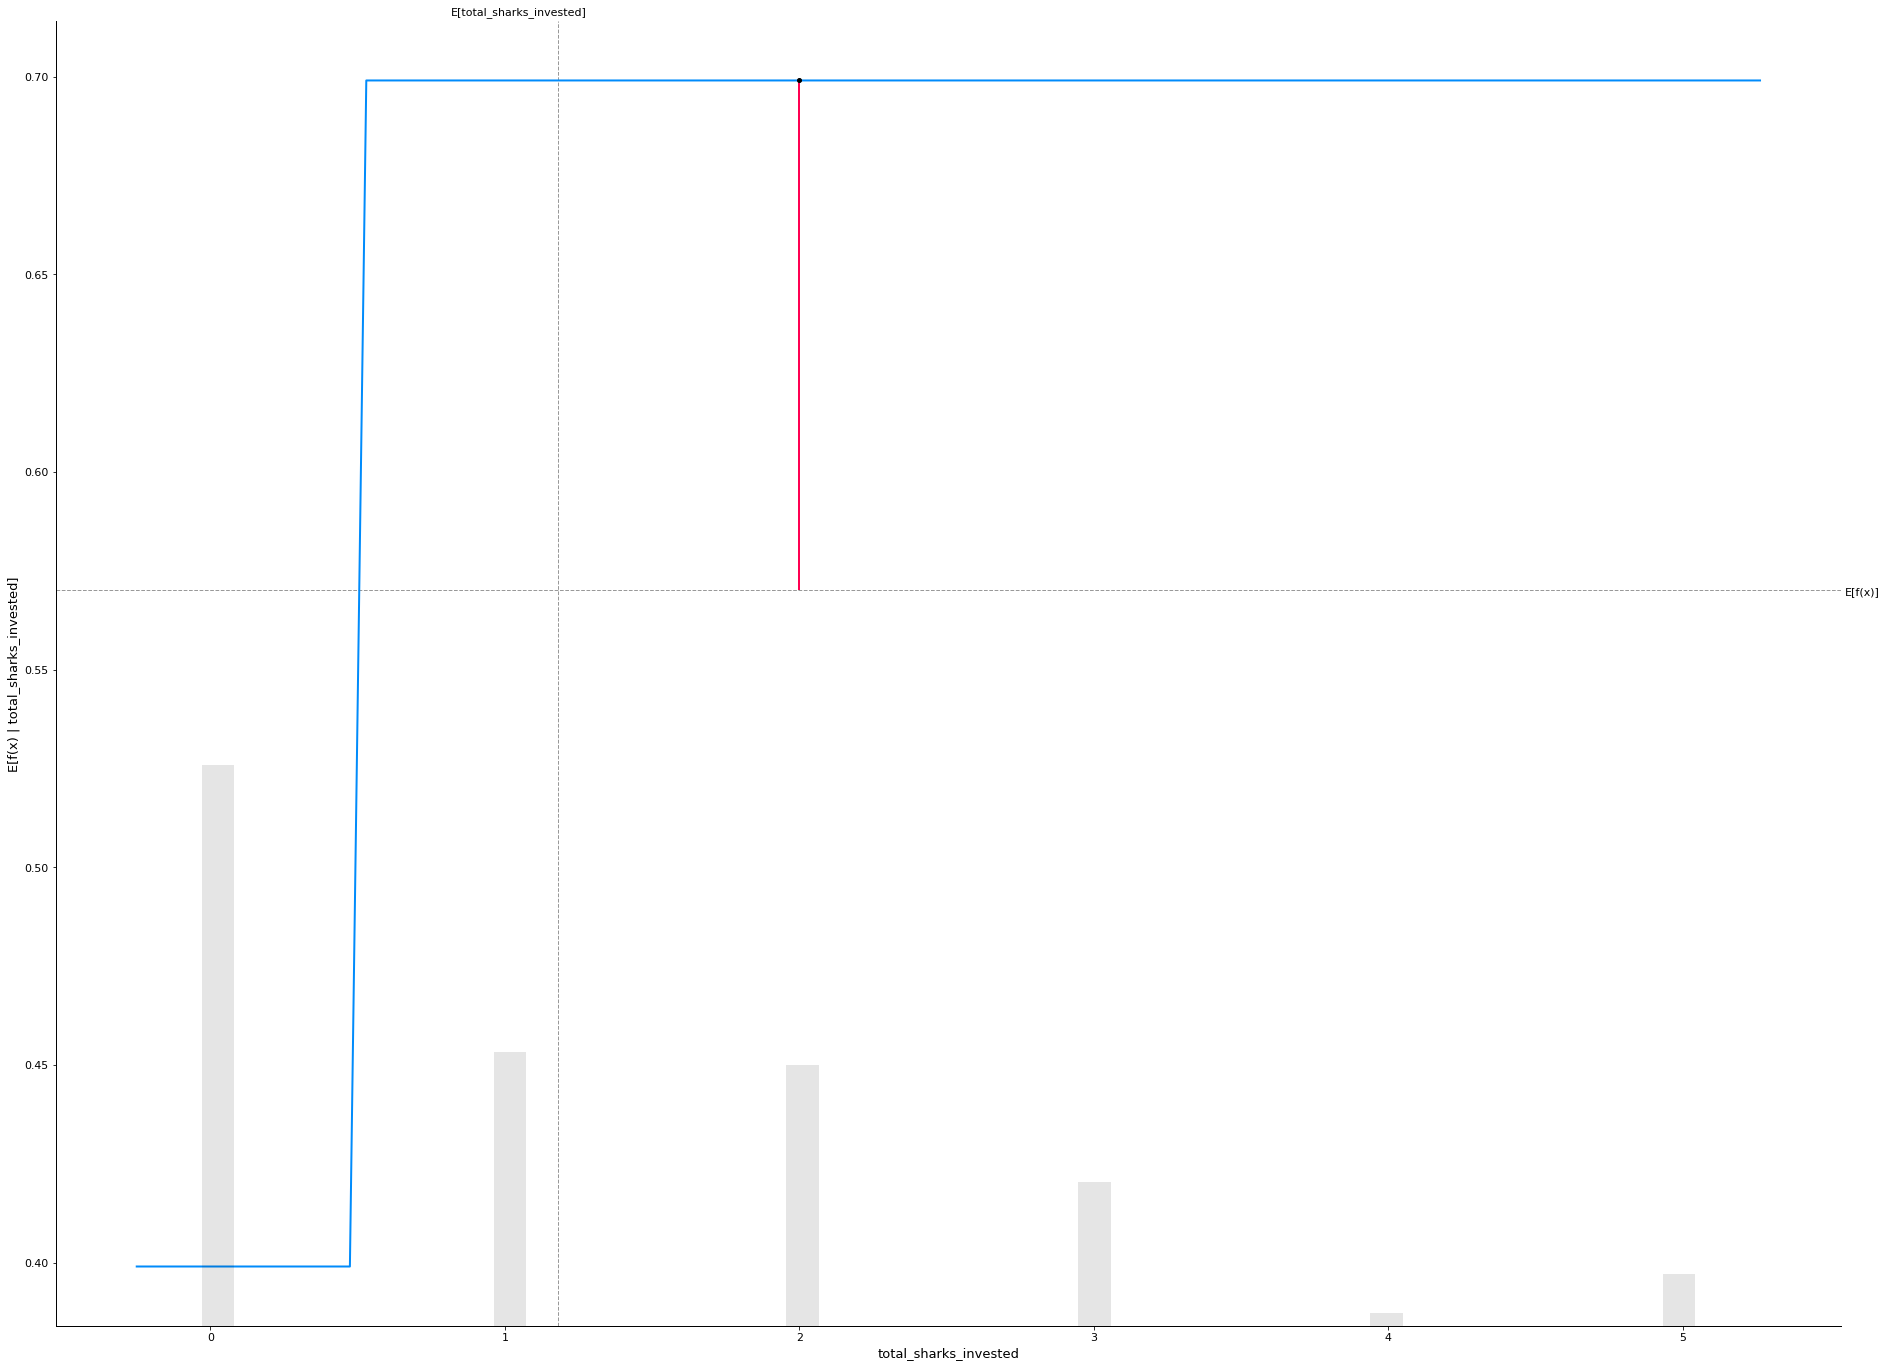

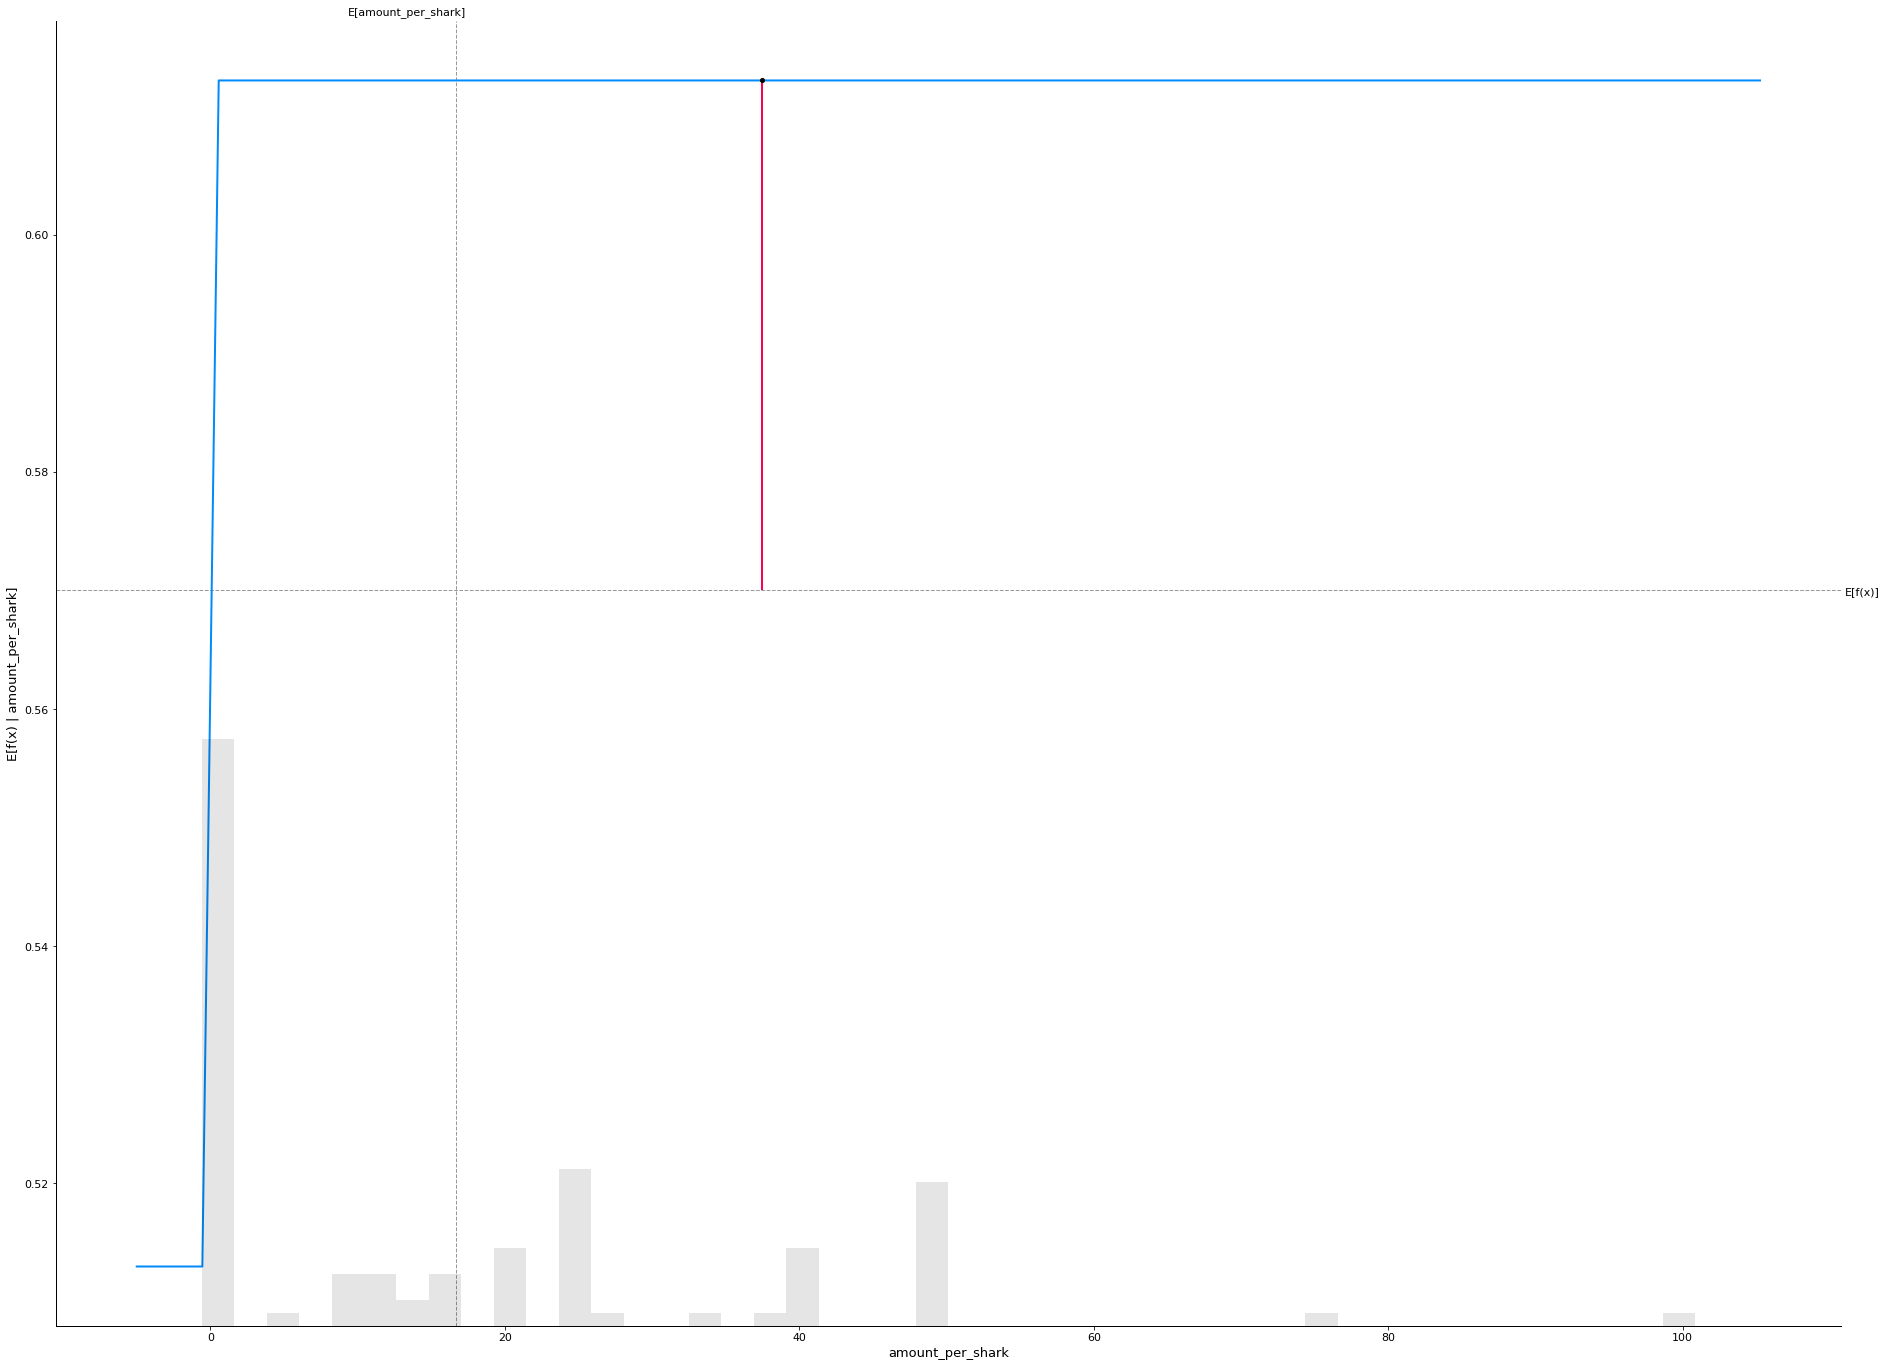

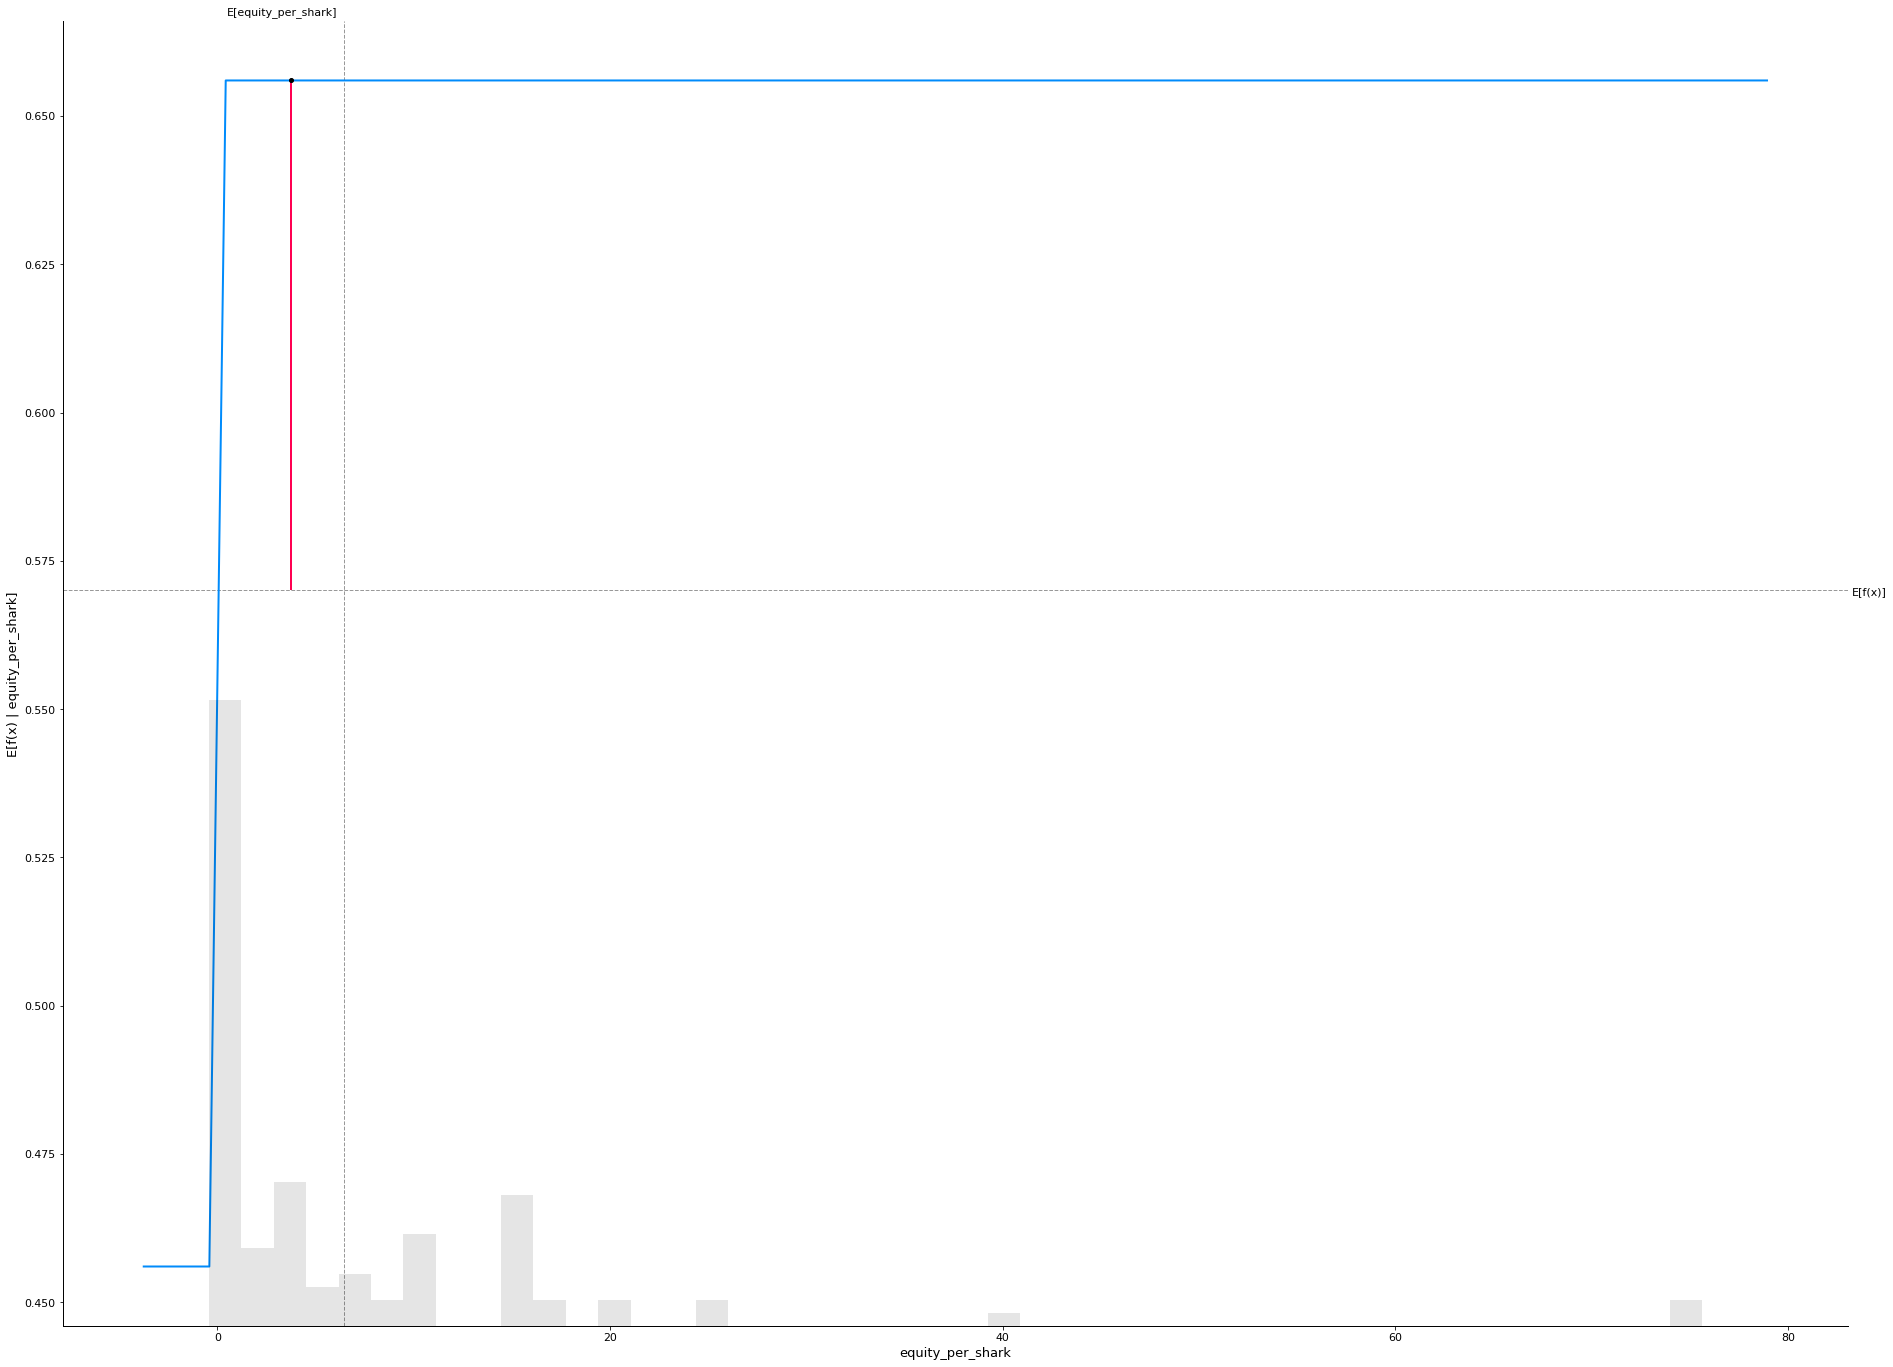

In [62]:

# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(tree_model.predict, x_train_100)
tree_shap_values = tree_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        tree_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

####Interpreting SHAP Feature Importance Plot for Linear and Tree-based model:


The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.


The following plots are:


*   SHAP feature importance for a linear model
*   SHAP feature importance for tree-based model


As we can see below in the plots, there is a difference in feature importance for both the models.

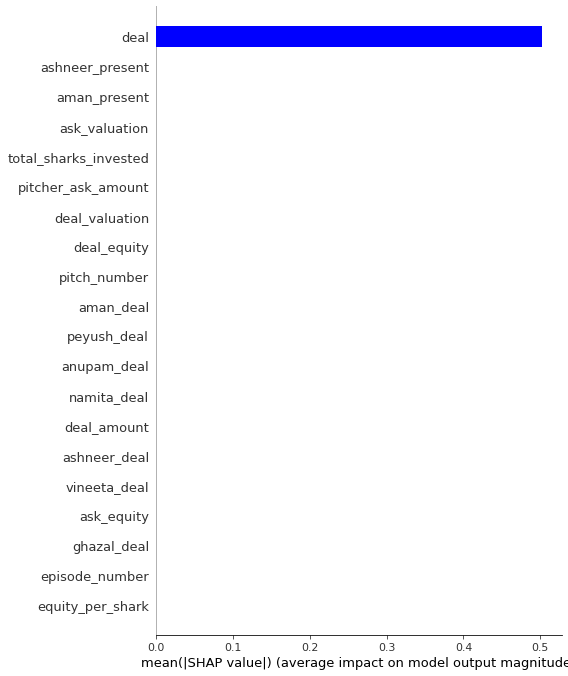

In [63]:
shap.summary_plot(linear_shap_values, X_train, plot_type="bar", color="blue")
##shap.summary_plot(shap_values, X_train, plot_type='bar')

This plot shows that there is no specific column that helps in predicting the target variable(deal) using linear regression. With the additional data such as having category of the product data would help us to use the neural networks to have the better results.

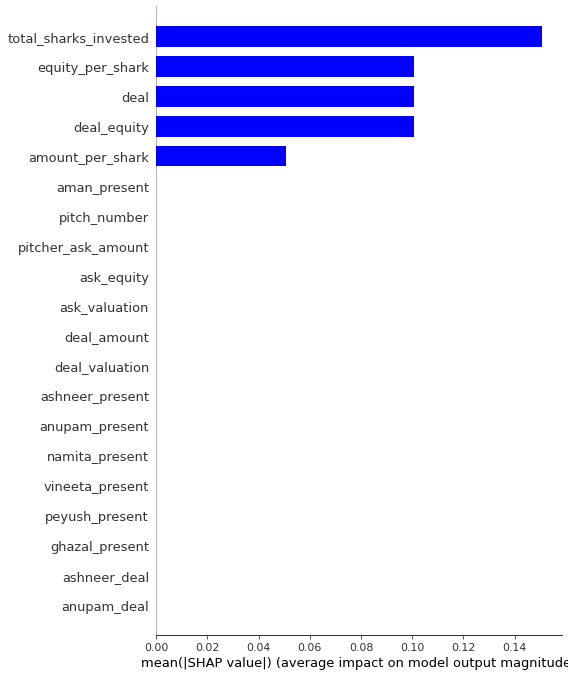

In [64]:
# SHAP variable importance for Tree based model
shap.summary_plot(tree_shap_values, X_train, plot_type="bar", color="blue")

From the plot it is observed that total_sharks_invested, equity_per_shark, deal_equity, amount_per_shark are said to be significant.

####Interpreting Waterfall SHAP visualization

we can interpret the tree-based model for the same sample.
Where the output we got was 1 and the expected output was 0.57 in the tree-based model, we just see that the magnitude of the impact made by individual features varies from what we had in a linear model. 

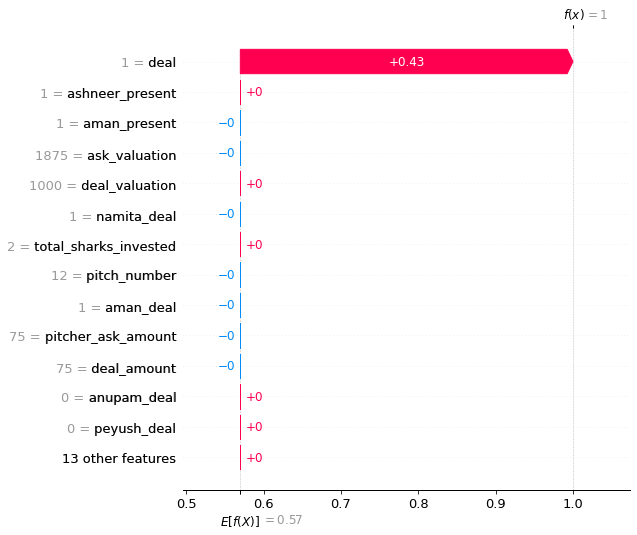

In [65]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

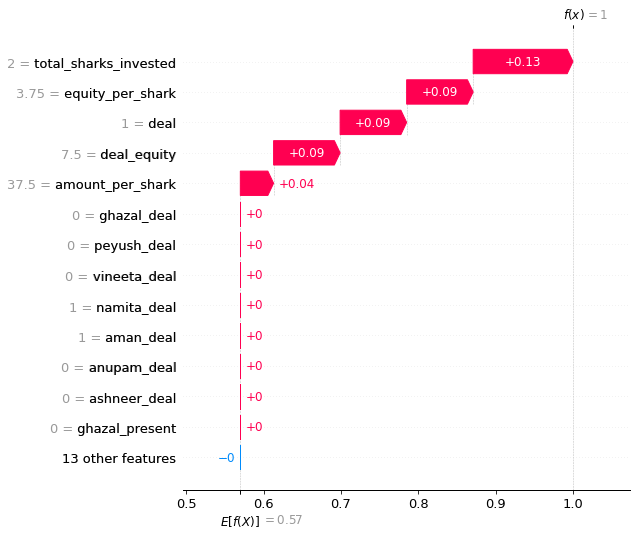

In [66]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

####Interpret the summary plot for the Linear and Tree-based model:


Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.


Each dot(both red and blue) represents a feature of a deal. Red color represents high values whereas blue color represents low value


If a dot(a feature of deal) is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact. The position of a dot(a feature of wine) on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the intensity.


Let us try to understand how both models are performing side by side

Higher value of total_sharks_invested tends to have a positive impact on the probablity of deal. This visualization is very useful when it comes to interpreting how our model is working.



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


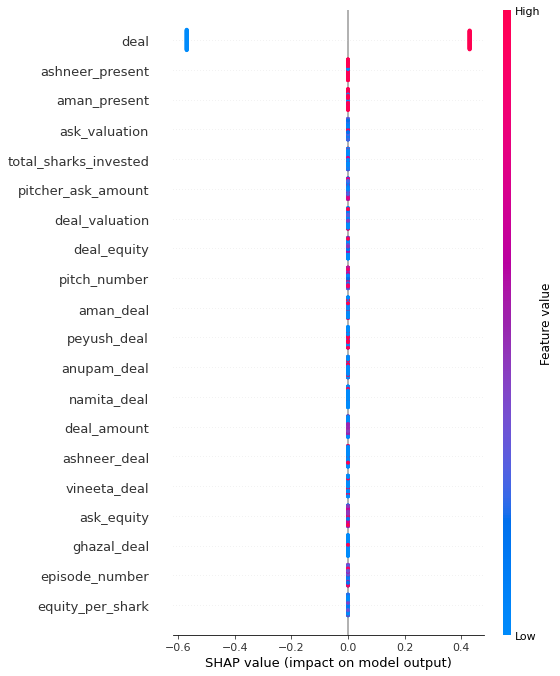

In [45]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, X_train)

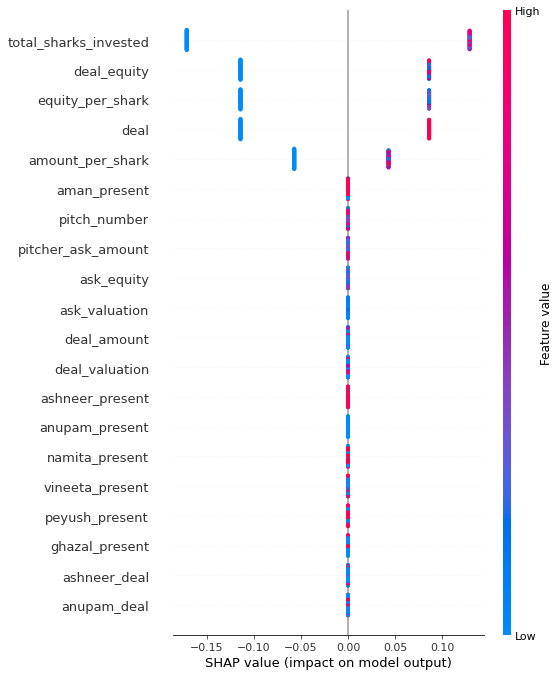

In [46]:

# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, X_train)
     

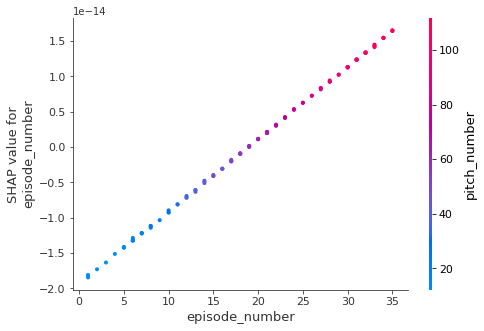

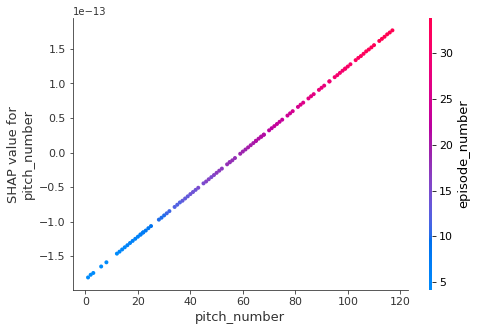

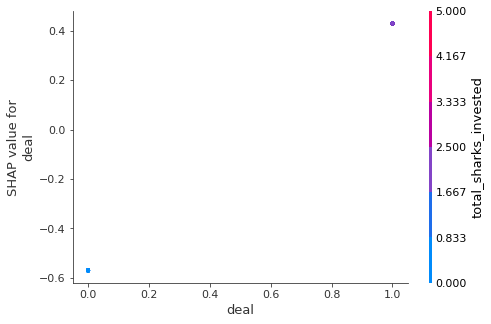

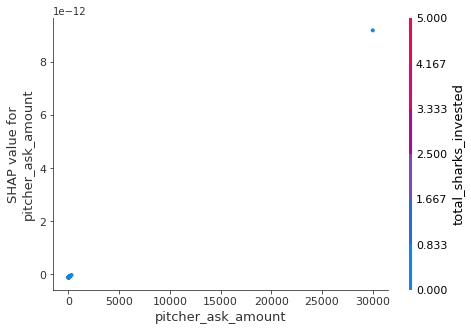

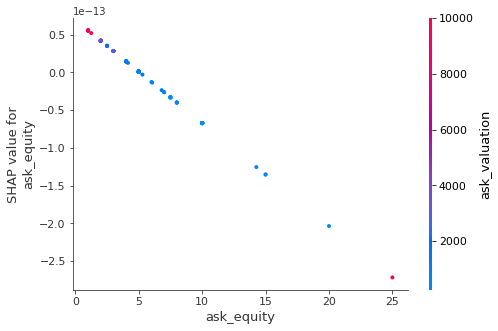

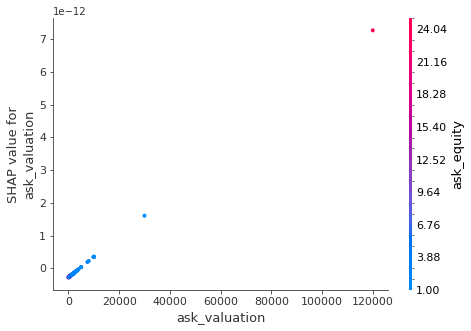

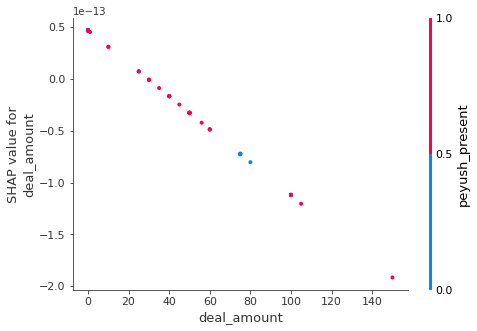

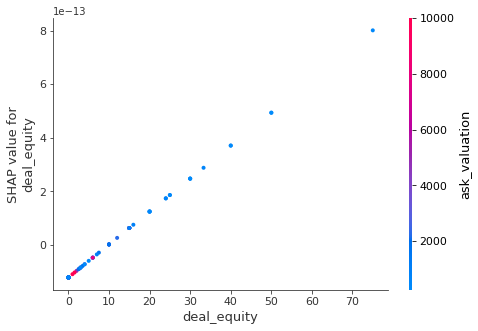

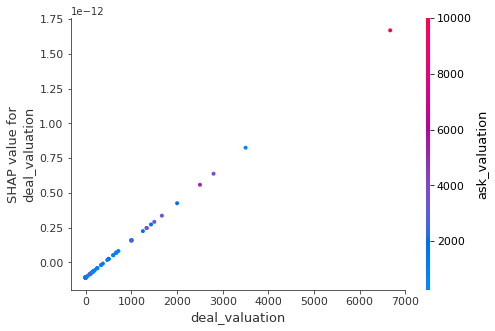

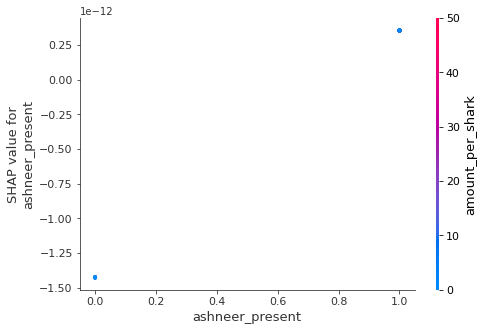

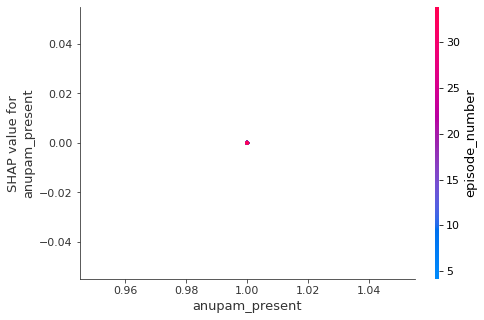

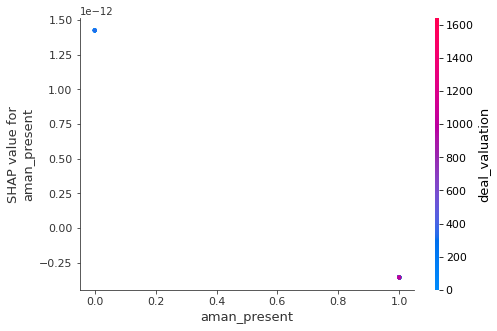

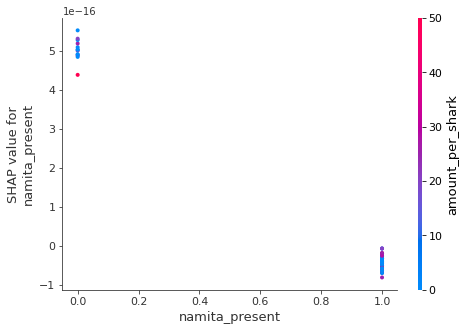

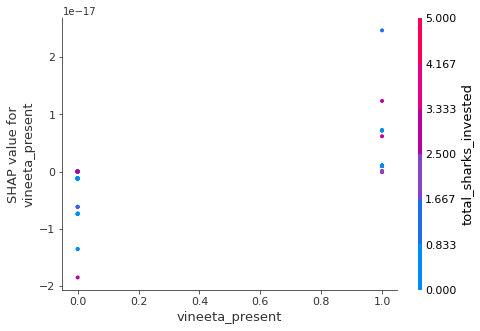

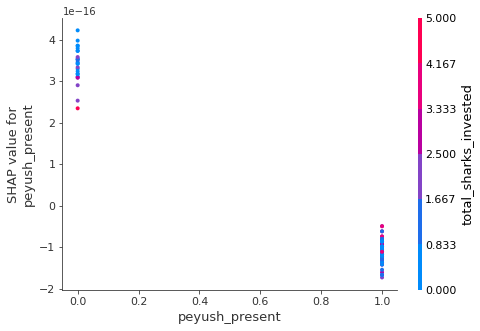

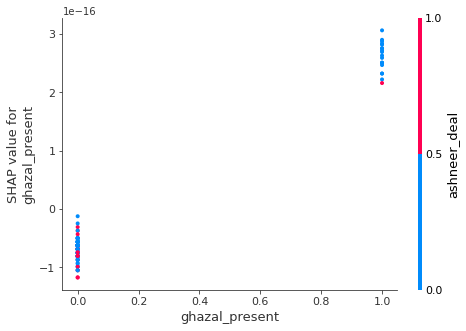

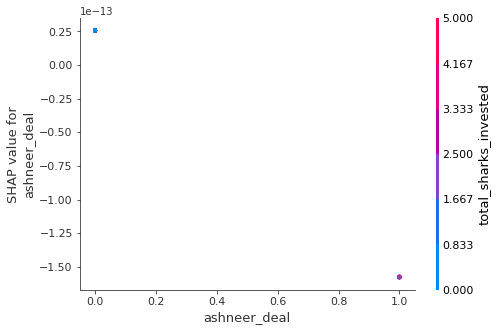

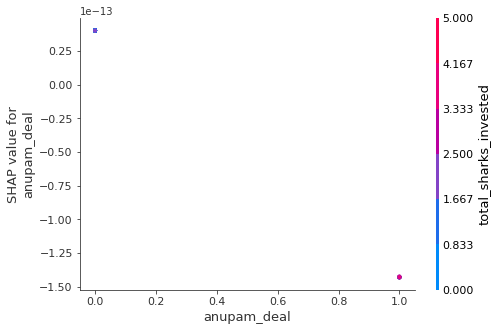

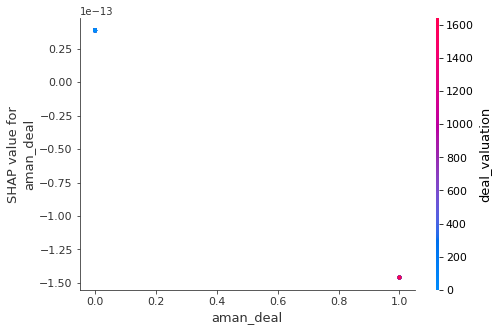

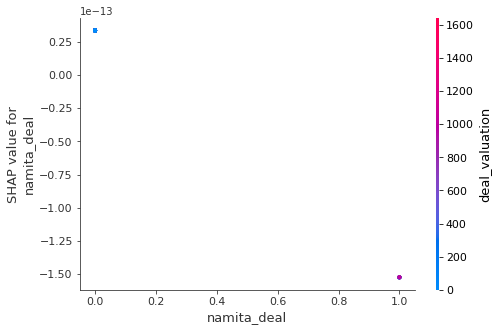

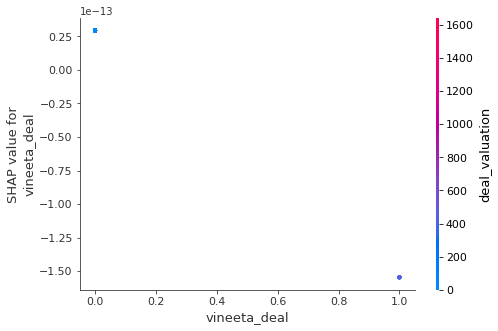

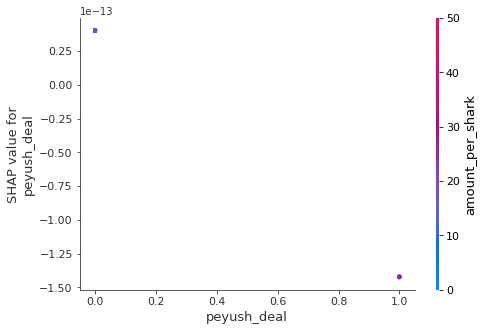

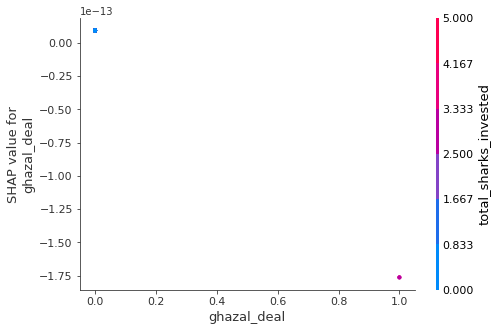

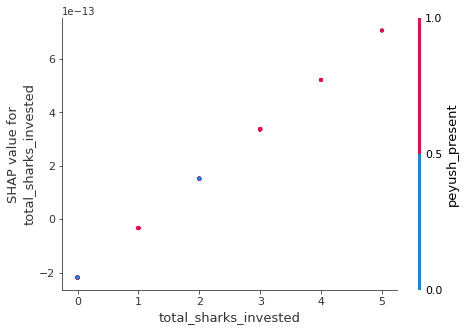

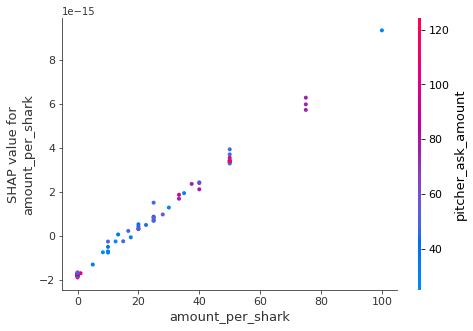

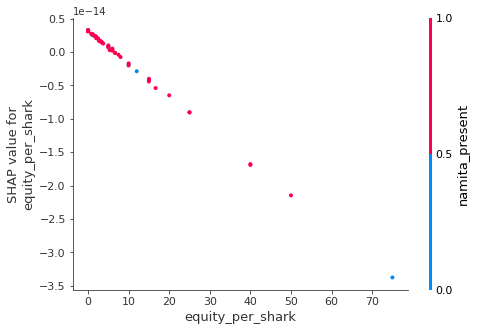

In [47]:
# SHAP partial dependence plot for linear model
for i in X_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, X_train)

####Interpreting SHAP dependence plot for Linear and Tree-based model:


The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the linear and Tree-based models using the SHAP dependence plot. Here in these graphs, we get a dot for every deal in our dataset.


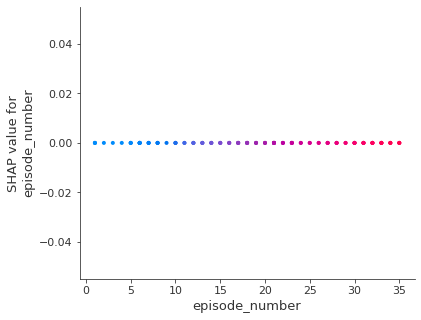

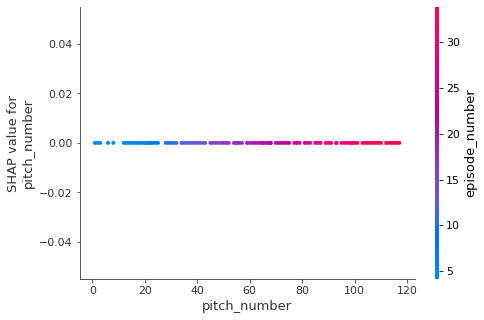

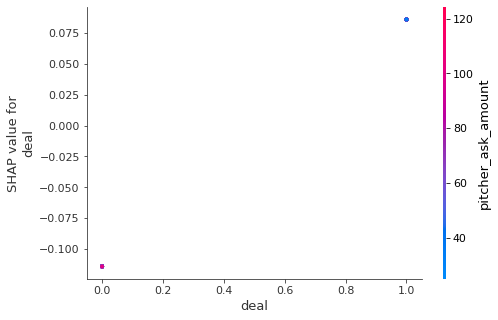

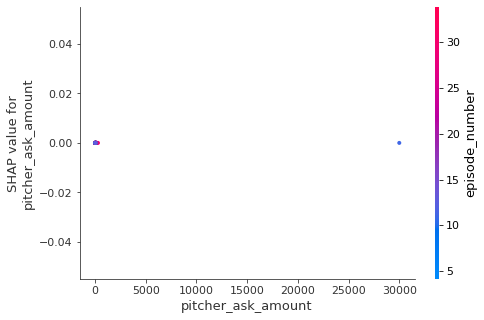

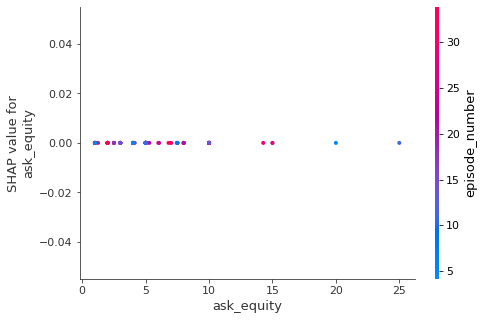

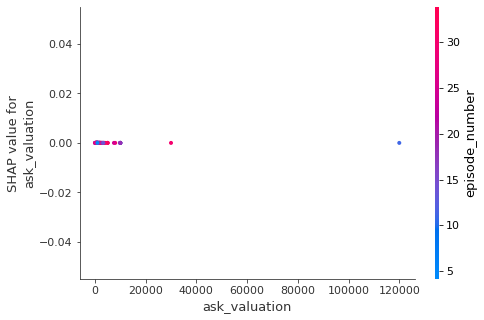

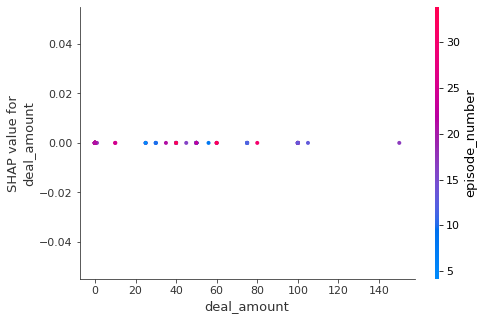

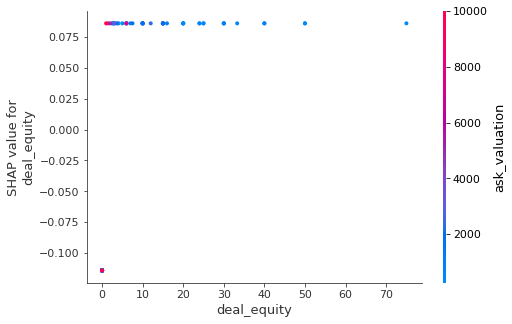

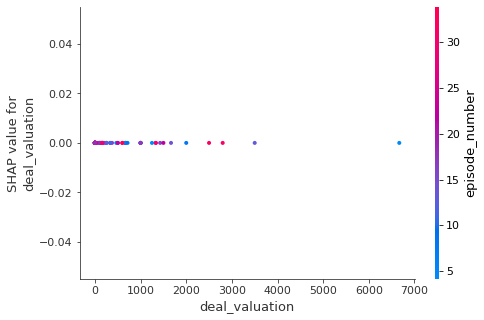

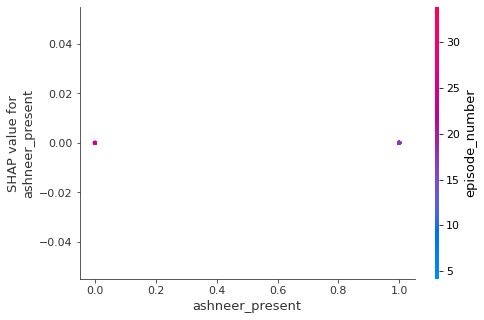

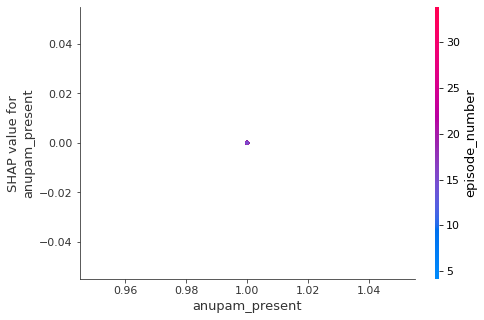

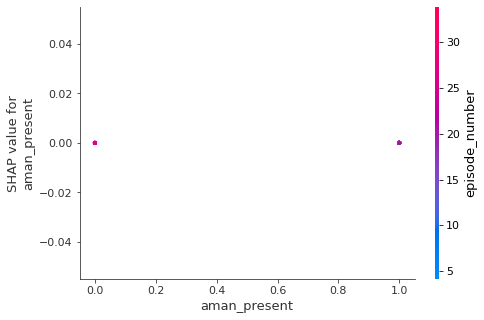

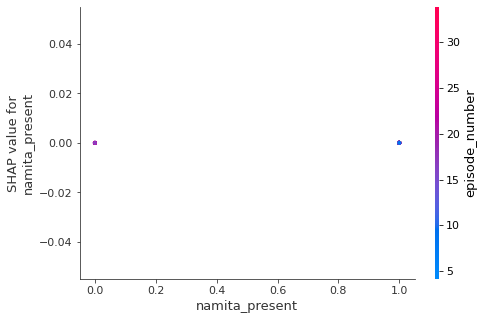

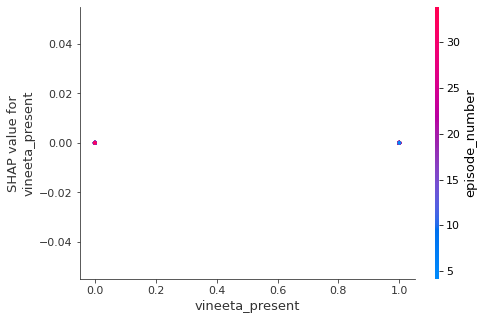

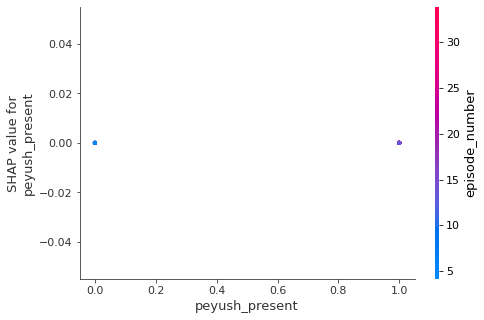

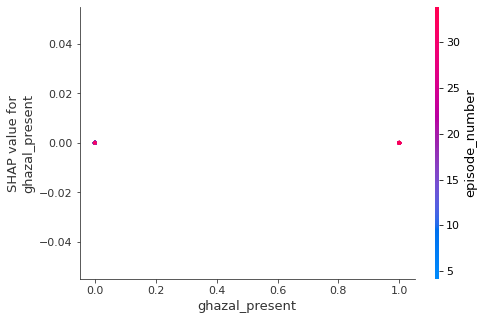

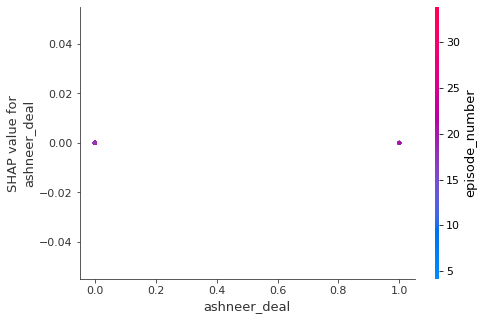

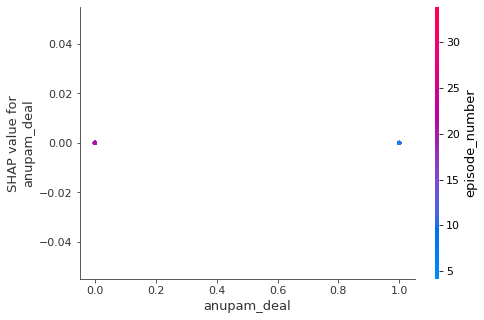

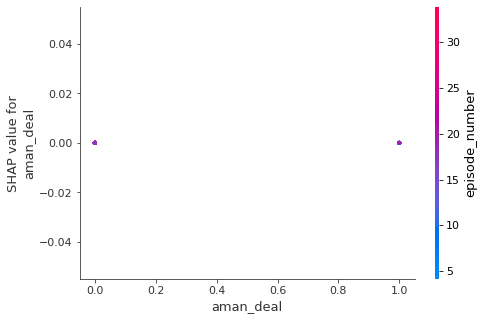

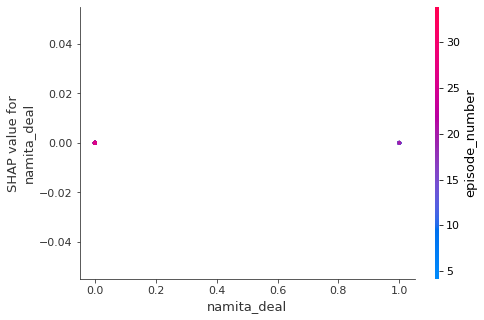

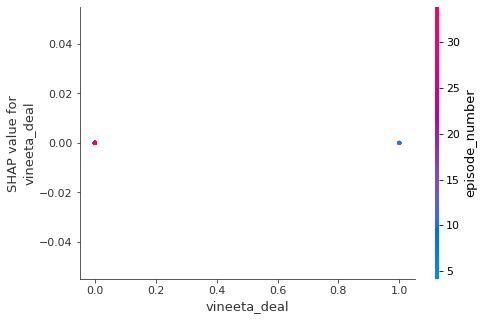

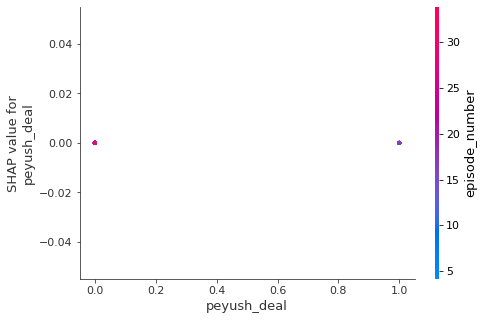

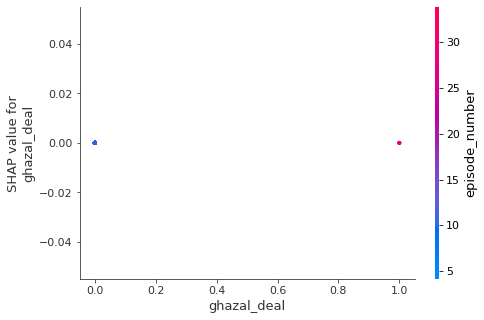

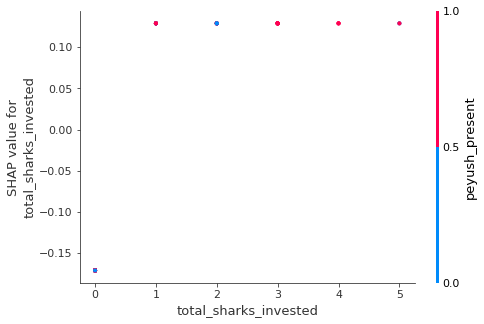

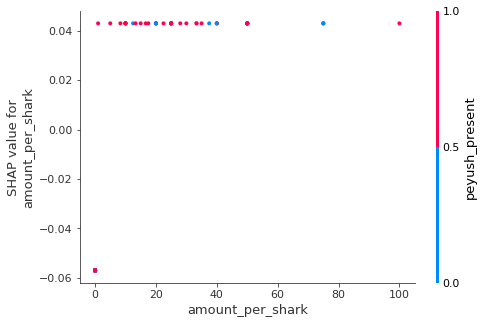

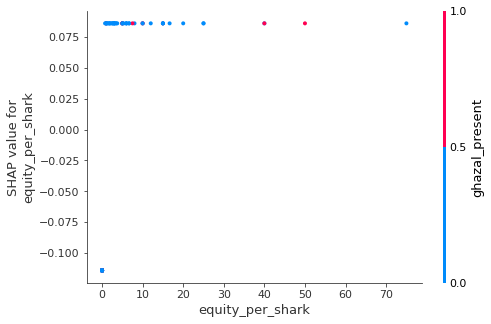

In [48]:
# SHAP partial dependence plot for a tree based model
for i in X_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, X_train)

In [49]:
X_output_linear = X_test.copy()
X_output_linear.loc[:, "predict"] = np.round(
    linear_model.predict(X_output_linear), 2
)  # Attaching the output of linear model to test dataframe

X_output_tree = X_test.copy()
X_output_tree.loc[:, "predict"] = np.round(
    tree_model.predict(X_output_tree), 2
)  # Attaching the output of tree based model to test dataframe

In [50]:
# Force Plot of Tree Based Model
explainerModel = shap.TreeExplainer(tree_model)
shap_values_Model = explainerModel.shap_values(X_output_tree)


def shap_plot_tree(j):
    p = shap.force_plot(
        explainerModel.expected_value, shap_values_Model[j], X_output_tree.iloc[[j]]
    )
    return p

####Force Plot SHAP analysis

This plot is the same as the waterfall model which we saw above the only difference is the visualization is condensed. It is really up to an individual which visualization is preferred some find this easier to read others find the waterfall model easier to read.

In [51]:
shap.initjs()  # Initializing JavaScript module
print(shap_plot_tree(10))

###Heatmap Visualization for Linear and Tree-based model:

This visualization is a summarization of the entire dataset on how each data point in every feature is affecting the target(data).

*   Here the Y-axis is Features
*   and X-axis is Instance of that feature
*   The color of the instance defines if it had a positive effect or negative effect by its color. If the instance is red then it had a positive effect and if the instance is blue then it had a negative effect
*   The intensity of the color is directly proportional to the intensity of the effect. Deeper the color, the more impactful the feature is





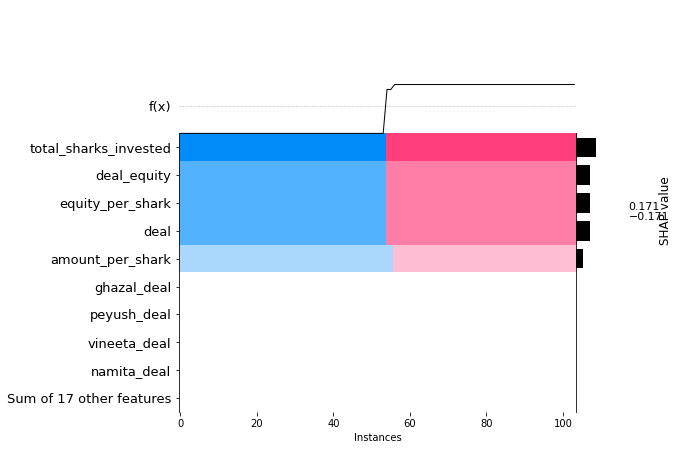

In [52]:
shap.plots.heatmap(tree_shap_values)  # SHAP HeatMap of a Tree Based Model

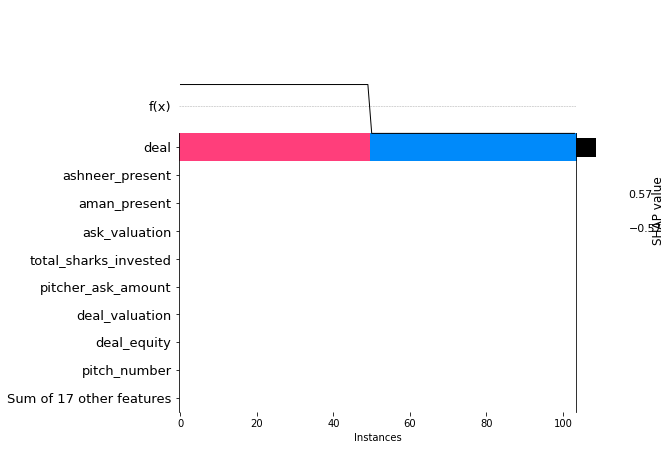

In [53]:

shap.plots.heatmap(linear_shap_values)  # SHAP heatmap for a Linear Model

####LIME (Local Interpretation Model-Agnostic Explanation) Analysis:




LIME builds a surrogate model, i.e. converts a more complicated model (say a deep tree-based model into a simple linear model) around the data points in which we are interested and then it will try to make an approximation out of this simple model on the whole model. LIME builds a local model in such a way that it can interpret the whole Black-Box

LIME works well on tabular, text, image datasets - hence it works on different datasets



Let us Interpret our Linear model and Tree-based model on sample data (sample_index = 10) using LIME and try to understand what is happening under the hood. Please refer below for Visualizations of both models



As we can see on the left-hand side LIME gives us information about the minimum and maximum values predicted by the model. The Color orange here represents positive and blue represents negative
Here for this sample as seen below deal_amount, deal_equity, equity_per_shark, total_sharks_invested harmed both linear and tree-based model



These interpretations were carried out locally in the region where of out sample data(sample_index = 10).

In [54]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="regression"
)

In [55]:

# Getting LIME interpretation for a sample data
idx = 10
np_x_test = np.array(X_test)
np_y_test = np.array(Y_test)
print("Prediction : ", linear_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], linear_model.predict, num_features=np_x_test.shape[1]
)
lime_linear_explanation

Prediction :  [-2.75054392e-15]
Actual :      0


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


In [56]:

lime_linear_explanation.show_in_notebook()  # Display Results in Notebook

####Tree Based Model

In [57]:
# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="regression"
)

In [58]:
# Getting LIME interpretation for a sample data
idx = 10
np_x_test = np.array(X_test)
np_y_test = np.array(Y_test)
print("Prediction : ", tree_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], tree_model.predict, num_features=np_x_test.shape[1]
)
lime_tree_explanation

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Prediction :  [0.]
Actual :      0


In [59]:

lime_tree_explanation.show_in_notebook()  # Display Results in Notebook

####PDP(Partial Dependence Plot) for Linear model and Tree-based Model:



*   Linear Model - If we closely look at the PDP of the linear model we can see that if features volatile_acidity, sulfates, alcohol are tuned while freezing the rest if them the output of the model varies linearly and these variables have the most significant effect on the output(quality of wine)

*   Tree-Based Model - On looking at the PDP of the tree-based model, it re-affirms the interpretation we got from the PDP of the Linear Model and Best AutoML model. The only difference here is that the output doesn't vary linearly



####Comparision between SHAP, LIME, and Partial Dependence Plot Analysis:






Unlike LIME, SHAP does not necessarily build a local interpretable model but rather uses the black-box model to calculate the marginal contribution to the prediction for each feature and then relies on the theoretically sound game theory concept of Shapley values to calculate the feature importance. In this way, SHAP improves upon LIME due to its greater stability and lack of local linear model assumptions.




*   PDP gives the extent of effect a variable has on the output by freezing the rest of them
*   SHAP gives how much each variable contributes to the prediction
*   LIME is more like SHAP but a lite version of it - It takes the local region of the point of interest and gives us information about the contribution each variable has made to the output




We have to analyze our needs and then consider the tradeoff to select the best suitable interpretable method for the ML model


###References

H2O AI AutoML - https://docs.h2o.ai/

https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

http://net-informations.com/ds/mla/ols.html

https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d



https://www.youtube.com/watch?v=2AyCEp1fnM4&t=5s



###Licences:

MIT License


Copyright (c) 2023 Amrutha Sai Edara


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:


The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.


THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE